* In this competition you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.
* The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.
* Categorical Features - Transaction
    * ProductCD
    * card1 - card6
    * addr1, addr2
    * P_emaildomain
    * R_emaildomain
    * M1 - M9
* Categorical Features - Identity
    * DeviceType
    * DeviceInfo
    * id_12 - id_38
* The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

* You can read more about the data from this post by the competition host.
* Files
* train_{transaction, identity}.csv - the training set
* test_{transaction, identity}.csv - the test set (you must predict the isFraud value for these observations)
* sample_submission.csv - a sample submission file in the correct format

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
train_id = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_identity.csv", index_col= 'TransactionID')
train_trans = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_transaction.csv",index_col= 'TransactionID')


In [4]:
test_trans = pd.read_csv("/kaggle/input/ieee-fraud-detection/test_transaction.csv", index_col= 'TransactionID')
test_id= pd.read_csv("/kaggle/input/ieee-fraud-detection/test_identity.csv", index_col= 'TransactionID')

In [5]:
train_id.head()

id_01      id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
TransactionID                                                               
2987004        0.000  70787.000    nan    nan    nan    nan    nan    nan   
2987008       -5.000  98945.000    nan    nan  0.000 -5.000    nan    nan   
2987010       -5.000 191631.000  0.000  0.000  0.000  0.000    nan    nan   
2987011       -5.000 221832.000    nan    nan  0.000 -6.000    nan    nan   
2987016        0.000   7460.000  0.000  0.000  1.000  0.000    nan    nan   

               id_09  id_10   id_11     id_12  id_13    id_14  id_15  \
TransactionID                                                          
2987004          nan    nan 100.000  NotFound    nan -480.000    New   
2987008          nan    nan 100.000  NotFound 49.000 -300.000    New   
2987010        0.000  0.000 100.000  NotFound 52.000      nan  Found   
2987011          nan    nan 100.000  NotFound 52.000      nan    New   
2987016        0.000  0.000 100.000  NotFound    nan -300.000  Found   

                  id_16   id_17  id_18   id_19   id_20  id_21  id_22 id_23  \
TransactionID                                                                
2987004        NotFound 166.000    nan 542.000 144.000    nan    nan   NaN   
2987008        NotFound 166.000    nan 621.000 500.000    nan    nan   NaN   
2987010           Found 121.000    nan 410.000 142.000    nan    nan   NaN   
2987011        NotFound 225.000    nan 176.000 507.000    nan    nan   NaN   
2987016           Found 166.000 15.000 529.000 575.000    nan    nan   NaN   

               id_24  id_25  id_26 id_27  id_28     id_29             id_30  \
TransactionID                                                                 
2987004          nan    nan    nan   NaN    New  NotFound       Android 7.0   
2987008          nan    nan    nan   NaN    New  NotFound        iOS 11.1.2   
2987010          nan    nan    nan   NaN  Found     Found               NaN   
2987011          nan    nan    nan   NaN    New  NotFound               NaN   
2987016          nan    nan    nan   NaN  Found     Found  Mac OS X 10_11_6   

                             id_31  id_32      id_33           id_34 id_35  \
TransactionID                                                                
2987004        samsung browser 6.2 32.000  2220x1080  match_status:2     T   
2987008         mobile safari 11.0 32.000   1334x750  match_status:1     T   
2987010                chrome 62.0    nan        NaN             NaN     F   
2987011                chrome 62.0    nan        NaN             NaN     F   
2987016                chrome 62.0 24.000   1280x800  match_status:2     T   

              id_36 id_37 id_38 DeviceType                     DeviceInfo  
TransactionID                                                              
2987004           F     T     T     mobile  SAMSUNG SM-G892A Build/NRD90M  
2987008           F     F     T     mobile                     iOS Device  
2987010           F     T     T    desktop                        Windows  
2987011           F     T     T    desktop                            NaN  
2987016           F     T     T    desktop                          MacOS

In [6]:
TotalTransCount = train_trans.shape[0]
TotalIDCount = train_id.shape[0]
TotalValidTransCount = train_trans['isFraud'].value_counts()[0]
TotalFraudTransCount = train_trans['isFraud'].value_counts()[1]
TotalAmount = train_trans['TransactionAmt'].sum()
TotalFraudTransAmount =round( train_trans[train_trans['isFraud']==1]['TransactionAmt'].sum(),3)
TotalValidTransAmount = round(train_trans[train_trans['isFraud']==0]['TransactionAmt'].sum(), 3)
print('Total Transactions: ',TotalTransCount)
print('Total IDs Available: ',TotalIDCount)
print('Total valid Transactions: ',TotalValidTransCount)
print('Total Fraud Transactions: ',TotalFraudTransCount)
print('Total Amount: ',TotalAmount)
print('Total Amount in Fraud Transactions: ',TotalFraudTransAmount)
print('Total Amount in Valid Transactions: ',TotalValidTransAmount)

Total Transactions:  590540
Total IDs Available:  144233
Total valid Transactions:  569877
Total Fraud Transactions:  20663
Total Amount:  79738948.735
Total Amount in Fraud Transactions:  3083844.86
Total Amount in Valid Transactions:  76655103.875


In [7]:
train_trans = train_trans.merge(train_id, how='left', left_index=True, right_index=True) # MERGING TRAIN TRANSACTION AND IDENTITY DATASETS

In [8]:
# QUANTILES GIVE US A GOOD IDEA OF HOW OUR DATA IS DISTRIBUTED
quantiles =  train_trans.quantile([.01, .20, .25, .50, .70, .75,.90, .95, .96,.99]) 
quantiles

isFraud  TransactionDT  TransactionAmt     card1   card2   card3  \
0.010    0.000     185058.820           9.244  1338.000 100.000 144.000   
0.200    0.000    2310159.600          35.950  4908.000 194.000 150.000   
0.250    0.000    3027057.750          43.321  6019.000 214.000 150.000   
0.500    0.000    7306527.500          68.769  9678.000 361.000 150.000   
0.700    0.000   10437998.100         117.000 12932.000 490.000 150.000   
0.750    0.000   11246620.000         125.000 14184.000 512.000 150.000   
0.900    0.000   13990907.700         275.293 16582.100 555.000 150.000   
0.950    0.000   14857872.150         445.000 17319.000 567.000 185.000   
0.960    0.000   15027258.200         500.000 17458.000 583.000 185.000   
0.990    1.000   15629766.040        1104.000 18238.000 583.000 185.000   

        card5   addr1  addr2    dist1    dist2      C1      C2    C3    C4  \
0.010 102.000 123.000 87.000    0.000    0.000   1.000   1.000 0.000 0.000   
0.200 166.000 204.000 87.000    2.000    7.000   1.000   1.000 0.000 0.000   
0.250 166.000 204.000 87.000    3.000    7.000   1.000   1.000 0.000 0.000   
0.500 226.000 299.000 87.000    8.000   37.000   1.000   1.000 0.000 0.000   
0.700 226.000 325.000 87.000   18.000  162.000   2.000   2.000 0.000 0.000   
0.750 226.000 330.000 87.000   24.000  206.000   3.000   3.000 0.000 0.000   
0.900 226.000 441.000 87.000  268.000  634.400   7.000   7.000 0.000 1.000   
0.950 226.000 485.000 87.000  846.000 1001.000  22.000  27.000 0.000 1.000   
0.960 226.000 485.000 87.000  991.000 1336.000  79.000  77.000 0.000 2.000   
0.990 226.000 512.000 87.000 2040.000 2367.480 164.000 154.000 0.000 6.000   

           C5      C6    C7     C8     C9    C10     C11   C12     C13  \
0.010   0.000   0.000 0.000  0.000  0.000  0.000   1.000 0.000   0.000   
0.200   0.000   1.000 0.000  0.000  0.000  0.000   1.000 0.000   1.000   
0.250   0.000   1.000 0.000  0.000  0.000  0.000   1.000 0.000   1.000   
0.500   0.000   1.000 0.000  0.000  1.000  0.000   1.000 0.000   3.000   
0.700   1.000   2.000 0.000  0.000  2.000  0.000   2.000 0.000   9.000   
0.750   1.000   2.000 0.000  0.000  2.000  0.000   2.000 0.000  12.000   
0.900   3.000   5.000 1.000  1.000  4.000  1.000   4.000 1.000  37.000   
0.950   9.000  15.000 1.000  2.000  9.000  2.000  14.000 1.000 102.000   
0.960  24.000  55.000 1.000  2.000 19.000  2.000  55.000 2.000 277.000   
0.990 149.000 118.000 4.000 11.000 95.000 15.000 122.000 5.000 578.000   

          C14      D1      D2      D3      D4      D5      D6      D7      D8  \
0.010   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
0.200   1.000   0.000  16.000   0.000   0.000   0.000   0.000   0.000   0.875   
0.250   1.000   0.000  26.000   1.000   0.000   1.000   0.000   0.000   0.958   
0.500   1.000   3.000  97.000   8.000  26.000  10.000   0.000   0.000  37.875   
0.700   2.000  81.000 226.000  21.000 182.000  27.000  10.000   9.000 145.667   
0.750   2.000 122.000 276.000  27.000 253.000  32.000  40.000  17.000 187.958   
0.900   5.000 364.000 476.000  65.000 482.000 117.000 309.000 154.000 442.708   
0.950  14.000 489.000 540.000 129.000 544.000 246.000 405.000 321.000 738.656   
0.960  53.000 512.000 556.000 157.000 559.000 287.000 430.000 356.000 799.833   
0.990 128.000 602.000 617.000 356.000 623.000 455.000 593.000 429.000 983.927   

         D9     D10     D11     D12     D13     D14     D15    V1    V2    V3  \
0.010 0.000   0.000   0.000   0.000   0.000   0.000   0.000 1.000 1.000 1.000   
0.200 0.125   0.000   0.000   0.000   0.000   0.000   0.000 1.000 1.000 1.000   
0.250 0.208   0.000   0.000   0.000   0.000   0.000   0.000 1.000 1.000 1.000   
0.500 0.667  15.000  43.000   0.000   0.000   0.000  52.000 1.000 1.000 1.000   
0.700 0.792 135.000 212.000   3.000   0.000   0.000 244.000 1.000 1.000 1.000   
0.750 0.833 197.000 274.000  13.000   0.000   2.000 314.000 1.000 1.000 1.000   
0.900 0.917 461.000 462.000 258.000  27.000 262.

In [9]:
# THIS FUNCTION TAKES A DATAFRAME AND RETURNS A DATAFRAME THAT CONTAINS INFORMATION OF COLUMNS LIKE NAME, DATA TYPE, MISSING VALUES, PERCENTAGE OF MISSING VALUES, UNIQUE VALUES
def metadata(df):
    metadata = pd.DataFrame()
    metadata['Name'] = df.columns.values
    metadata['Dtype'] = df.dtypes.values
    t =df.shape[0]
    missing =[]
    permissing = []
    Unique =[]
    for col in df.columns:
        s = df[col].isnull().sum()
        missing.append(s)
        permissing.append(round((s/t)*100, 3))
        Unique.append(df[col].nunique())
    metadata['Missing'] = missing
    metadata['Percentage_Missing'] = permissing
    metadata['Unique'] = Unique
    return metadata

In [10]:
# THIS FUNCTION IS USED TO SET SOME VALUES TO 'OTHER' FOR BETTER GRAPH PLOTING
def othervalues(val, others):
    if val in others:
        return val
    else:
        return 'Others'

In [11]:
# THIS FUNCTION TAKES A DATAFRAME AND SET LIST OF COLUMNS AND PLOTS 3 BAR PLOTS ABOUT FRAUD TRANSACTION.
def count_perFraud_plots(df, col, outliers = True, thresholdType='None', threshold = 0, fontsize =15, figsizeW =16, figsizeH=20, rotation =0):
    # Creating a new temperory dataframe for the function
    temp_df = df[[col,'isFraud','TransactionAmt']].copy()
   
    #print(temp_df.isnull().sum())
    if outliers:
        if thresholdType == 'quantile':
            #print(temp_df.isnull().sum())
            temp_df.loc[list(temp_df[temp_df[col]>quantiles.loc[threshold, col]].index.values), col] = 'Other'
        elif thresholdType == 'value count':
            others = list(temp_df[col].fillna('NaN').value_counts()[temp_df[col].fillna('NaN').value_counts()>threshold].index)
            temp_df[col] = temp_df[col].fillna('NaN').apply(othervalues, others=others)
            
    temp_df = temp_df.fillna('NaN')        
    group =pd.crosstab(temp_df[col], temp_df['isFraud'], normalize='index')*100 # Gives a dataframe with 'isFraud' column cotaining percetage of frauds for each value
    group = group.reset_index()
    #total =  len(df[col])
    
    if(rotation>0):
        xtickHaAlignment = 'right'
    else:
        xtickHaAlignment = 'center'

    plt.figure(figsize=(figsizeW,figsizeH))

    plt.subplot(421)
    plot1 = sns.countplot(data=temp_df, x=col, order = list(group[col].values), palette = 'dark')
    for bar in plot1.patches:
        plot1.text(bar.get_x()+bar.get_width()/2, 
                     bar.get_height(), 
                     '{:.2f}%'.format((bar.get_height()/TotalTransCount)*100), ha='center', va='bottom')
    plot1.set_title('Total Transactions for {}'.format(col), fontsize = fontsize)
    plot1.set_ylabel('No Of Transactions',  fontsize = fontsize-2)
    plot1.set_xlabel('{}'.format(col), fontsize = fontsize-2)
    plot1.set_xticklabels(plot1.get_xticklabels(),rotation=rotation, ha=xtickHaAlignment, va='top')
    
    plt.subplot(422)
    plot2 = sns.barplot(data=group, x=col,y = 1)
    for bar in plot2.patches:
        plot2.text(bar.get_x()+bar.get_width()/2, 
                     bar.get_height(), 
                     '{:.2f}%'.format(bar.get_height()), ha='center',va='bottom')
    plot2.set_title('Percentage of Fraud Transaction in each value of {}'.format(col), fontsize = fontsize)
    plot2.set_ylabel('Percentage', fontsize = fontsize-2)
    plot2.set_xlabel('{}'.format(col), fontsize = fontsize-2)
    plot2.set_xticklabels(plot2.get_xticklabels(),rotation=rotation, ha=xtickHaAlignment, va='top')
    
    percOfTransOutOfTotalFrauds = (pd.crosstab(temp_df[col], temp_df['isFraud'], normalize='columns')*100).reset_index() # Gives dataframe with column containing percentage fraud transactions of each values out of total fraud trasaction
    
    plt.subplot(423)
    plot3 = sns.barplot(data=percOfTransOutOfTotalFrauds, x=col, y=1)
    for bar in plot3.patches:
        plot3.text(bar.get_x()+bar.get_width()/2, 
                     bar.get_height(), 
                     '{:.2f}%'.format(bar.get_height()), ha='center',va='bottom')
    plot3.set_title('Percentge of Fraud Transaction Out Of Total Fraud Transactions', fontsize = fontsize)
    plot3.set_ylabel('Percentge', fontsize = fontsize-2)
    plot3.set_xlabel('{}'.format(col), fontsize = fontsize-2)
    plot3.set_xticklabels(plot3.get_xticklabels(),rotation=rotation, ha=xtickHaAlignment, va='top')
    
    total_amount = temp_df['TransactionAmt'].groupby(temp_df[col]).sum() # Gives a dataframe with sum of transaction amount for each values in the column. 
    total_amount = total_amount.reset_index()
    #total_amount= df['TransactionAmt'].sum()
    percent_total = (pd.crosstab(temp_df[col], temp_df['isFraud'], temp_df['TransactionAmt'], aggfunc=sum, normalize='index')*100).reset_index() # For each value in 'col' column given by user calculate total transaction Amount with respect to 'isFraud' column values and calculate perctage of valid and fraud amount out of total transaction amount of each value of 'col'
    #percent_total = temp_c1['TransactionAmt'].groupby([temp_c1[col],temp_c1['isFraud']]).sum()/total_amt_c1*100
    #percent_total =percent_total.unstack()
    #percent_total = percent_total.reset_index()
    
    plt.subplot(425)
    plot5 = sns.barplot(data=total_amount, x=col, y = 'TransactionAmt', palette = 'dark')
    plot5.ticklabel_format(style='plain', axis='y', useOffset=False)
    for bar in plot5.patches:
        plot5.text(bar.get_x()+bar.get_width()/2, 
                     bar.get_height(), 
                     '{:.2f}%'.format((bar.get_height()/TotalAmount)*100), ha='center', va='bottom')
    plot5.set_title('Total Amount in transaction for {}'.format(col), fontsize = fontsize)
    plot5.set_ylabel('Total Amount', fontsize = fontsize-2)
    plot5.set_xlabel('{}'.format(col), fontsize = fontsize-2)
    plot5.set_xticklabels(plot5.get_xticklabels(),rotation=rotation, ha=xtickHaAlignment, va='top')
    
    plt.subplot(426)
    plot6 = sns.barplot(data=percent_total, x=col,y = 1)
    for bar in plot6.patches:
        plot6.text(bar.get_x()+bar.get_width()/2, 
                     bar.get_height(), 
                     '{:.2f}%'.format(bar.get_height()), ha='center', va='bottom')
    plot6.set_title('Percentge of Fraud Transaction Amount in each value of {}'.format(col), fontsize = fontsize)
    plot6.set_ylabel('Percentge of Fraud Money', fontsize = fontsize-2)
    plot6.set_xlabel('{}'.format(col), fontsize = fontsize-2)
    plot6.set_xticklabels(plot6.get_xticklabels(),rotation=rotation, ha=xtickHaAlignment, va='top')
    
    percOfTransAmountOutOfTotalFraudsAmount = (pd.crosstab(temp_df[col], temp_df['isFraud'], temp_df['TransactionAmt'], aggfunc=sum, normalize='columns')*100).reset_index() # For each value in 'col' column given by user calculate total transaction Amount with respect to 'isFraud' column values and calculate perctage of valid and fraud amount out of total transaction amount of each values of 'isFraud'
    plt.subplot(427)
                   
    plot7 = sns.barplot(data=percOfTransAmountOutOfTotalFraudsAmount, x=col, y=1)
    for bar in plot7.patches:
        plot7.text(bar.get_x()+bar.get_width()/2, 
                     bar.get_height(), 
                     '{:.2f}%'.format(bar.get_height()), ha='center', va='bottom')
    plot7.set_title('Percentge of Fraud Transaction Amount Out Of Total Fraud Transaction Amount', fontsize = fontsize)
    plot7.set_ylabel('Percentge', fontsize = fontsize-2)
    plot7.set_xlabel('{}'.format(col), fontsize = fontsize-2)
    plot7.set_xticklabels(plot7.get_xticklabels(),rotation=rotation, ha=xtickHaAlignment, va='top')
    plt.tight_layout()
    plt.show()

In [12]:
# THIS FUNCTION WILL PLOT A CORRELATION HEATMAP WITH A SET THRESHOLD OF 0.9 CORRELATION.
def corrfunc(df , col):
    color = plt.get_cmap('RdYlGn') 
    color.set_bad('green') 
    correalation =df[col].corr()
    correalation[np.abs(correalation)<.9] = 0 # This will set all correlations less than 0.9 to 0
    plt.figure(figsize= (len(col),len(col)))
    sns.heatmap(correalation, yticklabels= True, annot = True, vmin=-1, vmax=1,cmap = color)

In [13]:
# THIS FUNCTION WILL PLOT BOXENPLOT AND VIOLIN PLOT 
def plot_boxen_violin(df, amountThreshold, col, outliers=False ,thresholdType='value count',threshold=0):
    temp_df = df[[col,'isFraud','TransactionAmt']].copy()
    if outliers:
        if thresholdType == 'quantile':
            #print(temp_df.isnull().sum())
            temp_df.loc[list(temp_df[temp_df[col]>quantiles.loc[threshold, col]].index.values), col] = 'Other'
            print('Q Here')
        elif thresholdType == 'value count':
            others = list(temp_df[col].fillna('NaN').value_counts()[temp_df[col].fillna('NaN').value_counts()>threshold].index)
            temp_df[col] = temp_df[col].fillna('NaN').apply(othervalues, others=others)
            print('V Here')
    temp_df = temp_df.fillna('NaN')   
    plt.figure(figsize=(16,6))
    plt.subplot(121) 
    sns.boxenplot(data=temp_df[temp_df['TransactionAmt']<amountThreshold], x=col, y='TransactionAmt', hue=df['isFraud'].map({0:'No Fraud', 1: 'Fraud'}))
    plt.subplot(122)
    plot = sns.violinplot(data=temp_df[temp_df['TransactionAmt']<amountThreshold], x=col, y='TransactionAmt', hue= df['isFraud'].map({0:'No Fraud', 1: 'Fraud'}),split=True, inner="quartiles")
    plot.legend(loc=1)
    plt.show()

In [14]:
browsermapping = {'google':'Google', 'google search application 48.0':'Google' ,  'google search application 49.0':'Google' ,
                'android webview 4.0': 'Android' , 'Generic/Android 7.0': 'Android', 'Generic/Android': 'Android', 'android browser 4.0': 'Android', 'android': 'Android',
                'samsung browser 6.2' : 'Samsung' , 'mobile safari 11.0':'Safari Mobile' , 'chrome 62.0':'Chrome PC' ,
                'chrome 62.0 for android':'Chrome Android' , 'edge 15.0':'Edge' , 'mobile safari generic':'Safari Mobile' ,
                'chrome 49.0':'Chrome PC' , 'chrome 61.0':'Chrome PC' , 'edge 16.0':'Edge' , 'safari generic':'Safari' ,
                'edge 14.0':'Edge' , 'chrome 56.0 for android':'Chrome Android' , 'firefox 57.0':'Firefox' ,
                'chrome 54.0 for android':'Chrome Android' , 'mobile safari uiwebview':'Safari Mobile' , 'chrome':'Chrome PC' ,
                'chrome 62.0 for ios':'Chrome IOS' , 'firefox':'Firefox' , 'chrome 60.0 for android':'Chrome Android' ,
                'mobile safari 10.0':'Safari Mobile' , 'chrome 61.0 for android':'Chrome Android' ,
                'ie 11.0 for desktop':'IE PC', 'Microsoft/Windows':'IE PC' , 'ie 11.0 for tablet':'IE TABLET' , 'mobile safari 9.0':'Safari Mobile',
                'chrome generic':'Chrome PC' , 'chrome 59.0 for android':'Chrome Android' ,
                'firefox 56.0':'Firefox' , 'chrome 55.0':'Chrome PC' , 'opera 49.0':'Opera' ,
                'ie':'IE PC' , 'chrome 55.0 for android':'Chrome Android' , 'firefox 52.0':'Firefox' ,
                'chrome 57.0 for android':'Chrome Android' , 'chrome 56.0':'Chrome PC' ,
                'chrome 46.0 for android':'Chrome Android' , 'chrome 58.0':'Chrome PC' , 'firefox 48.0':'Firefox' ,
                'chrome 59.0':'Chrome PC' , 'samsung browser 4.0':'Samsung', 'edge 13.0':'Edge' ,
                'chrome 53.0 for android':'Chrome Android' , 'chrome 58.0 for android':'Chrome Android' ,
                'chrome 60.0':'Chrome PC' , 'mobile safari 8.0':'Safari Mobile', 'firefox generic':'Firefox' , 'Samsung/SM-G532M':'Samsung',
                'chrome 50.0 for android':'Chrome Android' , 'chrome 51.0 for android':'Chrome Android' ,
                'chrome 63.0':'Chrome PC' , 'chrome 52.0 for android':'Chrome Android' , 'chrome 51.0':'Chrome PC' ,
                'firefox 55.0':'Firefox' , 'edge':'Edge' , 'opera':'Opera' , 'chrome generic for android':'Chrome Android' ,
                'samsung browser 5.4':'Samsung', 'Samsung/SCH':'Samsung', 'chrome 57.0':'Chrome PC' ,
                'firefox 47.0':'Firefox' , 'chrome 63.0 for android':'Chrome Android' , 'Samsung/SM-G531H':'Samsung',
                'chrome 43.0 for android':'Chrome Android' , 'chrome 63.0 for ios':'Chrome IOS' , 
                'chrome 49.0 for android':'Chrome Android' , 'safari':'Safari', 'samsung browser 5.2':'Samsung', 
                'firefox 58.0':'Firefox' , 'chrome 64.0 for android':'Chrome Android' , 'chrome 64.0':'Chrome PC' ,
                'firefox 59.0':'Firefox' , 'chrome 64.0 for ios':'Chrome IOS' , 'samsung browser generic':'Samsung', 'opera 51.0':'Opera' ,
                'samsung browser 7.0':'Samsung', 'Mozilla/Firefox':'Firefox' ,'samsung':'Samsung', 'opera generic':'Opera' ,
                'samsung browser 4.2':'Samsung', 'samsung browser 6.4':'Samsung', 'chrome 65.0':'Chrome PC' ,
                'chrome 65.0 for android':'Chrome Android' , 'chrome 65.0 for ios':'Chrome IOS' ,'edge 17.0':'Edge' , 'chrome 66.0':'Chrome PC' ,
                'chrome 66.0 for android':'Chrome Android' , 'safari 11.0':'Safari', 'safari 9.0':'Safari',
                'safari 10.0':'Safari', 'chrome 66.0 for ios':'Chrome IOS', 'opera 52.0':'Opera' , 'firefox 60.0':'Firefox' ,
                'opera 53.0':'Opera' , 'samsung browser 3.3':'Samsung', 'chrome 67.0 for ios':'Chrome IOS' ,
                'firefox mobile 61.0':'Firefox Mobile' , 'chrome 67.0':'Chrome PC' , 'chrome 69.0':'Chrome PC' ,
                'chrome 67.0 for android':'Chrome Android', 'chromium':'Chrome PC', 'chrome 39.0 for android':'Chrome Android' ,
                'chrome 68.0':'Chrome PC' , 'chrome 68.0 for android':'Chrome Android' , 'chrome 68.0 for ios':'Chrome IOS' ,
                'chrome 69.0 for android':'Chrome Android' , 'chrome 69.0 for ios':'Chrome IOS' , 'chrome 70.0':'Chrome PC' ,
                'chrome 70.0 for android':'Chrome Android' , 'chrome 70.0 for ios':'Chrome IOS' , 'chrome 71.0':'Chrome PC',
                'chrome 71.0 for android':'Chrome Android' , 'chrome 71.0 for ios':'Chrome IOS' , 'edge 18.0':'Edge',
                'firefox 61.0':'Firefox', 'firefox 62.0':'Firefox', 'firefox 63.0':'Firefox', 'firefox 64.0':'Firefox',
                'firefox mobile 62.0':'Firefox Mobile', 'firefox mobile 63.0':'Firefox Mobile','google search application 52.0':'Google' ,
                'google search application 54.0':'Google' , 'google search application 56.0':'Google' , 'google search application 58.0':'Google' ,
                'google search application 59.0':'Google' , 'google search application 60.0':'Google' , 'google search application 61.0':'Google' ,
                'google search application 62.0':'Google' , 'google search application 63.0':'Google' , 'google search application 64.0':'Google' ,
                'google search application 65.0':'Google' , 'mobile safari 12.0':'Safari Mobile', 'opera 54.0':'Opera' , 'opera 55.0':'Opera' ,
                'opera 56.0':'Opera' , 'safari 12.0':'Safari' , 'samsung browser 7.2':'Samsung',
                'samsung browser 7.4':'Samsung', 'samsung browser 8.2':'Samsung'}

OSmapping = {'Android 4.4.2':'Android' , 'Android 5.0':'Android' , 'Android 5.0.2':'Android' , 'Android 5.1.1':'Android' ,
            'Android 6.0':'Android' , 'Android 6.0.1':'Android' , 'Android 7.0':'Android' , 'Android 7.1.1':'Android' ,
            'Android 7.1.2':'Android' , 'Android 8.0.0':'Android' , 'Android 8.1.0':'Android' , 'Android 9':'Android' ,
            'Mac OS X 10.10':'Mac' , 'Mac OS X 10.11':'Mac' , 'Mac OS X 10.12':'Mac' , 'Mac OS X 10.13':'Mac' ,
            'Mac OS X 10.6':'Mac' , 'Mac OS X 10.9':'Mac' , 'Mac OS X 10_10_5':'Mac' , 'Mac OS X 10_11_3':'Mac' ,
            'Mac OS X 10_11_4':'Mac' , 'Mac OS X 10_11_5':'Mac' , 'Mac OS X 10_11_6':'Mac' , 'Mac OS X 10_12':'Mac' ,
            'Mac OS X 10_12_1':'Mac' , 'Mac OS X 10_12_2':'Mac' , 'Mac OS X 10_12_3':'Mac' , 'Mac OS X 10_12_4':'Mac' ,
            'Mac OS X 10_12_5':'Mac' , 'Mac OS X 10_12_6':'Mac' , 'Mac OS X 10_13_1':'Mac' , 'Mac OS X 10_13_2':'Mac' ,
            'Mac OS X 10_13_3':'Mac' , 'Mac OS X 10_13_4':'Mac' , 'Mac OS X 10_13_5':'Mac' , 'Mac OS X 10_6_8':'Mac' ,
            'Mac OS X 10_7_5':'Mac' , 'Mac OS X 10_8_5':'Mac' , 'Mac OS X 10_9_5':'Mac' , 'Mac OS X 10.14':'Mac' ,
            'Mac OS X 10_13_6':'Mac' , 'Mac OS X 10_14':'Mac' , 'Mac OS X 10_14_0':'Mac' , 'Mac OS X 10_14_1':'Mac' ,
            'Mac OS X 10_14_2':'Mac' , 'Windows 10':'Windows' , 'Windows 7':'Windows' , 'Windows 8':'Windows' ,
            'Windows 8.1':'Windows' , 'Windows Vista':'Windows' , 'Windows XP':'Windows' , 'iOS 10.0.2':'iOS' ,
            'iOS 10.1.1':'iOS' , 'iOS 10.2.0':'iOS' , 'iOS 10.2.1':'iOS' , 'iOS 10.3.1':'iOS' , 'iOS 10.3.2':'iOS' ,
            'iOS 10.3.3':'iOS' , 'iOS 11.0.0':'iOS' , 'iOS 11.0.1':'iOS' , 'iOS 11.0.2':'iOS' , 'iOS 11.0.3':'iOS' ,
            'iOS 11.1.0':'iOS' , 'iOS 11.1.1':'iOS' , 'iOS 11.1.2':'iOS' , 'iOS 11.2.0':'iOS' , 'iOS 11.2.1':'iOS' ,
            'iOS 11.2.2':'iOS' , 'iOS 11.2.5':'iOS' , 'iOS 11.2.6':'iOS' , 'iOS 11.3.0':'iOS' , 'iOS 11.3.1':'iOS' ,
            'iOS 11.4.0':'iOS' , 'iOS 11.4.1':'iOS' , 'iOS 9.3.5':'iOS' , 'iOS 12.0.0':'iOS' , 'iOS 12.0.1':'iOS' ,
            'iOS 12.1.0':'iOS' , 'iOS 12.1.1':'iOS' , 'iOS 12.1.2':'iOS' }

# THIS FUNCTION WILL MAP OS(ID_30) AND BROWSER(ID_31) IN GROUPS
def mappingOSandBrowser(val, mappingList):
    if val in mappingList.keys():
        return mappingList[val]
    else:
        return val

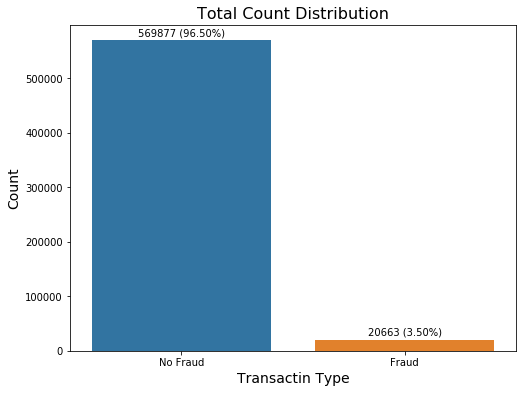

In [15]:
#total_count = len(train_trans)
plt.figure(figsize=(8,6))
g1 = sns.countplot(data = train_trans, x=train_trans['isFraud'].map({0:'No Fraud', 1: 'Fraud'}))
g1.set_title('Total Count Distribution',fontsize= 16)
g1.set_ylabel('Count',fontsize= 14)
g1.set_xlabel('Transactin Type' ,fontsize= 14)
for p in g1.patches:
    height = p.get_height()
    #print(p.get_x())
    g1.text(p.get_x()+p.get_width()/2.,height+5000,'{} ({:1.2f}%)'.format(height ,height/TotalTransCount * 100),ha="center", va='bottom', fontsize=10) 

**Highly** unbalanced data. 

In [16]:
print(np.sum(train_trans.index.unique().isin(train_id.index.unique())))# Check how many indexes from TRAIN_TRANS dataset are present in TRAIN_ID dataset.
print(np.sum(test_trans.index.unique().isin(test_id.index.unique())))

144233
141907


In [17]:
print(train_trans.shape)
print(train_id.shape)

print(test_trans.shape)
print(test_id.shape)

(590540, 433)
(144233, 40)
(506691, 392)
(141907, 40)


**Not all transaction ids have entry in identity table**

In [18]:
## Grouping columns according to there names
card_col = ['card1','card2','card3','card4','card5','card6']
add_col = ['addr1','addr2']
dist_col=['dist1', 'dist2']
c_col =['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']
d_col = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']
m_col = ['M1','M2','M3','M4','M5','M6','M7','M8','M9'] 
other_col = ['isFraud','TransactionDT','TransactionAmt','ProductCD']
email_col = [ 'P_emaildomain','R_emaildomain']
v_col =[]
for v in range (1, 340):
    v_col.append('V'+str(v))
    #print( v)

In [19]:
train_trans[other_col].head()

isFraud  TransactionDT  TransactionAmt ProductCD
TransactionID                                                  
2987000              0          86400          68.500         W
2987001              0          86401          29.000         W
2987002              0          86469          59.000         W
2987003              0          86499          50.000         W
2987004              0          86506          50.000         H

In [20]:
metadata(train_trans[other_col])

Name    Dtype  Missing  Percentage_Missing  Unique
0         isFraud    int64        0               0.000       2
1   TransactionDT    int64        0               0.000  573349
2  TransactionAmt  float64        0               0.000   20902
3       ProductCD   object        0               0.000       5

# TransactionAmt

In [21]:
quantiles[['TransactionAmt']]

TransactionAmt
0.010           9.244
0.200          35.950
0.250          43.321
0.500          68.769
0.700         117.000
0.750         125.000
0.900         275.293
0.950         445.000
0.960         500.000
0.990        1104.000

In [22]:
train_trans[['TransactionAmt']].describe()

TransactionAmt
count      590540.000
mean          135.027
std           239.163
min             0.251
25%            43.321
50%            68.769
75%           125.000
max         31937.391

In [23]:
metadata(train_trans[['TransactionAmt']])

Name    Dtype  Missing  Percentage_Missing  Unique
0  TransactionAmt  float64        0               0.000   20902

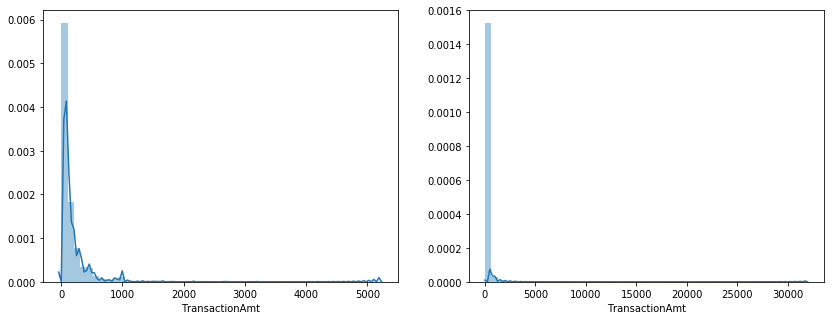

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(train_trans[train_trans['isFraud']==1]['TransactionAmt'].dropna(), norm_hist=True)
plt.subplot(122)
sns.distplot(train_trans[train_trans['isFraud']==0]['TransactionAmt'].dropna())
plt.show()

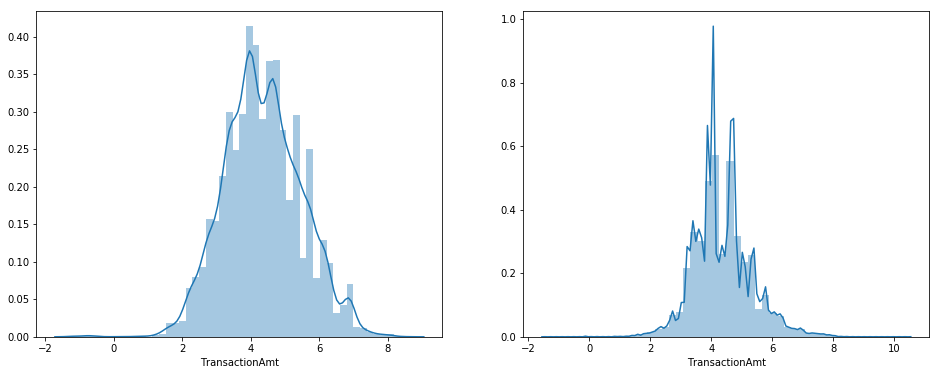

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(np.log(train_trans[train_trans['isFraud']==1]['TransactionAmt'].dropna()), norm_hist=True)
plt.subplot(122)
sns.distplot(np.log(train_trans[train_trans['isFraud']==0]['TransactionAmt'].dropna()), norm_hist=True)
plt.show()

# ProductCD Column

In [26]:
metadata(train_trans[['ProductCD']])

Name   Dtype  Missing  Percentage_Missing  Unique
0  ProductCD  object        0               0.000       5

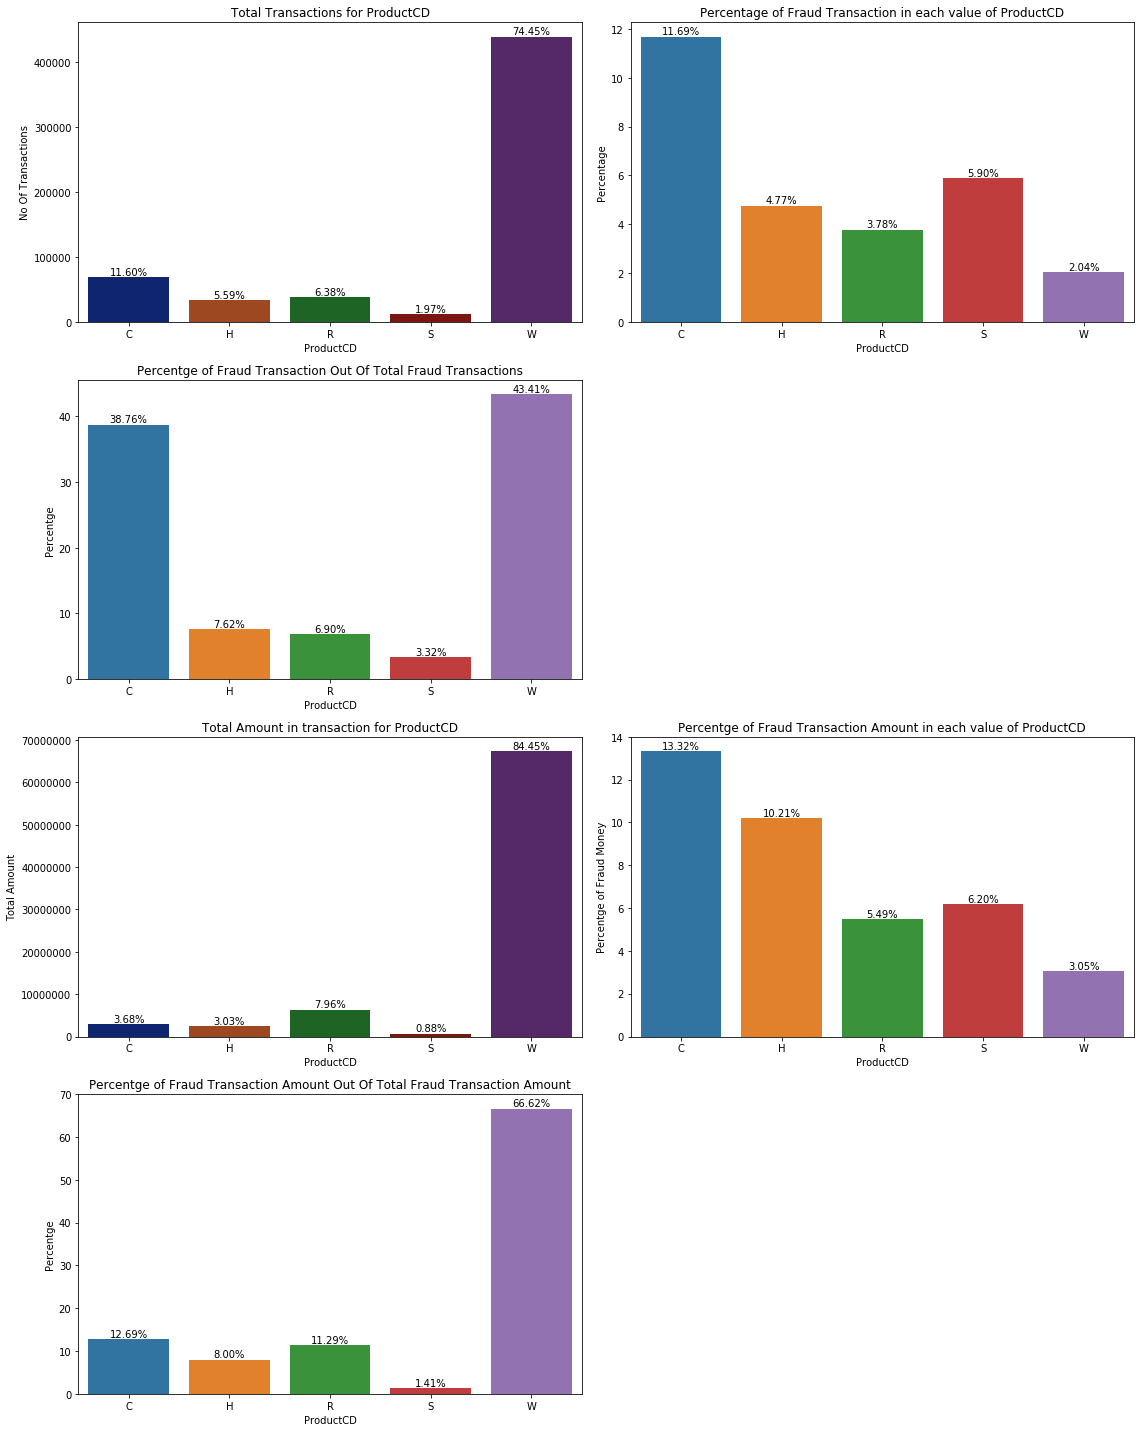

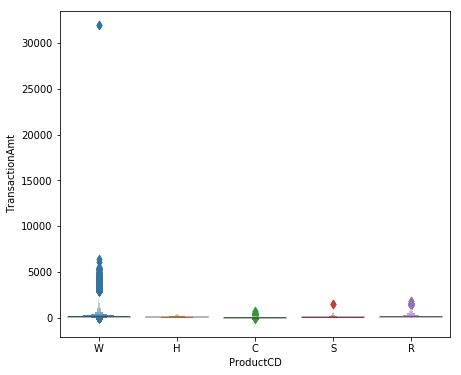

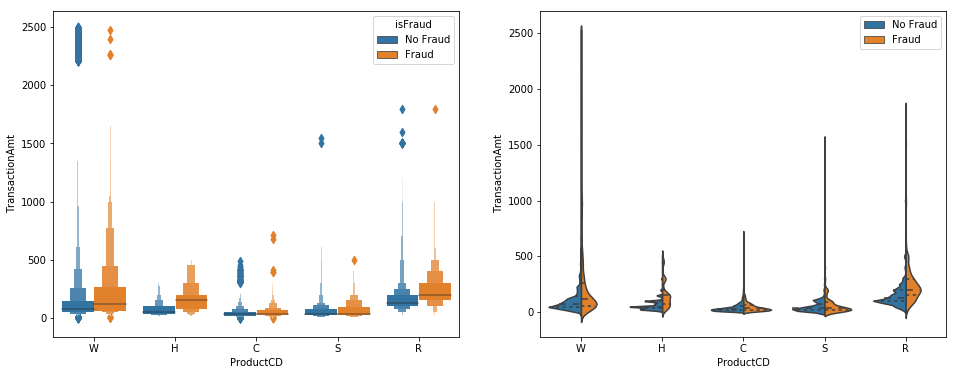

In [27]:
count_perFraud_plots(train_trans,'ProductCD', False, fontsize=12, figsizeW=16, figsizeH=20)
plt.figure(figsize=(7,6))
sns.boxenplot(data=train_trans, x='ProductCD', y='TransactionAmt')
plot_boxen_violin(train_trans,2500,'ProductCD')
plt.show()

# Card Columns

In [28]:
train_trans[card_col].head()

card1   card2   card3       card4   card5   card6
TransactionID                                                   
2987000        13926     nan 150.000    discover 142.000  credit
2987001         2755 404.000 150.000  mastercard 102.000  credit
2987002         4663 490.000 150.000        visa 166.000   debit
2987003        18132 567.000 150.000  mastercard 117.000   debit
2987004         4497 514.000 150.000  mastercard 102.000  credit

In [29]:
metadata(train_trans[card_col])

Name    Dtype  Missing  Percentage_Missing  Unique
0  card1    int64        0               0.000   13553
1  card2  float64     8933               1.513     500
2  card3  float64     1565               0.265     114
3  card4   object     1577               0.267       4
4  card5  float64     4259               0.721     119
5  card6   object     1571               0.266       4

In [30]:
train_trans[card_col].describe()

card1      card2      card3      card5
count 590540.000 581607.000 588975.000 586281.000
mean    9898.735    362.555    153.195    199.279
std     4901.170    157.793     11.336     41.244
min     1000.000    100.000    100.000    100.000
25%     6019.000    214.000    150.000    166.000
50%     9678.000    361.000    150.000    226.000
75%    14184.000    512.000    150.000    226.000
max    18396.000    600.000    231.000    237.000

In [31]:
quantiles[['card1','card2','card3','card5']]

card1   card2   card3   card5
0.010  1338.000 100.000 144.000 102.000
0.200  4908.000 194.000 150.000 166.000
0.250  6019.000 214.000 150.000 166.000
0.500  9678.000 361.000 150.000 226.000
0.700 12932.000 490.000 150.000 226.000
0.750 14184.000 512.000 150.000 226.000
0.900 16582.100 555.000 150.000 226.000
0.950 17319.000 567.000 185.000 226.000
0.960 17458.000 583.000 185.000 226.000
0.990 18238.000 583.000 185.000 226.000

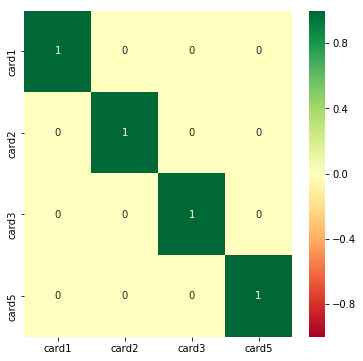

In [32]:
corrfunc(train_trans,card_col)

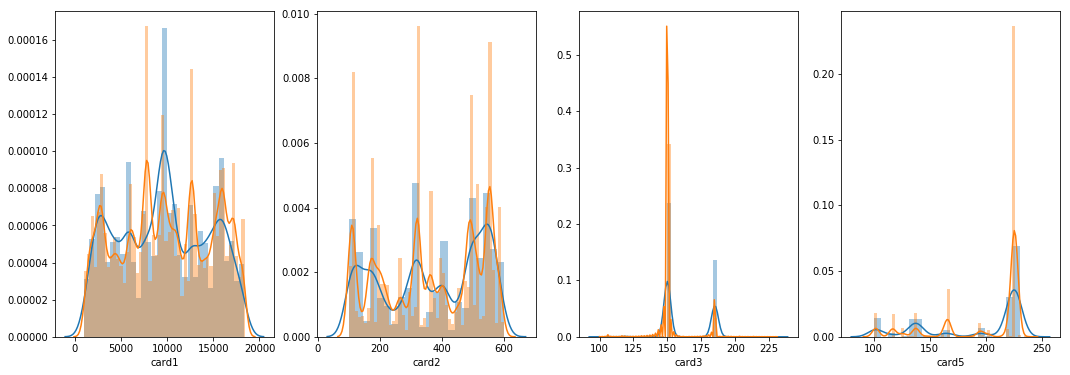

In [33]:
plt.figure(figsize=(18,6))
plt.subplot(141)
plot1 = sns.distplot(train_trans[train_trans['isFraud']==1]['card1'])
plot1 = sns.distplot(train_trans[train_trans['isFraud']==0]['card1'])
plt.subplot(142)
plot2 = sns.distplot(train_trans[train_trans['isFraud']==1]['card2'].dropna())
plot2 = sns.distplot(train_trans[train_trans['isFraud']==0]['card2'].dropna())
plt.subplot(143)
plot3 = sns.distplot(train_trans[train_trans['isFraud']==1]['card3'].dropna())
plot3 = sns.distplot(train_trans[train_trans['isFraud']==0]['card3'].dropna())
plt.subplot(144)
plot4 = sns.distplot(train_trans[train_trans['isFraud']==1]['card5'].dropna())
plot4 = sns.distplot(train_trans[train_trans['isFraud']==0]['card5'].dropna())
plt.show()

OBSERVATIONS:
* Card1 has no null values 
* CArd1 and Card2 are well distributed.
* Card2 to Car6 have null values.
* from Quantiles and distplot of Card3 and Card5 we can see that some values have high frequency and some have low frequency

In card3 and card5 distribution of values in not even. we will use value count to seperate the values in card3 and card5

## Card3 Columns

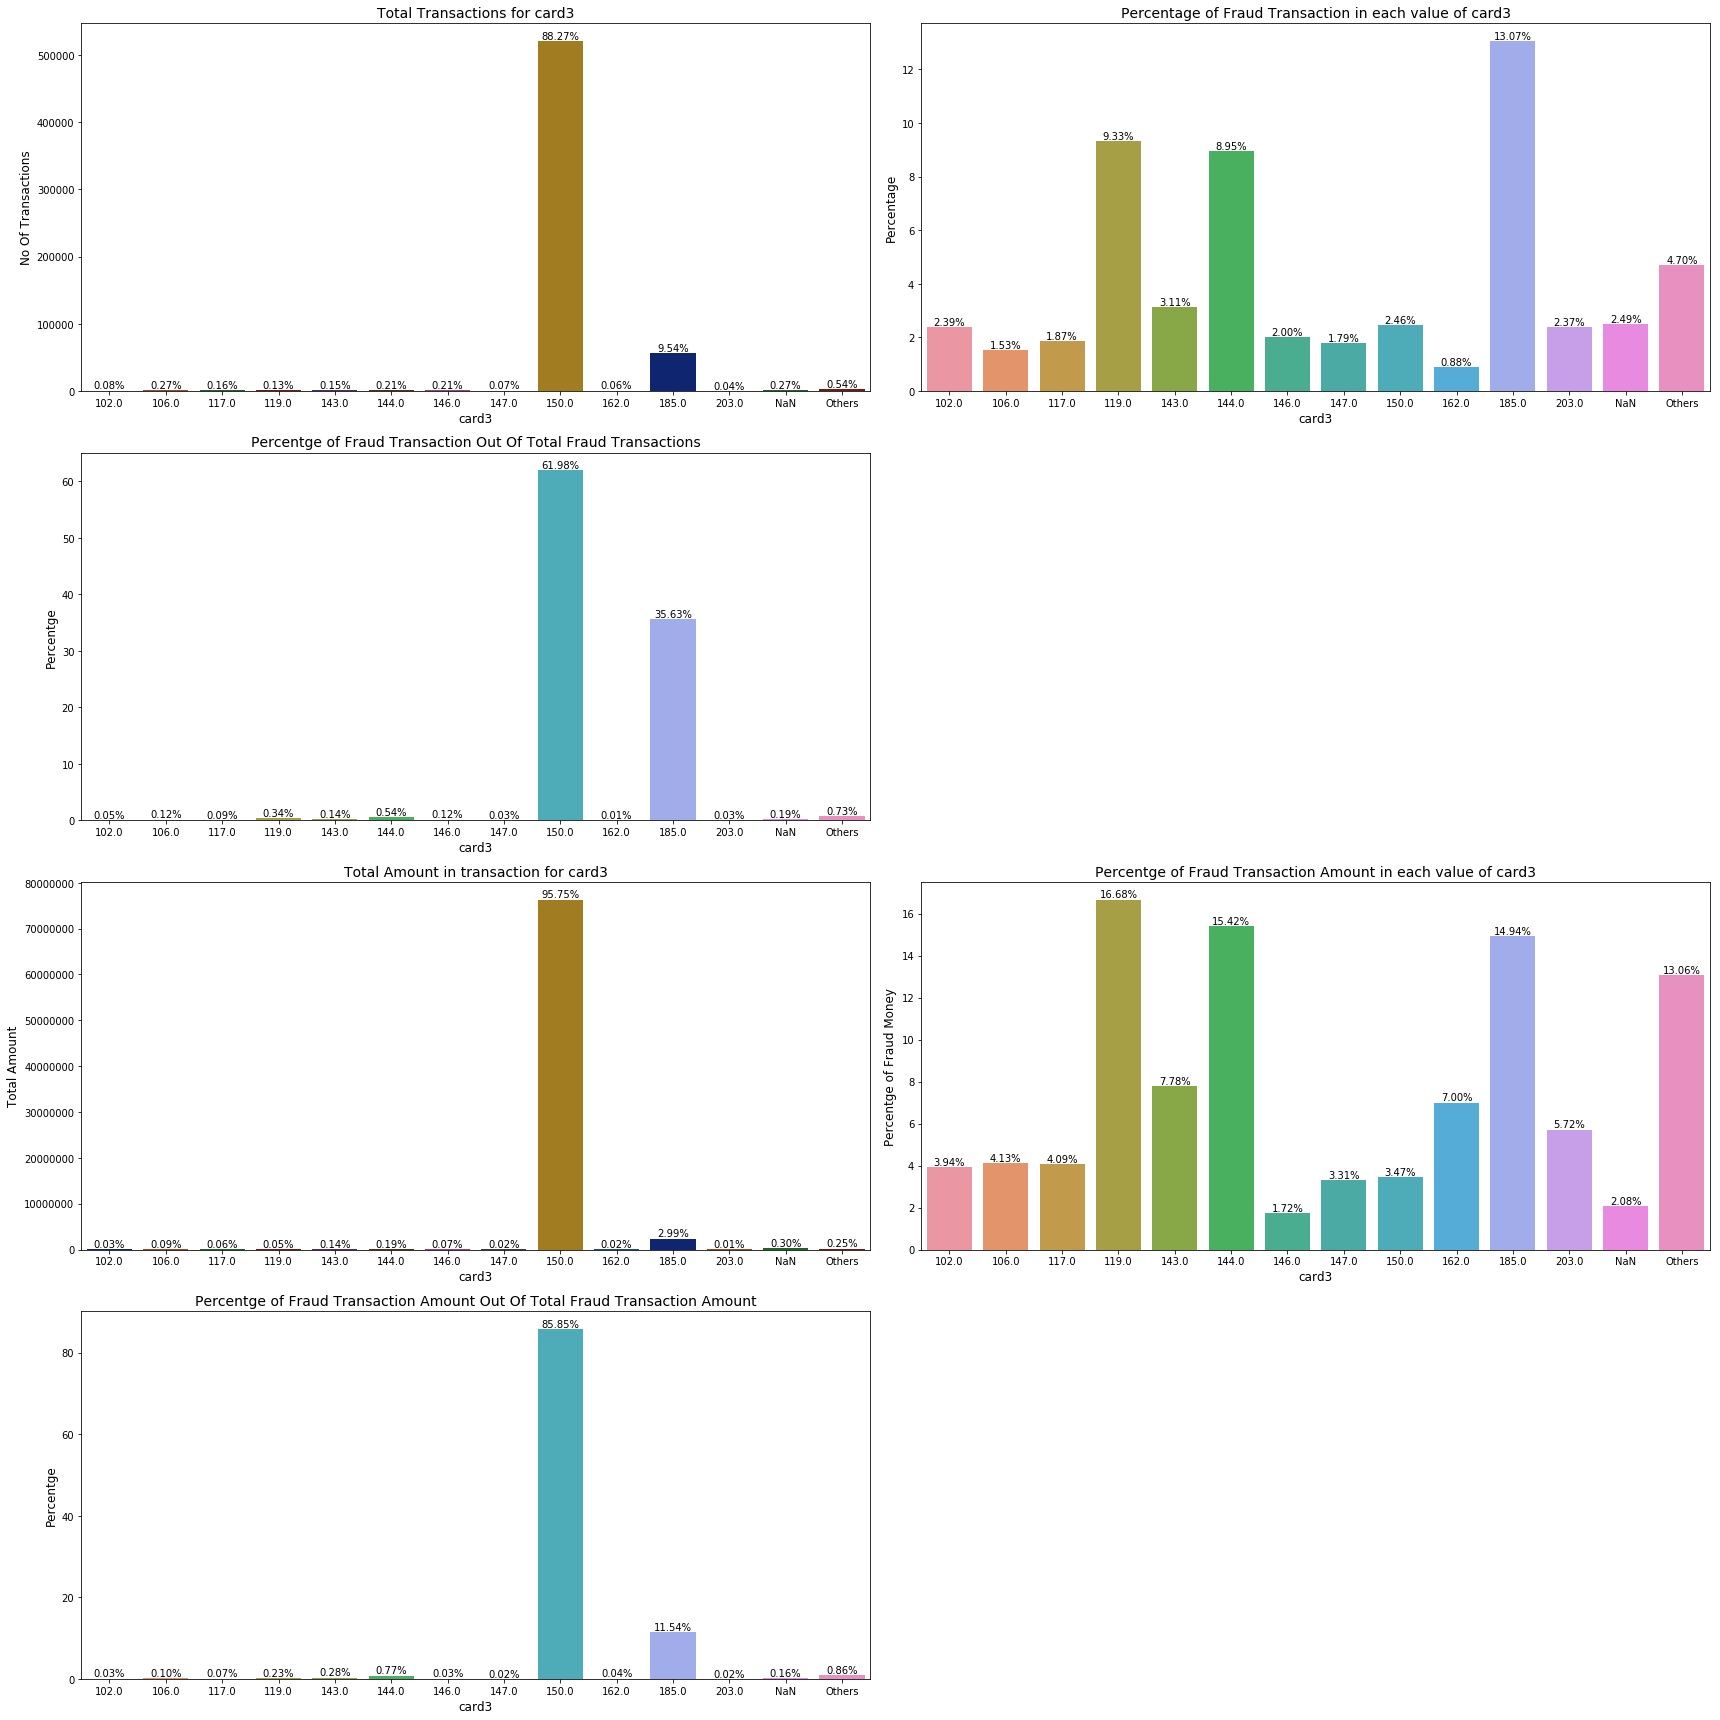

In [34]:
count_perFraud_plots(train_trans,'card3', True, 'value count',250, 14, 24, 24)

## Card4 Column

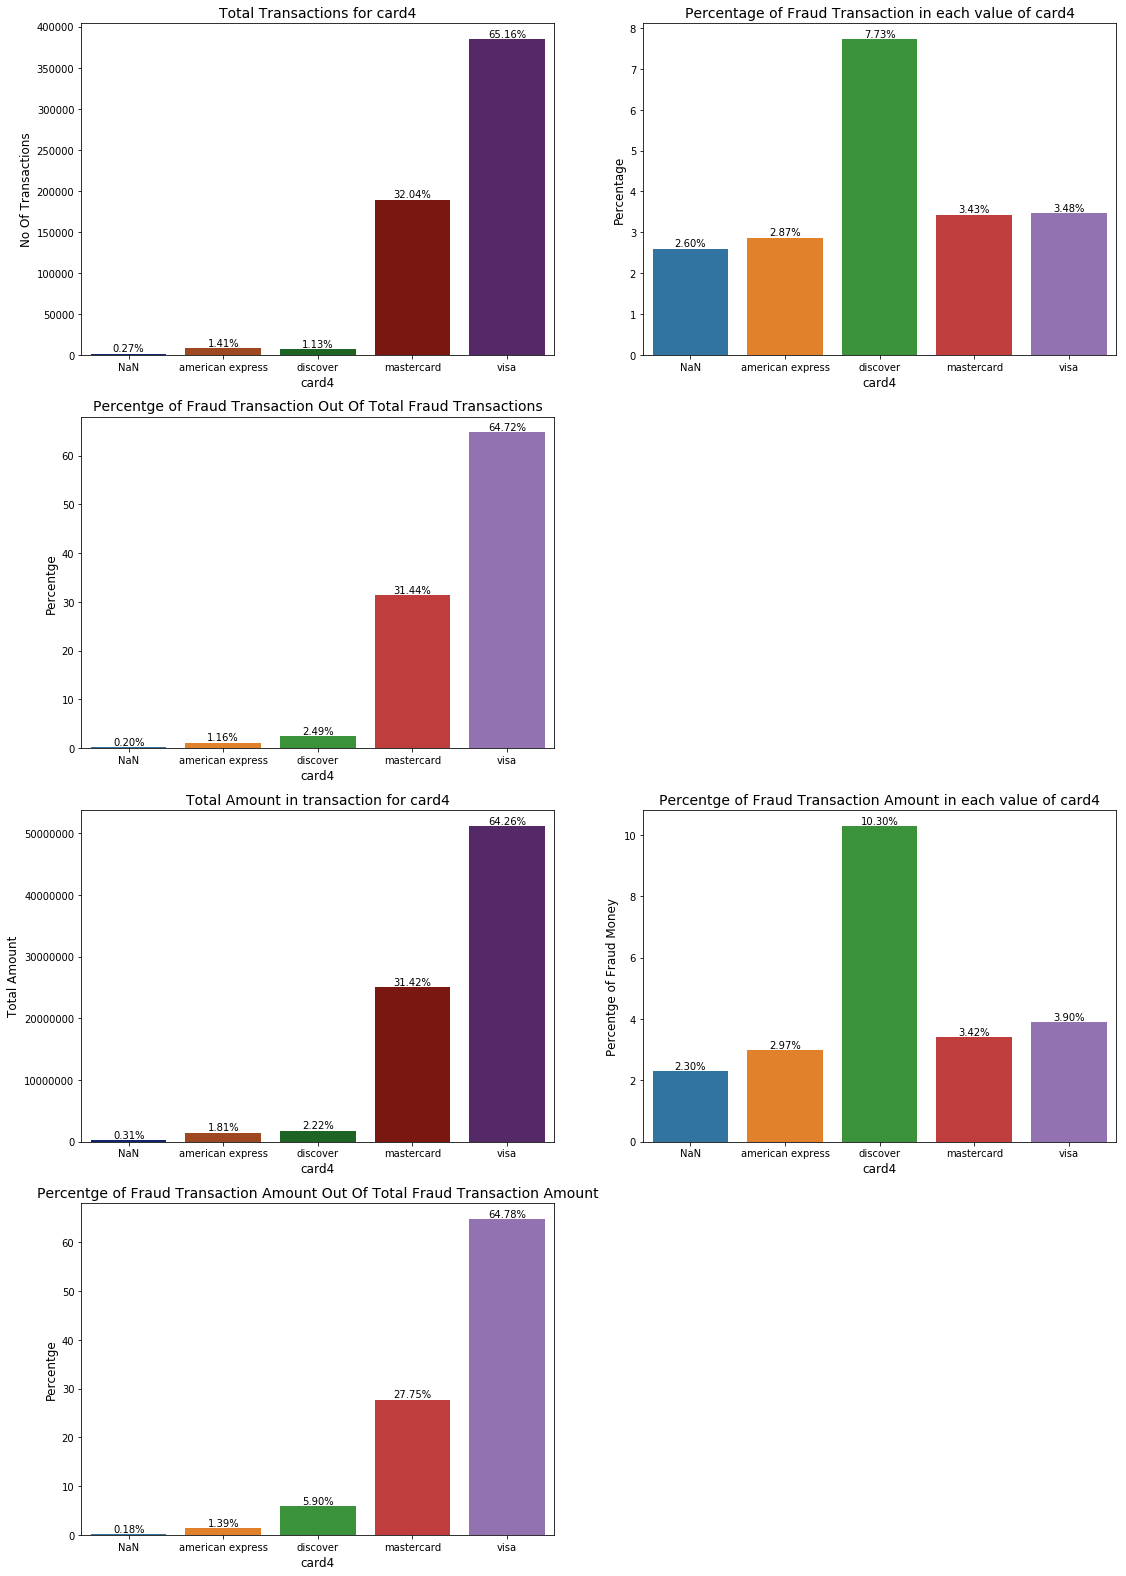

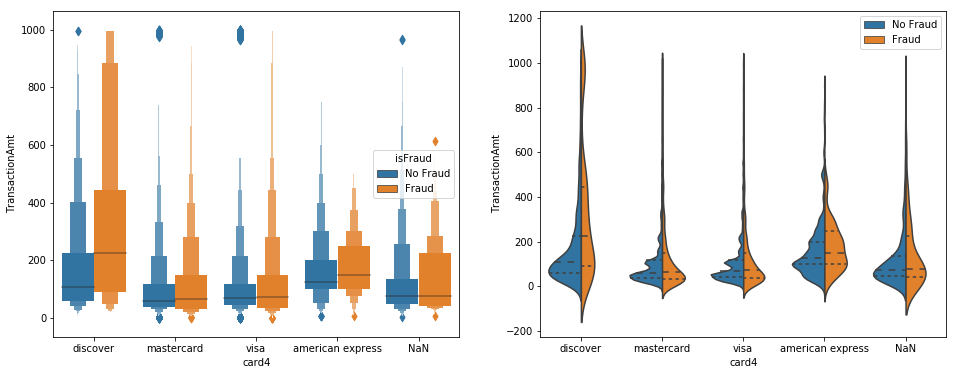

In [35]:
count_perFraud_plots(train_trans,'card4', False,fontsize= 14,figsizeW= 16,figsizeH=22)
plot_boxen_violin(train_trans, 1000, 'card4')

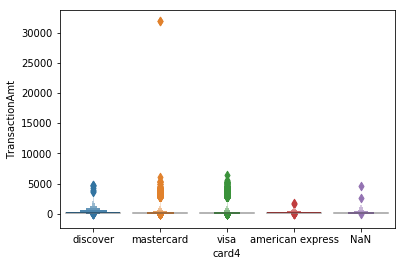

In [36]:
 sns.boxenplot(data=train_trans[['card4','TransactionAmt']].fillna('NaN'), x='card4', y='TransactionAmt')

## Card5 Columns

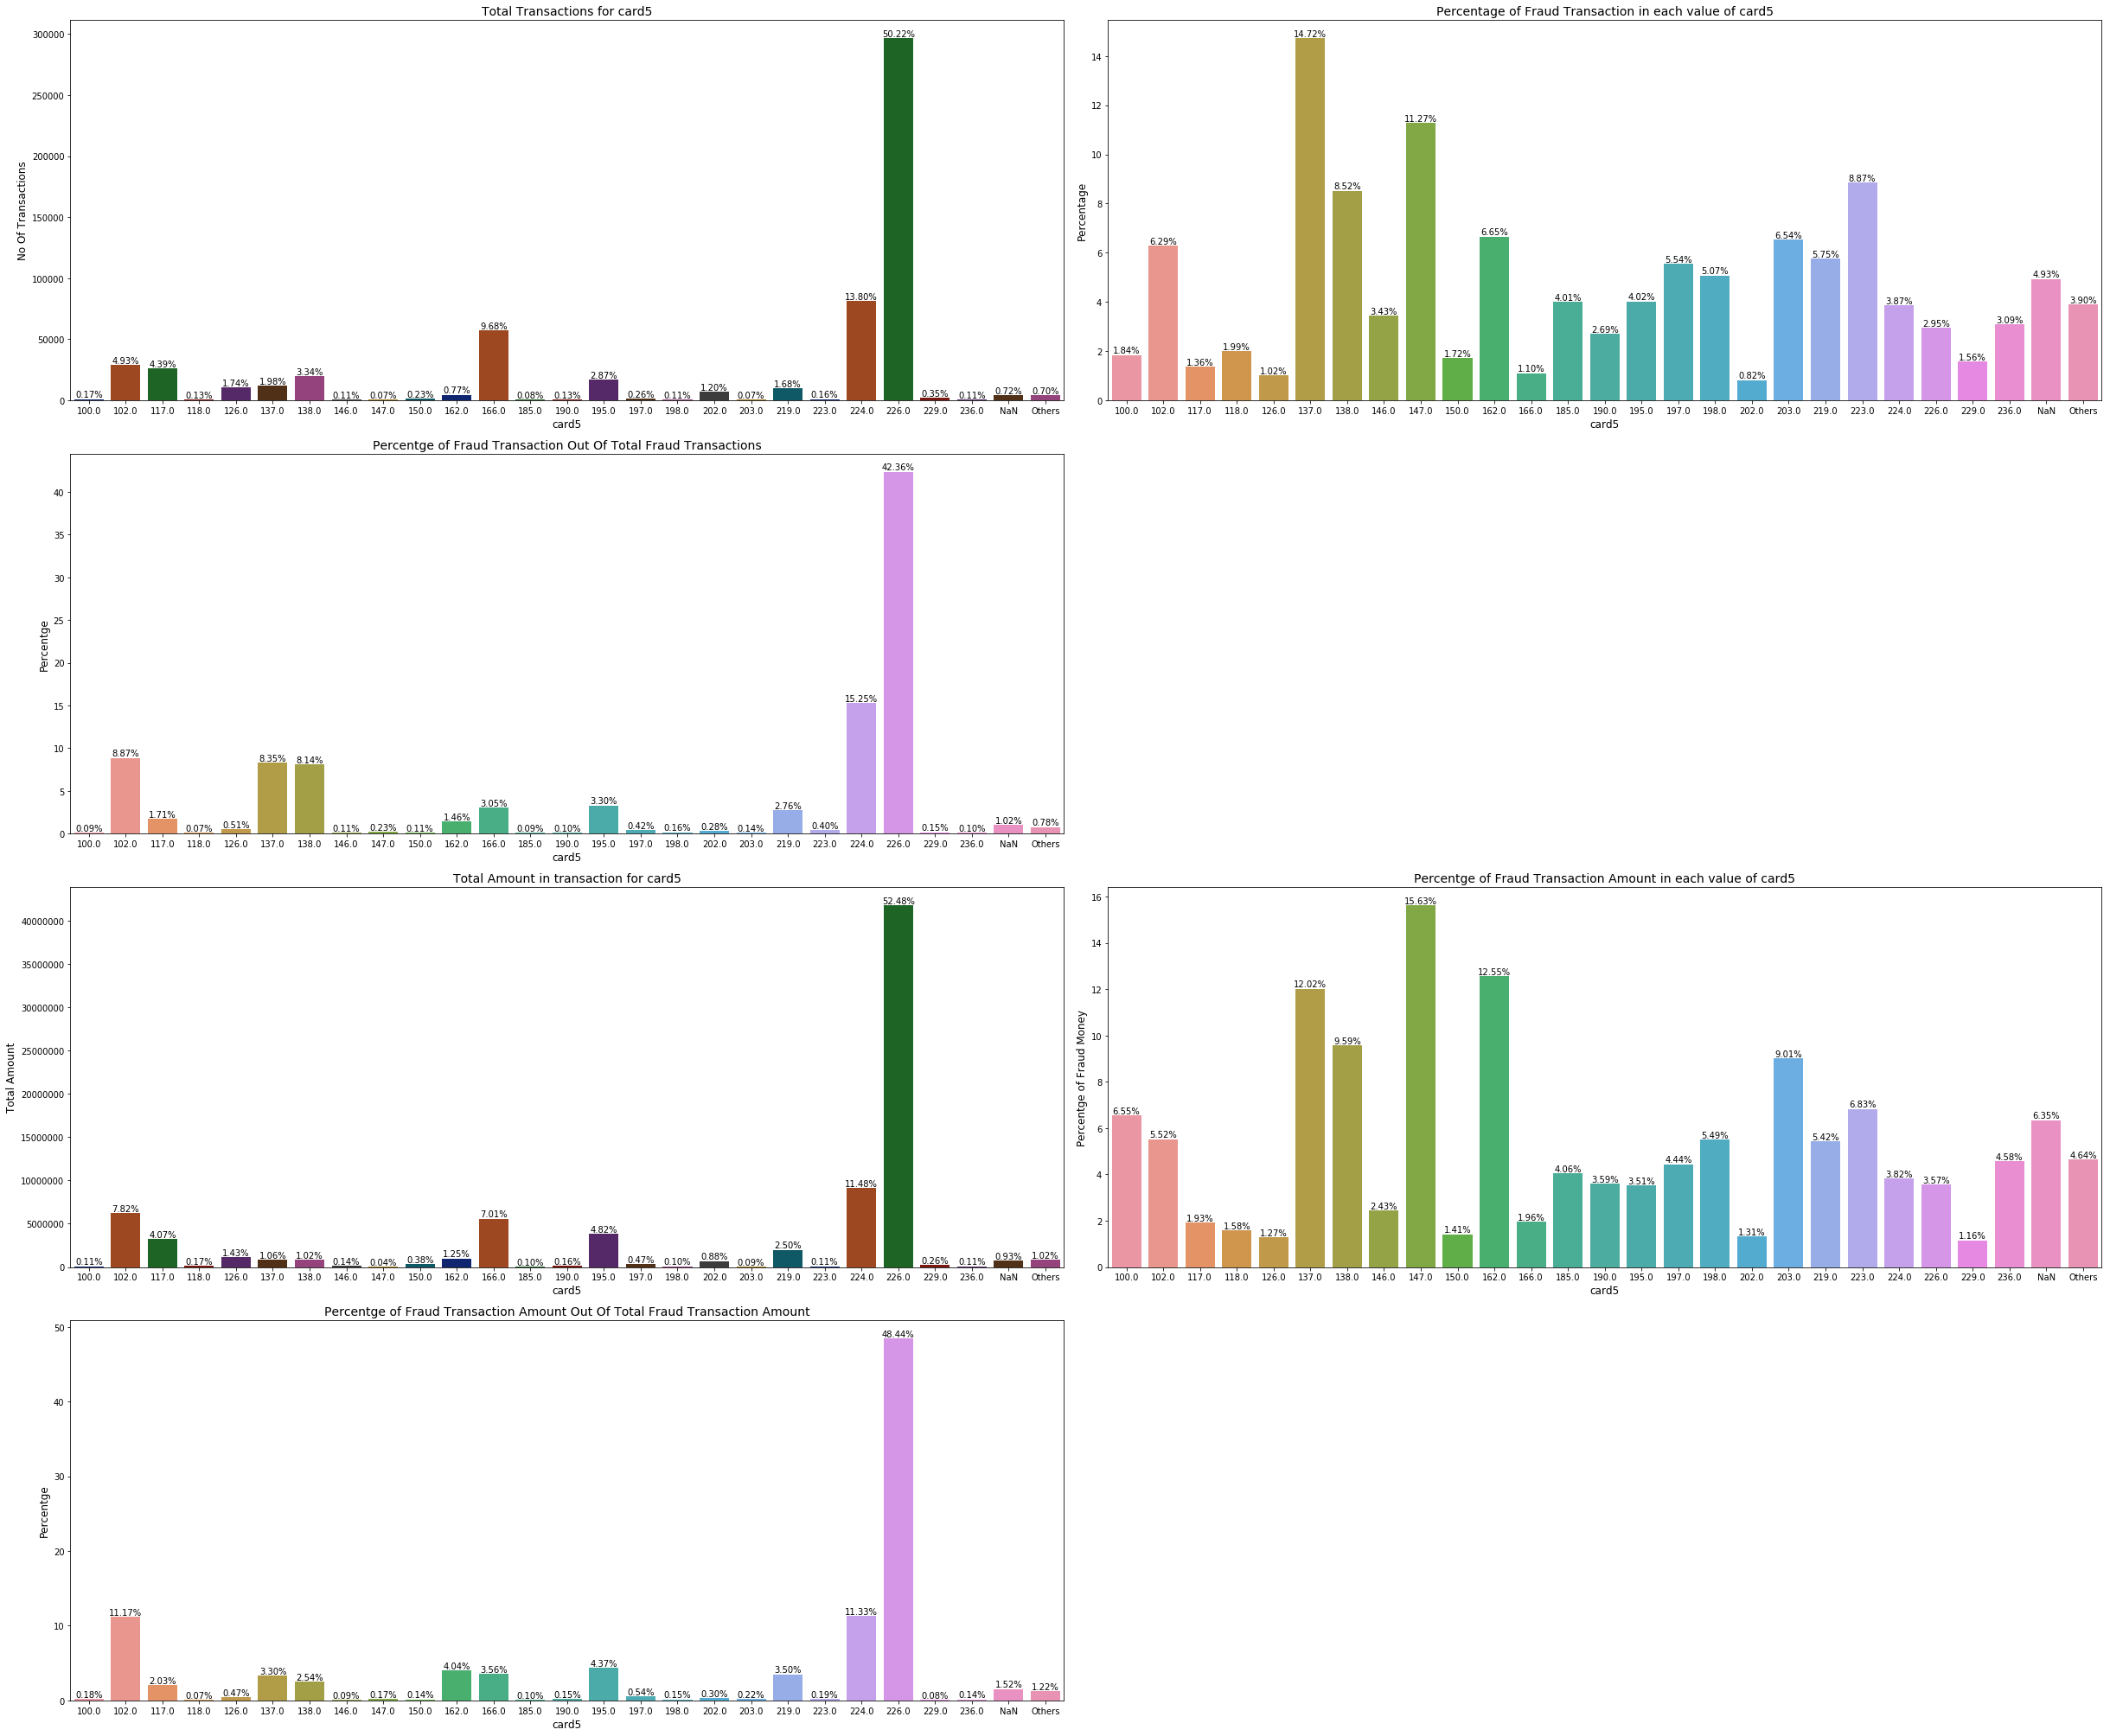

In [37]:
count_perFraud_plots(train_trans,'card5', True, 'value count',350, 14, 34, 28)

## Card6 Column

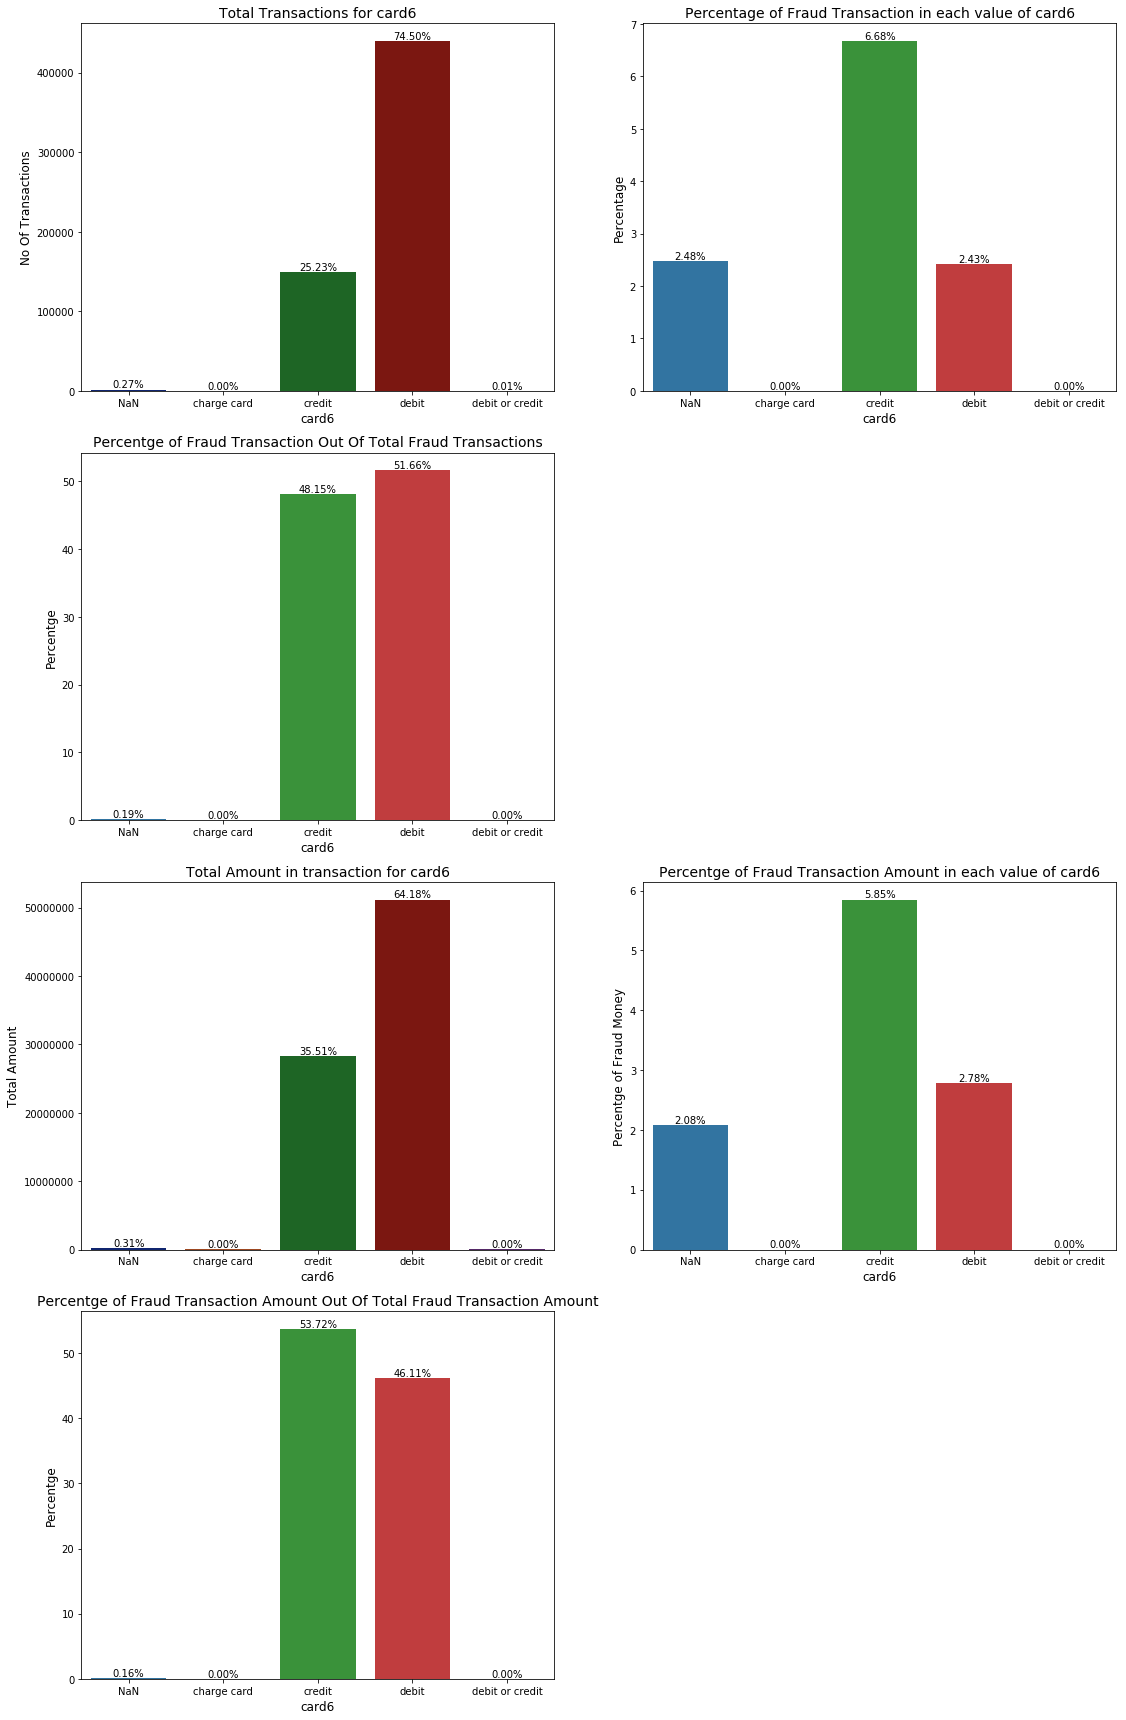

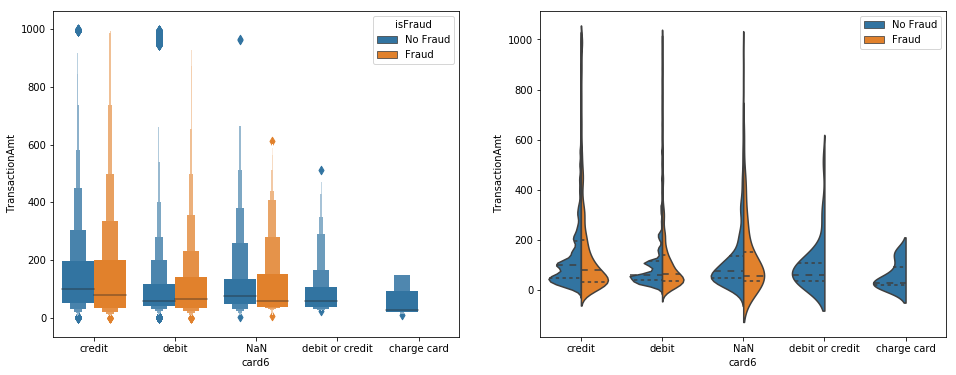

In [38]:
count_perFraud_plots(train_trans,'card6', False,fontsize= 14,figsizeW= 16,figsizeH=24)
plot_boxen_violin(train_trans, 1000, 'card6')

# Address Columns

In [39]:
train_trans[add_col].head()

addr1  addr2
TransactionID               
2987000       315.000 87.000
2987001       325.000 87.000
2987002       330.000 87.000
2987003       476.000 87.000
2987004       420.000 87.000

In [40]:
metadata(train_trans[add_col])

Name    Dtype  Missing  Percentage_Missing  Unique
0  addr1  float64    65706              11.126     332
1  addr2  float64    65706              11.126      74

In [41]:
train_trans[add_col].describe()

addr1      addr2
count 524834.000 524834.000
mean     290.734     86.801
std      101.741      2.691
min      100.000     10.000
25%      204.000     87.000
50%      299.000     87.000
75%      330.000     87.000
max      540.000    102.000

In [42]:
quantiles[add_col]

addr1  addr2
0.010 123.000 87.000
0.200 204.000 87.000
0.250 204.000 87.000
0.500 299.000 87.000
0.700 325.000 87.000
0.750 330.000 87.000
0.900 441.000 87.000
0.950 485.000 87.000
0.960 485.000 87.000
0.990 512.000 87.000

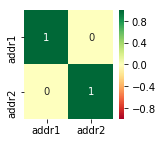

In [43]:
corrfunc(train_trans,add_col)

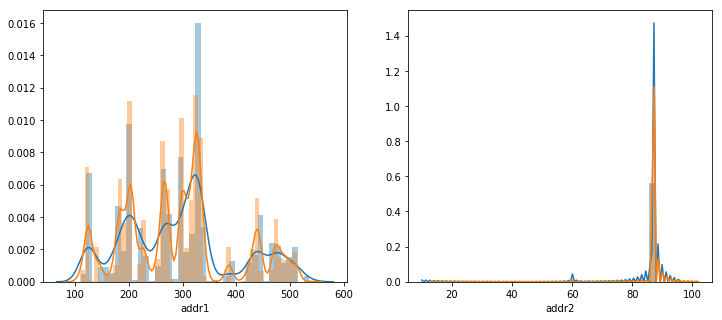

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot1 = sns.distplot(train_trans[train_trans['isFraud'] == 1]['addr1'].dropna())
plot1 = sns.distplot(train_trans[train_trans['isFraud'] == 0]['addr1'].dropna())
plt.subplot(122)
plot2 = sns.distplot(train_trans[train_trans['isFraud'] == 1]['addr2'].dropna())
plot2 = sns.distplot(train_trans[train_trans['isFraud'] == 0]['addr2'].dropna())
plt.show()

## Add1 Columns

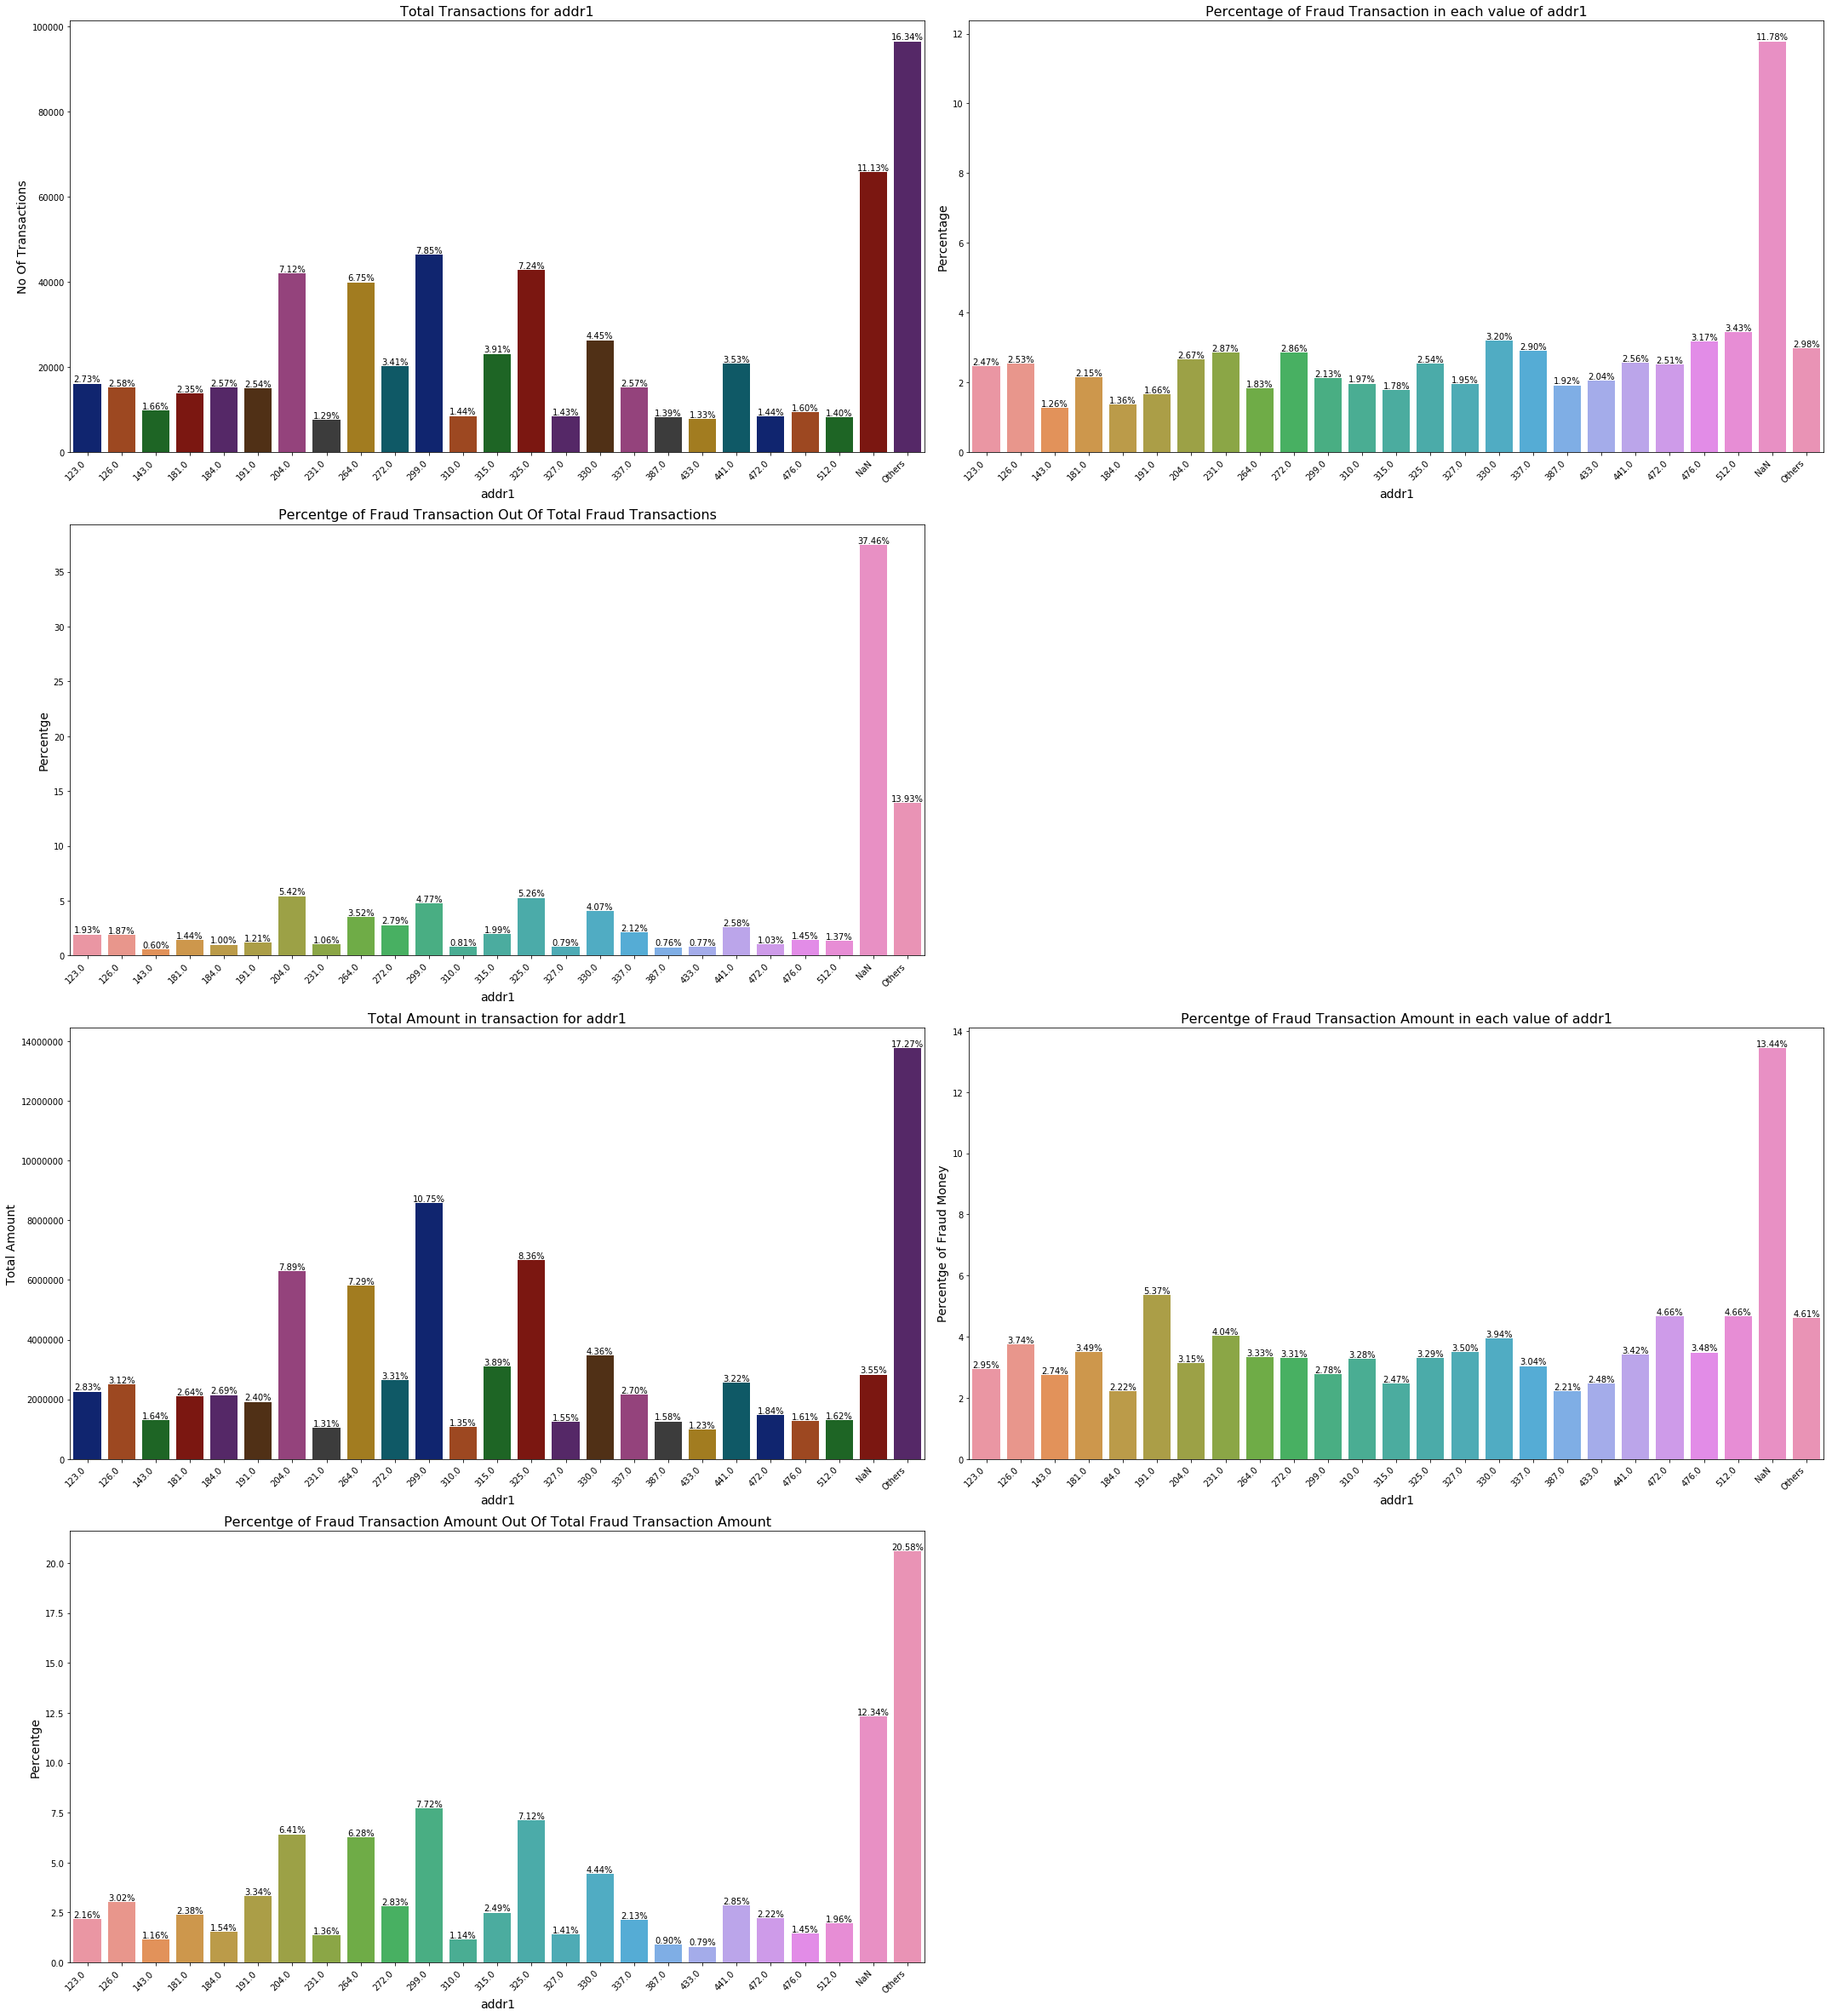

In [45]:
count_perFraud_plots(train_trans,'addr1', True,'value count',7000,fontsize= 16,figsizeW= 30,figsizeH=33,rotation=45)

## Addr2 Columns

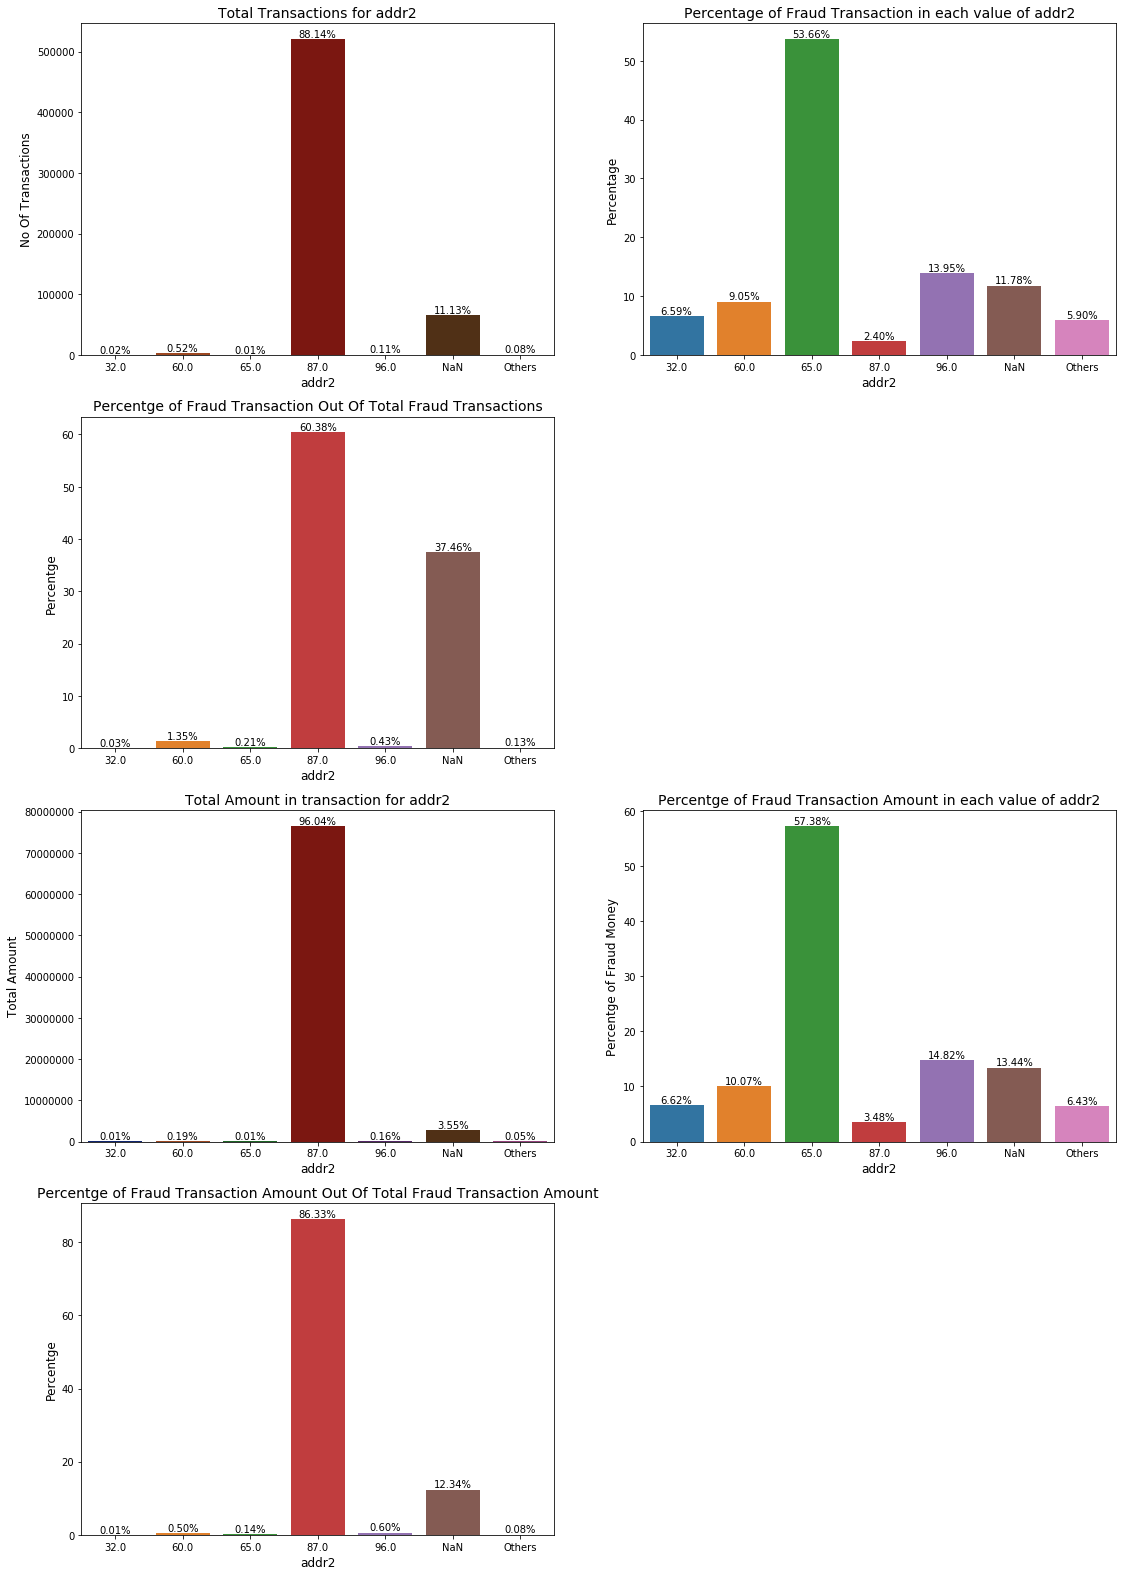

In [46]:
count_perFraud_plots(train_trans,'addr2', True,'value count',60,fontsize= 14,figsizeW= 16,figsizeH=22)


V Here


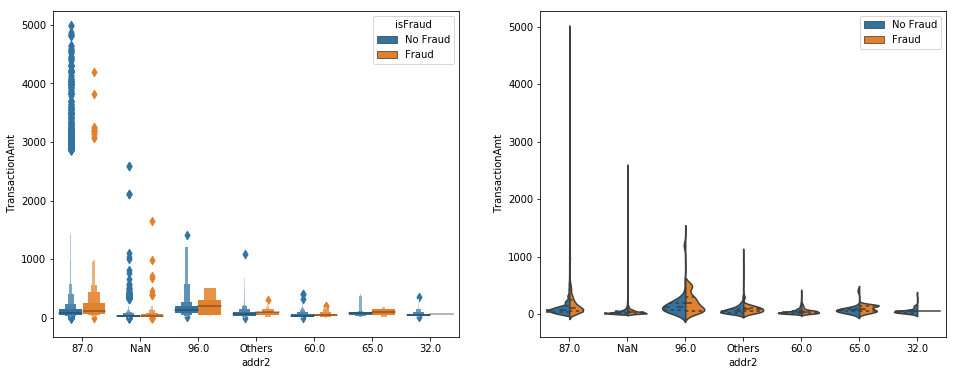

In [47]:
plot_boxen_violin(train_trans, 5000, 'addr2', True, 'value count', 60)

**OBSERVATIONS**
* Addr1 is well distributed but Addr2 is concentrated at 87
* Even 11.13% entries in addr2 are NaN values they(NaN values) represent 37.46% of fraud transaction. so droping NaN from addr1 is not a right decision.
* from graphs we can a pattern with NaN, though. 
* Fraud transaction with NaN are 37% of total fraud transaction but the transaction money is only 12% 

# Dist columns

In [48]:
train_trans[dist_col].head()

dist1  dist2
TransactionID               
2987000        19.000    nan
2987001           nan    nan
2987002       287.000    nan
2987003           nan    nan
2987004           nan    nan

In [49]:
metadata(train_trans[dist_col])

Name    Dtype  Missing  Percentage_Missing  Unique
0  dist1  float64   352271              59.652    2651
1  dist2  float64   552913              93.628    1751

In [50]:
train_trans[dist_col].describe()

dist1     dist2
count 238269.000 37627.000
mean     118.502   231.855
std      371.872   529.053
min        0.000     0.000
25%        3.000     7.000
50%        8.000    37.000
75%       24.000   206.000
max    10286.000 11623.000

In [51]:
quantiles[dist_col]

dist1    dist2
0.010    0.000    0.000
0.200    2.000    7.000
0.250    3.000    7.000
0.500    8.000   37.000
0.700   18.000  162.000
0.750   24.000  206.000
0.900  268.000  634.400
0.950  846.000 1001.000
0.960  991.000 1336.000
0.990 2040.000 2367.480

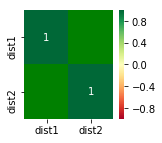

In [52]:
corrfunc(train_trans, dist_col)

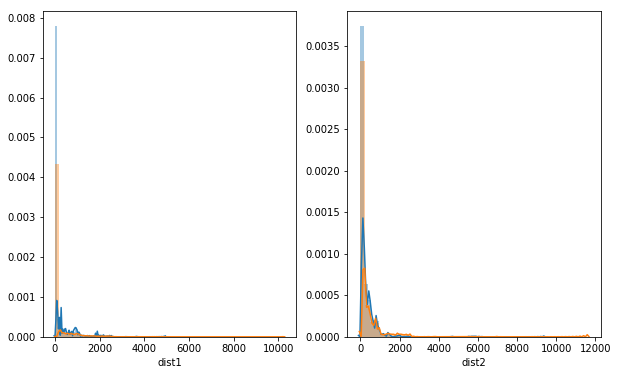

In [53]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plot1 = sns.distplot(train_trans[train_trans['isFraud'] == 1]['dist1'].dropna())
plot1 = sns.distplot(train_trans[train_trans['isFraud'] == 0]['dist1'].dropna())
plt.subplot(122)
plot2 = sns.distplot(train_trans[train_trans['isFraud'] == 1]['dist2'].dropna())
plot2 = sns.distplot(train_trans[train_trans['isFraud'] == 0]['dist2'].dropna())
plt.show()

## Dist1 Column

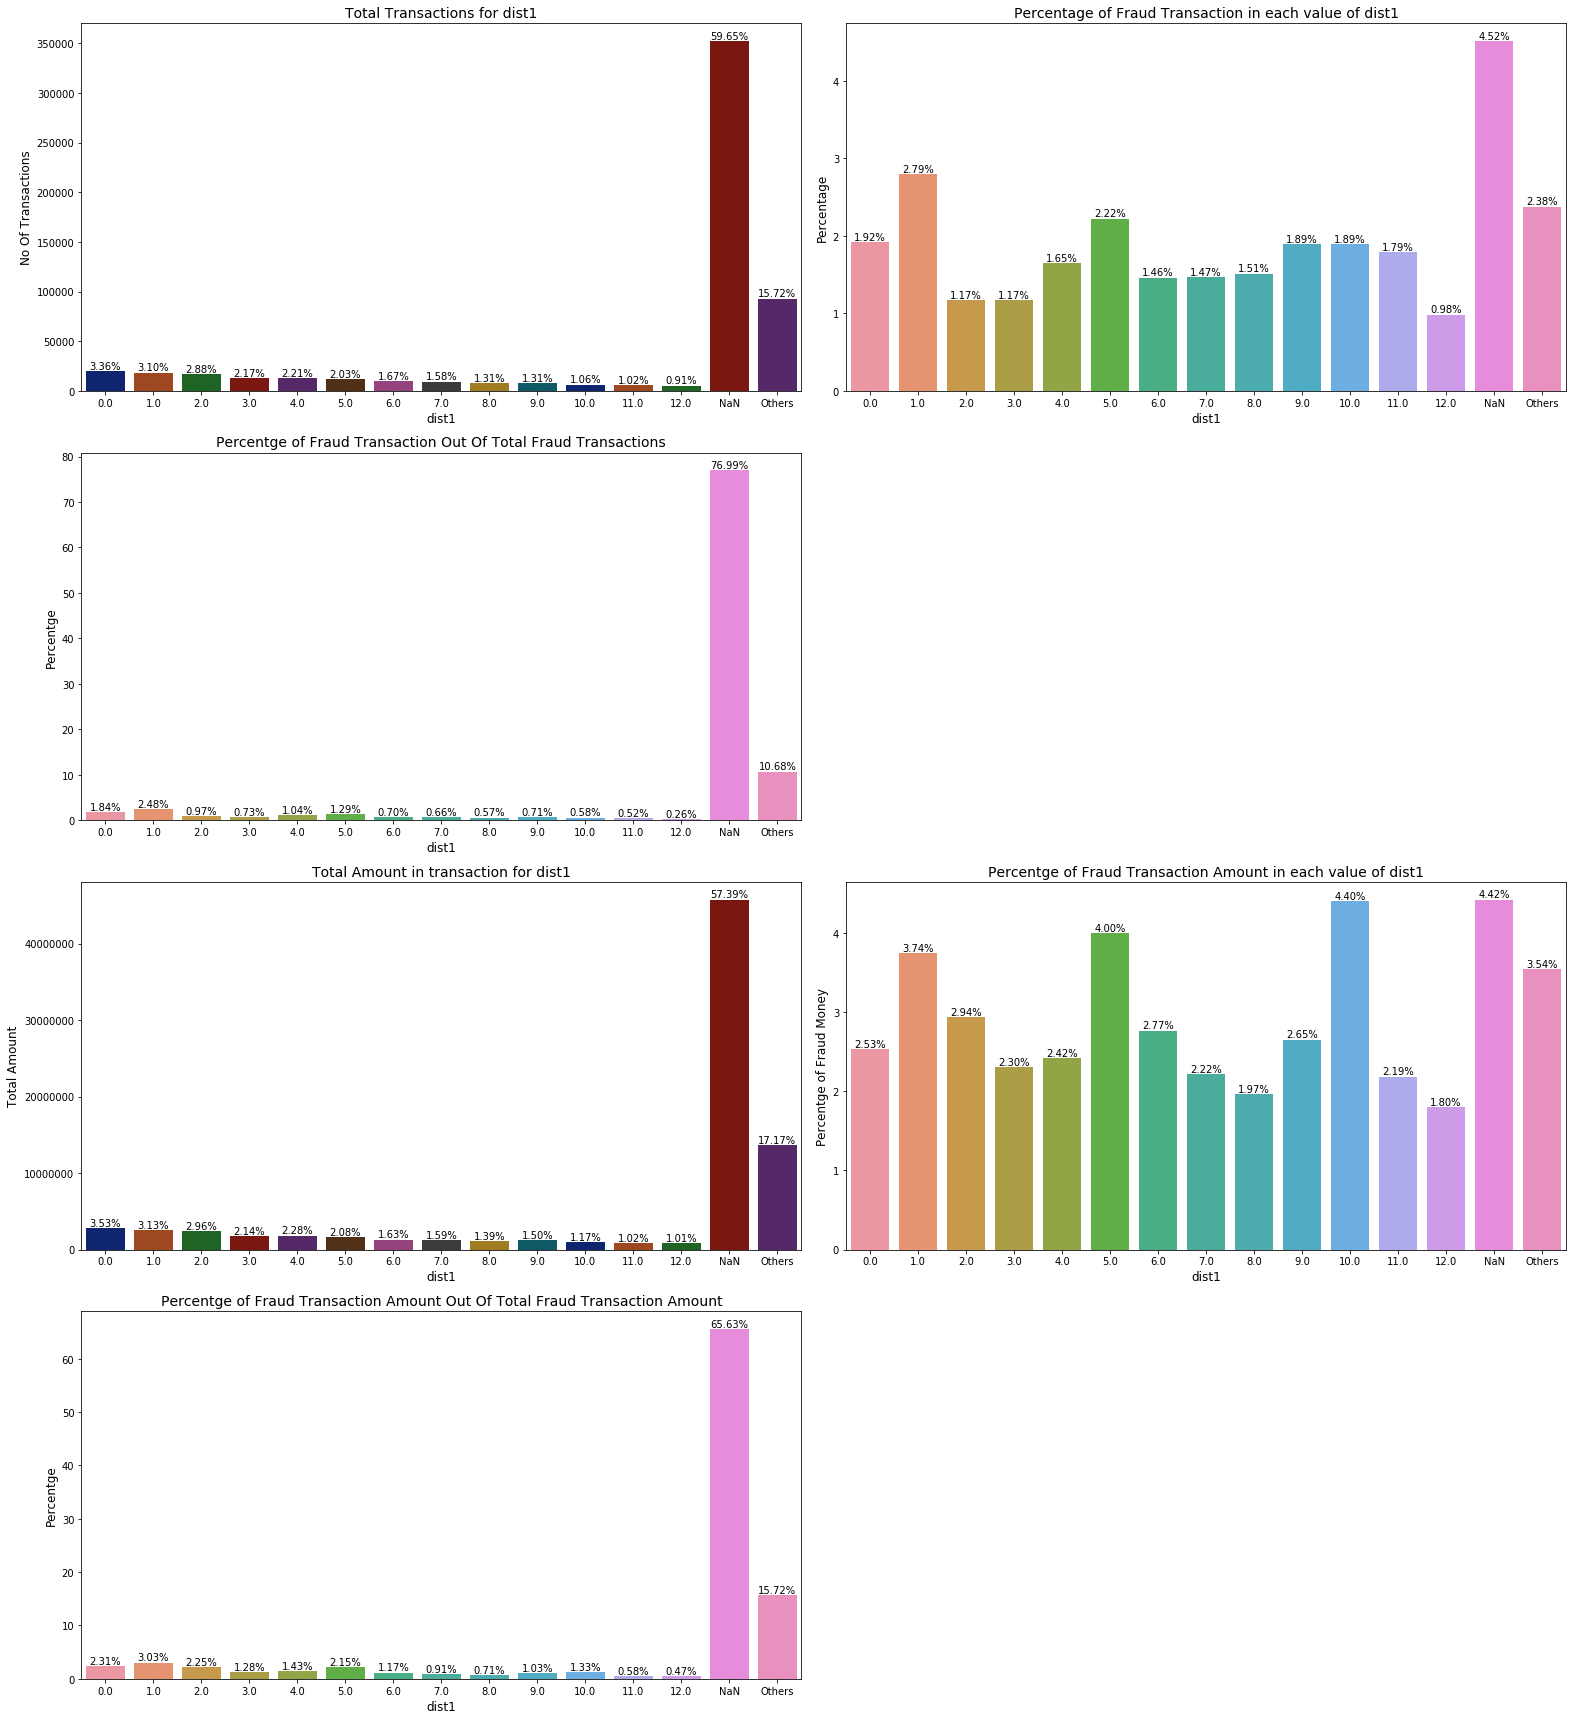

In [54]:
count_perFraud_plots(train_trans,'dist1', True,'value count',5000,fontsize= 14,figsizeW= 22,figsizeH=24)

## Dist2 Column

In [55]:
train_trans['dist2'].value_counts()[:10]

7.000      5687
0.000      3519
1.000      1374
9.000       742
4.000       659
2.000       556
3.000       490
68.000      485
6.000       412
13.000      397
199.000     362
10.000      356
Name: dist2, dtype: int64

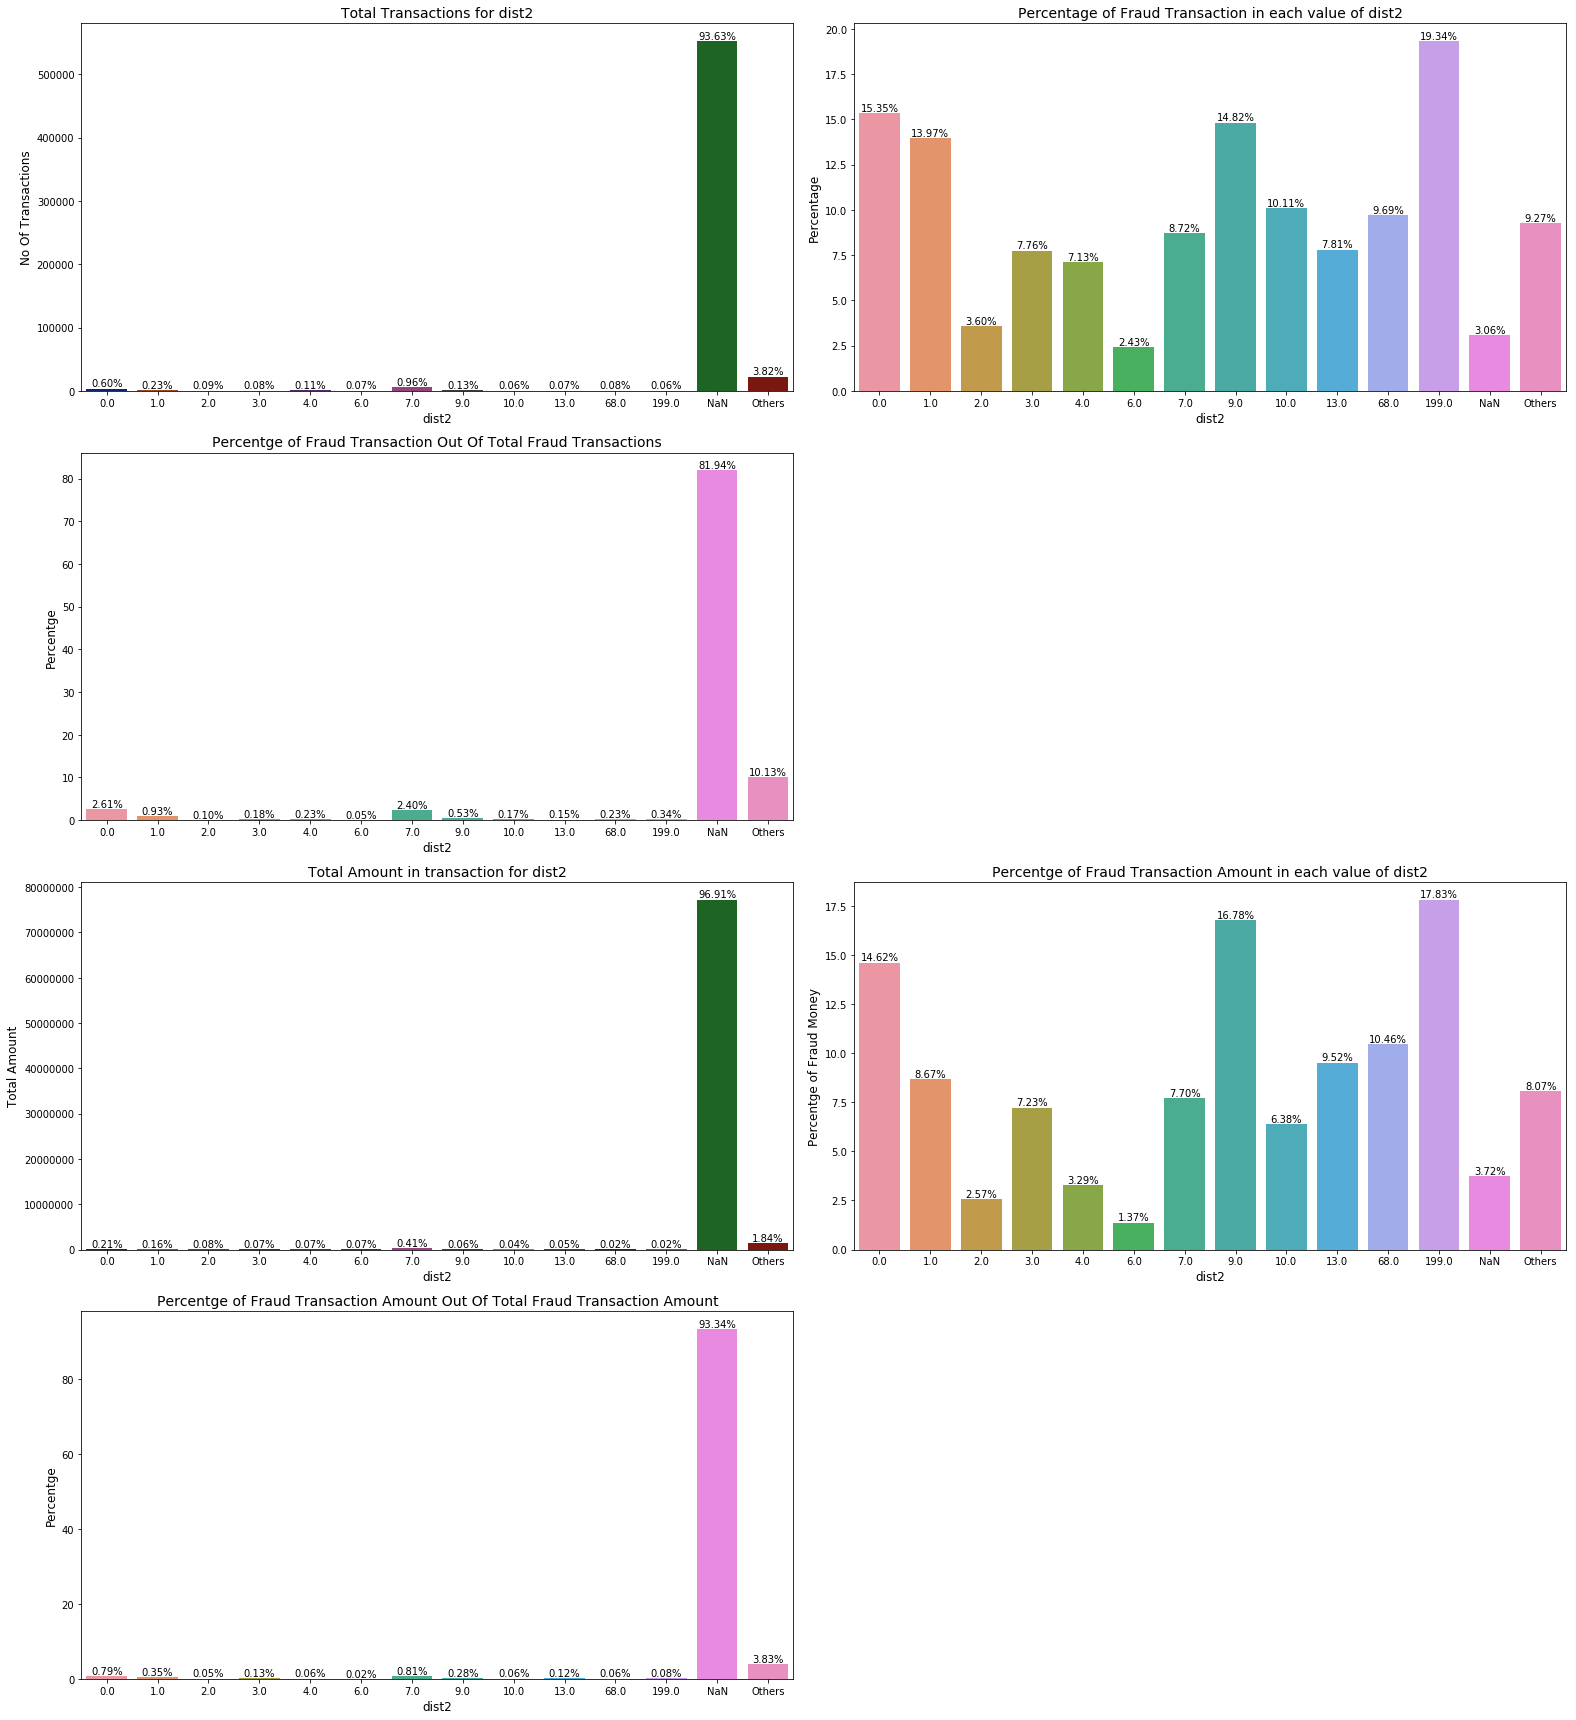

In [56]:
count_perFraud_plots(train_trans,'dist2', True,'value count',300,fontsize= 14,figsizeW= 22,figsizeH=24)

**OBSERVATION**
* NaN values have majority of fraud transaction and fraud money.

# Email Columns

In [57]:
train_trans[email_col].head()

P_emaildomain R_emaildomain
TransactionID                            
2987000                 NaN           NaN
2987001           gmail.com           NaN
2987002         outlook.com           NaN
2987003           yahoo.com           NaN
2987004           gmail.com           NaN

In [58]:
metadata(train_trans[email_col])

Name   Dtype  Missing  Percentage_Missing  Unique
0  P_emaildomain  object    94456              15.995      59
1  R_emaildomain  object   453249              76.752      60

In [59]:
train_trans[email_col].describe()

P_emaildomain R_emaildomain
count         496084        137291
unique            59            60
top        gmail.com     gmail.com
freq          228355         57147

In [60]:
def emailprovider(emailid):
    if emailid in mapping.keys():
        #print(mapping[emailid])
        return mapping[emailid]
    else:
        return emailid.split('.')[0]

mapping= {'frontier.com':'frontier','frontiernet.net':'frontier','gmail':'gmail','gmail.com':'gmail','hotmail.co.uk':'hotmail','hotmail.com':'Microsoft','hotmail.de':'Microsoft','hotmail.es':'Microsoft','hotmail.fr':'Microsoft',
          'icloud.com':'Apple','live.com':'Microsoft','live.com.mx':'Microsoft','live.fr':'Microsoft','mac.com':'Apple','netzero.com':'Netzero','netzero.net':'Netzero','outlook.com':'Microsoft','outlook.es':'Microsoft',
          'yahoo.co.jp':'Yahoo','yahoo.co.uk':'Yahoo','yahoo.com':'Yahoo','yahoo.com.mx':'Yahoo','yahoo.de':'Yahoo','yahoo.es':'Yahoo','yahoo.fr':'Yahoo','ymail.com':'Yahoo', 'scranton.edu':'Scranton'}


In [61]:
temp_mail= train_trans[['P_emaildomain','R_emaildomain','isFraud', 'TransactionAmt']].copy()
temp_mail['P_Domain'] = temp_mail['P_emaildomain'].dropna().map(lambda x: x.split('.')[-1]) # This Only give the domain eg.
temp_mail['P_Provider'] = temp_mail['P_emaildomain'].dropna().apply(emailprovider)
temp_mail['R_Domain'] = temp_mail['R_emaildomain'].dropna().map(lambda x: x.split('.')[-1])
temp_mail['R_Provider'] = temp_mail['R_emaildomain'].dropna().apply(emailprovider)

## P_Provider Column

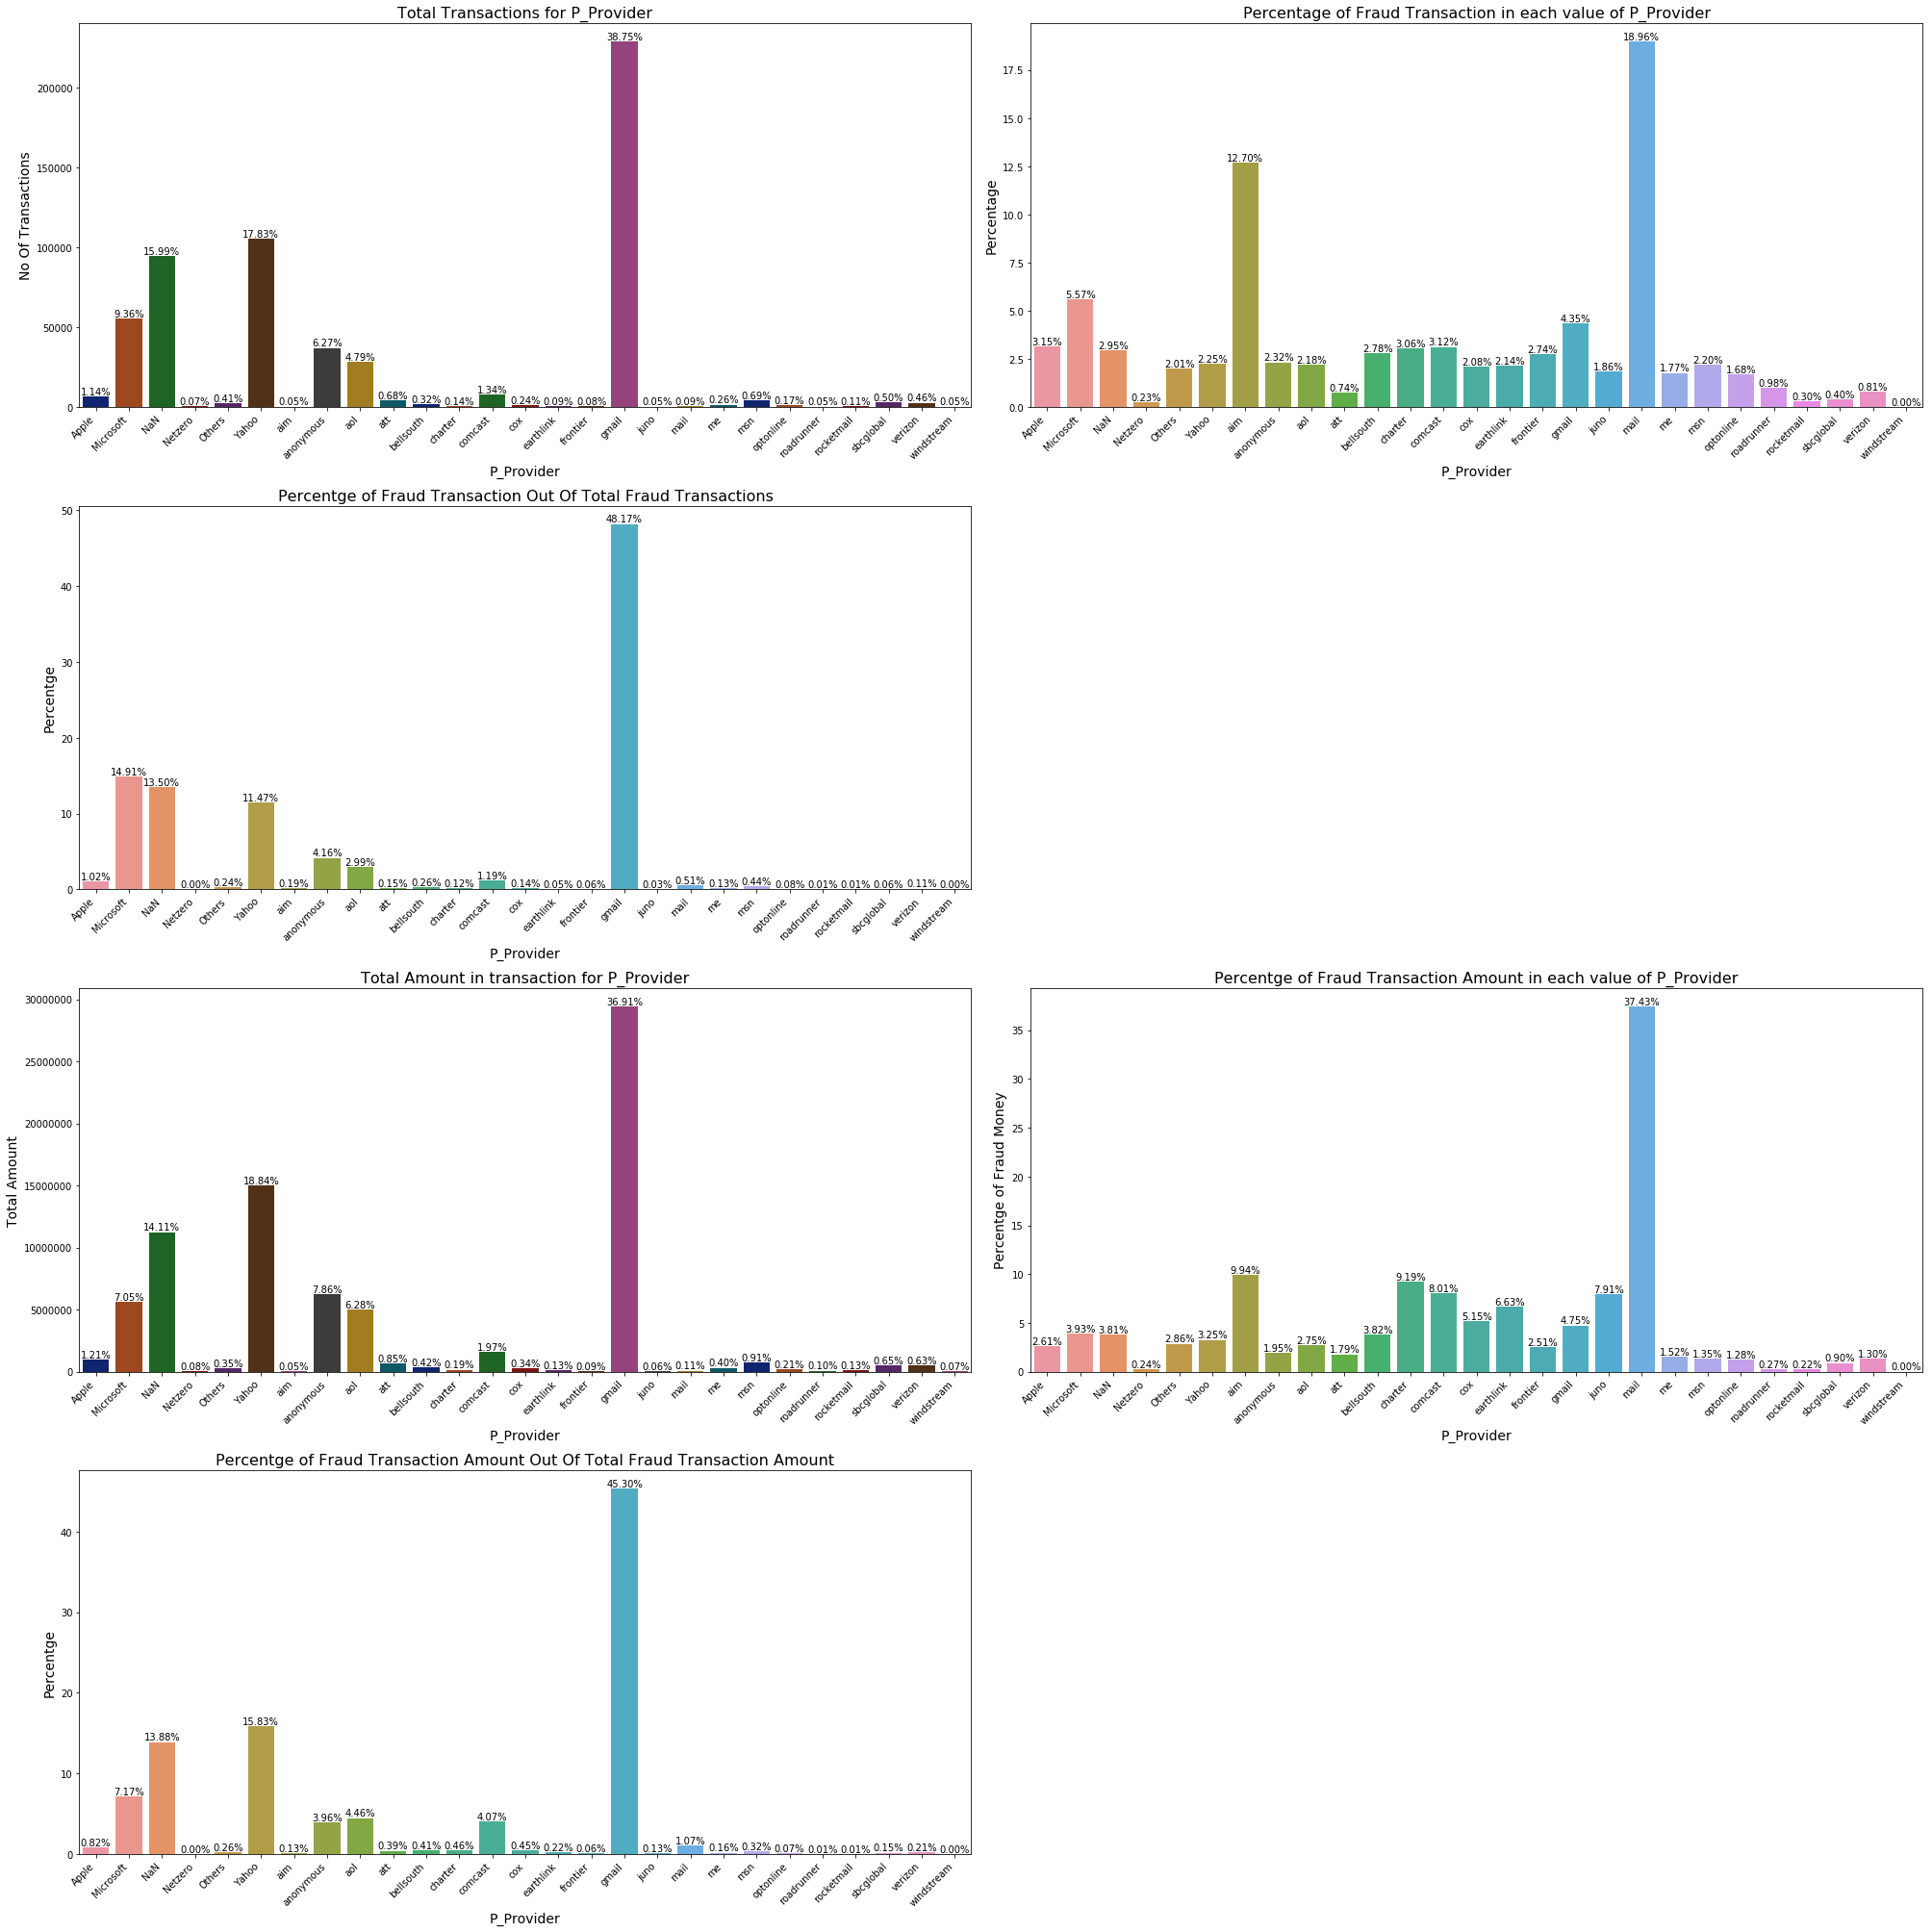

In [62]:
count_perFraud_plots(temp_mail,'P_Provider', True,'value count',300,fontsize= 16,figsizeW= 28,figsizeH=28,rotation=45)

## P_Domain Column

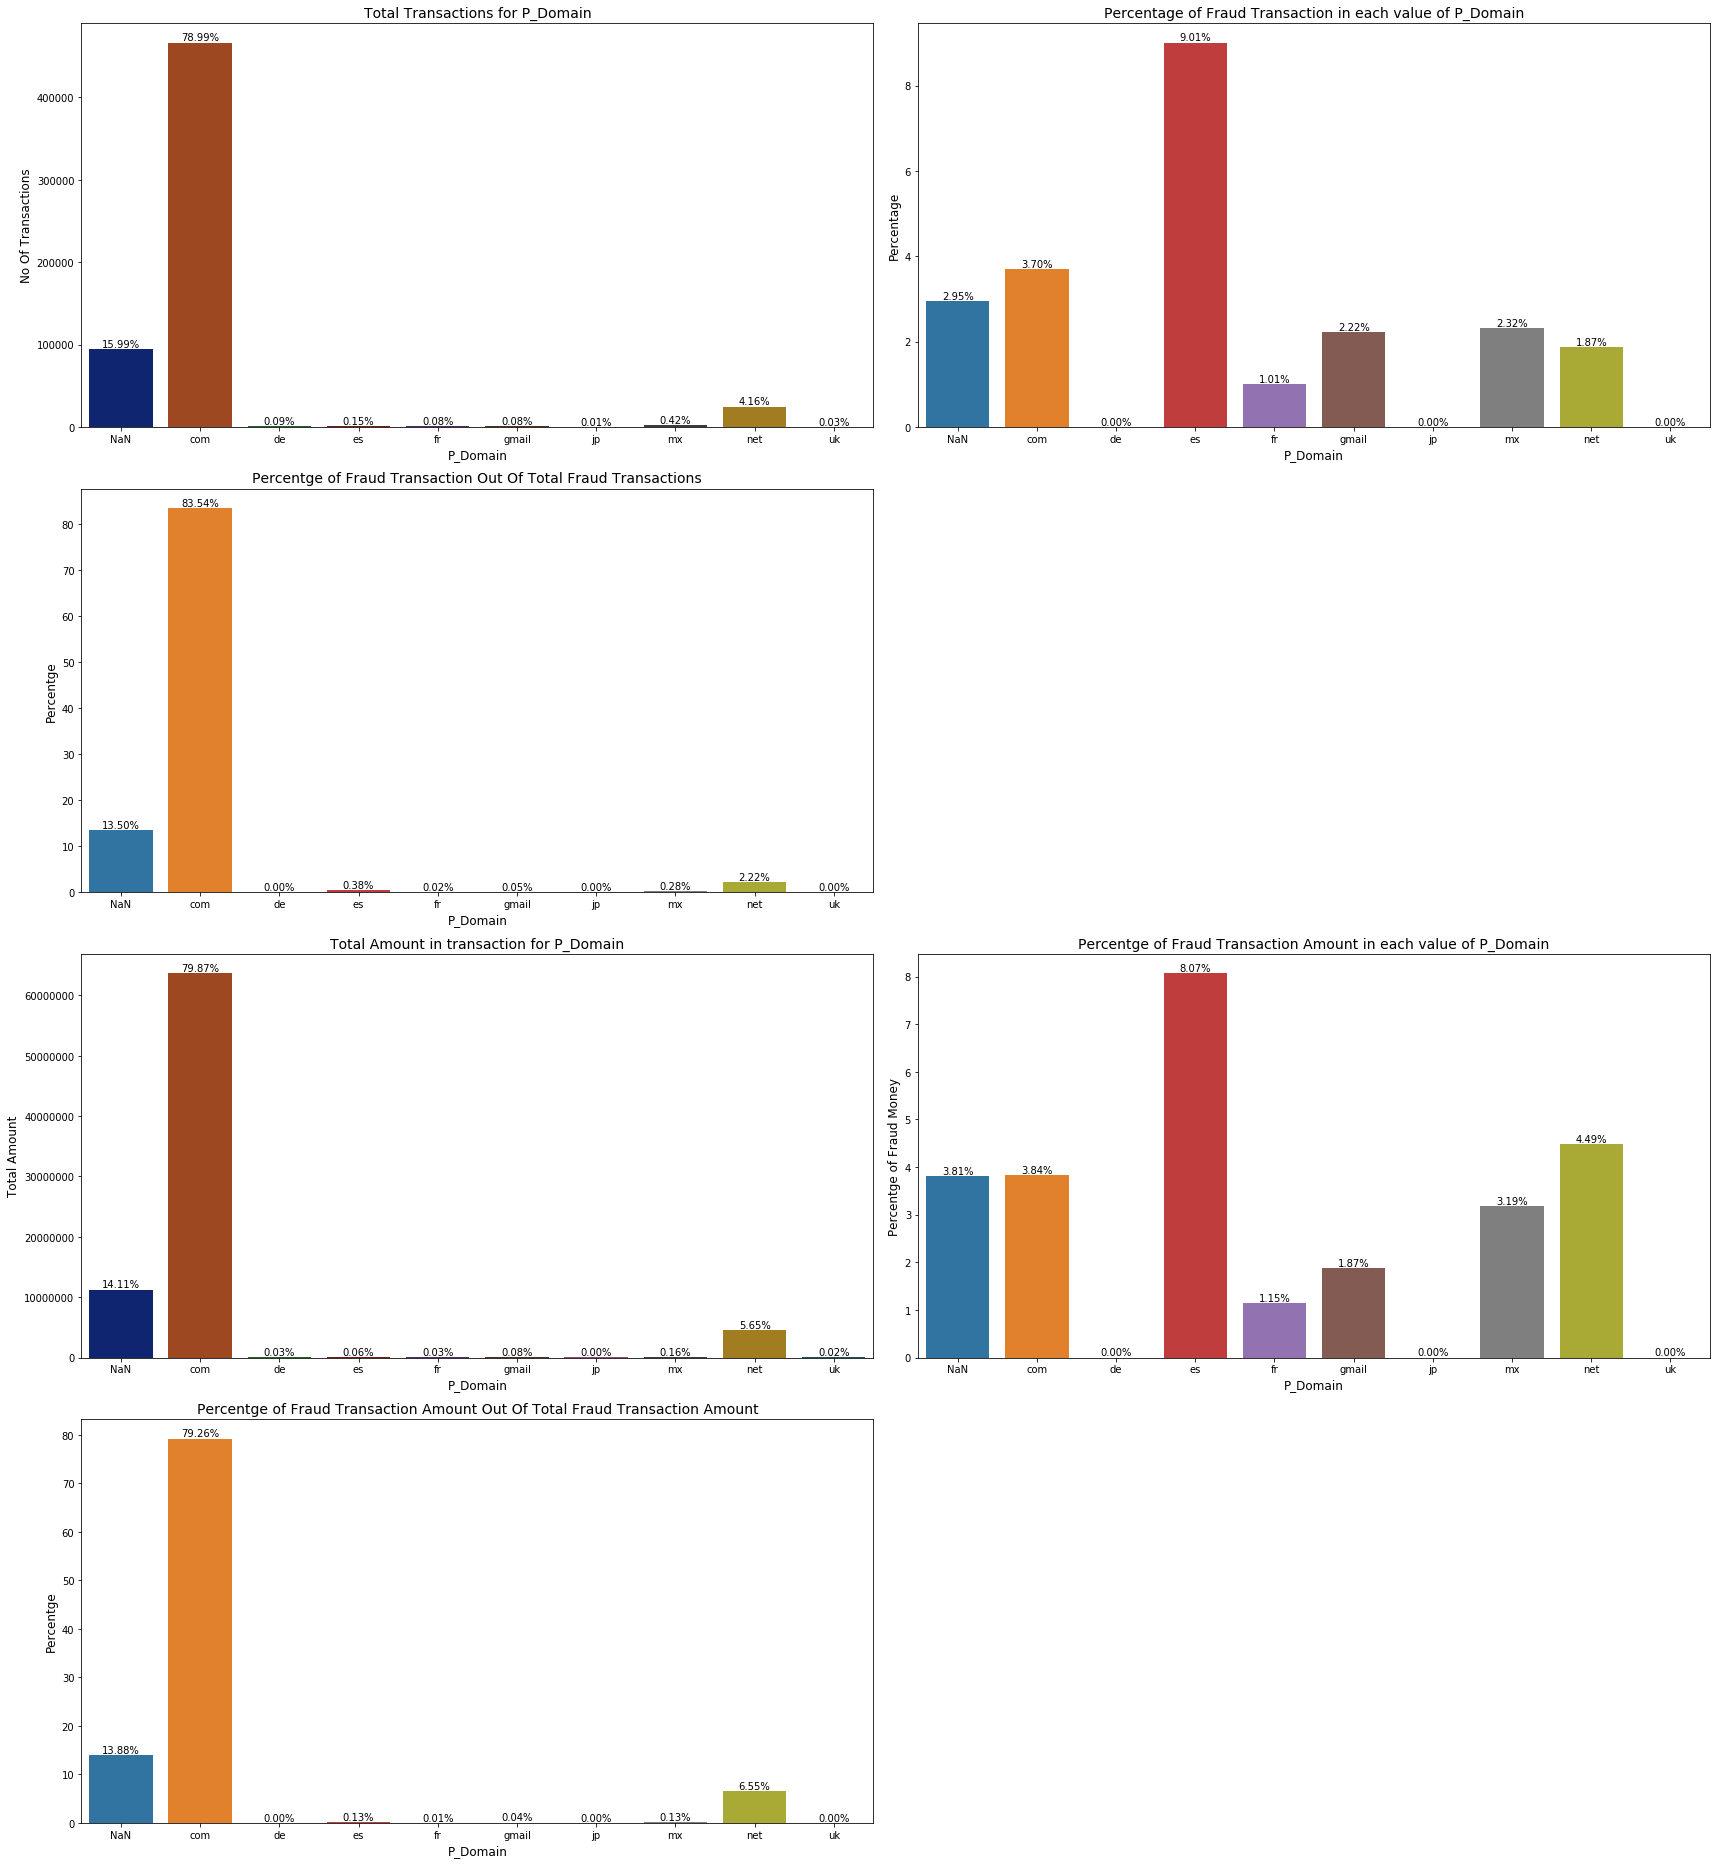

In [63]:
count_perFraud_plots(temp_mail,'P_Domain', False,fontsize= 14,figsizeW= 24,figsizeH=26)

## R_Provider Column

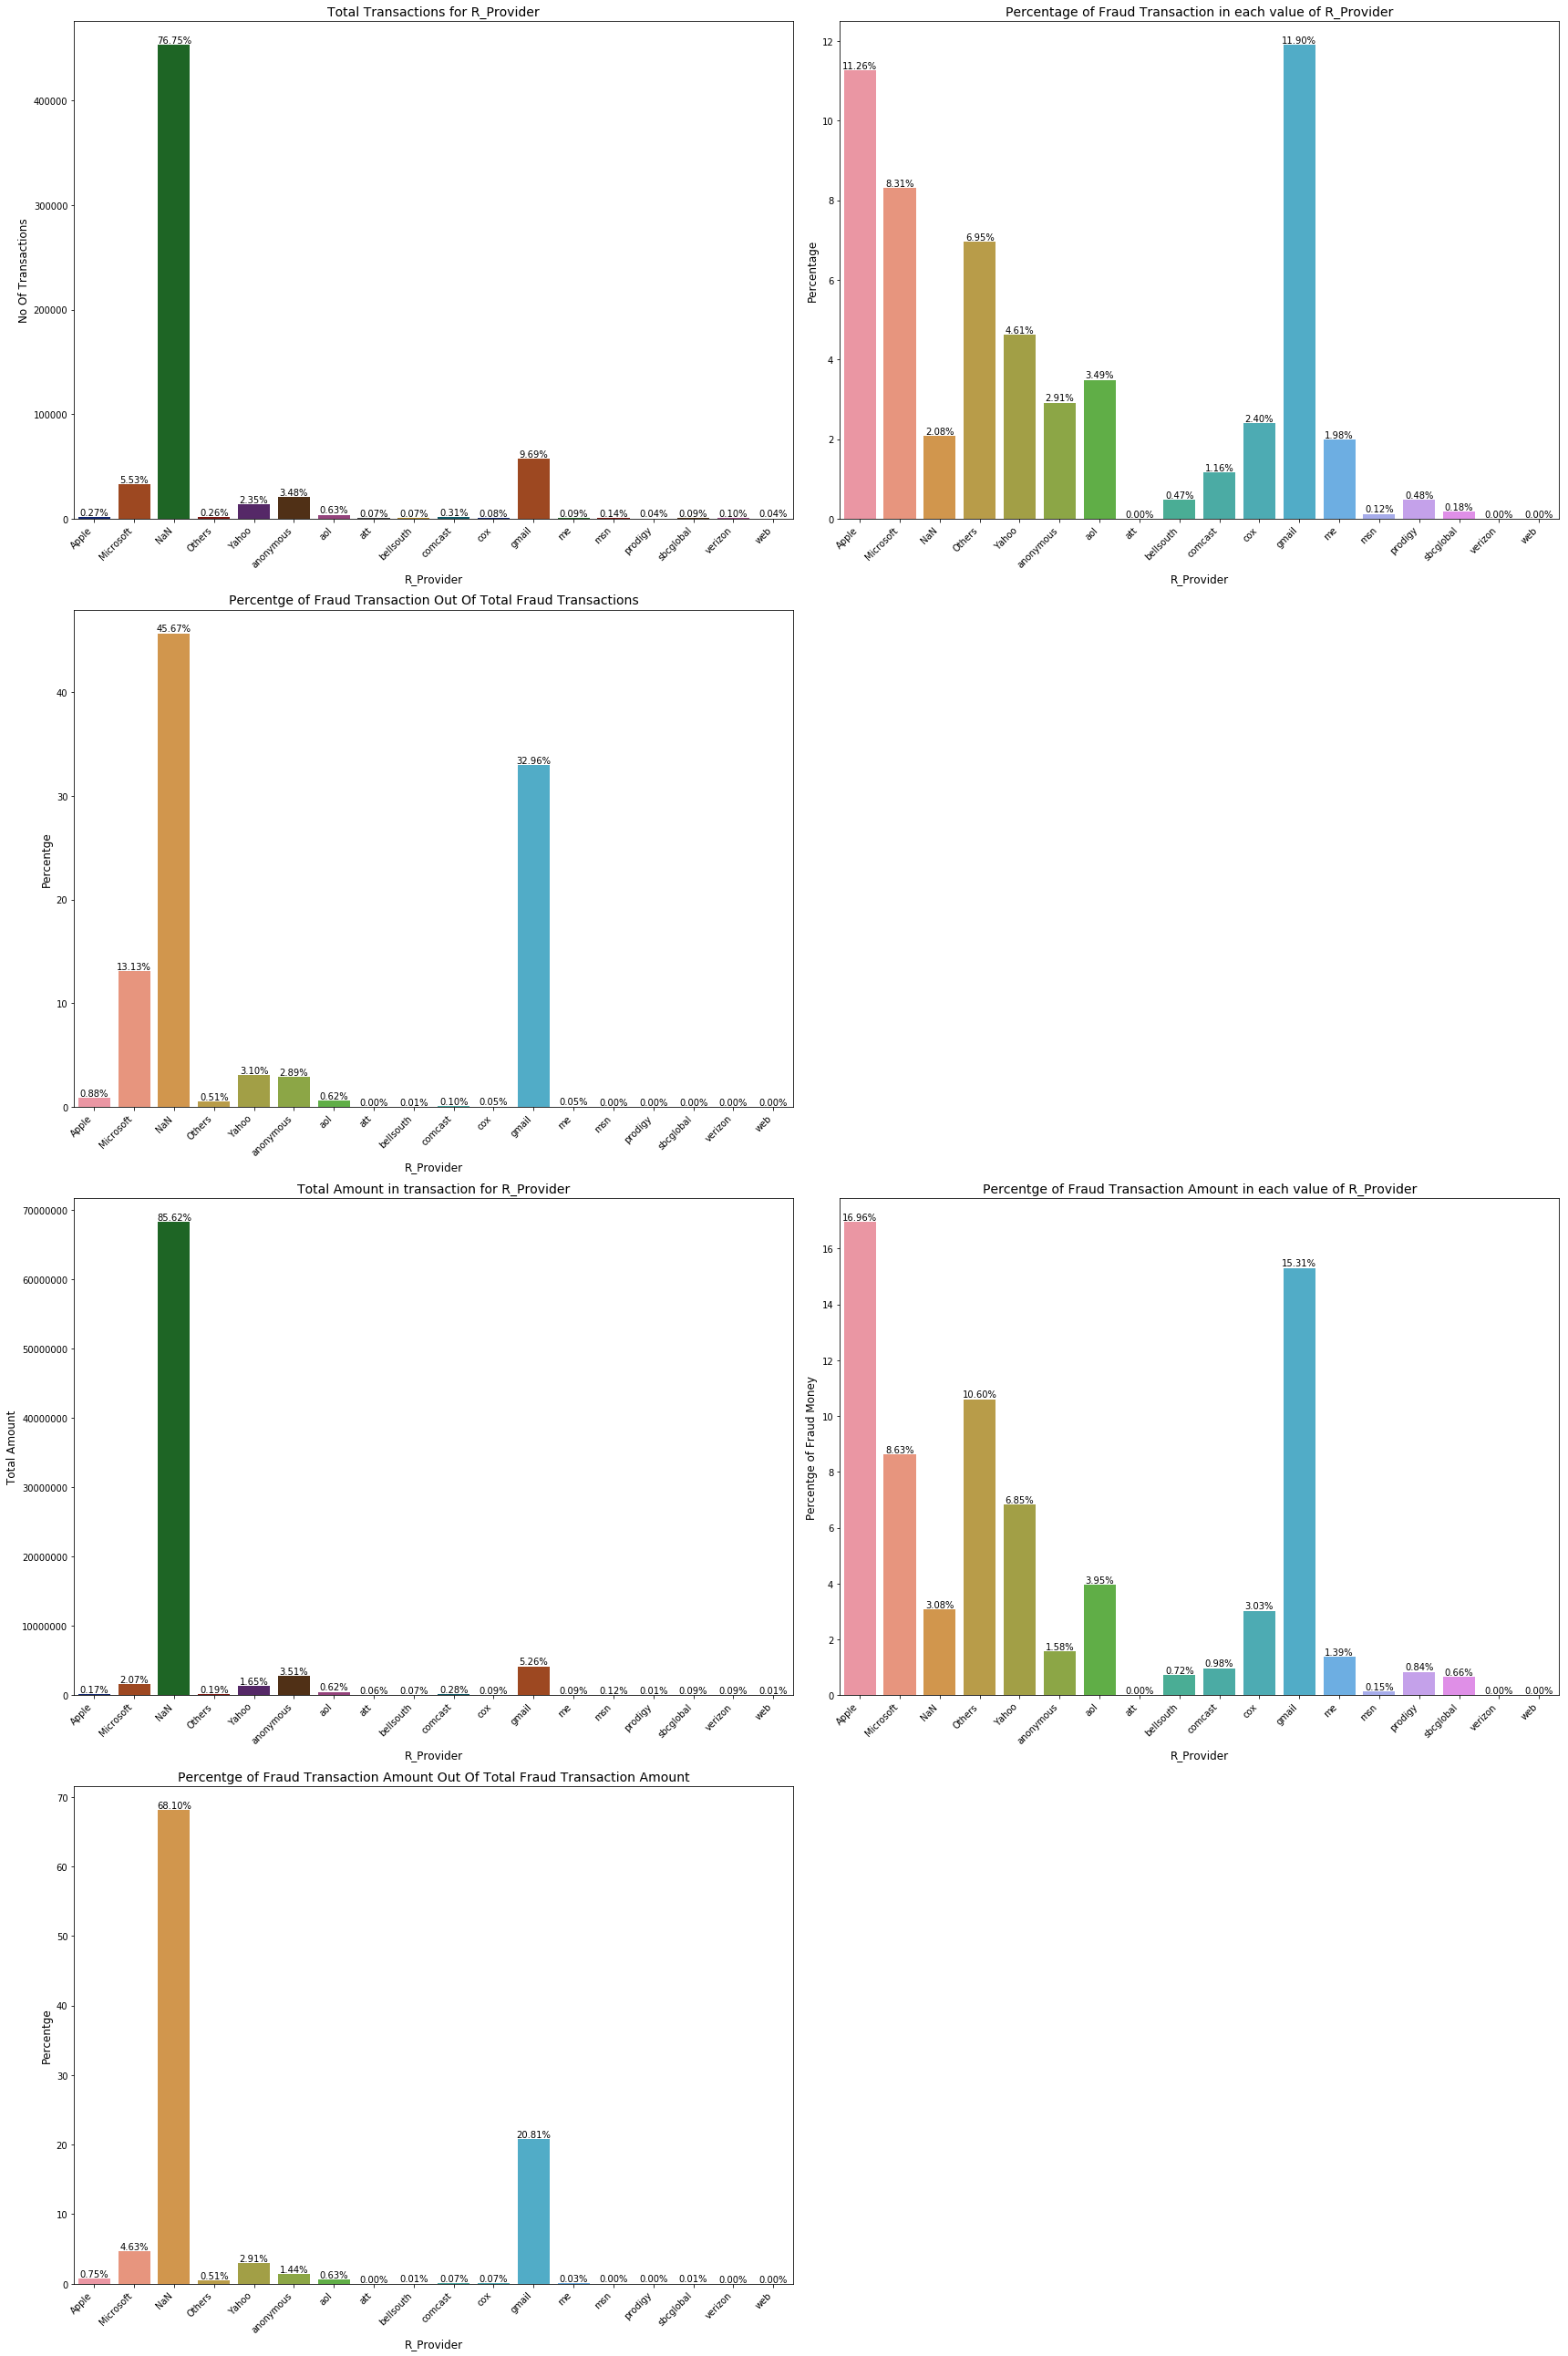

In [64]:
count_perFraud_plots(temp_mail,'R_Provider', True,'value count',200,fontsize= 14,figsizeW= 24,figsizeH=36,rotation=45)

## R_Domain Columns

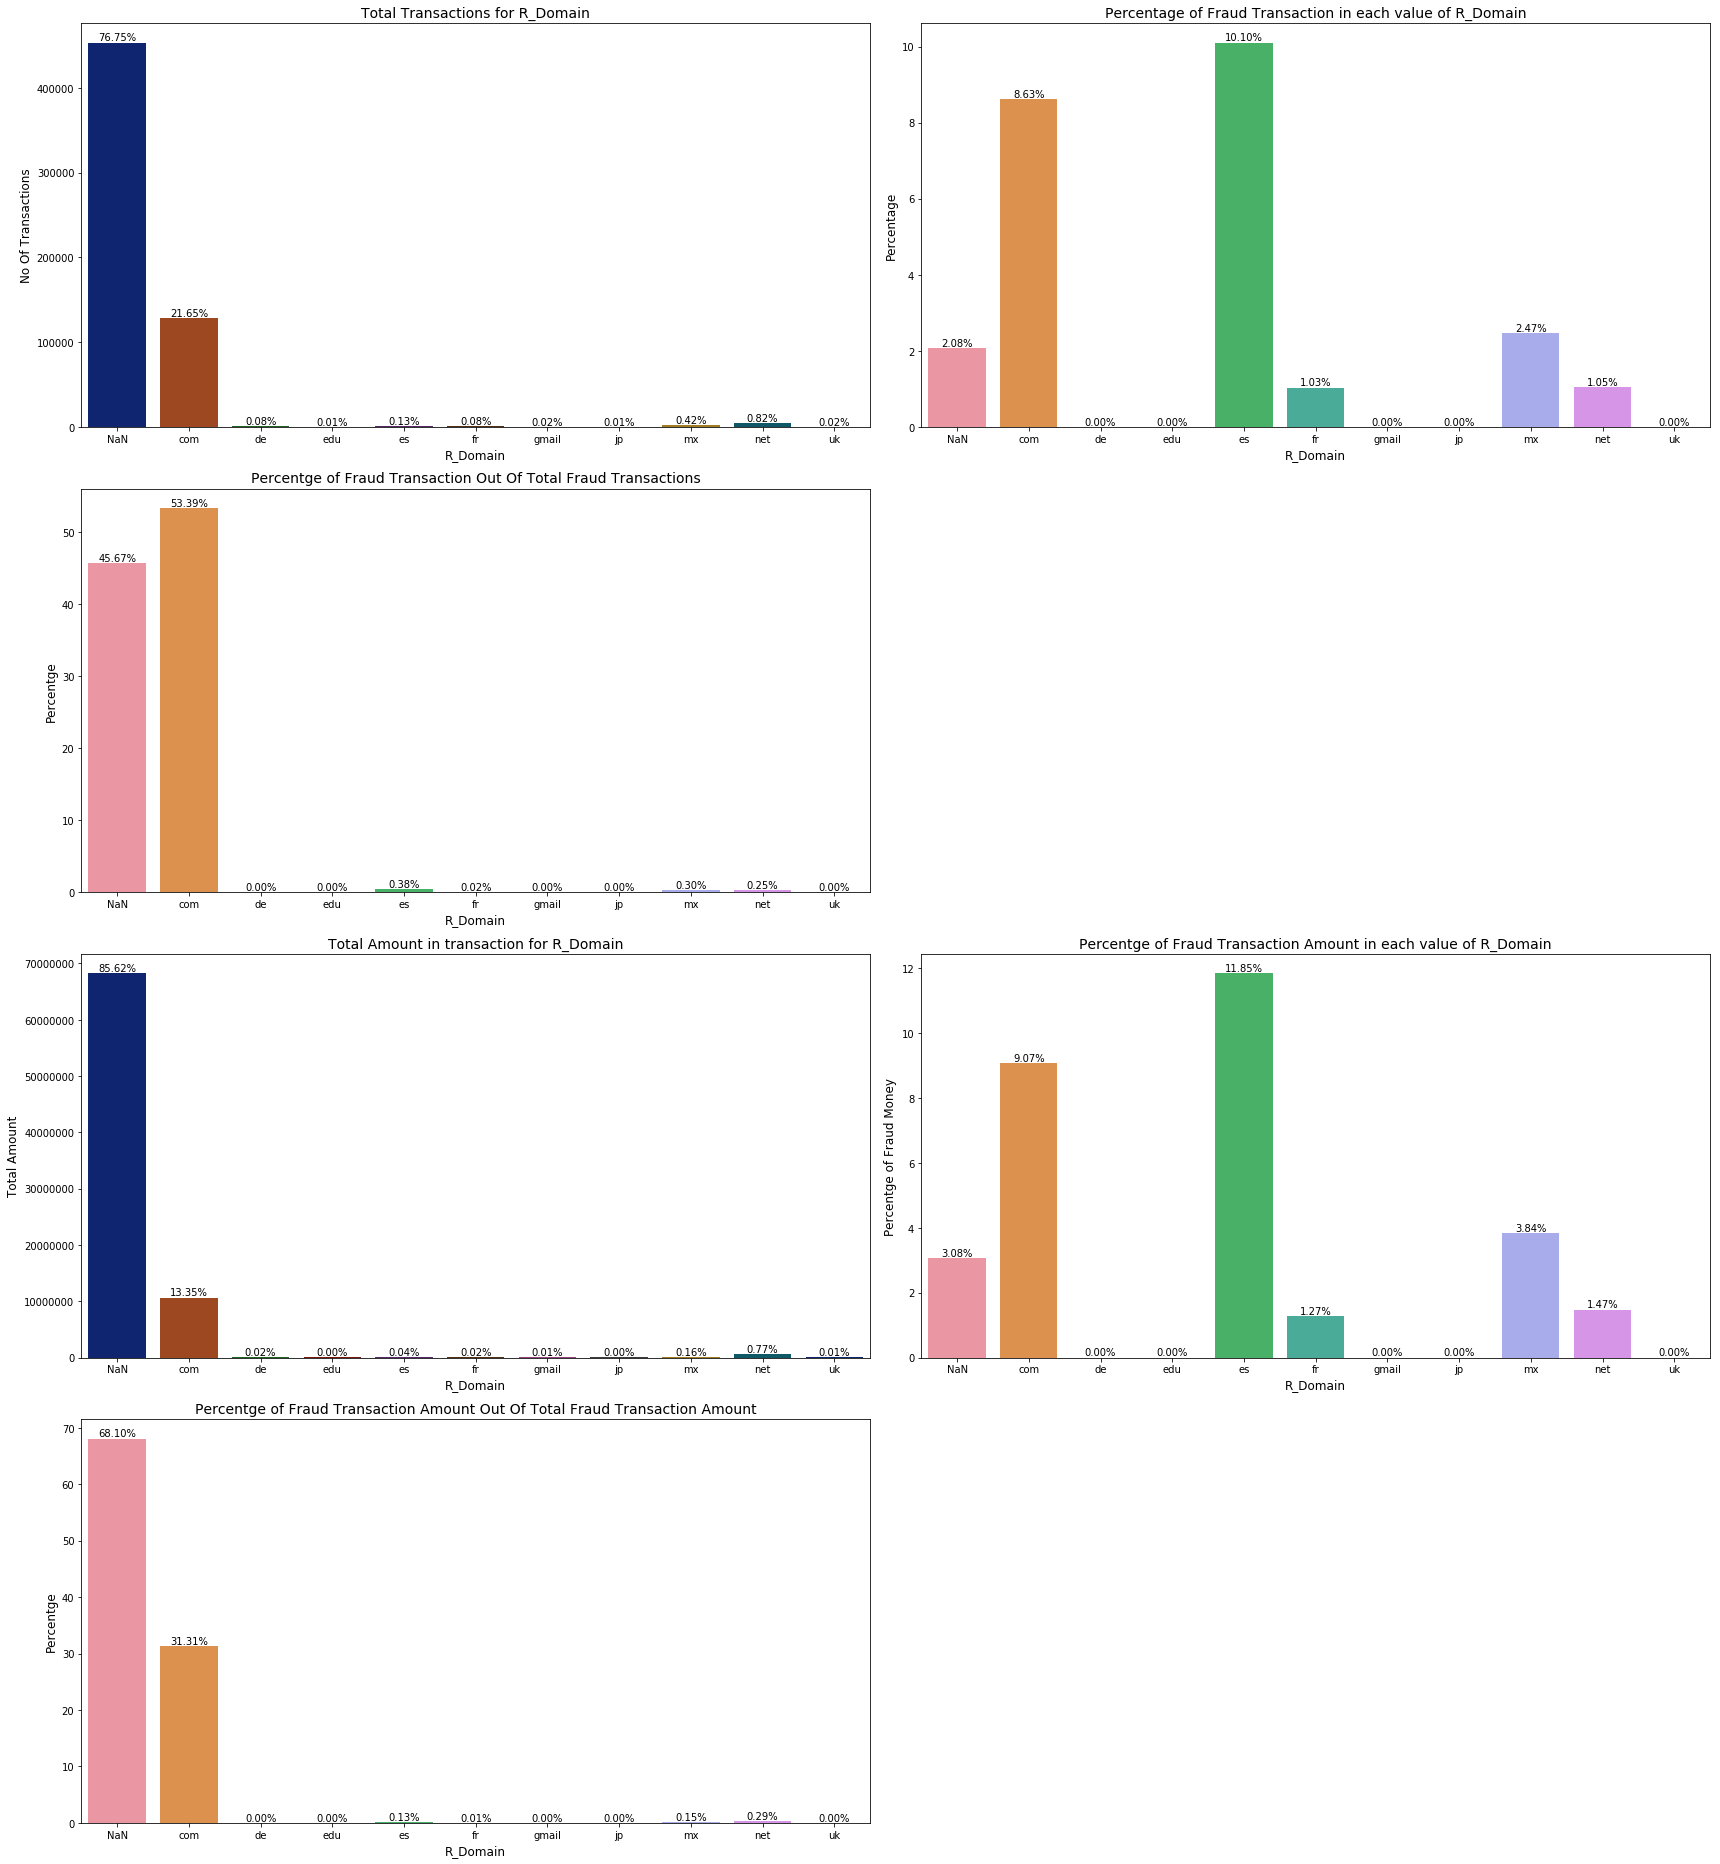

In [65]:
count_perFraud_plots(temp_mail,'R_Domain', False,fontsize= 14,figsizeW= 24,figsizeH=26)

**OBSERVATION**
* NaN values in R_emaildomain have major part of fraud transaction and fraud amount.

# M columns

In [66]:
train_trans[m_col].head()

M1   M2   M3   M4   M5   M6   M7   M8   M9
TransactionID                                             
2987000          T    T    T   M2    F    T  NaN  NaN  NaN
2987001        NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN
2987002          T    T    T   M0    F    F    F    F    F
2987003        NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN
2987004        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [67]:
metadata(train_trans[m_col])

Name   Dtype  Missing  Percentage_Missing  Unique
0   M1  object   271100              45.907       2
1   M2  object   271100              45.907       2
2   M3  object   271100              45.907       2
3   M4  object   281444              47.659       3
4   M5  object   350482              59.349       2
5   M6  object   169360              28.679       2
6   M7  object   346265              58.635       2
7   M8  object   346252              58.633       2
8   M9  object   346252              58.633       2

In [68]:
train_trans[m_col].describe()

M1      M2      M3      M4      M5      M6      M7      M8      M9
count   319440  319440  319440  309096  240058  421180  244275  244288  244288
unique       2       2       2       3       2       2       2       2       2
top          T       T       T      M0       F       F       F       F       T
freq    319415  285468  251731  196405  132491  227856  211374  155251  205656

In [69]:
temp_mcol = train_trans[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9','isFraud', 'TransactionAmt']].copy()

### M1

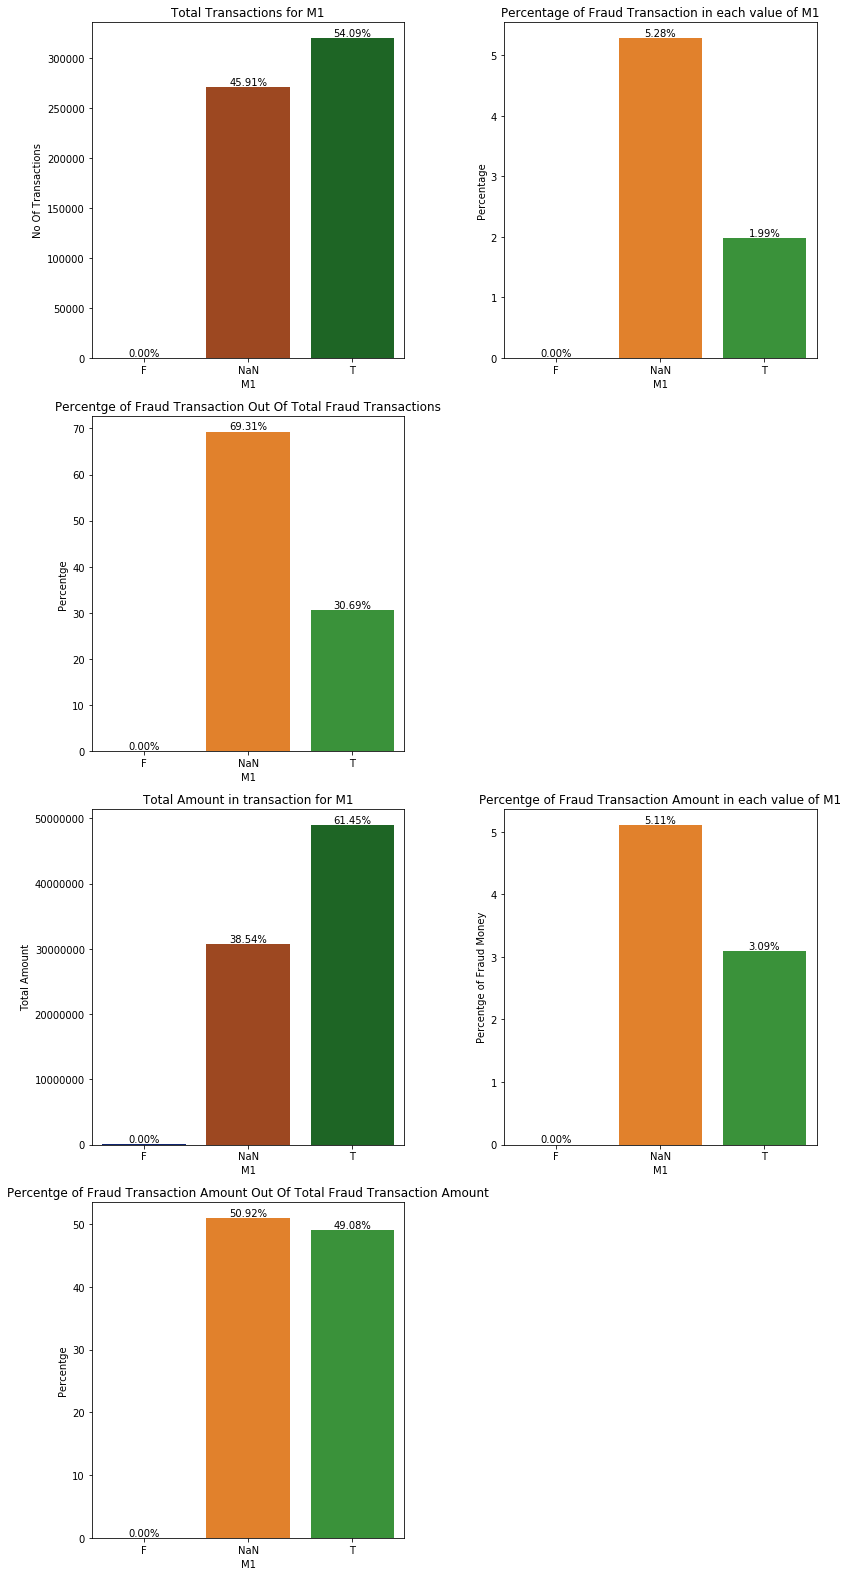

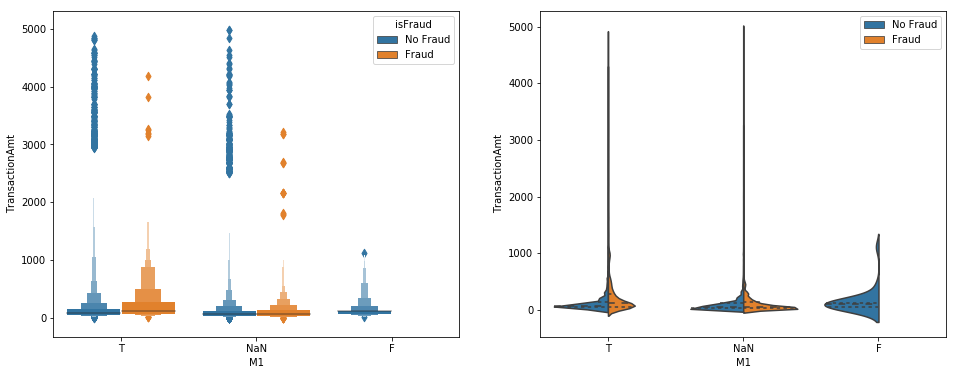

In [70]:
count_perFraud_plots(train_trans,'M1', False,fontsize= 12,figsizeW= 12,figsizeH=22)
plot_boxen_violin(train_trans, 5000, 'M1')

### M2

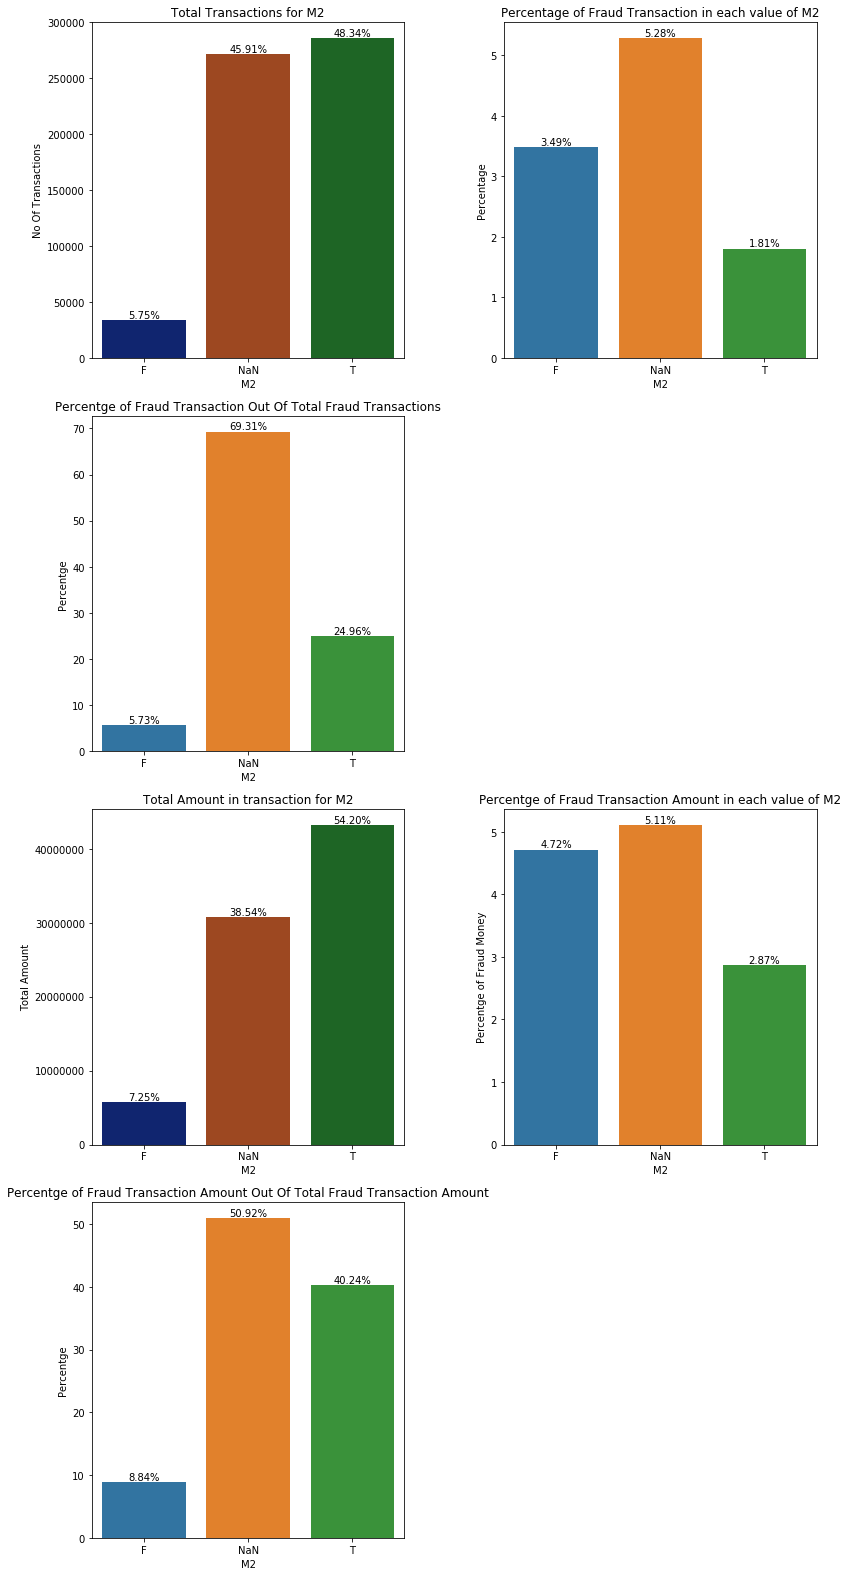

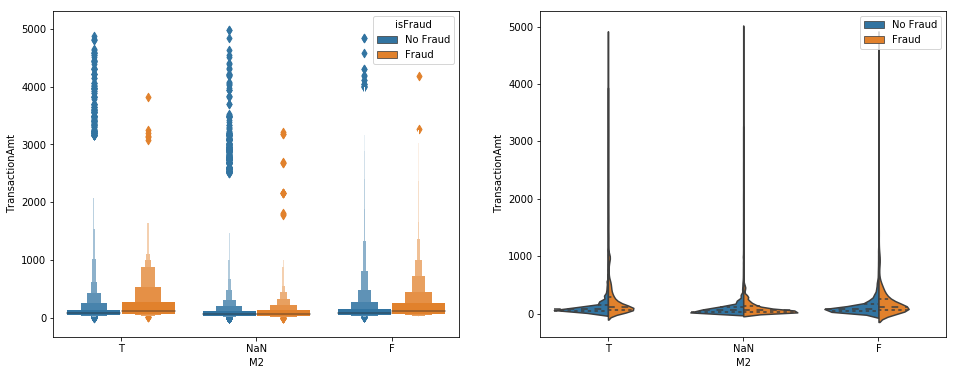

In [71]:
count_perFraud_plots(train_trans,'M2', False,fontsize= 12,figsizeW= 12,figsizeH=22)
plot_boxen_violin(train_trans, 5000, 'M2')

### M4

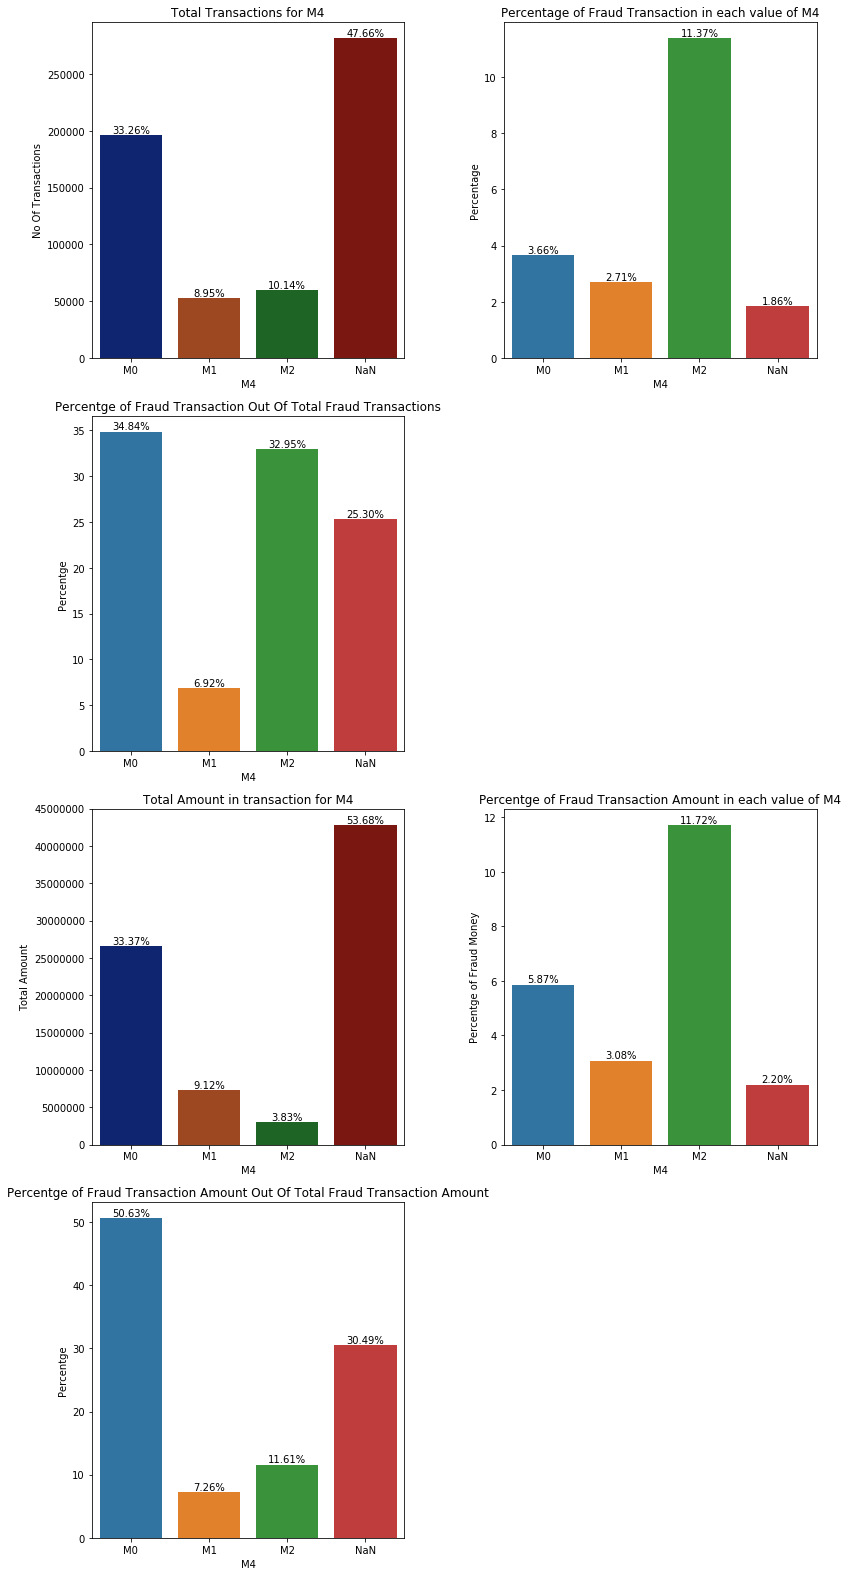

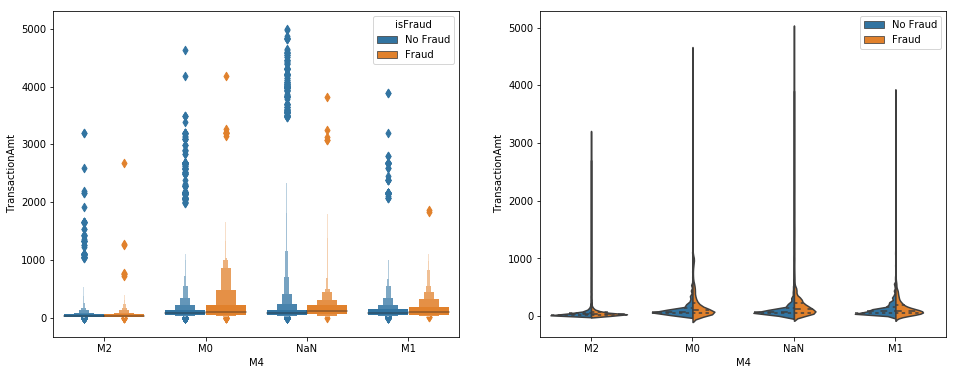

In [72]:
count_perFraud_plots(train_trans,'M4', False,fontsize= 12,figsizeW= 12,figsizeH=22)
plot_boxen_violin(train_trans, 5000, 'M4')

### M7

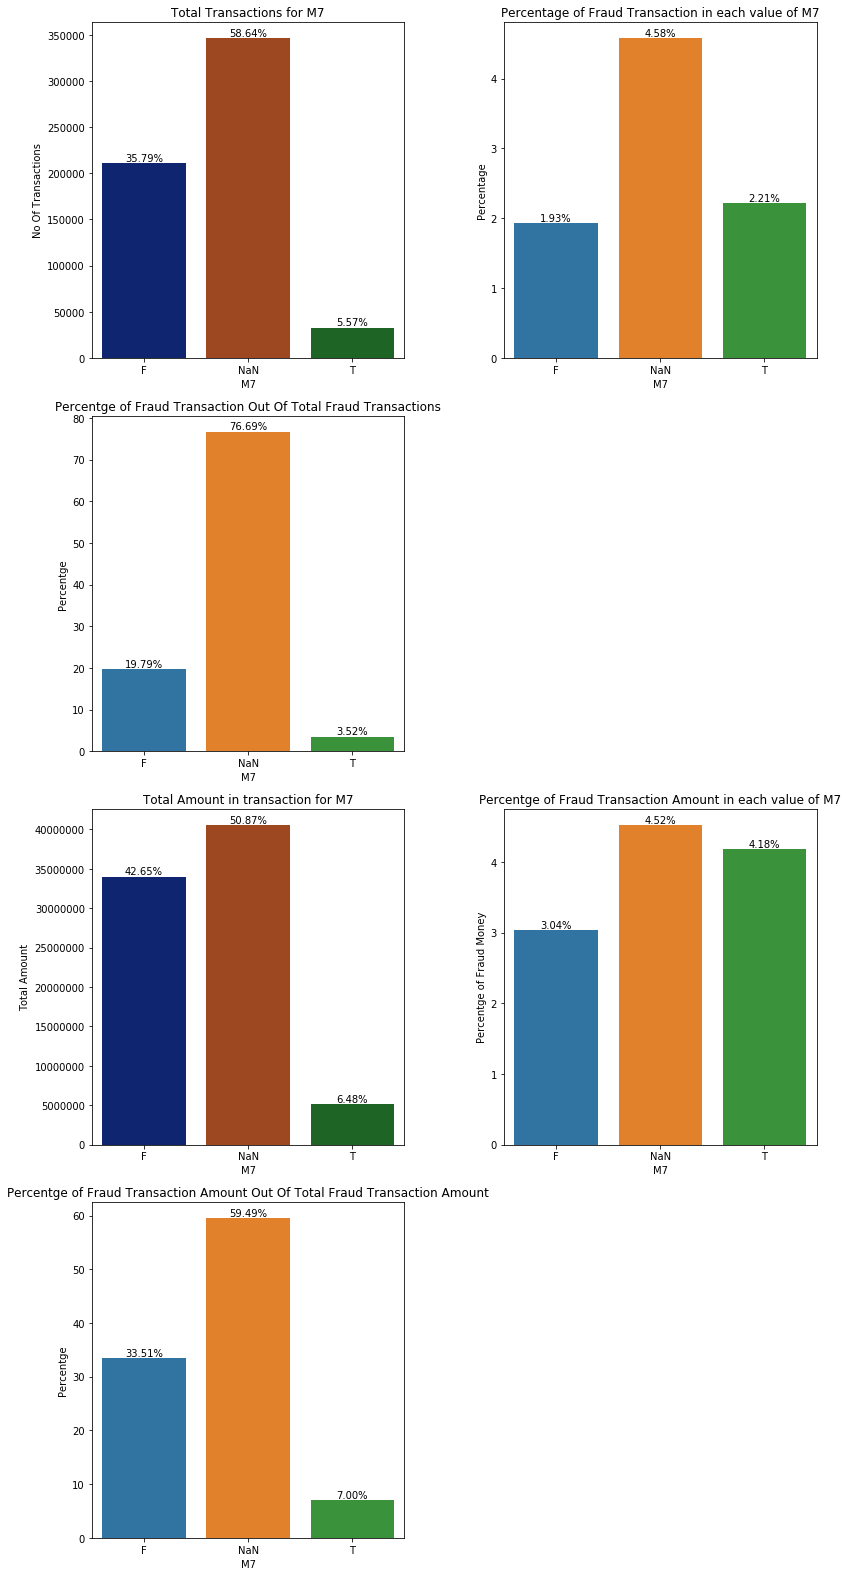

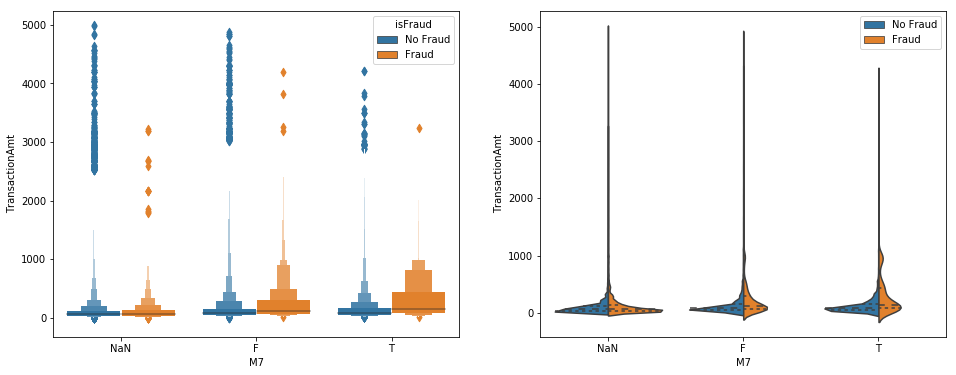

In [73]:
count_perFraud_plots(train_trans,'M7', False,fontsize= 12,figsizeW= 12,figsizeH=22)
plot_boxen_violin(train_trans, 5000, 'M7')

### M8

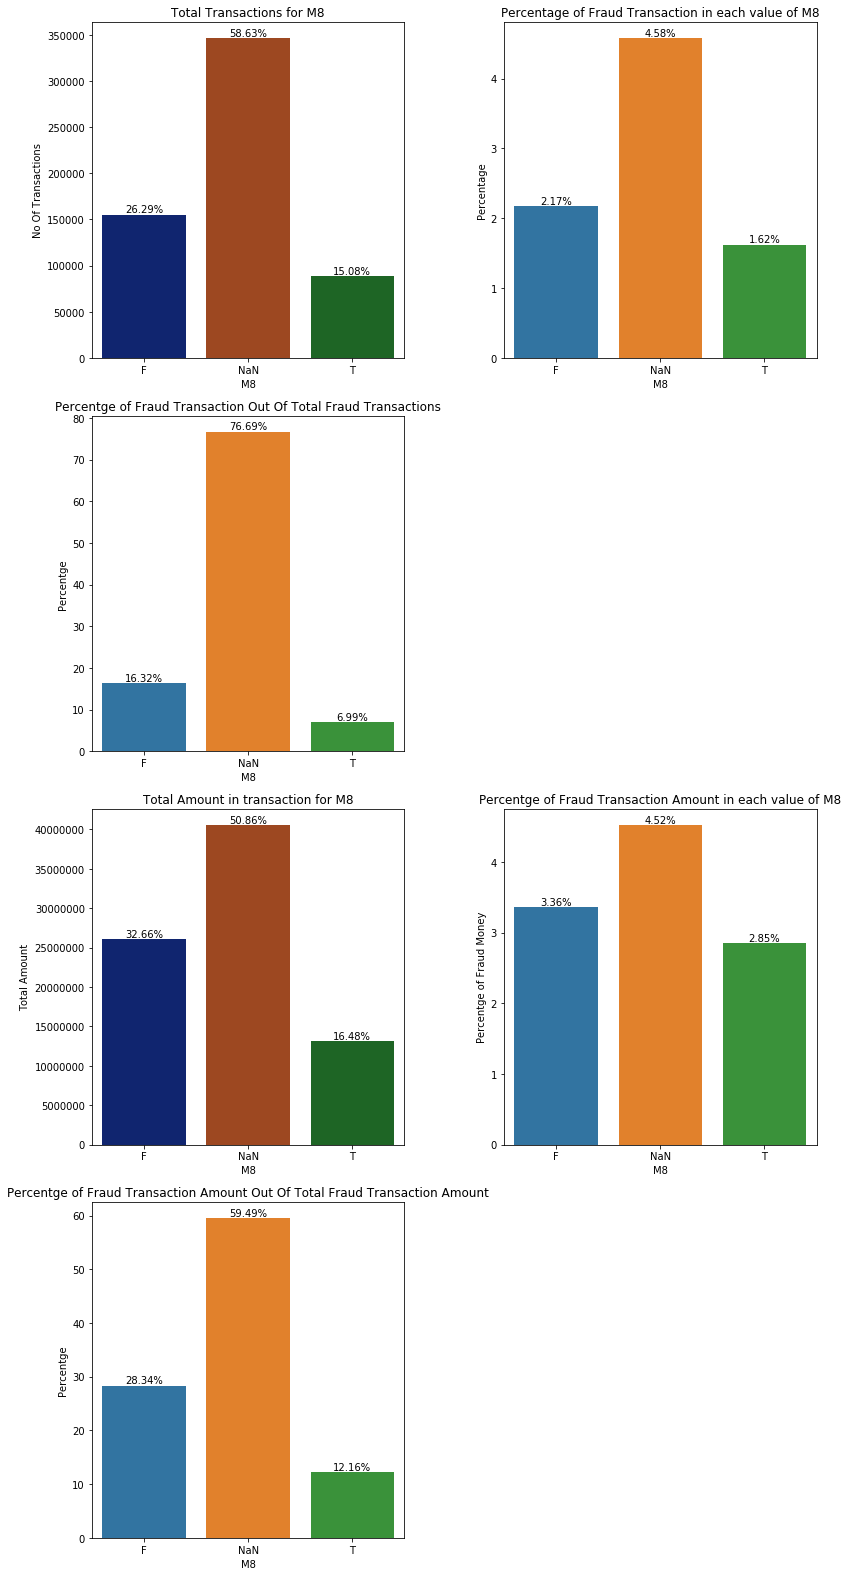

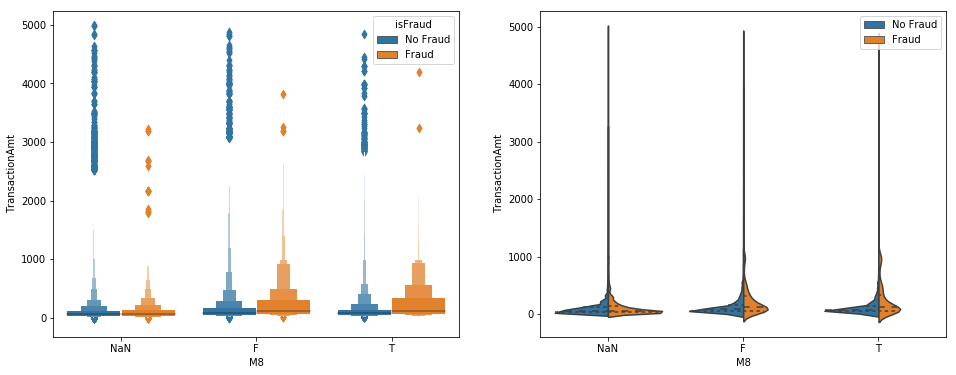

In [74]:
count_perFraud_plots(train_trans,'M8', False,fontsize= 12,figsizeW= 12,figsizeH=22)
plot_boxen_violin(train_trans, 5000, 'M8')

# C Columns

In [75]:
train_trans[c_col].head()

C1    C2    C3    C4    C5    C6    C7    C8    C9   C10  \
TransactionID                                                               
2987000       1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 1.000 0.000   
2987001       1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000   
2987002       1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 1.000 0.000   
2987003       2.000 5.000 0.000 0.000 0.000 4.000 0.000 0.000 1.000 0.000   
2987004       1.000 1.000 0.000 0.000 0.000 1.000 0.000 1.000 0.000 1.000   

                C11   C12    C13   C14  
TransactionID                           
2987000       2.000 0.000  1.000 1.000  
2987001       1.000 0.000  1.000 1.000  
2987002       1.000 0.000  1.000 1.000  
2987003       1.000 0.000 25.000 1.000  
2987004       1.000 0.000  1.000 1.000

In [76]:
metadata(train_trans[c_col])

Name    Dtype  Missing  Percentage_Missing  Unique
0    C1  float64        0               0.000    1657
1    C2  float64        0               0.000    1216
2    C3  float64        0               0.000      27
3    C4  float64        0               0.000    1260
4    C5  float64        0               0.000     319
5    C6  float64        0               0.000    1328
6    C7  float64        0               0.000    1103
7    C8  float64        0               0.000    1253
8    C9  float64        0               0.000     205
9   C10  float64        0               0.000    1231
10  C11  float64        0               0.000    1476
11  C12  float64        0               0.000    1199
12  C13  float64        0               0.000    1597
13  C14  float64        0               0.000    1108

In [77]:
train_trans[c_col].quantile([.01, .20, .50, .70, .90, .95, .96,.99])

C1      C2    C3    C4      C5      C6    C7     C8     C9    C10  \
0.010   1.000   1.000 0.000 0.000   0.000   0.000 0.000  0.000  0.000  0.000   
0.200   1.000   1.000 0.000 0.000   0.000   1.000 0.000  0.000  0.000  0.000   
0.500   1.000   1.000 0.000 0.000   0.000   1.000 0.000  0.000  1.000  0.000   
0.700   2.000   2.000 0.000 0.000   1.000   2.000 0.000  0.000  2.000  0.000   
0.900   7.000   7.000 0.000 1.000   3.000   5.000 1.000  1.000  4.000  1.000   
0.950  22.000  27.000 0.000 1.000   9.000  15.000 1.000  2.000  9.000  2.000   
0.960  79.000  77.000 0.000 2.000  24.000  55.000 1.000  2.000 19.000  2.000   
0.990 164.000 154.000 0.000 6.000 149.000 118.000 4.000 11.000 95.000 15.000   

          C11   C12     C13     C14  
0.010   1.000 0.000   0.000   0.000  
0.200   1.000 0.000   1.000   1.000  
0.500   1.000 0.000   3.000   1.000  
0.700   2.000 0.000   9.000   2.000  
0.900   4.000 1.000  37.000   5.000  
0.950  14.000 1.000 102.000  14.000  
0.960  55.000 2.000 277.000  53.000  
0.990 122.000 5.000 578.000 128.000

In [78]:
train_trans[c_col].describe()

C1         C2         C3         C4         C5         C6  \
count 590540.000 590540.000 590540.000 590540.000 590540.000 590540.000   
mean      14.092     15.270      0.006      4.092      5.572      9.071   
std      133.569    154.669      0.151     68.848     25.787     71.508   
min        0.000      0.000      0.000      0.000      0.000      0.000   
25%        1.000      1.000      0.000      0.000      0.000      1.000   
50%        1.000      1.000      0.000      0.000      0.000      1.000   
75%        3.000      3.000      0.000      0.000      1.000      2.000   
max     4685.000   5691.000     26.000   2253.000    349.000   2253.000   

              C7         C8         C9        C10        C11        C12  \
count 590540.000 590540.000 590540.000 590540.000 590540.000 590540.000   
mean       2.848      5.145      4.480      5.240     10.242      4.076   
std       61.727     95.379     16.675     95.581     94.336     86.666   
min        0.000      0.000      0.000      0.000      0.000      0.000   
25%        0.000      0.000      0.000      0.000      1.000      0.000   
50%        0.000      0.000      1.000      0.000      1.000      0.000   
75%        0.000      0.000      2.000      0.000      2.000      0.000   
max     2255.000   3331.000    210.000   3257.000   3188.000   3188.000   

             C13        C14  
count 590540.000 590540.000  
mean      32.540      8.295  
std      129.365     49.544  
min        0.000      0.000  
25%        1.000      1.000  
50%        3.000      1.000  
75%       12.000      2.000  
max     2918.000   1429.000

OBSERVATIONS
* There are outliers in most of the columns except C3. 
* We can see a large diffrence in quatiles of 0.90, 0.95, 0.96 and 0.99.
* All the values are float and no categories

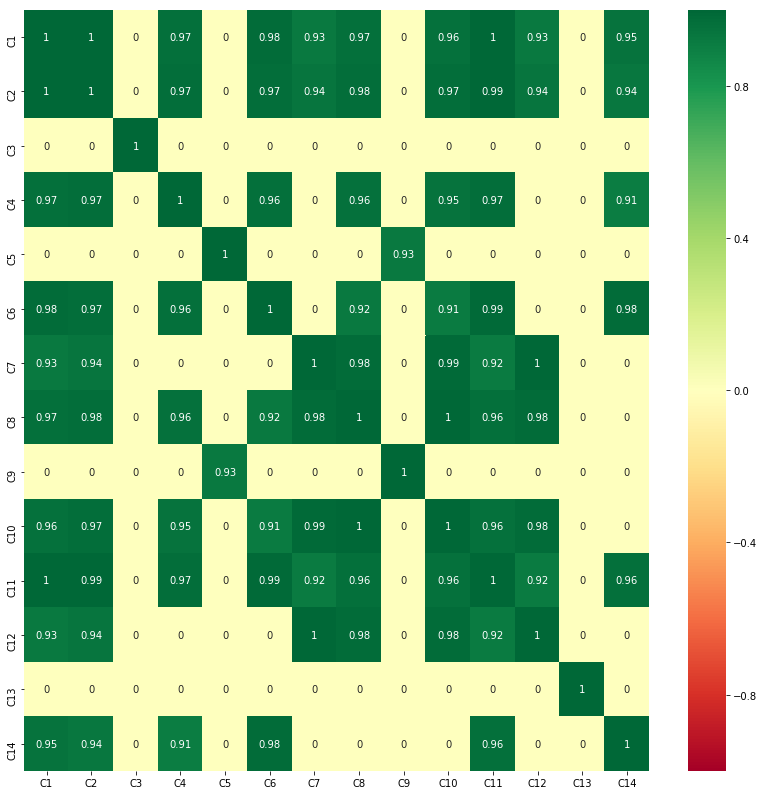

In [79]:
corrfunc(train_trans,c_col)

OBSERVATIONS

* We can see columns are highly correlated with many having correaltion higher than 0.90 and some having corr. of 1.

* C1, C2, C11 having a correlation of 1 so we can say they are the same.

* C7, C12 with 1 correlation and C7, C10 have 0.99 correlation (We can say almost 1)**.

* C6 and C11 have correaltion of 0.99 (We can say almost 1).

* C8, C10 with 1 correlation.

we can set a threshold for correlation and include only columns which are not highly correlated.  

Columns to Plot C1, C13, C9, C5, C3

### C1 

In [80]:
train_trans['C1'].value_counts()


1.000       316791
2.000       105071
3.000        51315
4.000        28845
5.000        17922
             ...  
953.000          1
3811.000         1
3810.000         1
1383.000         1
1792.000         1
Name: C1, Length: 1657, dtype: int64

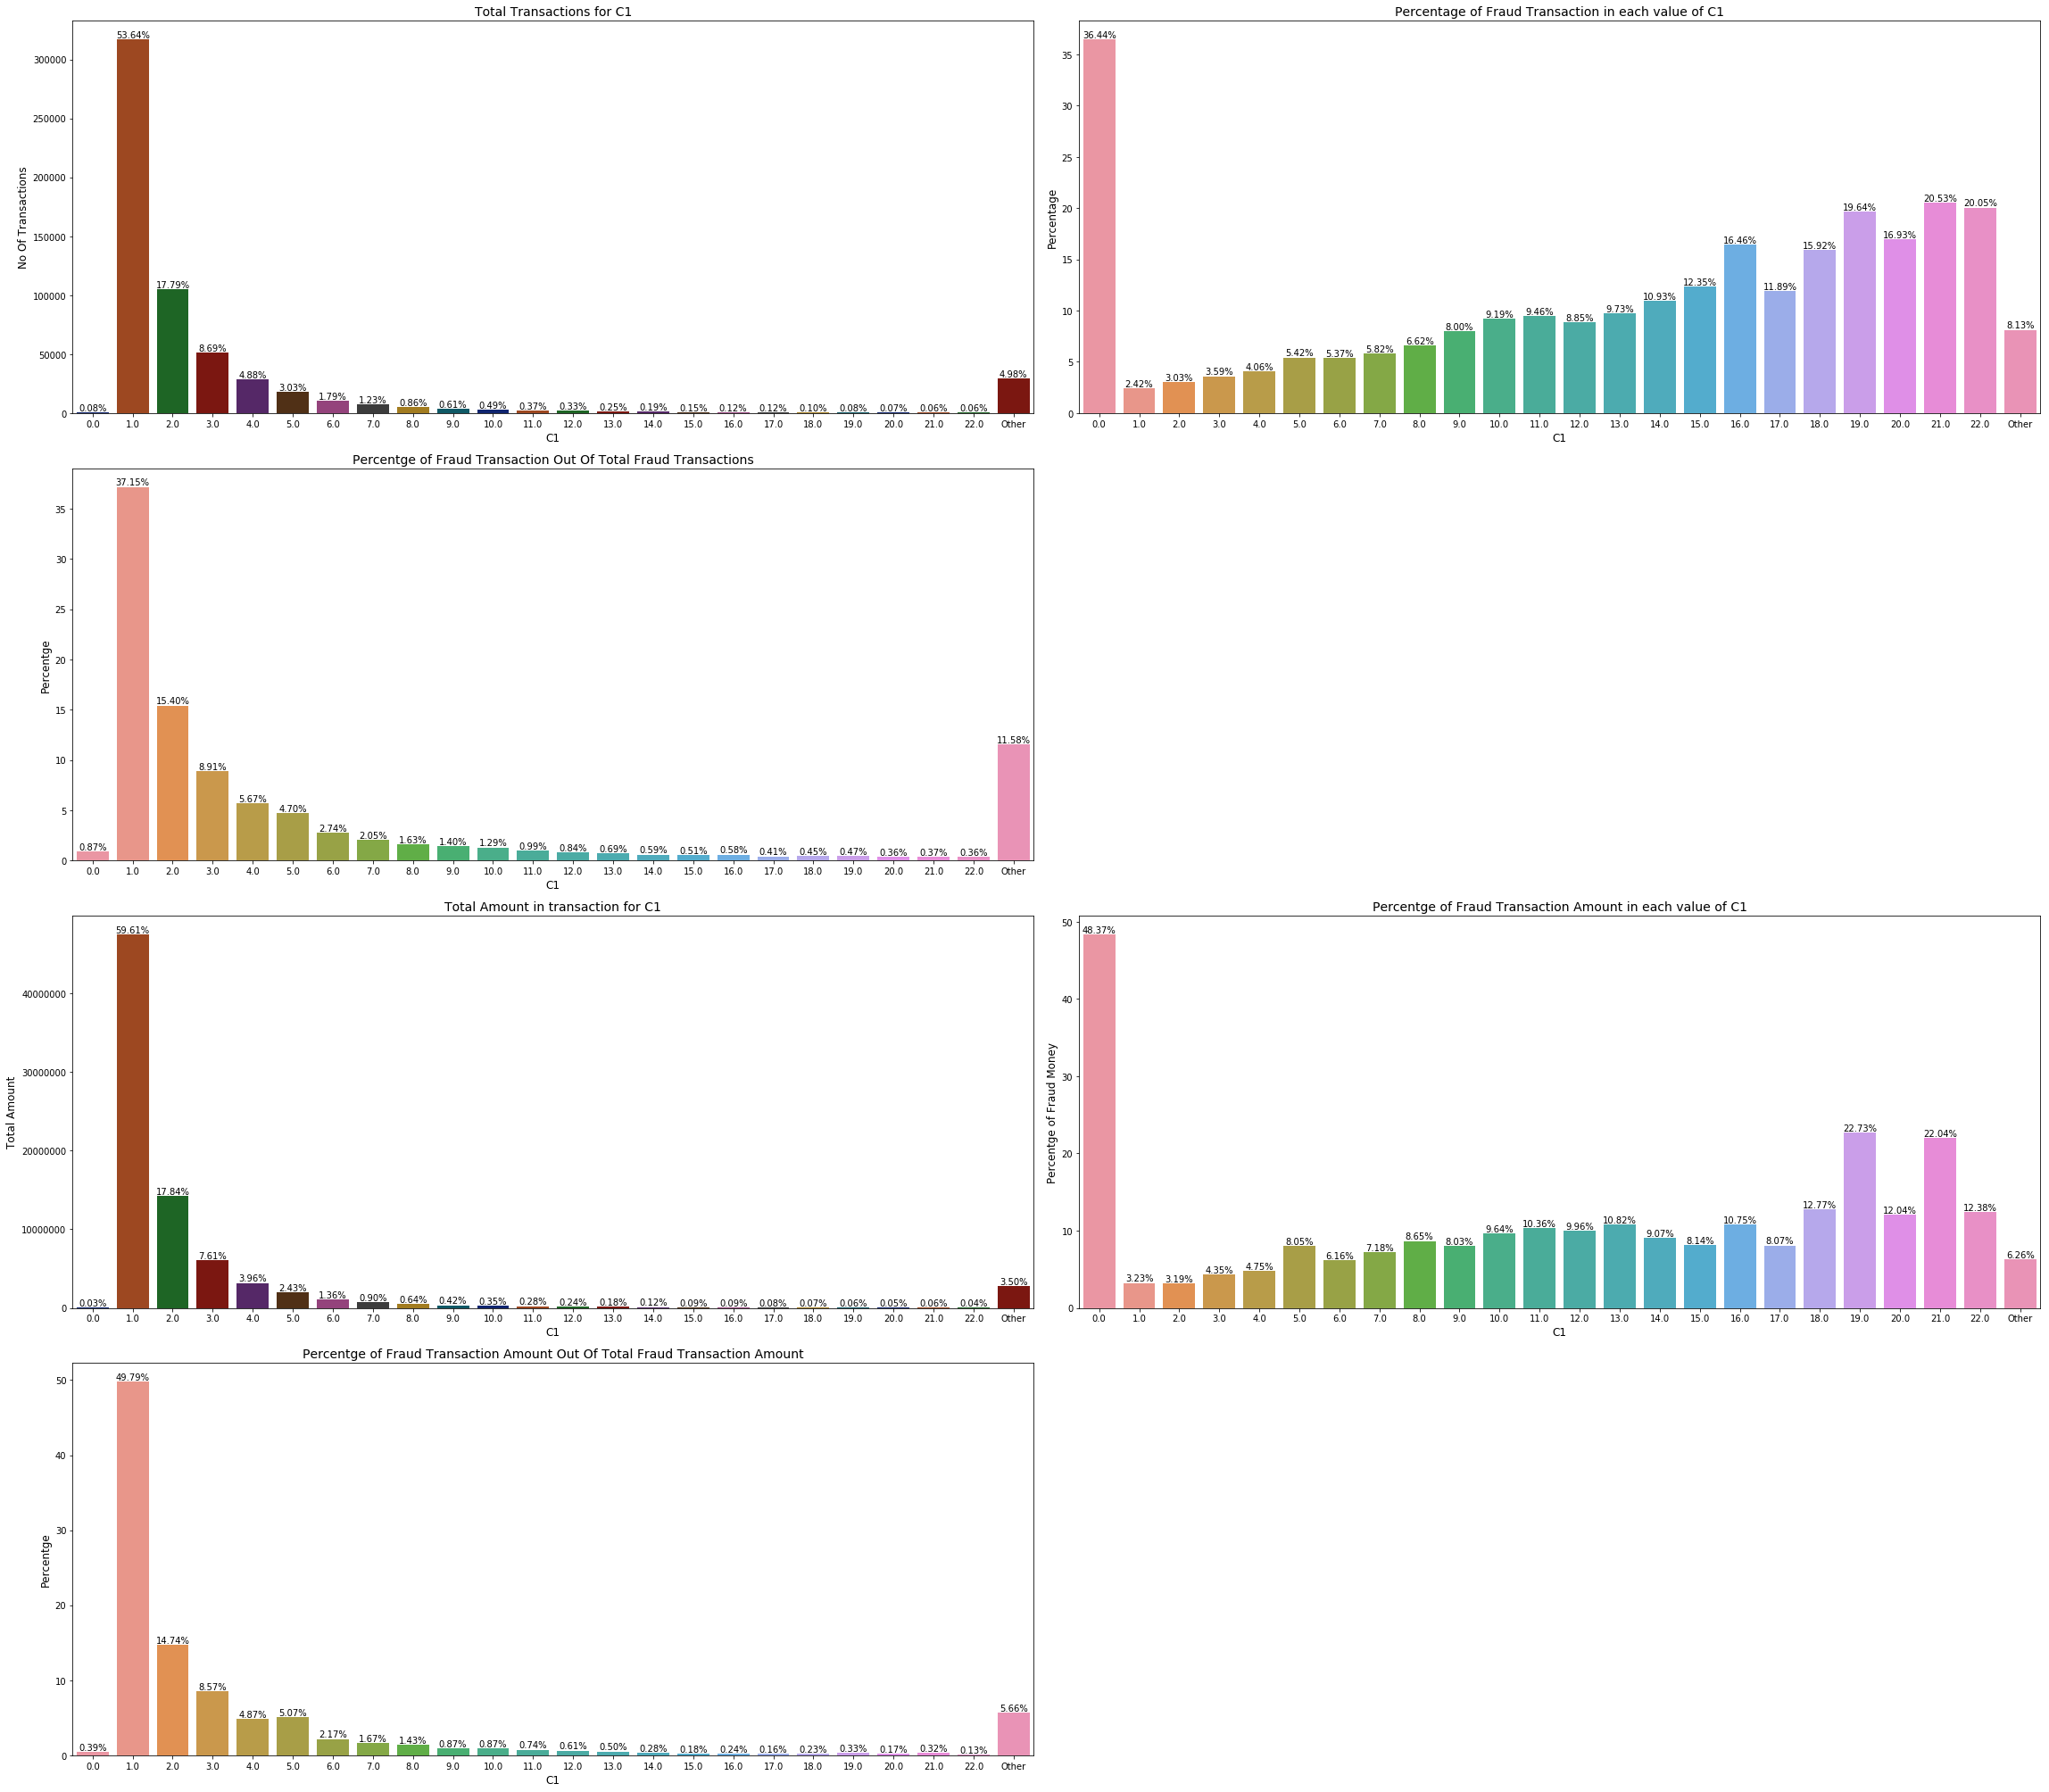

In [81]:
count_perFraud_plots(train_trans, 'C1', True, 'quantile',0.950, fontsize=14, figsizeH=28, figsizeW=32)

### C3

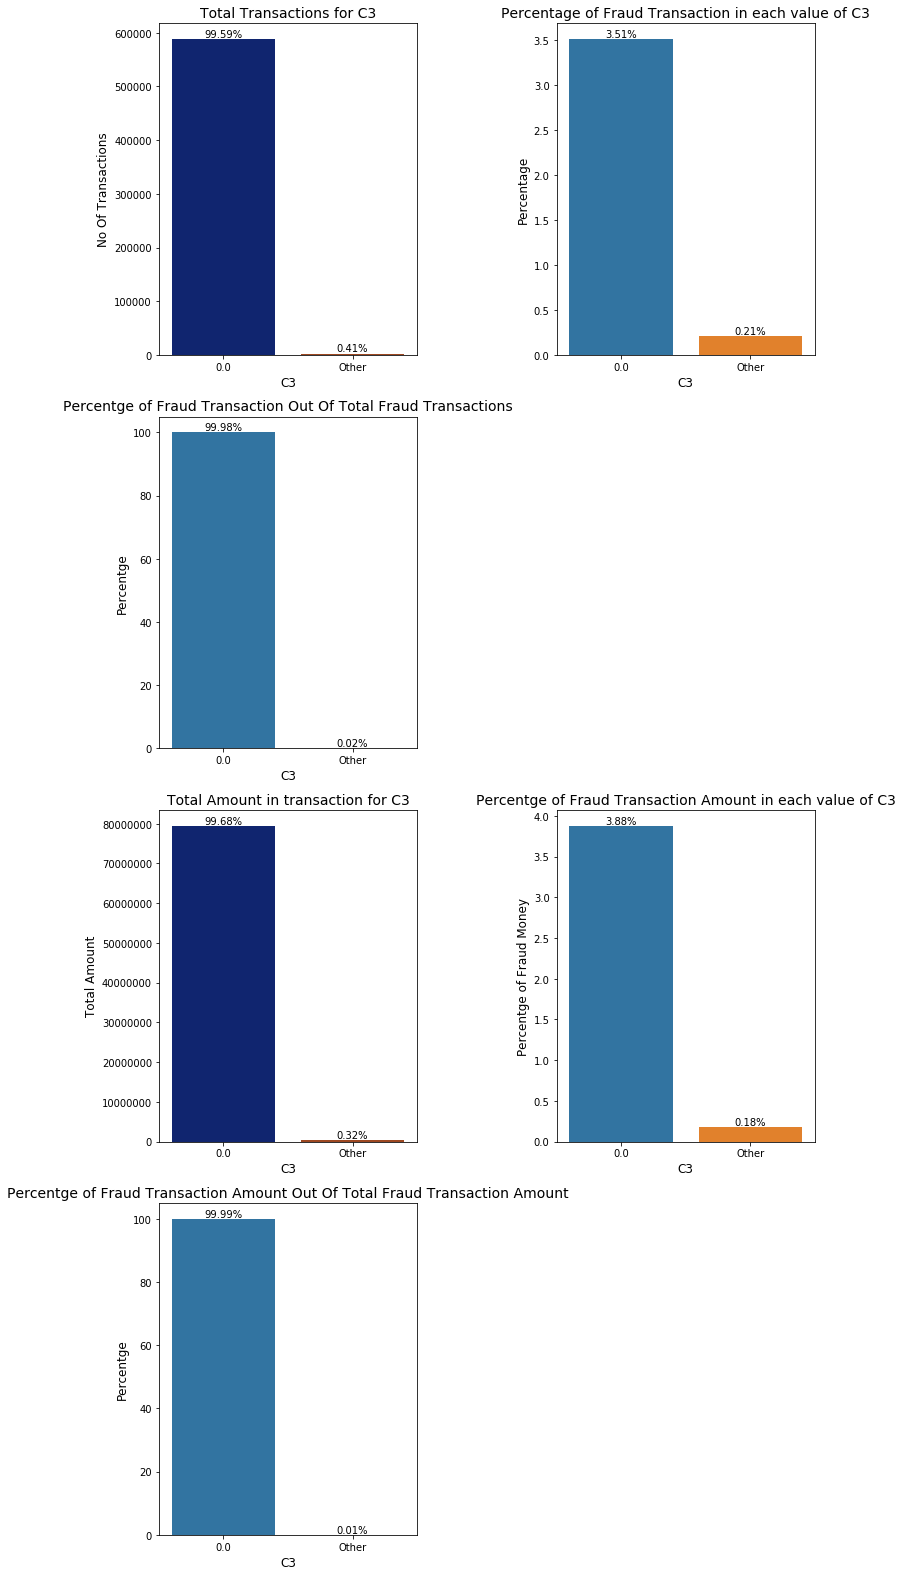

In [82]:
count_perFraud_plots(train_trans, 'C3', True, 'quantile',0.990, 14, 12, 22)
#(df, col, outliers = True, thresholdType='None', threshold = 0, fontsize =15, figsizeW =16, figsizeH=20, rotate =True):

### C5

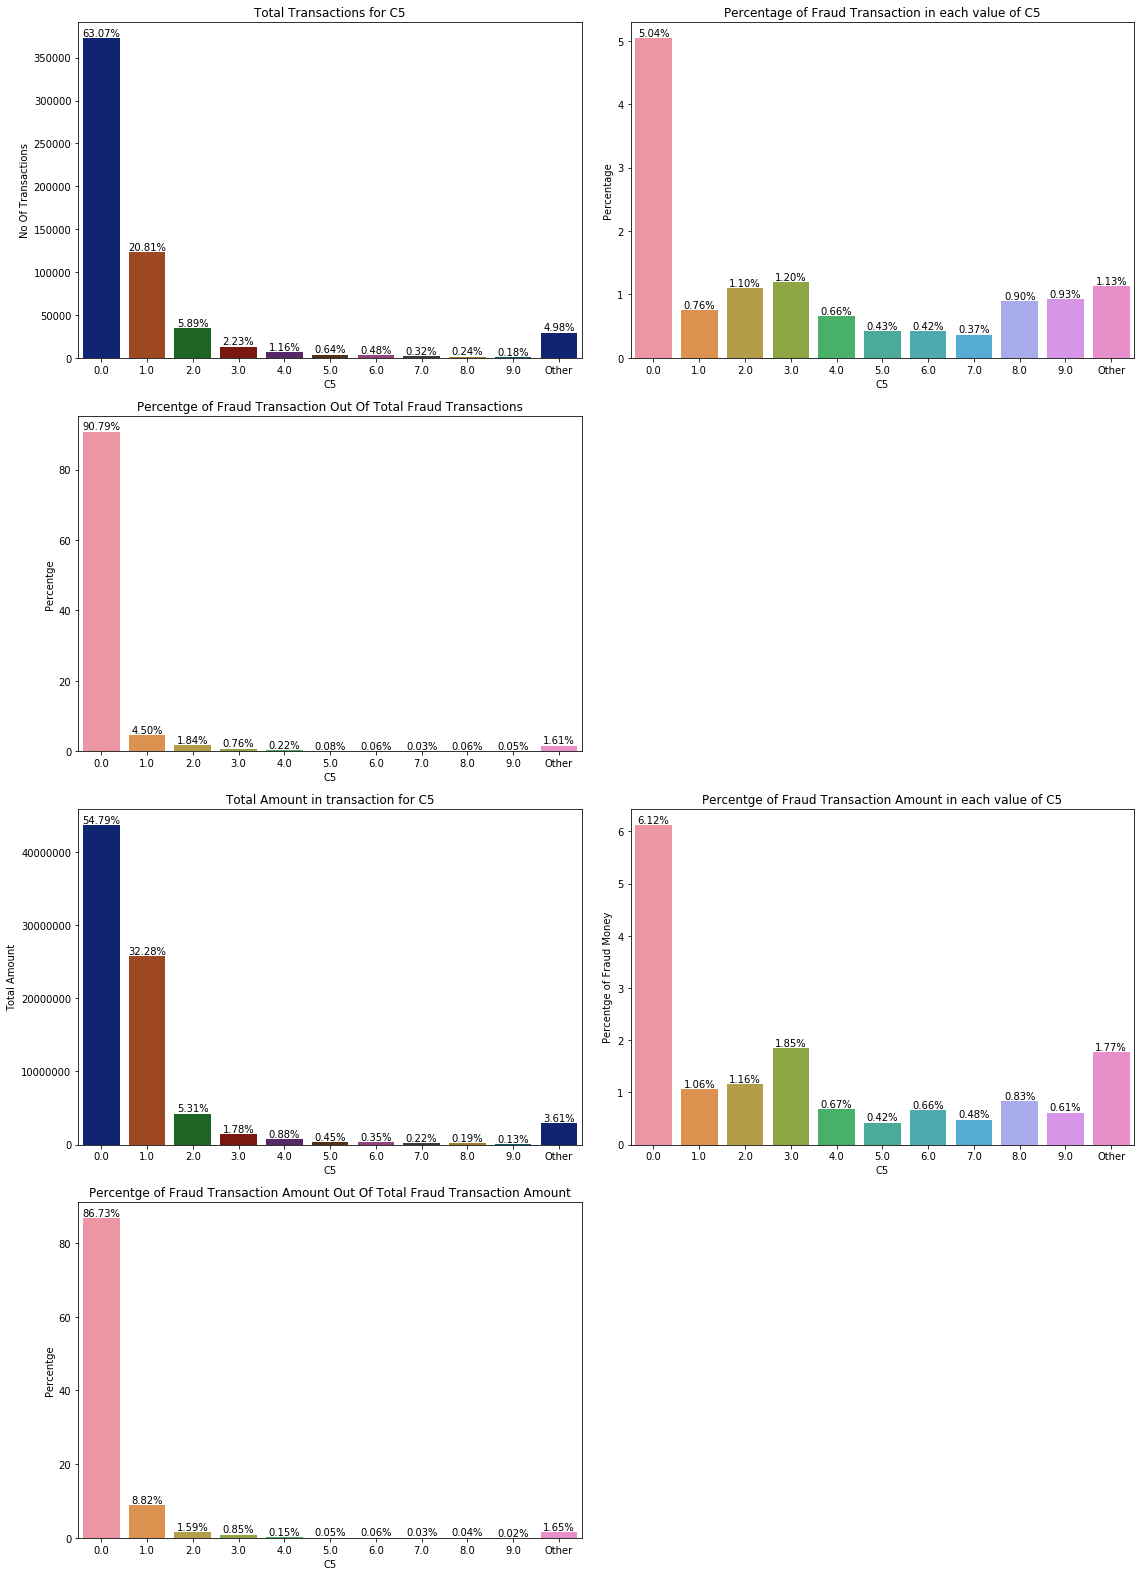

In [83]:
count_perFraud_plots(train_trans, 'C5', True, 'quantile',0.950, 12, 16, 22)

### C9

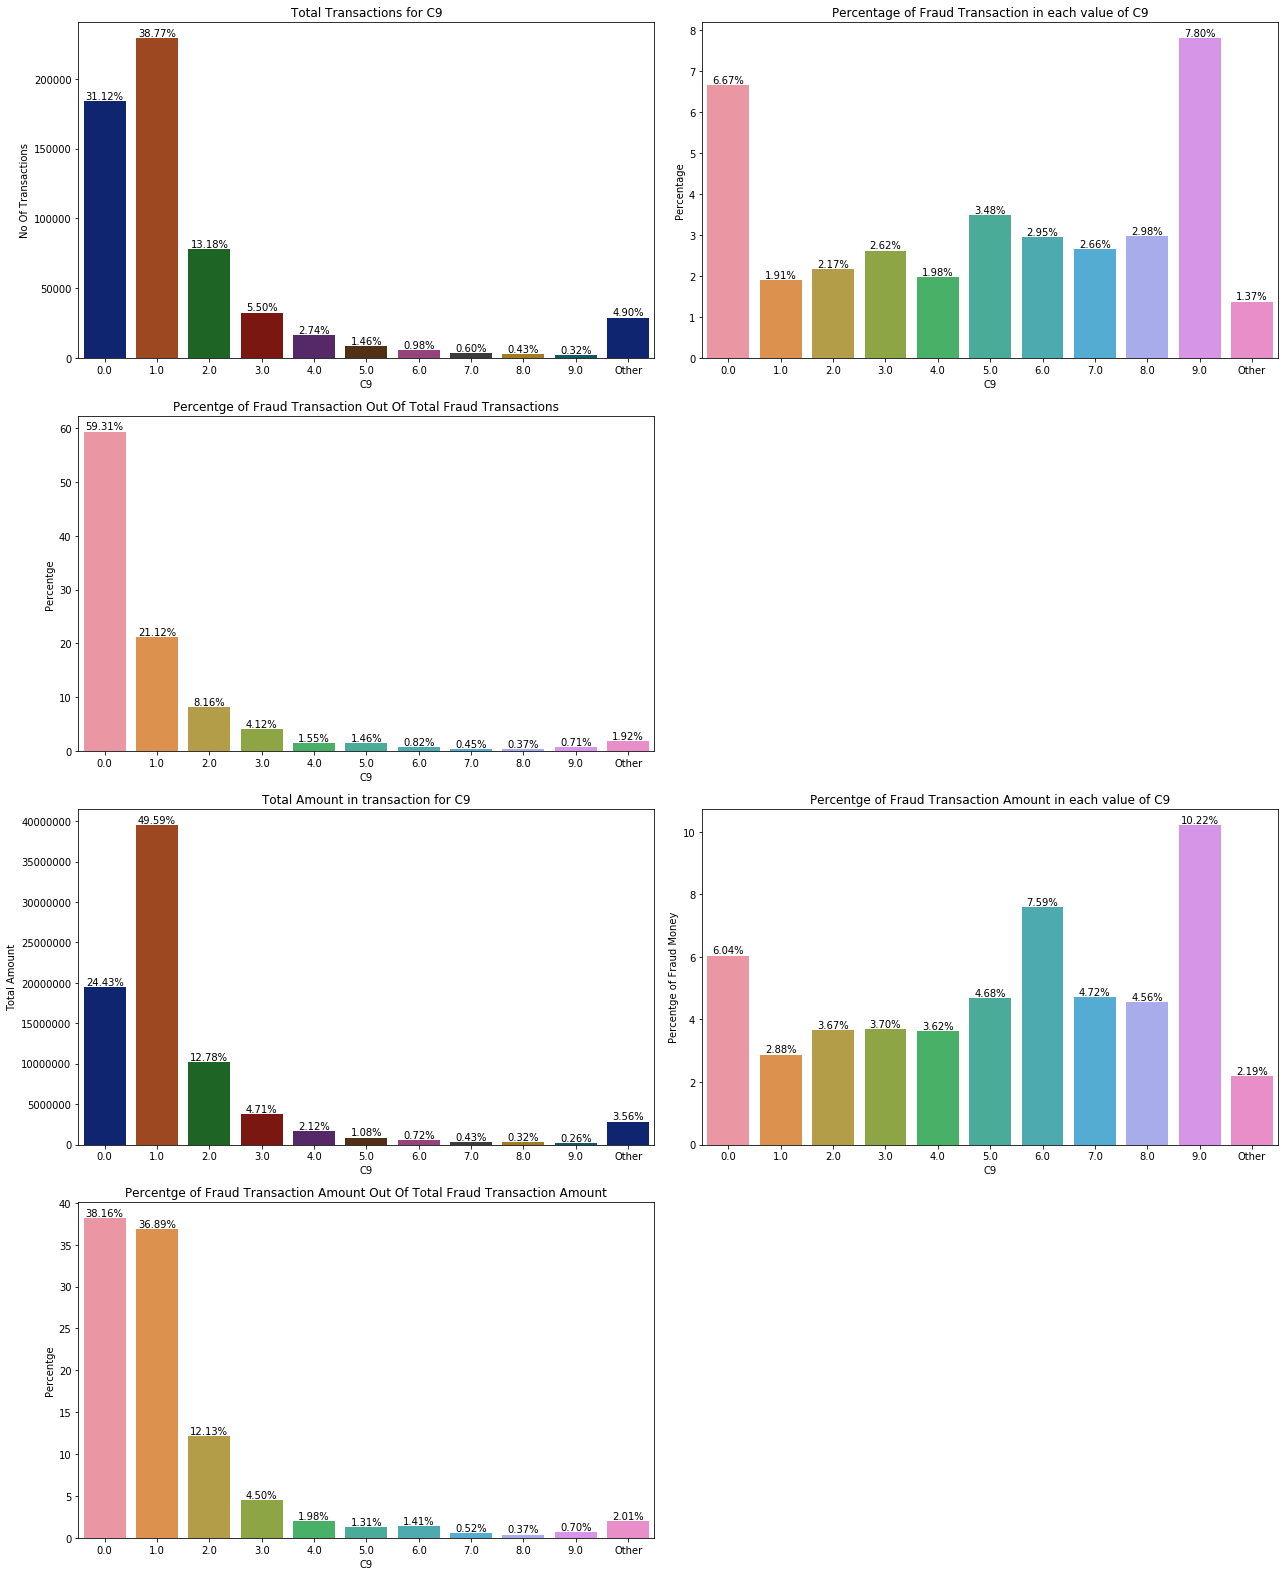

In [84]:
count_perFraud_plots(train_trans, 'C9', True, 'quantile',0.950, 12, 18, 22)

## D Columns

In [85]:
train_trans[d_col].head()

D1      D2     D3     D4    D5  D6  D7  D8  D9    D10  \
TransactionID                                                              
2987000        14.000     nan 13.000    nan   nan nan nan nan nan 13.000   
2987001         0.000     nan    nan  0.000   nan nan nan nan nan  0.000   
2987002         0.000     nan    nan  0.000   nan nan nan nan nan  0.000   
2987003       112.000 112.000  0.000 94.000 0.000 nan nan nan nan 84.000   
2987004         0.000     nan    nan    nan   nan nan nan nan nan    nan   

                  D11  D12  D13  D14     D15  
TransactionID                                 
2987000        13.000  nan  nan  nan   0.000  
2987001           nan  nan  nan  nan   0.000  
2987002       315.000  nan  nan  nan 315.000  
2987003           nan  nan  nan  nan 111.000  
2987004           nan  nan  nan  nan     nan

In [86]:
metadata(train_trans[d_col])

Name    Dtype  Missing  Percentage_Missing  Unique
0    D1  float64     1269               0.215     641
1    D2  float64   280797              47.549     641
2    D3  float64   262878              44.515     649
3    D4  float64   168922              28.605     808
4    D5  float64   309841              52.467     688
5    D6  float64   517353              87.607     829
6    D7  float64   551623              93.410     597
7    D8  float64   515614              87.312   12353
8    D9  float64   515614              87.312      24
9   D10  float64    76022              12.873     818
10  D11  float64   279287              47.293     676
11  D12  float64   525823              89.041     635
12  D13  float64   528588              89.509     577
13  D14  float64   528353              89.469     802
14  D15  float64    89113              15.090     859

In [87]:
train_trans[d_col].describe()

D1         D2         D3         D4         D5        D6  \
count 589271.000 309743.000 327662.000 421618.000 280699.000 73187.000   
mean      94.348    169.563     28.343    140.002     42.336    69.806   
std      157.660    177.316     62.385    191.097     89.000   143.669   
min        0.000      0.000      0.000   -122.000      0.000   -83.000   
25%        0.000     26.000      1.000      0.000      1.000     0.000   
50%        3.000     97.000      8.000     26.000     10.000     0.000   
75%      122.000    276.000     27.000    253.000     32.000    40.000   
max      640.000    640.000    819.000    869.000    819.000   873.000   

             D7        D8        D9        D10        D11       D12       D13  \
count 38917.000 74926.000 74926.000 514518.000 311253.000 64717.000 61952.000   
mean     41.639   146.058     0.561    123.982    146.621    54.038    17.901   
std      99.743   231.664     0.317    182.615    186.043   124.275    67.614   
min       0.000     0.000     0.000      0.000    -53.000   -83.000     0.000   
25%       0.000     0.958     0.208      0.000      0.000     0.000     0.000   
50%       0.000    37.875     0.667     15.000     43.000     0.000     0.000   
75%      17.000   187.958     0.833    197.000    274.000    13.000     0.000   
max     843.000  1707.792     0.958    876.000    670.000   648.000   847.000   

            D14        D15  
count 62187.000 501427.000  
mean     57.724    163.745  
std     136.312    202.727  
min    -193.000    -83.000  
25%       0.000      0.000  
50%       0.000     52.000  
75%       2.000    314.000  
max     878.000    879.000

In [88]:
quantiles[d_col]

D1      D2      D3      D4      D5      D6      D7      D8    D9  \
0.010   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000 0.000   
0.200   0.000  16.000   0.000   0.000   0.000   0.000   0.000   0.875 0.125   
0.250   0.000  26.000   1.000   0.000   1.000   0.000   0.000   0.958 0.208   
0.500   3.000  97.000   8.000  26.000  10.000   0.000   0.000  37.875 0.667   
0.700  81.000 226.000  21.000 182.000  27.000  10.000   9.000 145.667 0.792   
0.750 122.000 276.000  27.000 253.000  32.000  40.000  17.000 187.958 0.833   
0.900 364.000 476.000  65.000 482.000 117.000 309.000 154.000 442.708 0.917   
0.950 489.000 540.000 129.000 544.000 246.000 405.000 321.000 738.656 0.958   
0.960 512.000 556.000 157.000 559.000 287.000 430.000 356.000 799.833 0.958   
0.990 602.000 617.000 356.000 623.000 455.000 593.000 429.000 983.927 0.958   

          D10     D11     D12     D13     D14     D15  
0.010   0.000   0.000   0.000   0.000   0.000   0.000  
0.200   0.000   0.000   0.000   0.000   0.000   0.000  
0.250   0.000   0.000   0.000   0.000   0.000   0.000  
0.500  15.000  43.000   0.000   0.000   0.000  52.000  
0.700 135.000 212.000   3.000   0.000   0.000 244.000  
0.750 197.000 274.000  13.000   0.000   2.000 314.000  
0.900 461.000 462.000 258.000  27.000 262.000 509.000  
0.950 535.000 532.000 381.000 109.000 396.000 566.000  
0.960 552.000 548.000 408.000 149.000 420.000 579.000  
0.990 622.000 609.000 514.000 371.490 562.000 635.000

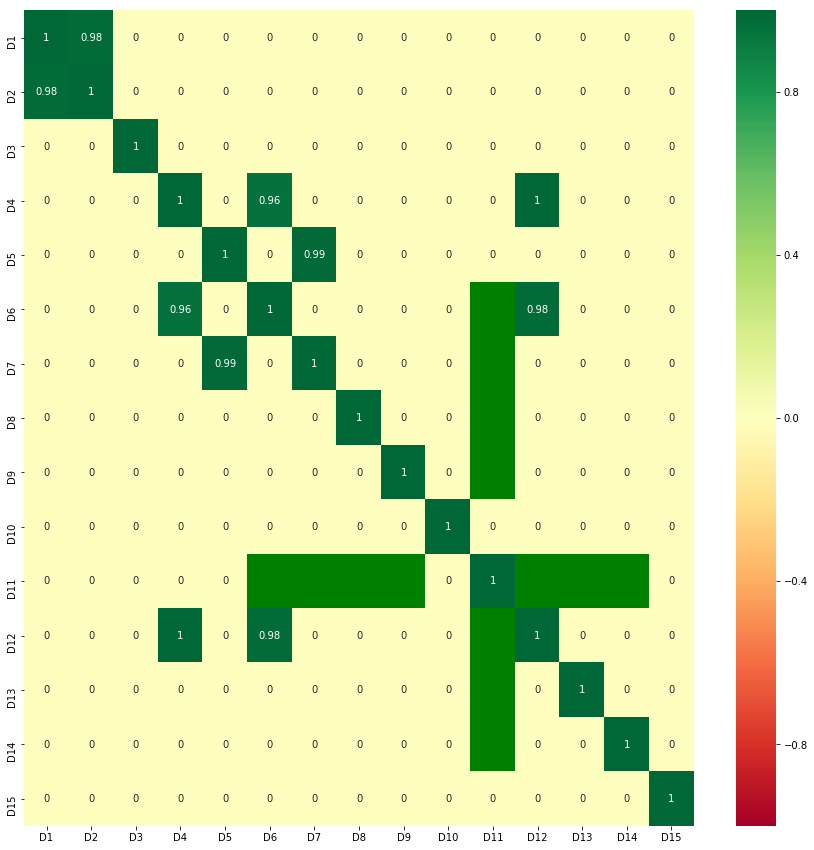

In [89]:
corrfunc(train_trans, d_col)

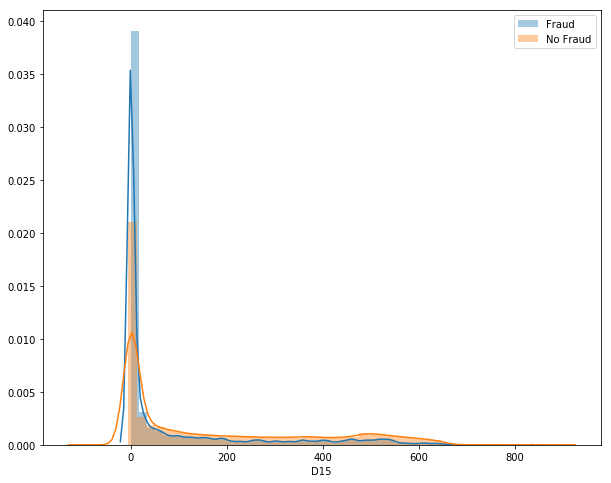

In [90]:
plt.figure(figsize=(10,8))
plot1 = sns.distplot(train_trans[train_trans['isFraud']==1]['D15'].dropna(), label = 'Fraud')
plot1 = sns.distplot(train_trans[train_trans['isFraud']==0]['D15'].dropna(), label = 'No Fraud')
plot1.legend()
plt.show()

### D5

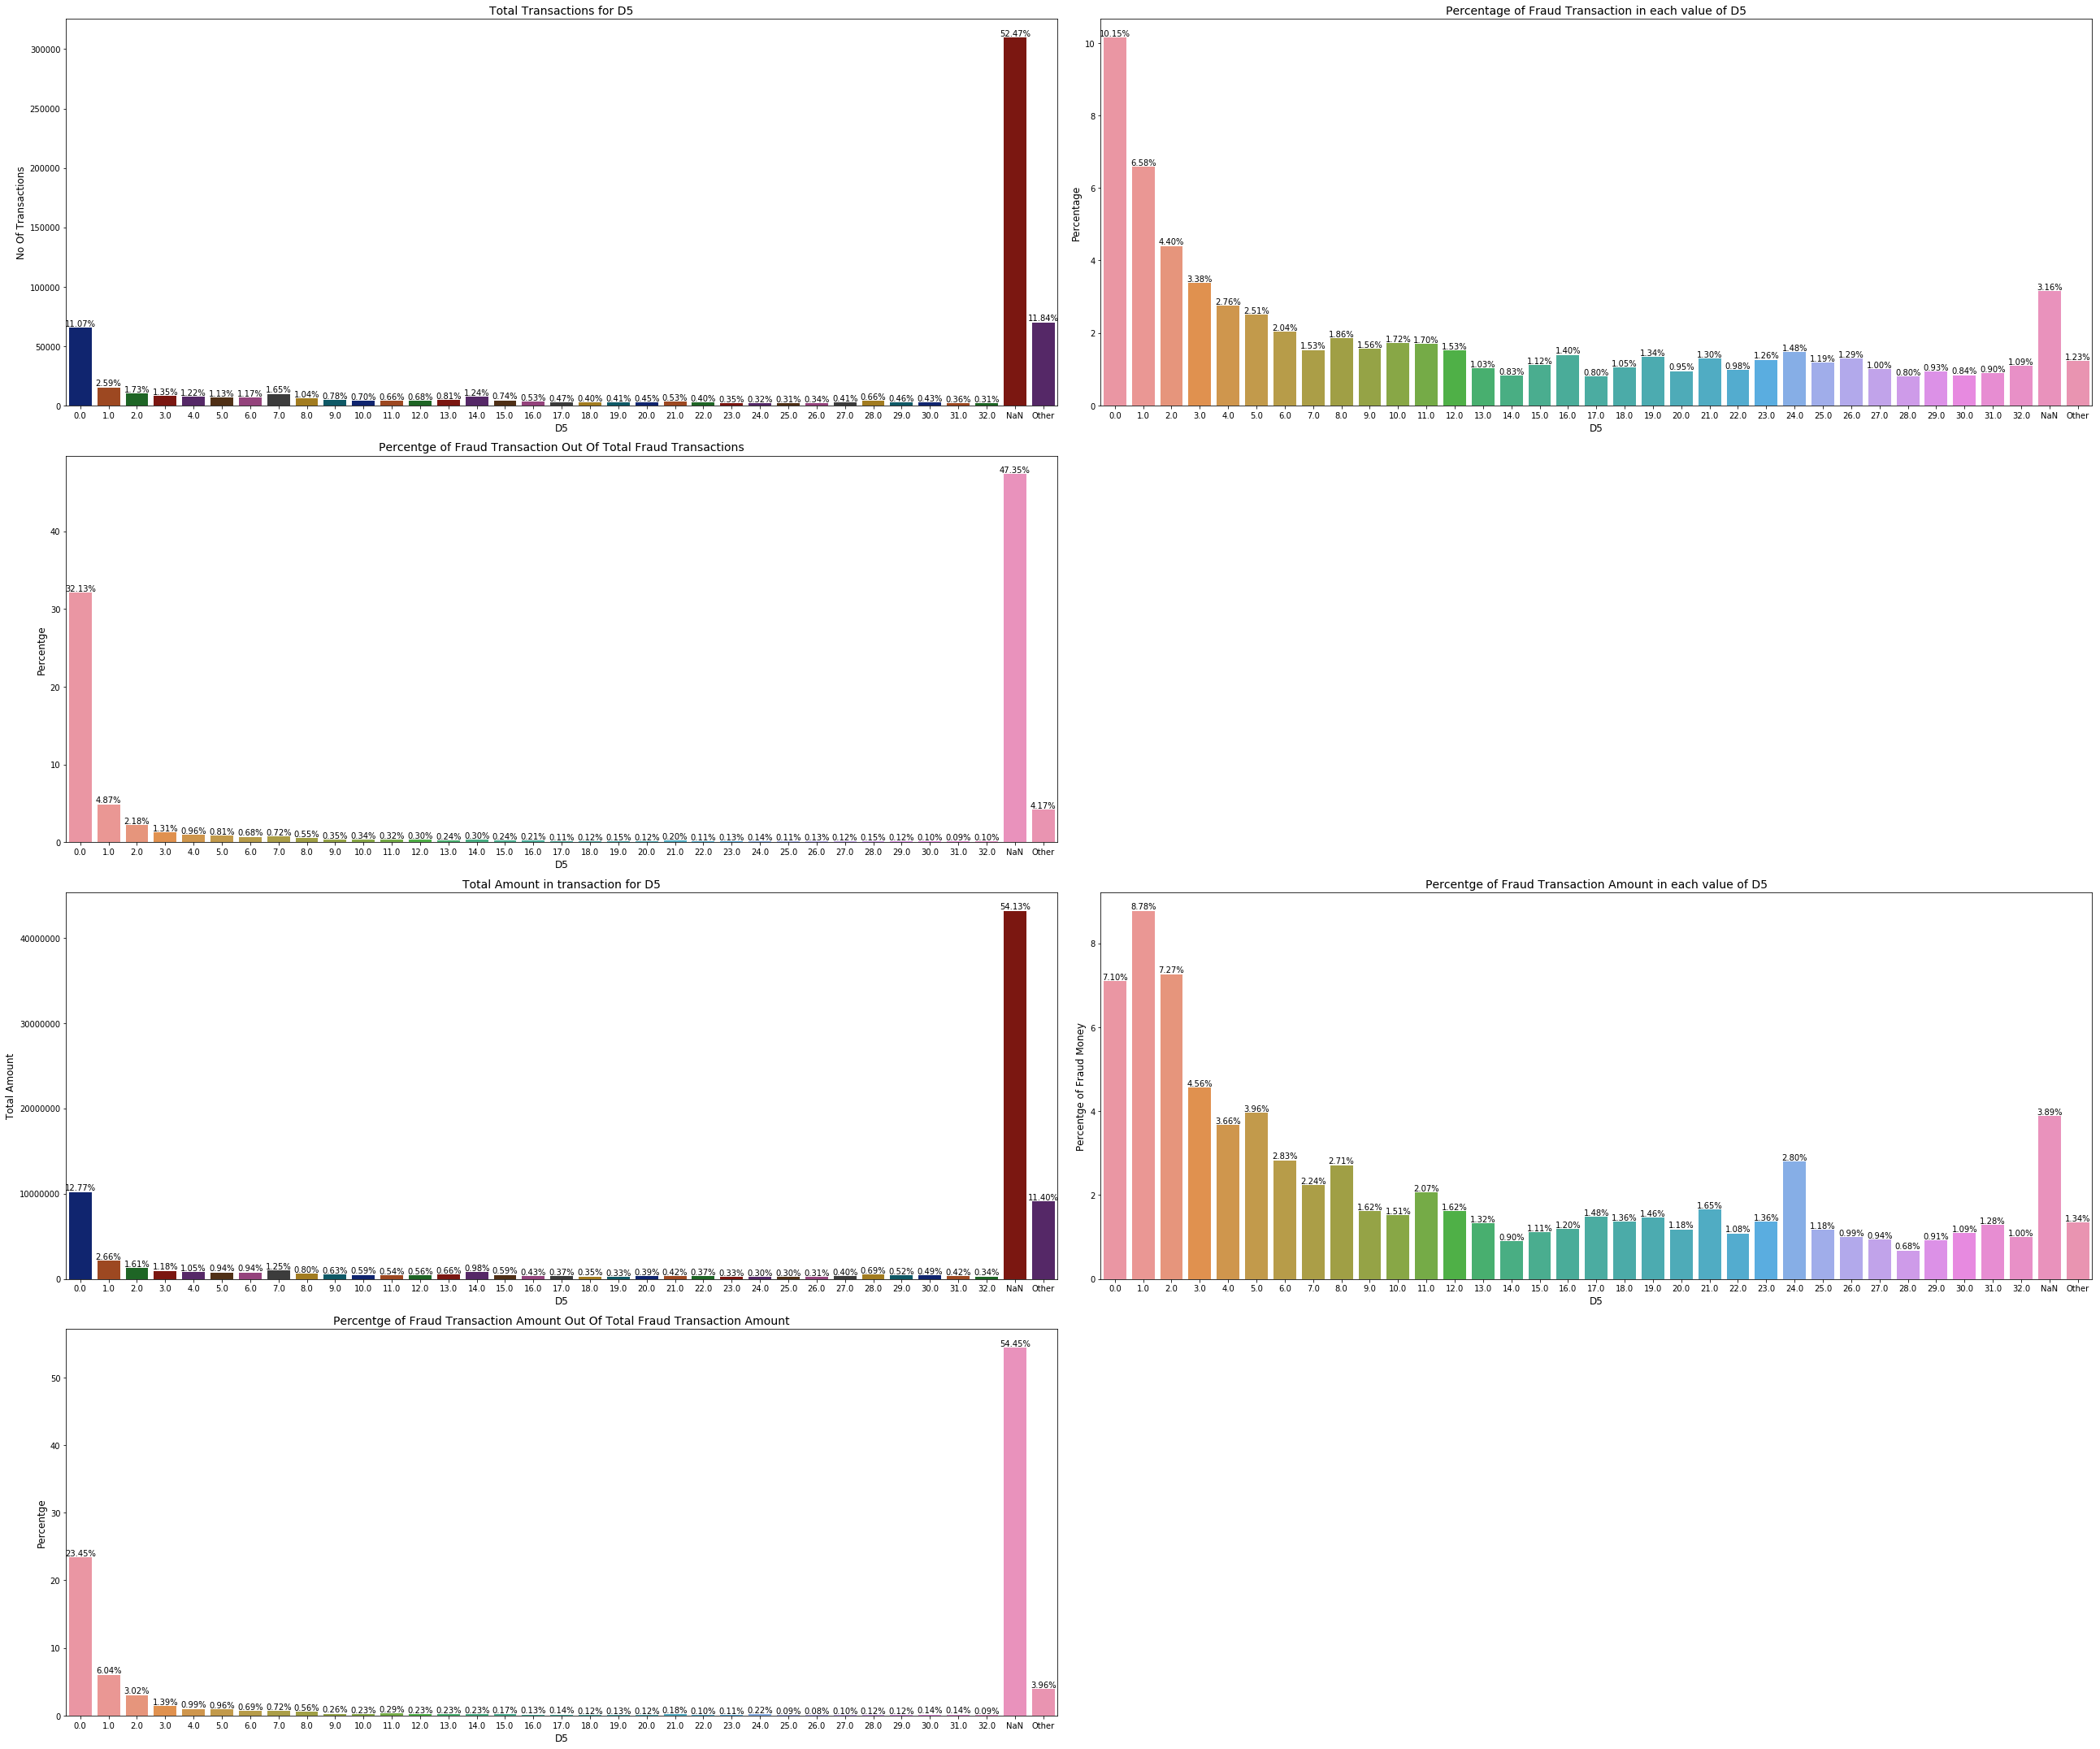

In [91]:
count_perFraud_plots(train_trans,'D5',True, 'quantile',0.750, 14, 36, 30)

### D7

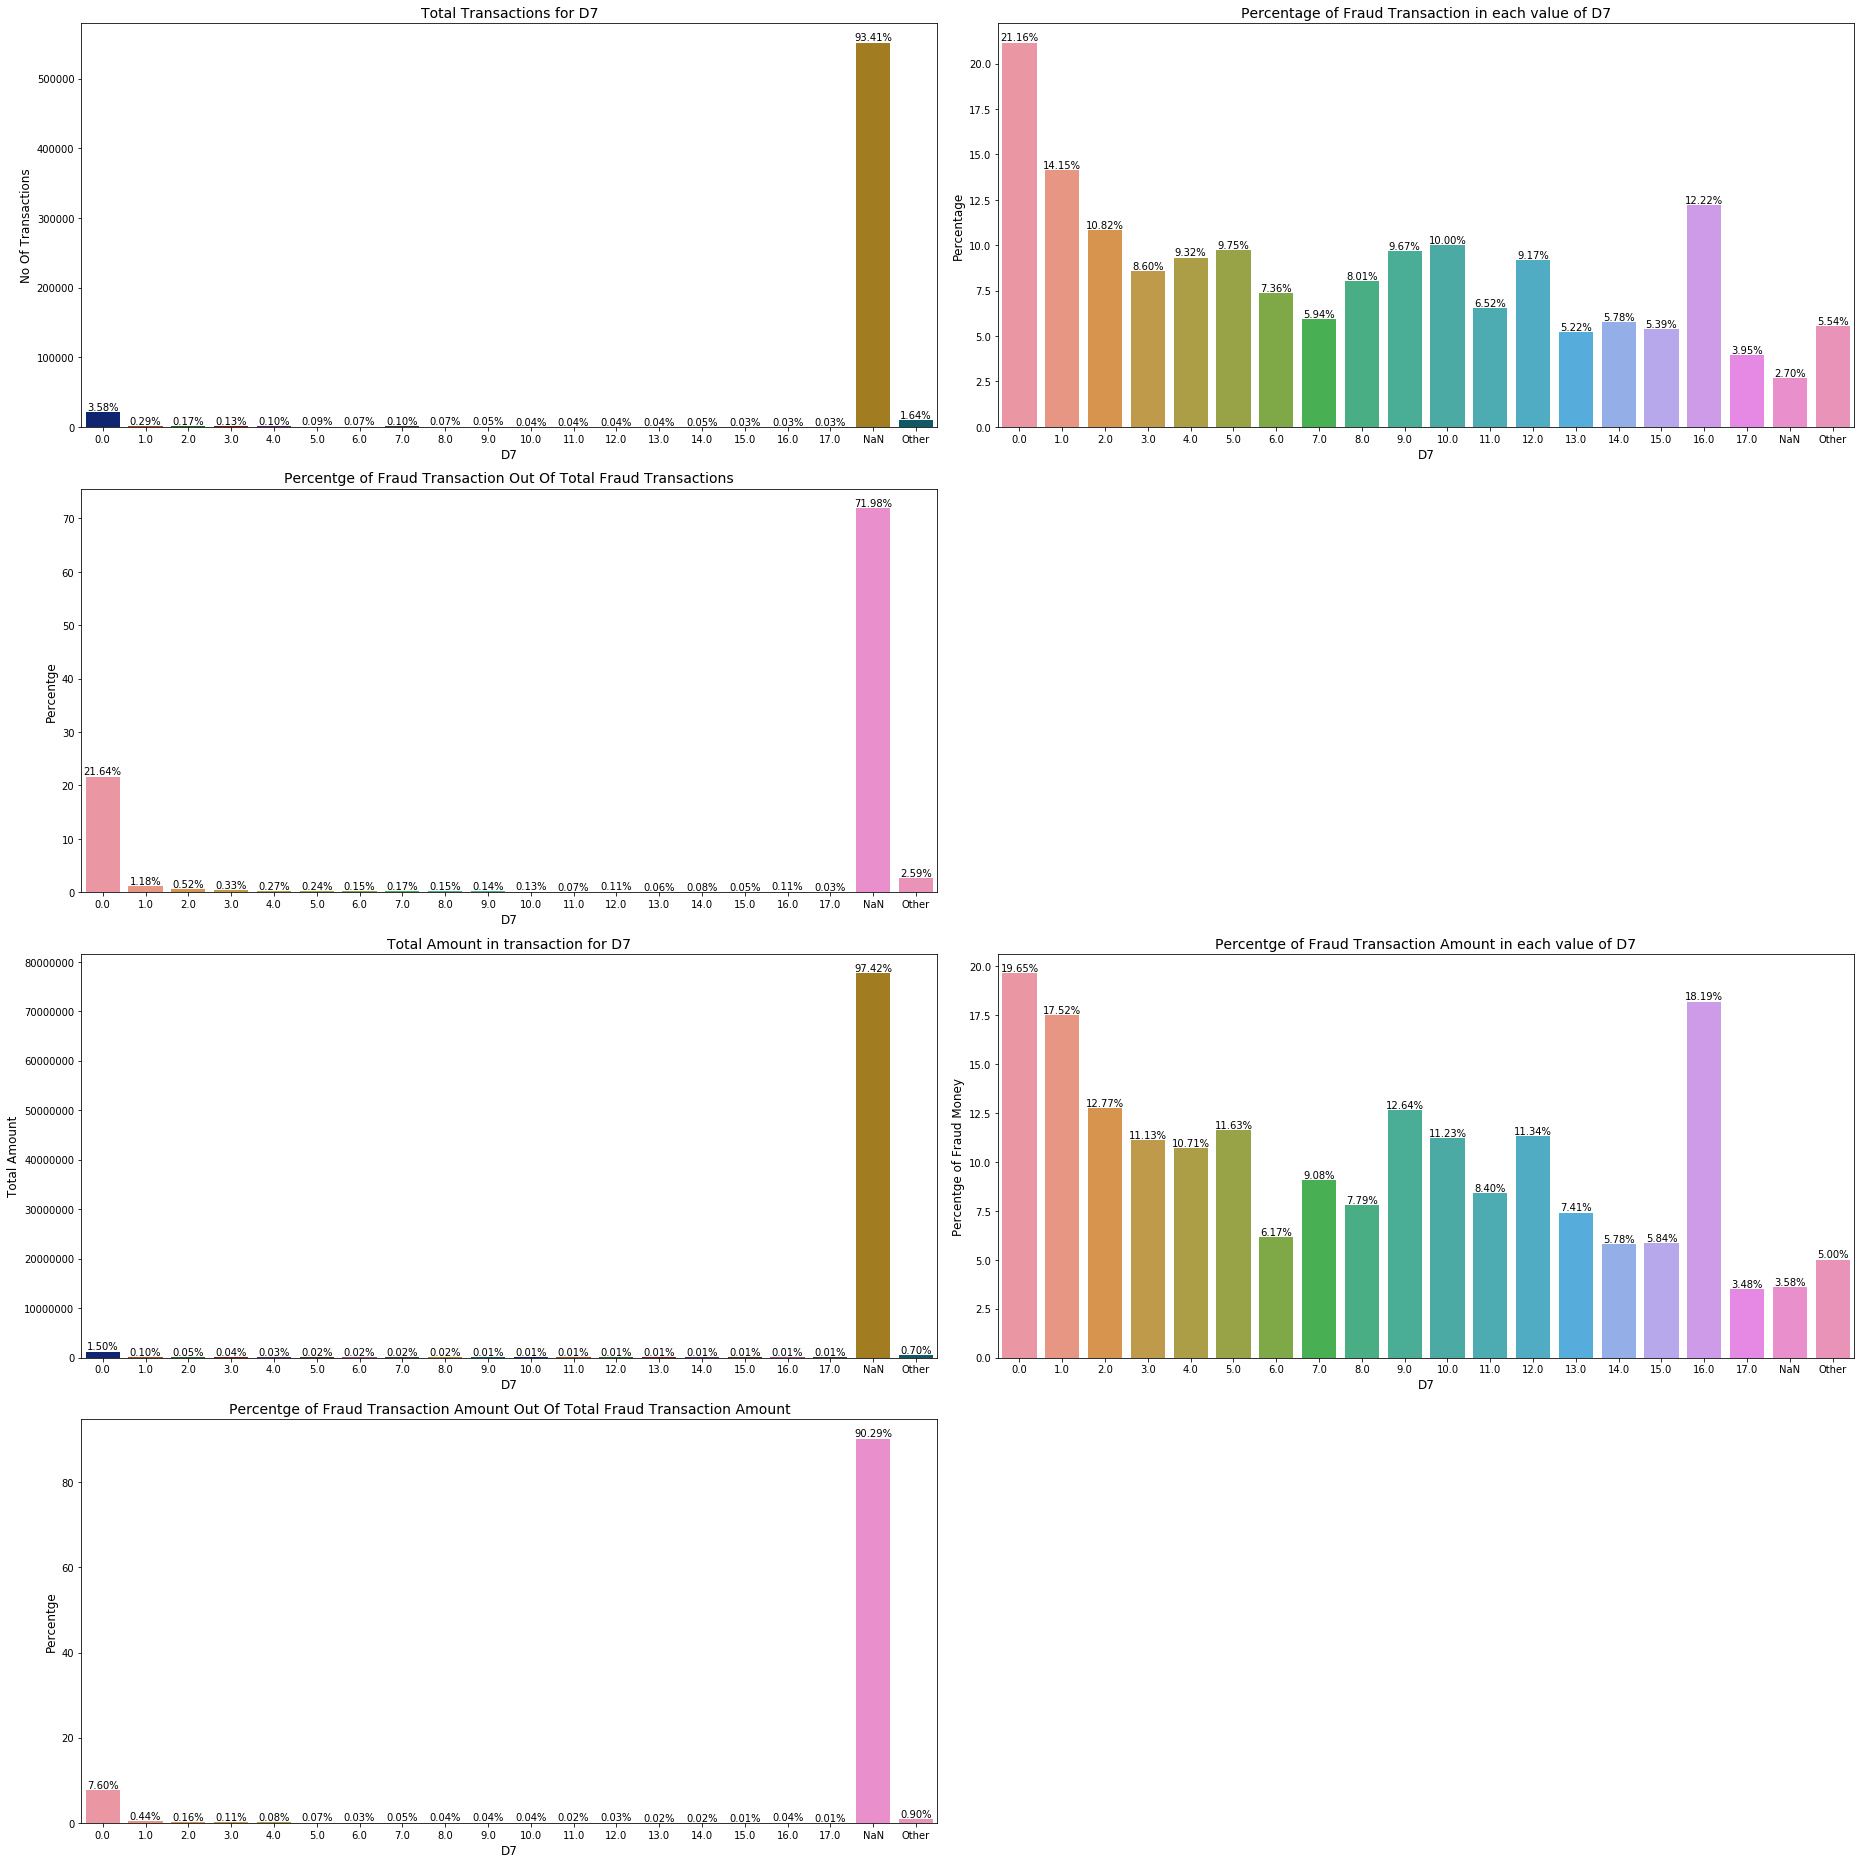

In [92]:
count_perFraud_plots(train_trans,'D7',True, 'quantile',0.750, 14, 26, 26)

### D12

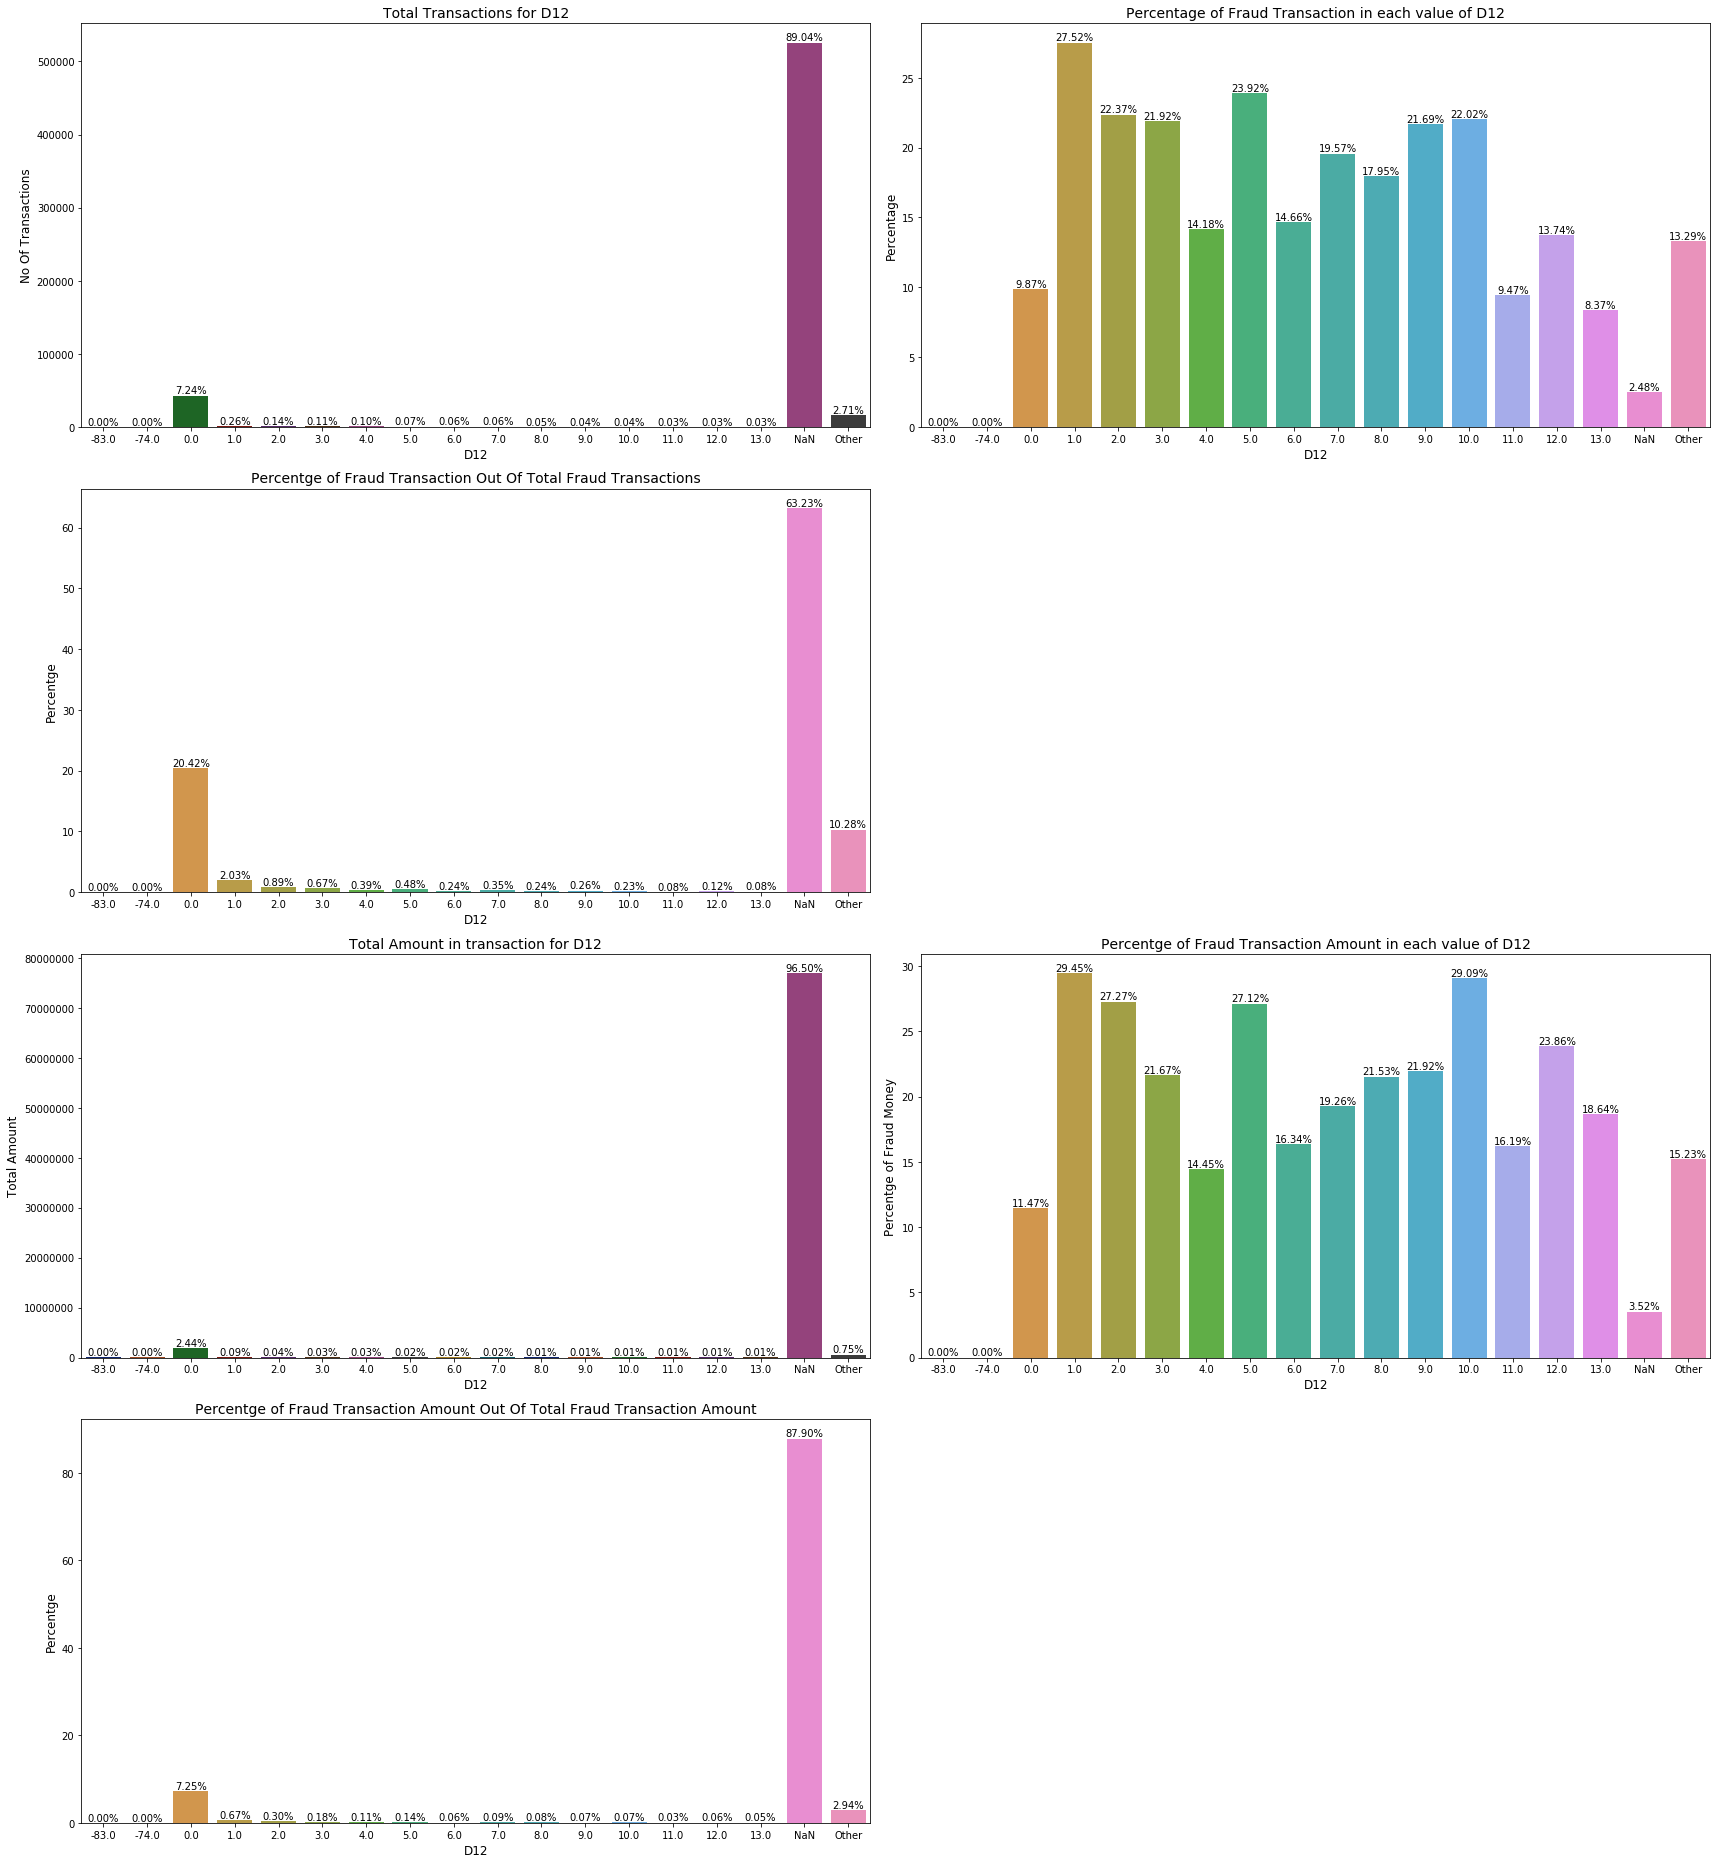

In [93]:
count_perFraud_plots(train_trans,'D12',True, 'quantile',0.750, 14, 24, 26)

### D13

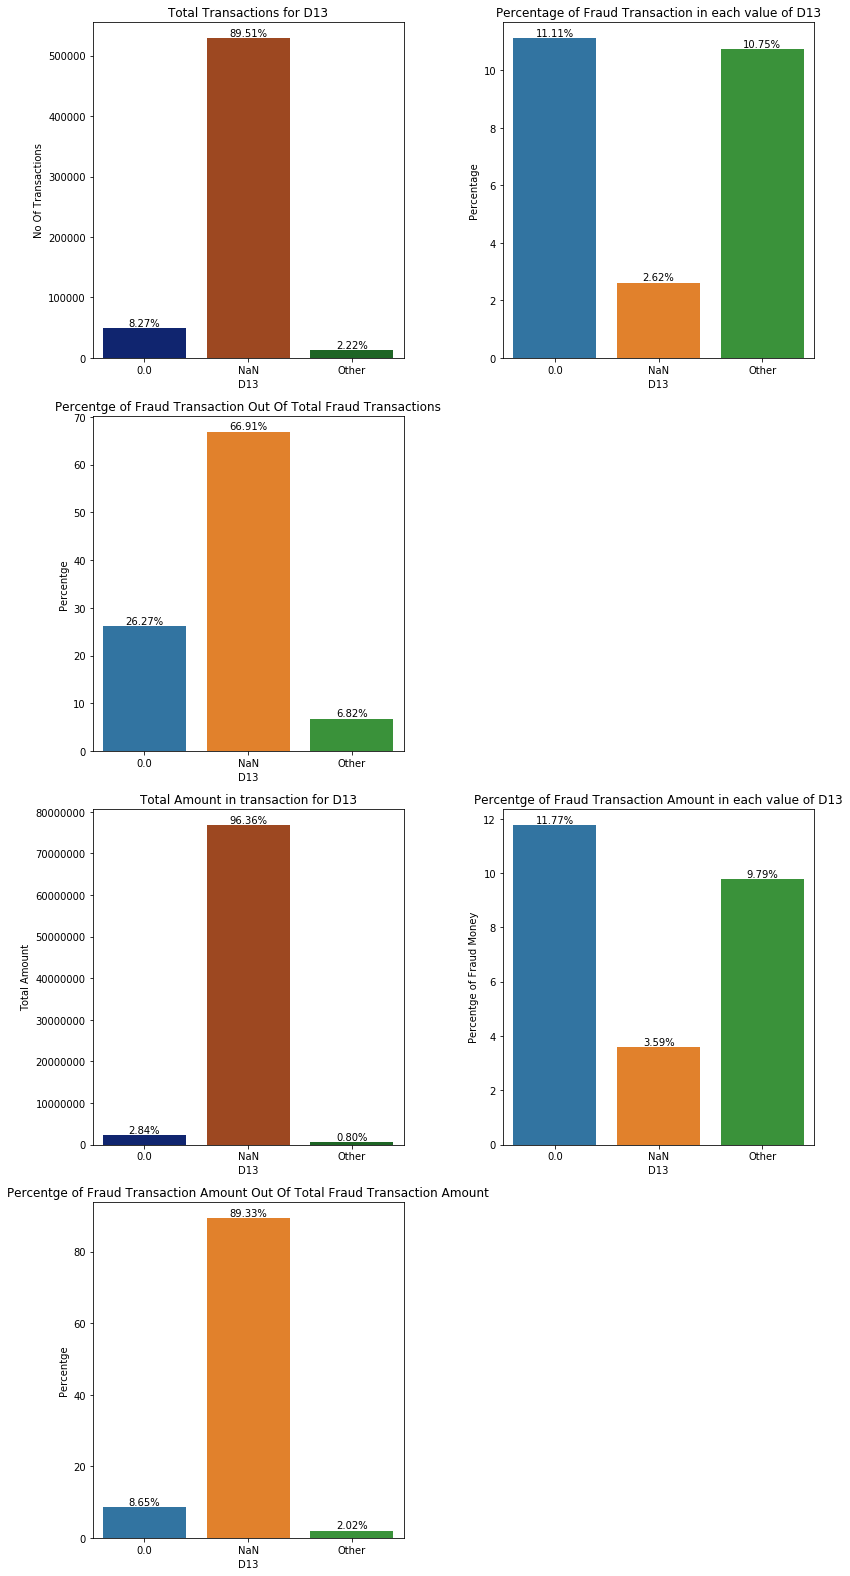

In [94]:
count_perFraud_plots(train_trans,'D13', True, 'quantile',0.750, 12, 12, 22)

### D14

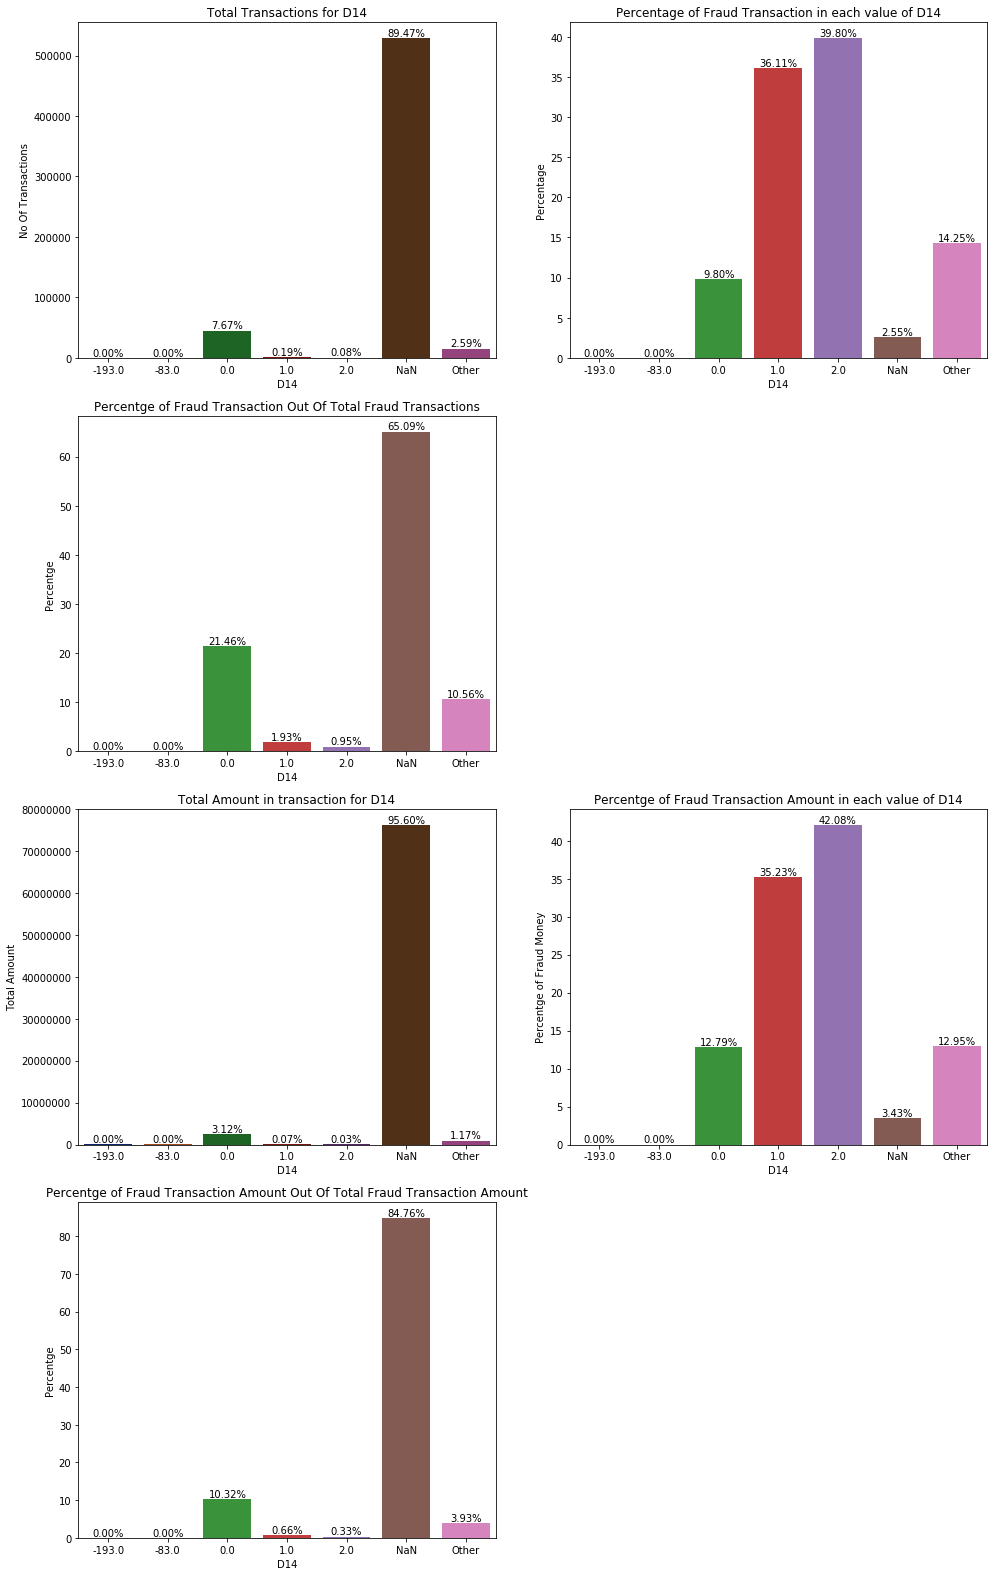

In [95]:
count_perFraud_plots(train_trans,'D14', True, 'quantile',0.750, 12, 14, 22)

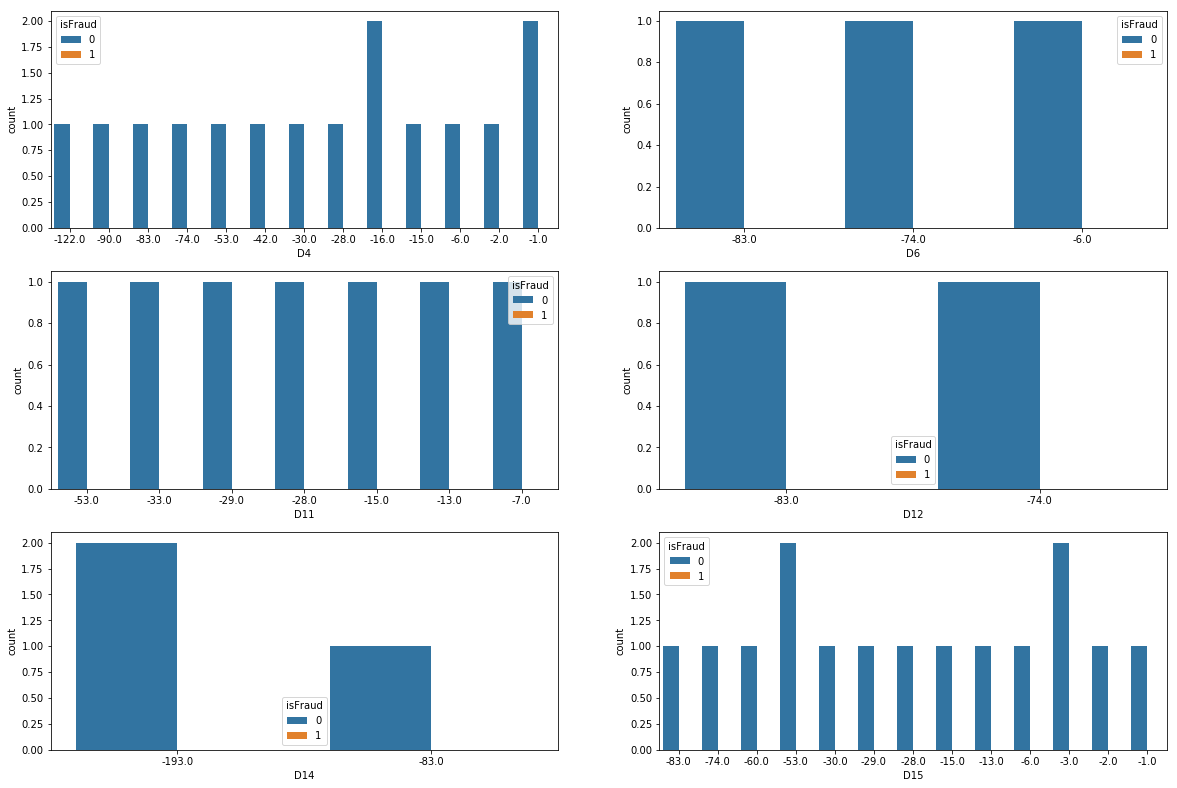

In [96]:
plt.figure(figsize=(20, 28))
plt.subplot(621)
sns.countplot(x= train_trans[train_trans['D4']<0]['D4'], hue = train_trans['isFraud'])
plt.subplot(622)
sns.countplot(x= train_trans[train_trans['D6']<0]['D6'], hue = train_trans['isFraud'])
plt.subplot(623)
sns.countplot(x= train_trans[train_trans['D11']<0]['D11'], hue = train_trans['isFraud'])
plt.subplot(624)
sns.countplot(x= train_trans[train_trans['D12']<0]['D12'], hue = train_trans['isFraud'])
plt.subplot(625)
sns.countplot(x= train_trans[train_trans['D14']<0]['D14'], hue = train_trans['isFraud'])
plt.subplot(626)
sns.countplot(x= train_trans[train_trans['D15']<0]['D15'], hue = train_trans['isFraud'])
plt.show()

* In Columnss with Negative values, all negative values are non fraud entries

## V Columns

In [97]:
train_trans[v_col].head()

V1    V2    V3    V4    V5    V6    V7    V8    V9   V10  \
TransactionID                                                               
2987000       1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.000   
2987001         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
2987002       1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.000   
2987003         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
2987004         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   

                V11   V12   V13   V14   V15   V16   V17   V18   V19   V20  \
TransactionID                                                               
2987000       0.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
2987001         nan 0.000 0.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
2987002       0.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
2987003         nan 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
2987004         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   

                V21   V22   V23   V24   V25   V26   V27   V28   V29   V30  \
TransactionID                                                               
2987000       0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
2987001       0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
2987002       0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
2987003       0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
2987004         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   

                V31   V32   V33   V34   V35   V36   V37   V38   V39   V40  \
TransactionID                                                               
2987000       0.000 0.000 0.000 0.000   nan   nan   nan   nan   nan   nan   
2987001       0.000 0.000 0.000 0.000 0.000 0.000 1.000 1.000 0.000 0.000   
2987002       0.000 0.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000   
2987003       0.000 0.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000   
2987004         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   

                V41   V42   V43   V44   V45   V46   V47   V48   V49   V50  \
TransactionID                                                               
2987000         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
2987001       1.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000   
2987002       1.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000   
2987003       1.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000   
2987004         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   

                V51   V52   V53   V54   V55   V56   V57   V58   V59   V60  \
TransactionID                                                               
2987000         nan   nan 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
2987001       0.000 0.000 0.000 0.000 1.000 1.000 0.000 0.000 0.000 0.000   
2987002       0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
2987003       0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000   
2987004         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   

                V61   V62   V63   V64   V65   V66   V67   V68   V69   V70  \
TransactionID                                                               
2987000       1.000 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000   
2987001       1.000 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000   
2987002       1.000 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000   
2987003       1.000 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000   
2987004         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   

                V71   V72   V73   V74   V75   V76   V77   V78   V79   V80  \
TransactionID                                                               
2987000       0.000 0.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000   
298700

In [98]:
v_info = metadata(train_trans[v_col])

In [99]:
v_info['Dtype'].value_counts()

float64    339
Name: Dtype, dtype: int64

All V columns are float.

There are 339 V columns. We will perform PCA to reduce dimensions

# Train Identity Dataset

In [100]:
train_id.head()

id_01      id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
TransactionID                                                               
2987004        0.000  70787.000    nan    nan    nan    nan    nan    nan   
2987008       -5.000  98945.000    nan    nan  0.000 -5.000    nan    nan   
2987010       -5.000 191631.000  0.000  0.000  0.000  0.000    nan    nan   
2987011       -5.000 221832.000    nan    nan  0.000 -6.000    nan    nan   
2987016        0.000   7460.000  0.000  0.000  1.000  0.000    nan    nan   

               id_09  id_10   id_11     id_12  id_13    id_14  id_15  \
TransactionID                                                          
2987004          nan    nan 100.000  NotFound    nan -480.000    New   
2987008          nan    nan 100.000  NotFound 49.000 -300.000    New   
2987010        0.000  0.000 100.000  NotFound 52.000      nan  Found   
2987011          nan    nan 100.000  NotFound 52.000      nan    New   
2987016        0.000  0.000 100.000  NotFound    nan -300.000  Found   

                  id_16   id_17  id_18   id_19   id_20  id_21  id_22 id_23  \
TransactionID                                                                
2987004        NotFound 166.000    nan 542.000 144.000    nan    nan   NaN   
2987008        NotFound 166.000    nan 621.000 500.000    nan    nan   NaN   
2987010           Found 121.000    nan 410.000 142.000    nan    nan   NaN   
2987011        NotFound 225.000    nan 176.000 507.000    nan    nan   NaN   
2987016           Found 166.000 15.000 529.000 575.000    nan    nan   NaN   

               id_24  id_25  id_26 id_27  id_28     id_29             id_30  \
TransactionID                                                                 
2987004          nan    nan    nan   NaN    New  NotFound       Android 7.0   
2987008          nan    nan    nan   NaN    New  NotFound        iOS 11.1.2   
2987010          nan    nan    nan   NaN  Found     Found               NaN   
2987011          nan    nan    nan   NaN    New  NotFound               NaN   
2987016          nan    nan    nan   NaN  Found     Found  Mac OS X 10_11_6   

                             id_31  id_32      id_33           id_34 id_35  \
TransactionID                                                                
2987004        samsung browser 6.2 32.000  2220x1080  match_status:2     T   
2987008         mobile safari 11.0 32.000   1334x750  match_status:1     T   
2987010                chrome 62.0    nan        NaN             NaN     F   
2987011                chrome 62.0    nan        NaN             NaN     F   
2987016                chrome 62.0 24.000   1280x800  match_status:2     T   

              id_36 id_37 id_38 DeviceType                     DeviceInfo  
TransactionID                                                              
2987004           F     T     T     mobile  SAMSUNG SM-G892A Build/NRD90M  
2987008           F     F     T     mobile                     iOS Device  
2987010           F     T     T    desktop                        Windows  
2987011           F     T     T    desktop                            NaN  
2987016           F     T     T    desktop                          MacOS

In [101]:
train_id.shape

(144233, 40)

In [102]:
#metadata(train_id).sort_values('Unique')
metadata(train_id)

Name    Dtype  Missing  Percentage_Missing  Unique
0        id_01  float64        0               0.000      77
1        id_02  float64     3361               2.330  115655
2        id_03  float64    77909              54.016      24
3        id_04  float64    77909              54.016      15
4        id_05  float64     7368               5.108      93
5        id_06  float64     7368               5.108     101
6        id_07  float64   139078              96.426      84
7        id_08  float64   139078              96.426      94
8        id_09  float64    69307              48.052      46
9        id_10  float64    69307              48.052      62
10       id_11  float64     3255               2.257     365
11       id_12   object        0               0.000       2
12       id_13  float64    16913              11.726      54
13       id_14  float64    64189              44.504      25
14       id_15   object     3248               2.252       3
15       id_16   object    14893              10.326       2
16       id_17  float64     4864               3.372     104
17       id_18  float64    99120              68.722      18
18       id_19  float64     4915               3.408     522
19       id_20  float64     4972               3.447     394
20       id_21  float64   139074              96.423     490
21       id_22  float64   139064              96.416      25
22       id_23   object   139064              96.416       3
23       id_24  float64   139486              96.709      12
24       id_25  float64   139101              96.442     341
25       id_26  float64   139070              96.420      95
26       id_27   object   139064              96.416       2
27       id_28   object     3255               2.257       2
28       id_29   object     3255               2.257       2
29       id_30   object    66668              46.222      75
30       id_31   object     3951               2.739     130
31       id_32  float64    66647              46.208       4
32       id_33   object    70944              49.187     260
33       id_34   object    66428              46.056       4
34       id_35   object     3248               2.252       2
35       id_36   object     3248               2.252       2
36       id_37   object     3248               2.252       2
37       id_38   object     3248               2.252       2
38  DeviceType   object     3423               2.373       2
39  DeviceInfo   object    25567              17.726    1786

In [103]:
train_id.describe()

id_01      id_02     id_03     id_04      id_05      id_06  \
count 144233.000 140872.000 66324.000 66324.000 136865.000 136865.000   
mean     -10.171 174716.585     0.060    -0.059      1.616     -6.699   
std       14.348 159651.817     0.598     0.701      5.250     16.491   
min     -100.000      1.000   -13.000   -28.000    -72.000   -100.000   
25%      -10.000  67992.000     0.000     0.000      0.000     -6.000   
50%       -5.000 125800.500     0.000     0.000      0.000      0.000   
75%       -5.000 228749.000     0.000     0.000      1.000      0.000   
max        0.000 999595.000    10.000     0.000     52.000      0.000   

         id_07    id_08     id_09     id_10      id_11      id_13     id_14  \
count 5155.000 5155.000 74926.000 74926.000 140978.000 127320.000 80044.000   
mean    13.285  -38.600     0.091    -0.301     99.745     48.053  -344.507   
std     11.384   26.085     0.984     2.789      1.128     11.775    93.696   
min    -46.000 -100.000   -36.000  -100.000     90.000     10.000  -660.000   
25%      5.000  -48.000     0.000     0.000    100.000     49.000  -360.000   
50%     14.000  -34.000     0.000     0.000    100.000     52.000  -300.000   
75%     22.000  -23.000     0.000     0.000    100.000     52.000  -300.000   
max     61.000    0.000    25.000     0.000    100.000     64.000   720.000   

           id_17     id_18      id_19      id_20    id_21    id_22    id_24  \
count 139369.000 45113.000 139318.000 139261.000 5159.000 5169.000 4747.000   
mean     189.451    14.237    353.128    403.883  368.270   16.003   12.801   
std       30.375     1.561    141.095    152.160  198.847    6.898    2.372   
min      100.000    10.000    100.000    100.000  100.000   10.000   11.000   
25%      166.000    13.000    266.000    256.000  252.000   14.000   11.000   
50%      166.000    15.000    341.000    472.000  252.000   14.000   11.000   
75%      225.000    15.000    427.000    533.000  486.500   14.000   15.000   
max      229.000    29.000    671.000    661.000  854.000   44.000   26.000   

         id_25    id_26     id_32  
count 5132.000 5163.000 77586.000  
mean   329.609  149.070    26.509  
std     97.461   32.102     3.738  
min    100.000  100.000     0.000  
25%    321.000  119.000    24.000  
50%    321.000  149.000    24.000  
75%    371.000  169.000    32.000  
max    548.000  216.000    32.000

In [104]:
quantile_ID = train_id.quantile([.01, .20, .25, .50, .70, .75,.90, .95, .96,.99])
quantile_ID

id_01      id_02  id_03  id_04  id_05    id_06   id_07    id_08  \
0.010 -95.000   1089.710  0.000  0.000 -9.000 -100.000 -14.460 -100.000   
0.200 -15.000  56999.000  0.000  0.000  0.000   -9.000   3.000  -52.000   
0.250 -10.000  67992.000  0.000  0.000  0.000   -6.000   5.000  -48.000   
0.500  -5.000 125800.500  0.000  0.000  0.000    0.000  14.000  -34.000   
0.700  -5.000 200694.900  0.000  0.000  0.000    0.000  20.000  -25.000   
0.750  -5.000 228749.000  0.000  0.000  1.000    0.000  22.000  -23.000   
0.900   0.000 386114.900  0.000  0.000  6.000    0.000  27.000   -9.000   
0.950   0.000 511458.700  0.000  0.000 12.000    0.000  31.000    0.000   
0.960   0.000 550982.160  0.000  0.000 14.000    0.000  32.000    0.000   
0.990   0.000 770898.320  3.000  0.000 25.000    0.000  39.000    0.000   

       id_09   id_10   id_11  id_13    id_14   id_17  id_18   id_19   id_20  \
0.010  0.000 -10.000  94.190 14.000 -480.000 121.000 12.000 100.000 107.000   
0.200  0.000   0.000 100.000 49.000 -420.000 166.000 13.000 222.000 222.000   
0.250  0.000   0.000 100.000 49.000 -360.000 166.000 13.000 266.000 256.000   
0.500  0.000   0.000 100.000 52.000 -300.000 166.000 15.000 341.000 472.000   
0.700  0.000   0.000 100.000 52.000 -300.000 225.000 15.000 417.000 507.000   
0.750  0.000   0.000 100.000 52.000 -300.000 225.000 15.000 427.000 533.000   
0.900  0.000   0.000 100.000 64.000 -300.000 225.000 15.000 542.000 595.000   
0.950  1.000   0.000 100.000 64.000 -300.000 225.000 15.000 609.000 600.000   
0.960  1.000   0.000 100.000 64.000 -300.000 225.000 15.000 621.000 600.000   
0.990  3.000   0.000 100.000 64.000    0.000 225.000 20.000 633.000 612.000   

        id_21  id_22  id_24   id_25   id_26  id_32  
0.010 131.000 14.000 11.000 113.000 100.000 24.000  
0.200 252.000 14.000 11.000 270.000 119.000 24.000  
0.250 252.000 14.000 11.000 321.000 119.000 24.000  
0.500 252.000 14.000 11.000 321.000 149.000 24.000  
0.700 393.600 14.000 15.000 321.000 169.000 32.000  
0.750 486.500 14.000 15.000 371.000 169.000 32.000  
0.900 734.000 14.000 15.000 486.000 184.000 32.000  
0.950 815.100 41.000 16.000 509.000 199.000 32.000  
0.960 827.000 41.000 16.000 511.000 212.000 32.000  
0.990 849.000 41.000 21.000 528.000 216.000 32.000

In [105]:
train_id.columns

Index(['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
       'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

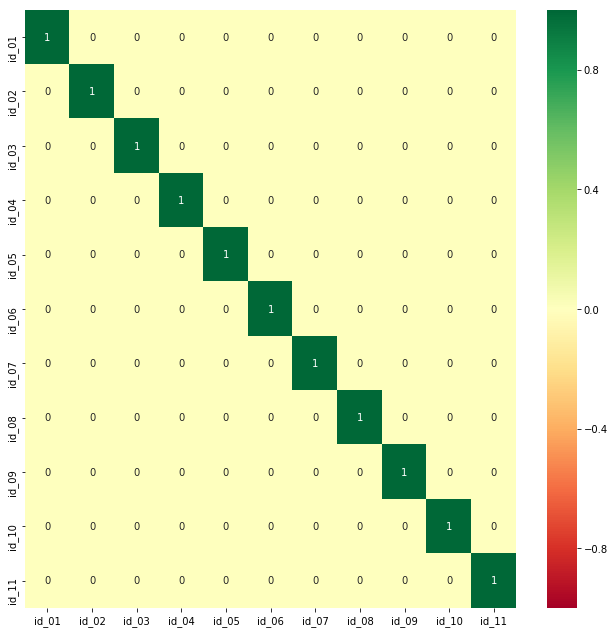

In [106]:
corrfunc(train_id,['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08','id_09', 'id_10', 'id_11'])

In [107]:
quantiles

isFraud  TransactionDT  TransactionAmt     card1   card2   card3  \
0.010    0.000     185058.820           9.244  1338.000 100.000 144.000   
0.200    0.000    2310159.600          35.950  4908.000 194.000 150.000   
0.250    0.000    3027057.750          43.321  6019.000 214.000 150.000   
0.500    0.000    7306527.500          68.769  9678.000 361.000 150.000   
0.700    0.000   10437998.100         117.000 12932.000 490.000 150.000   
0.750    0.000   11246620.000         125.000 14184.000 512.000 150.000   
0.900    0.000   13990907.700         275.293 16582.100 555.000 150.000   
0.950    0.000   14857872.150         445.000 17319.000 567.000 185.000   
0.960    0.000   15027258.200         500.000 17458.000 583.000 185.000   
0.990    1.000   15629766.040        1104.000 18238.000 583.000 185.000   

        card5   addr1  addr2    dist1    dist2      C1      C2    C3    C4  \
0.010 102.000 123.000 87.000    0.000    0.000   1.000   1.000 0.000 0.000   
0.200 166.000 204.000 87.000    2.000    7.000   1.000   1.000 0.000 0.000   
0.250 166.000 204.000 87.000    3.000    7.000   1.000   1.000 0.000 0.000   
0.500 226.000 299.000 87.000    8.000   37.000   1.000   1.000 0.000 0.000   
0.700 226.000 325.000 87.000   18.000  162.000   2.000   2.000 0.000 0.000   
0.750 226.000 330.000 87.000   24.000  206.000   3.000   3.000 0.000 0.000   
0.900 226.000 441.000 87.000  268.000  634.400   7.000   7.000 0.000 1.000   
0.950 226.000 485.000 87.000  846.000 1001.000  22.000  27.000 0.000 1.000   
0.960 226.000 485.000 87.000  991.000 1336.000  79.000  77.000 0.000 2.000   
0.990 226.000 512.000 87.000 2040.000 2367.480 164.000 154.000 0.000 6.000   

           C5      C6    C7     C8     C9    C10     C11   C12     C13  \
0.010   0.000   0.000 0.000  0.000  0.000  0.000   1.000 0.000   0.000   
0.200   0.000   1.000 0.000  0.000  0.000  0.000   1.000 0.000   1.000   
0.250   0.000   1.000 0.000  0.000  0.000  0.000   1.000 0.000   1.000   
0.500   0.000   1.000 0.000  0.000  1.000  0.000   1.000 0.000   3.000   
0.700   1.000   2.000 0.000  0.000  2.000  0.000   2.000 0.000   9.000   
0.750   1.000   2.000 0.000  0.000  2.000  0.000   2.000 0.000  12.000   
0.900   3.000   5.000 1.000  1.000  4.000  1.000   4.000 1.000  37.000   
0.950   9.000  15.000 1.000  2.000  9.000  2.000  14.000 1.000 102.000   
0.960  24.000  55.000 1.000  2.000 19.000  2.000  55.000 2.000 277.000   
0.990 149.000 118.000 4.000 11.000 95.000 15.000 122.000 5.000 578.000   

          C14      D1      D2      D3      D4      D5      D6      D7      D8  \
0.010   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
0.200   1.000   0.000  16.000   0.000   0.000   0.000   0.000   0.000   0.875   
0.250   1.000   0.000  26.000   1.000   0.000   1.000   0.000   0.000   0.958   
0.500   1.000   3.000  97.000   8.000  26.000  10.000   0.000   0.000  37.875   
0.700   2.000  81.000 226.000  21.000 182.000  27.000  10.000   9.000 145.667   
0.750   2.000 122.000 276.000  27.000 253.000  32.000  40.000  17.000 187.958   
0.900   5.000 364.000 476.000  65.000 482.000 117.000 309.000 154.000 442.708   
0.950  14.000 489.000 540.000 129.000 544.000 246.000 405.000 321.000 738.656   
0.960  53.000 512.000 556.000 157.000 559.000 287.000 430.000 356.000 799.833   
0.990 128.000 602.000 617.000 356.000 623.000 455.000 593.000 429.000 983.927   

         D9     D10     D11     D12     D13     D14     D15    V1    V2    V3  \
0.010 0.000   0.000   0.000   0.000   0.000   0.000   0.000 1.000 1.000 1.000   
0.200 0.125   0.000   0.000   0.000   0.000   0.000   0.000 1.000 1.000 1.000   
0.250 0.208   0.000   0.000   0.000   0.000   0.000   0.000 1.000 1.000 1.000   
0.500 0.667  15.000  43.000   0.000   0.000   0.000  52.000 1.000 1.000 1.000   
0.700 0.792 135.000 212.000   3.000   0.000   0.000 244.000 1.000 1.000 1.000   
0.750 0.833 197.000 274.000  13.000   0.000   2.000 314.000 1.000 1.000 1.000   
0.900 0.917 461.000 462.000 258.000  27.000 262.

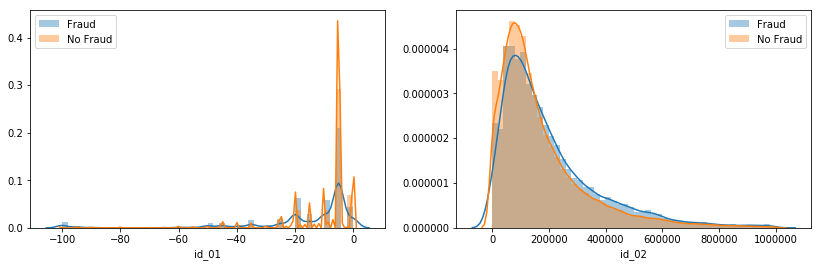

In [108]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plot1 = sns.distplot(train_trans[train_trans['isFraud'] == 1]['id_01'].dropna(), label = 'Fraud')
plot1 = sns.distplot(train_trans[train_trans['isFraud'] == 0]['id_01'].dropna(), label = 'No Fraud')
plot1.legend()
plt.subplot(122)
plot2 = sns.distplot(train_trans[train_trans['isFraud'] == 1]['id_02'].dropna(),label = 'Fraud')
plot2 = sns.distplot(train_trans[train_trans['isFraud'] == 0]['id_02'].dropna(),label = 'No Fraud')
plot2.legend()
plt.show()

### ID03

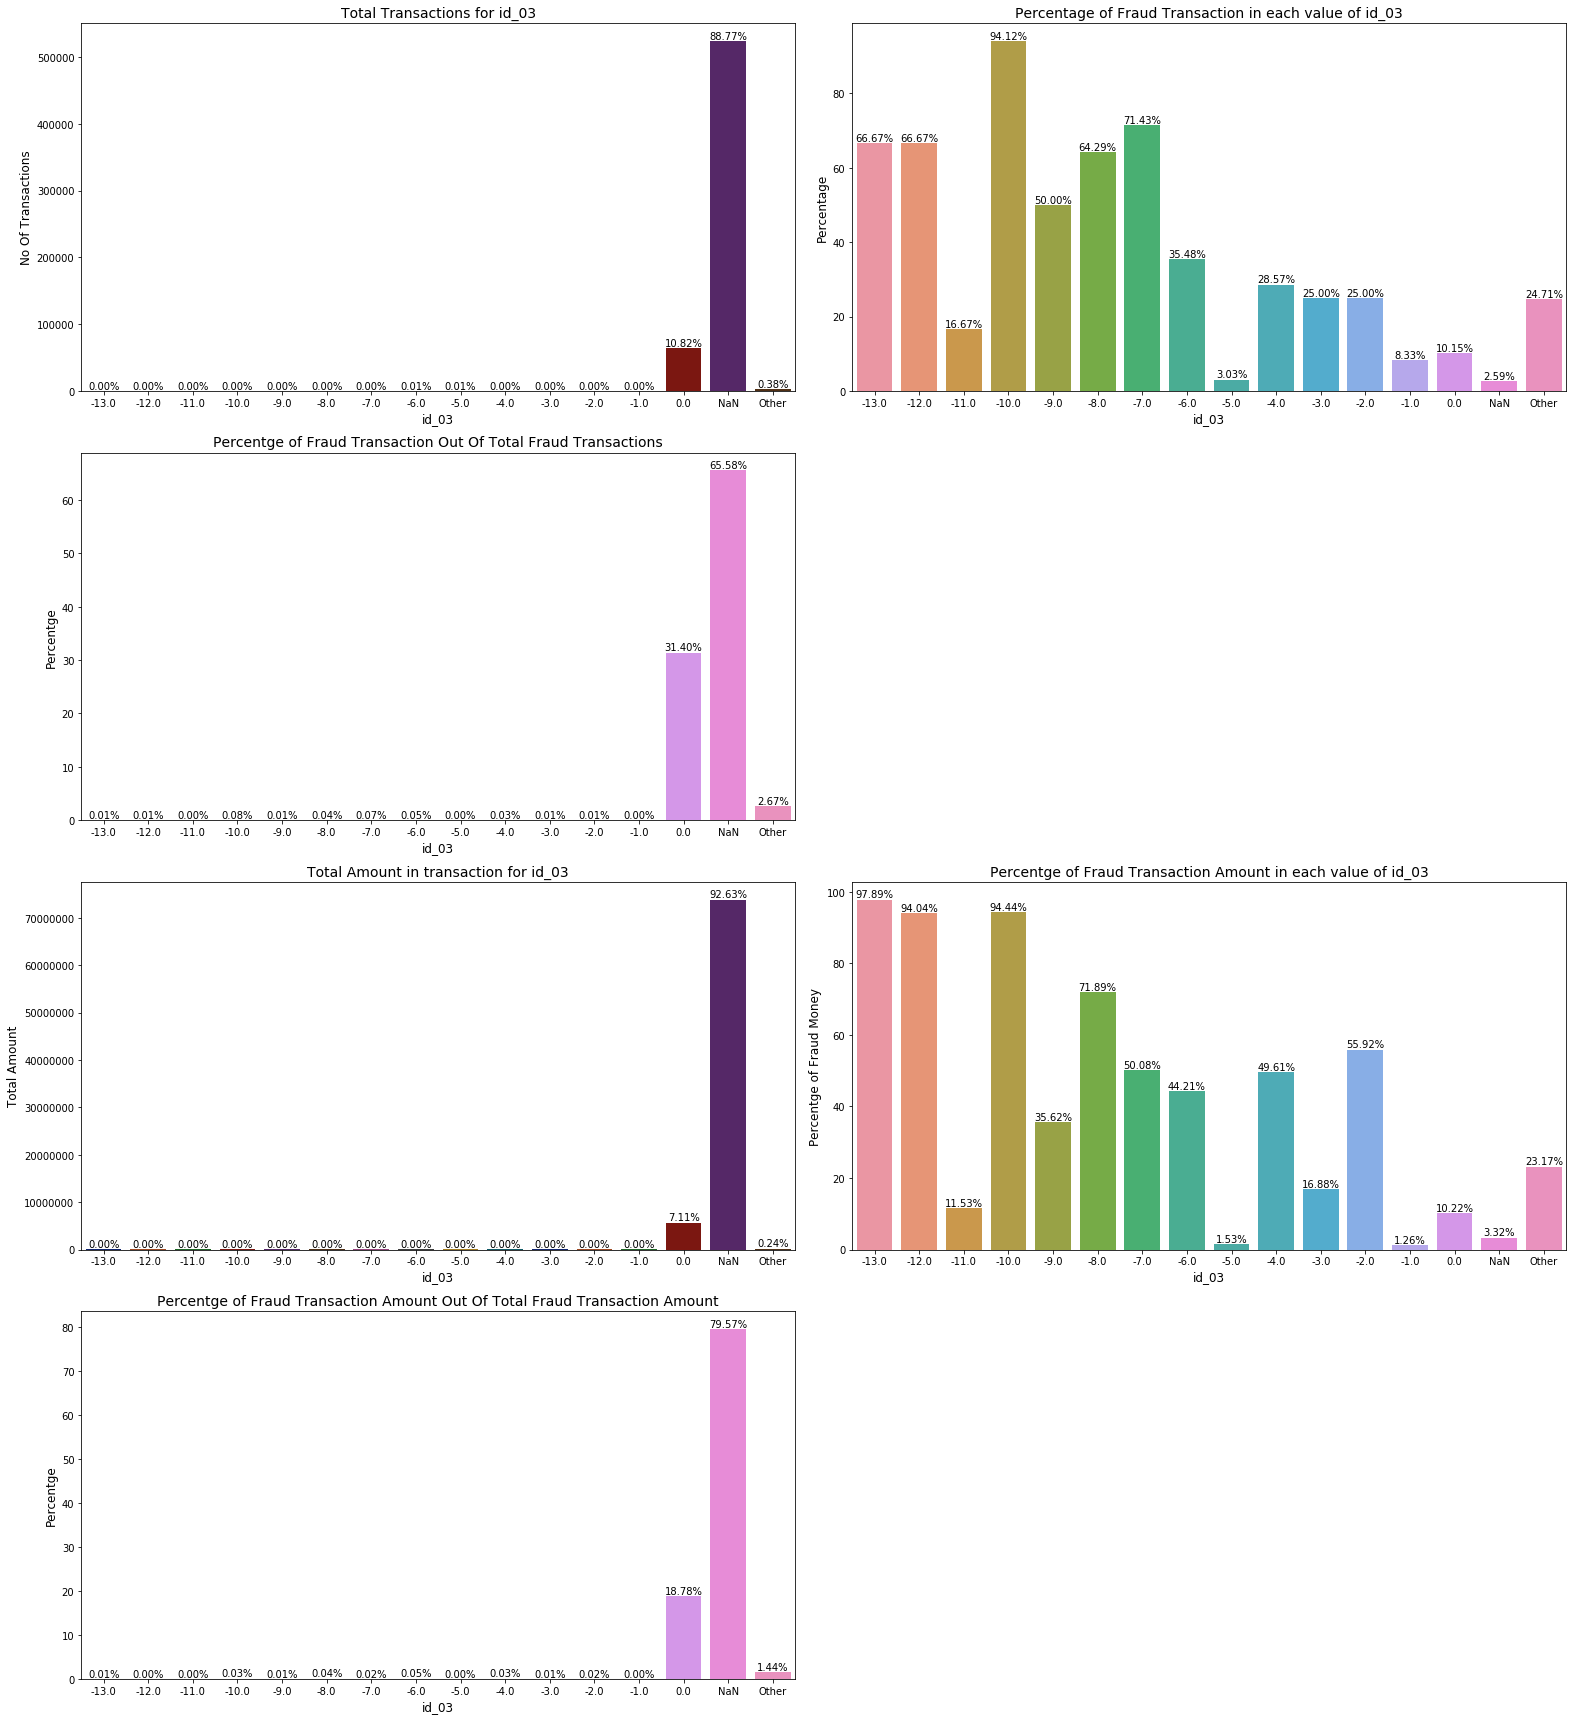

In [109]:
count_perFraud_plots(train_trans,'id_03',True, 'quantile',0.750, 14, 22, 24)

### ID04 

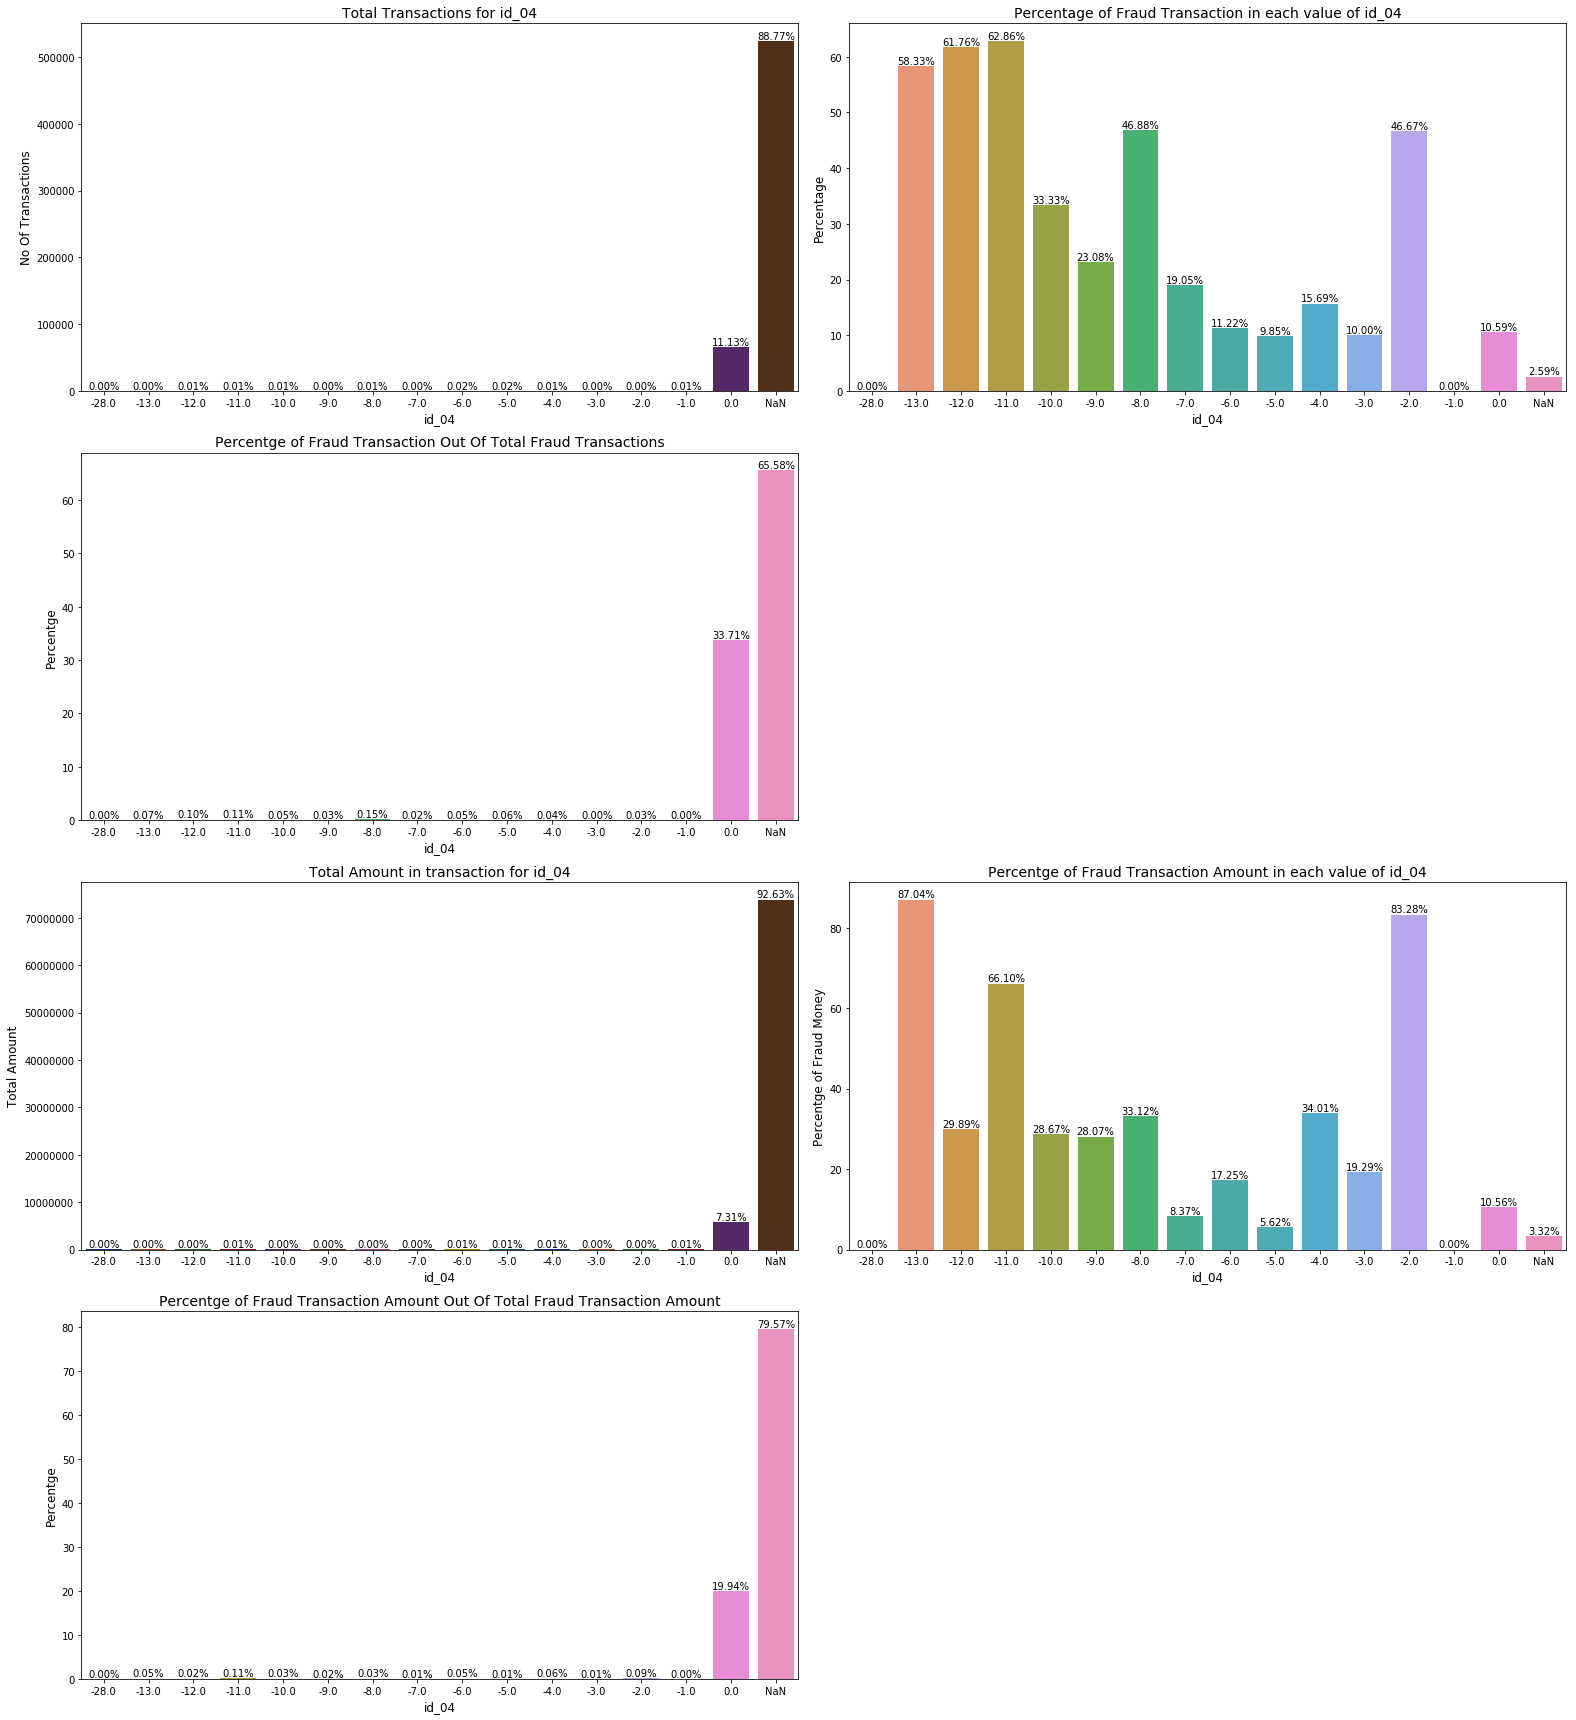

In [110]:
count_perFraud_plots(train_trans,'id_04',False,fontsize=14, figsizeW= 22, figsizeH= 24)

### ID07

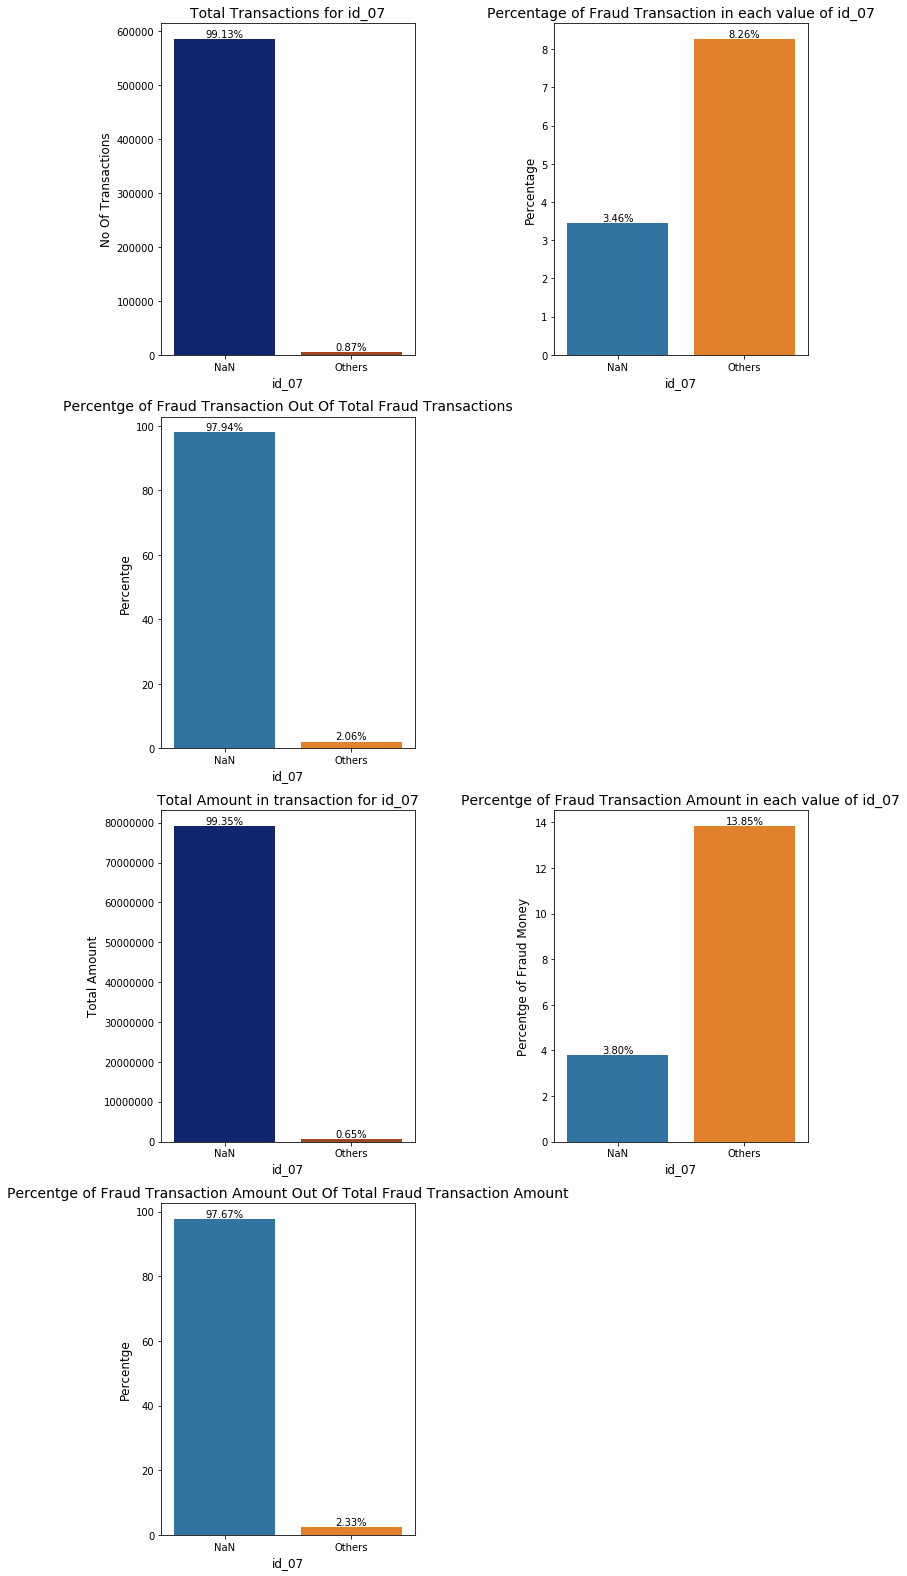

In [111]:
count_perFraud_plots(train_trans,'id_07',True,'value count', 1000,fontsize=14, figsizeW= 12, figsizeH= 22)

### ID08

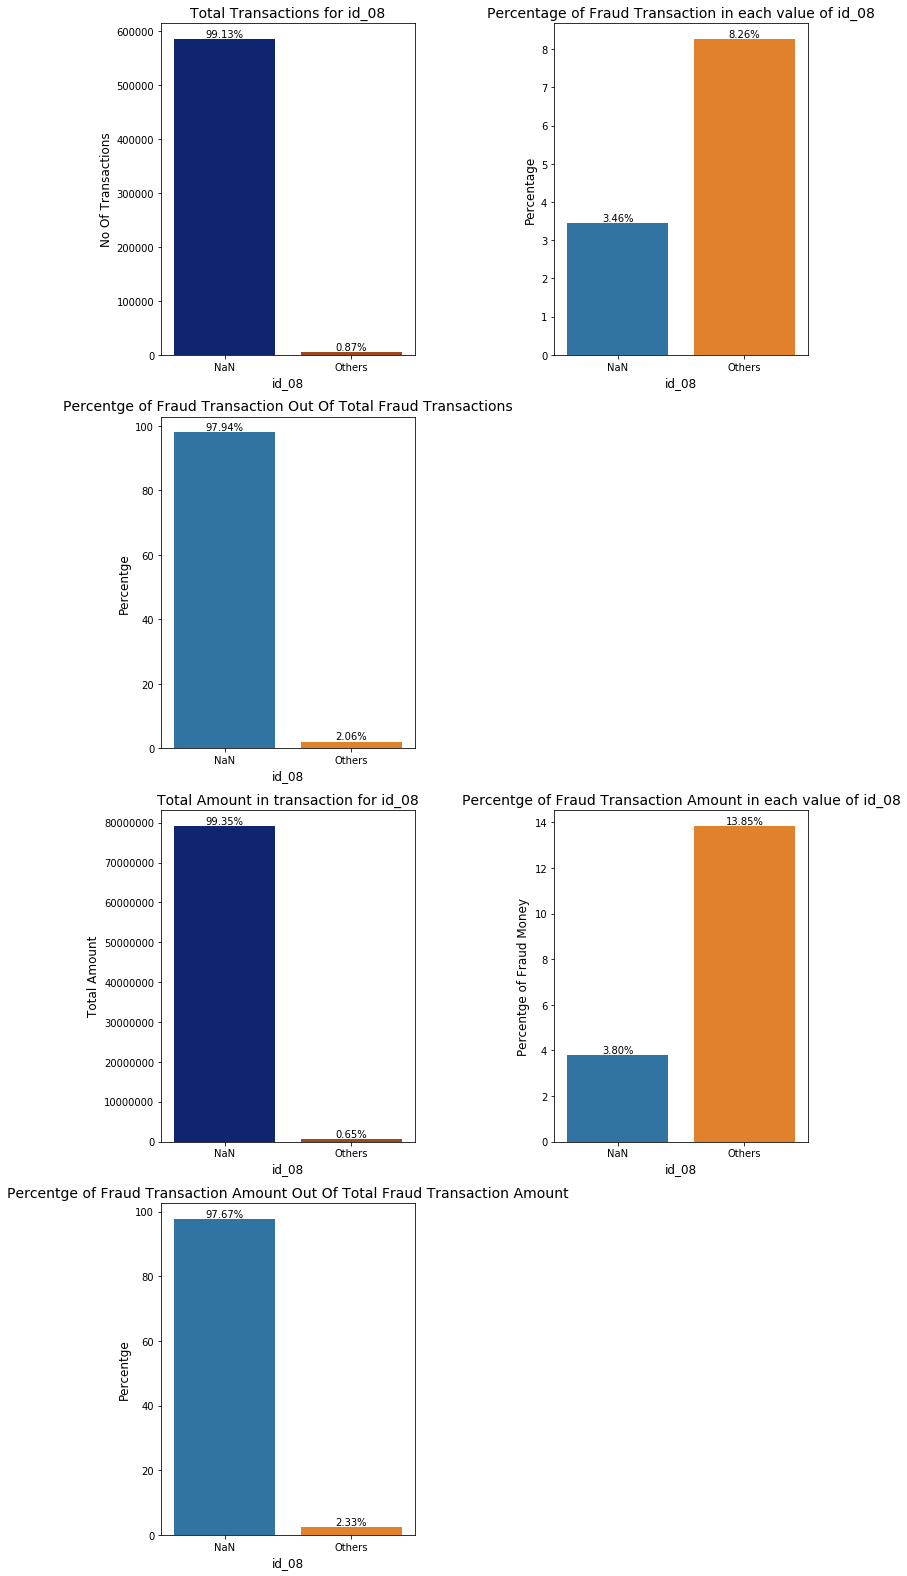

In [112]:
count_perFraud_plots(train_trans,'id_08',True,'value count', 1000,fontsize=14, figsizeW= 12, figsizeH= 22)

### ID12

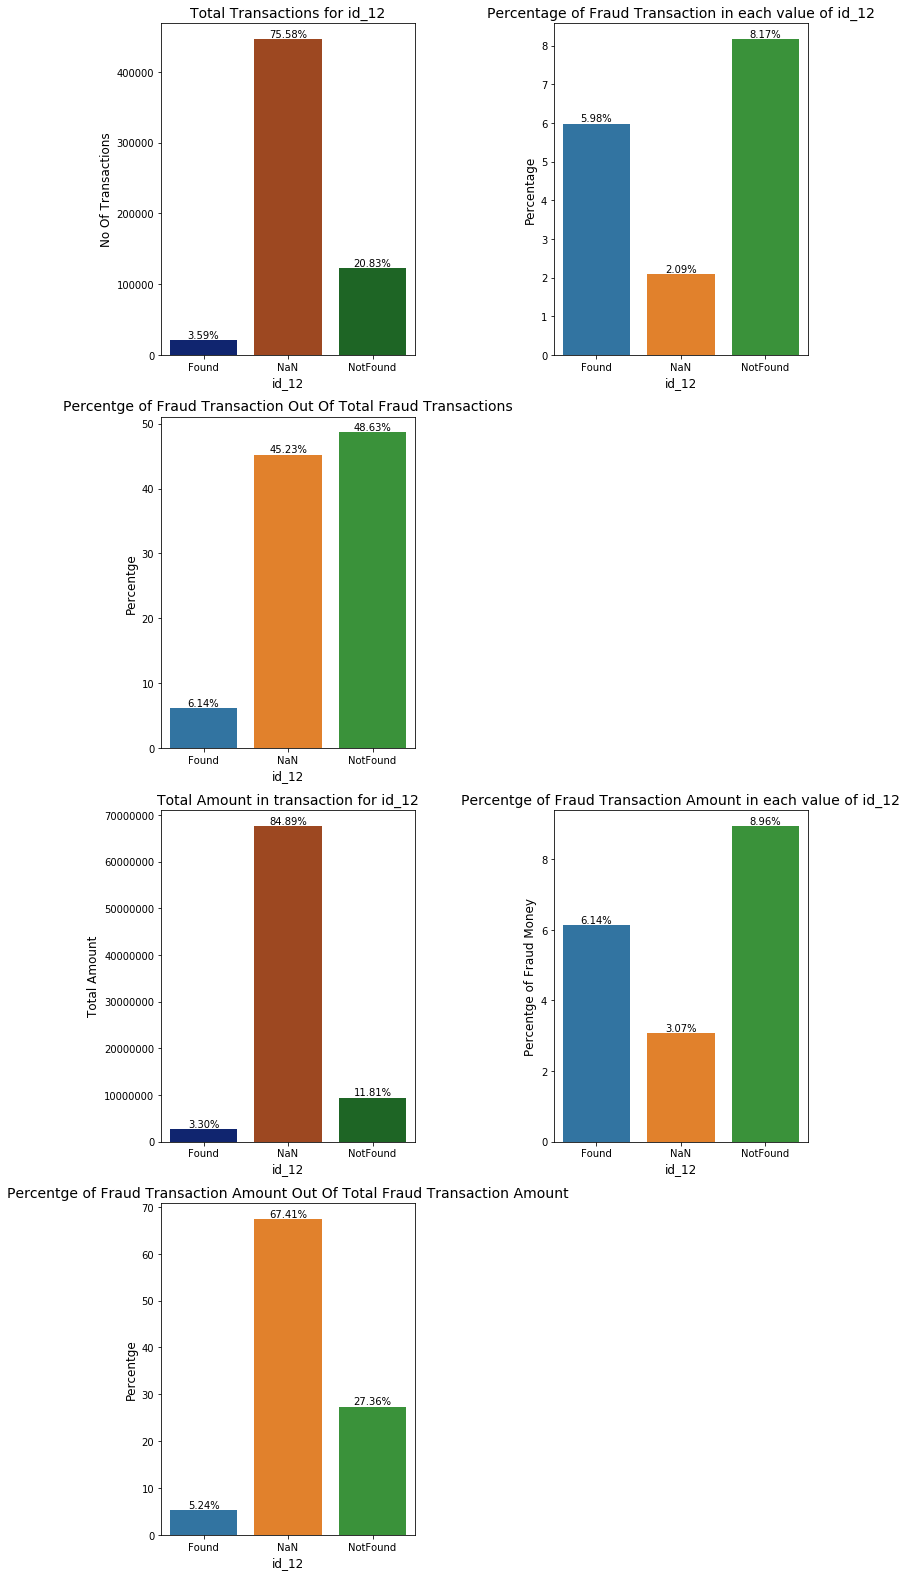

In [113]:
count_perFraud_plots(train_trans,'id_12',False,fontsize=14, figsizeW= 12, figsizeH= 22)

### ID21

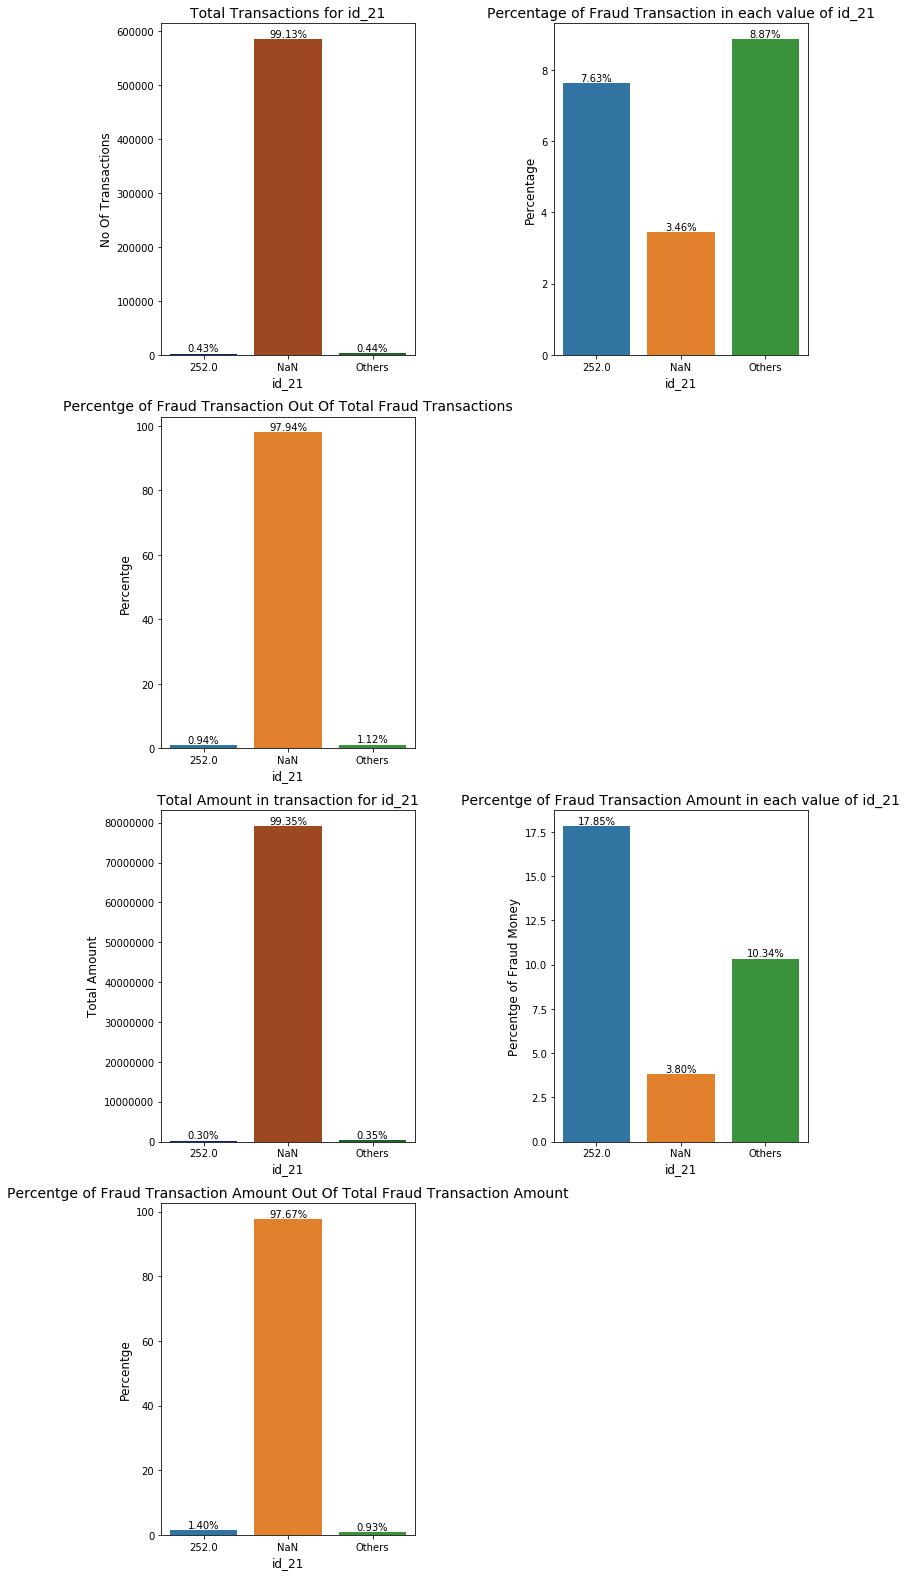

In [114]:
count_perFraud_plots(train_trans,'id_21',True,'value count', 1000,fontsize=14, figsizeW= 12, figsizeH= 22)

### ID22

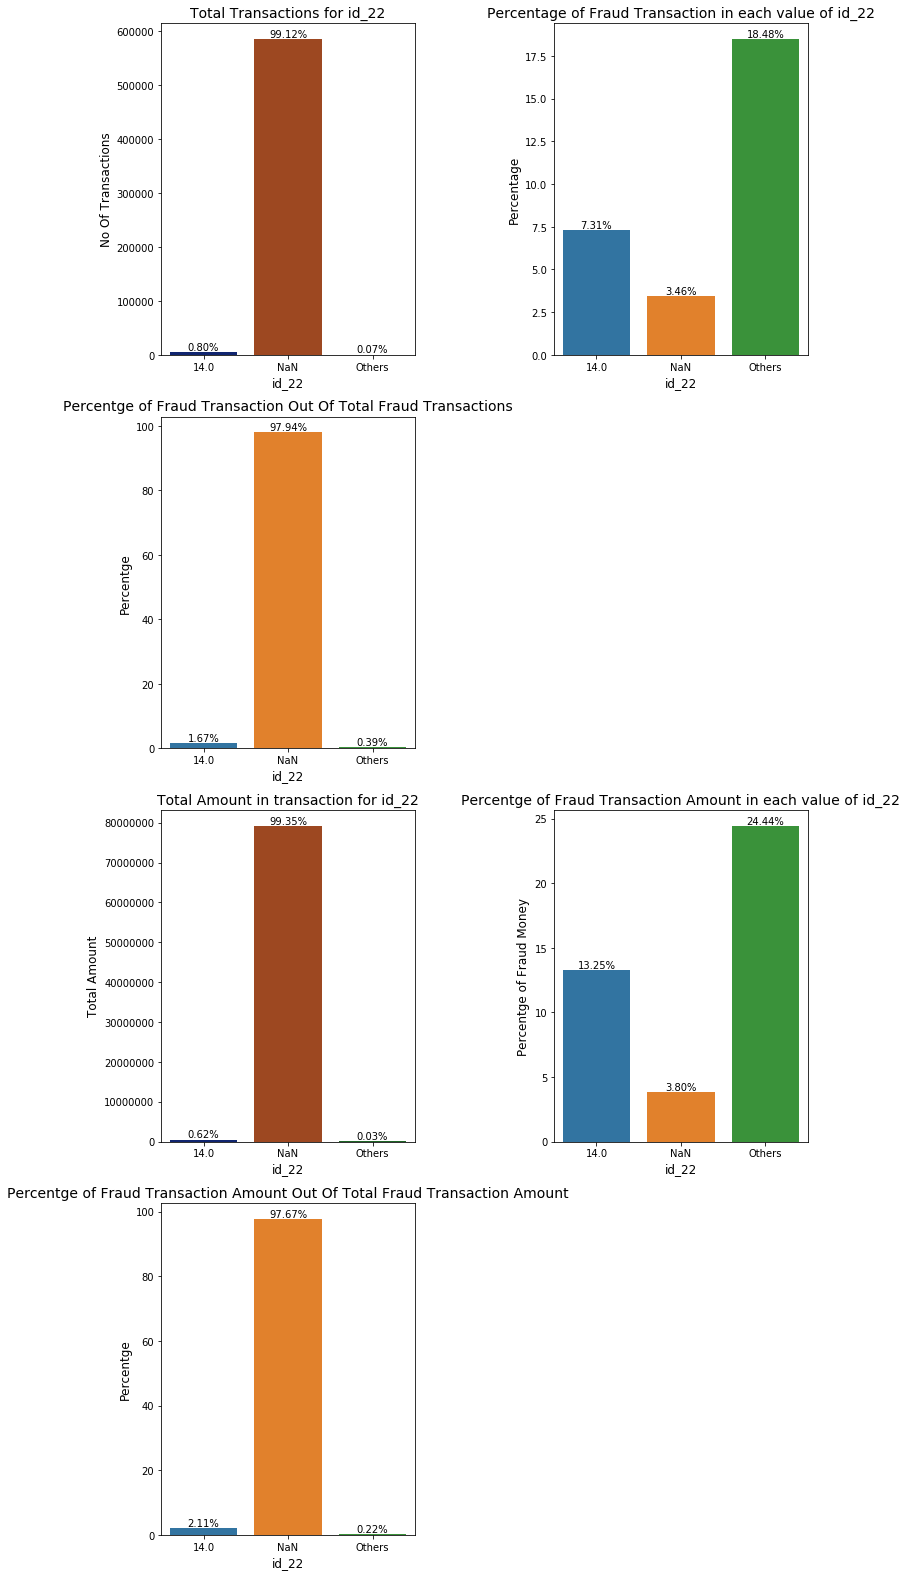

In [115]:
count_perFraud_plots(train_trans,'id_22',True,'value count', 1000,fontsize=14, figsizeW= 12, figsizeH= 22)

### ID23

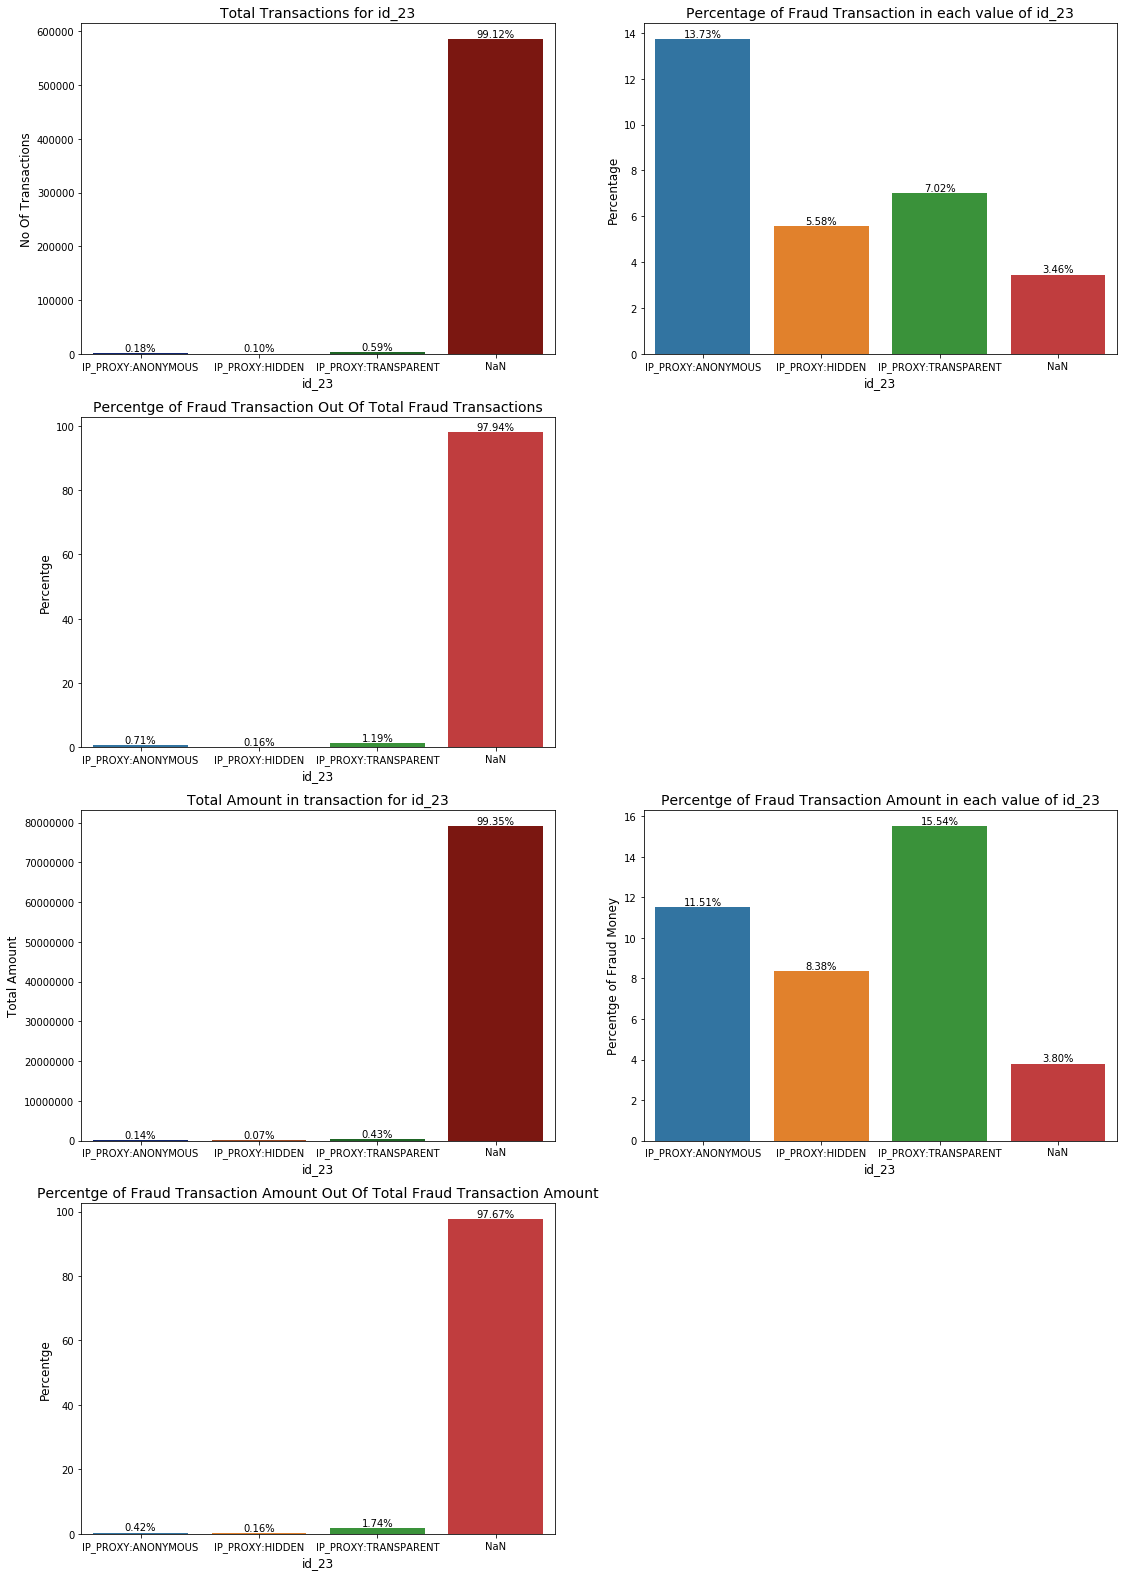

In [116]:
count_perFraud_plots(train_trans,'id_23',False,fontsize=14, figsizeW= 16, figsizeH= 22)

### ID33

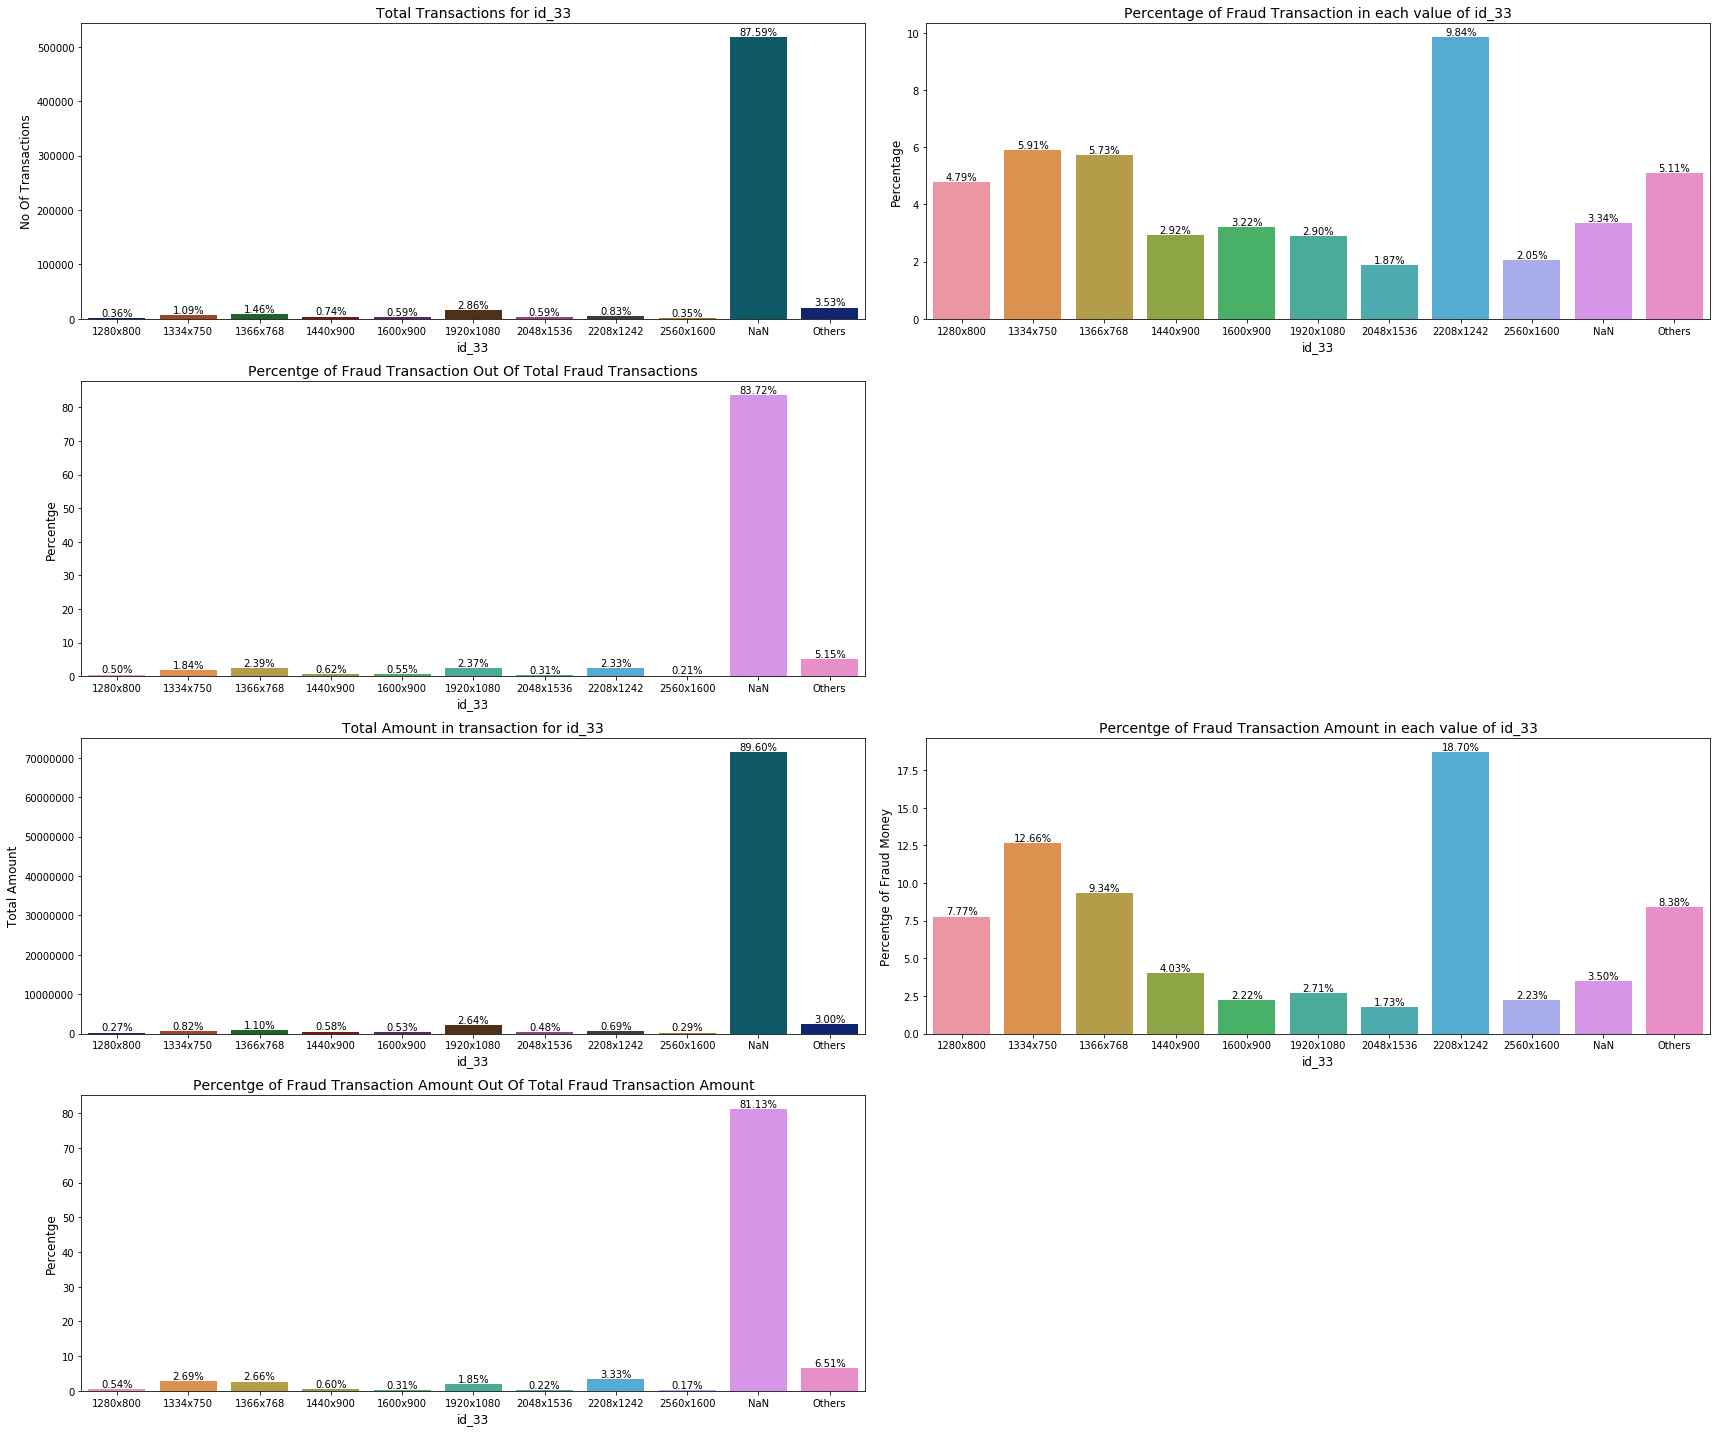

In [117]:
count_perFraud_plots(train_trans,'id_33',True,'value count', 2000,fontsize=14, figsizeW= 24, figsizeH= 20)

### ID35

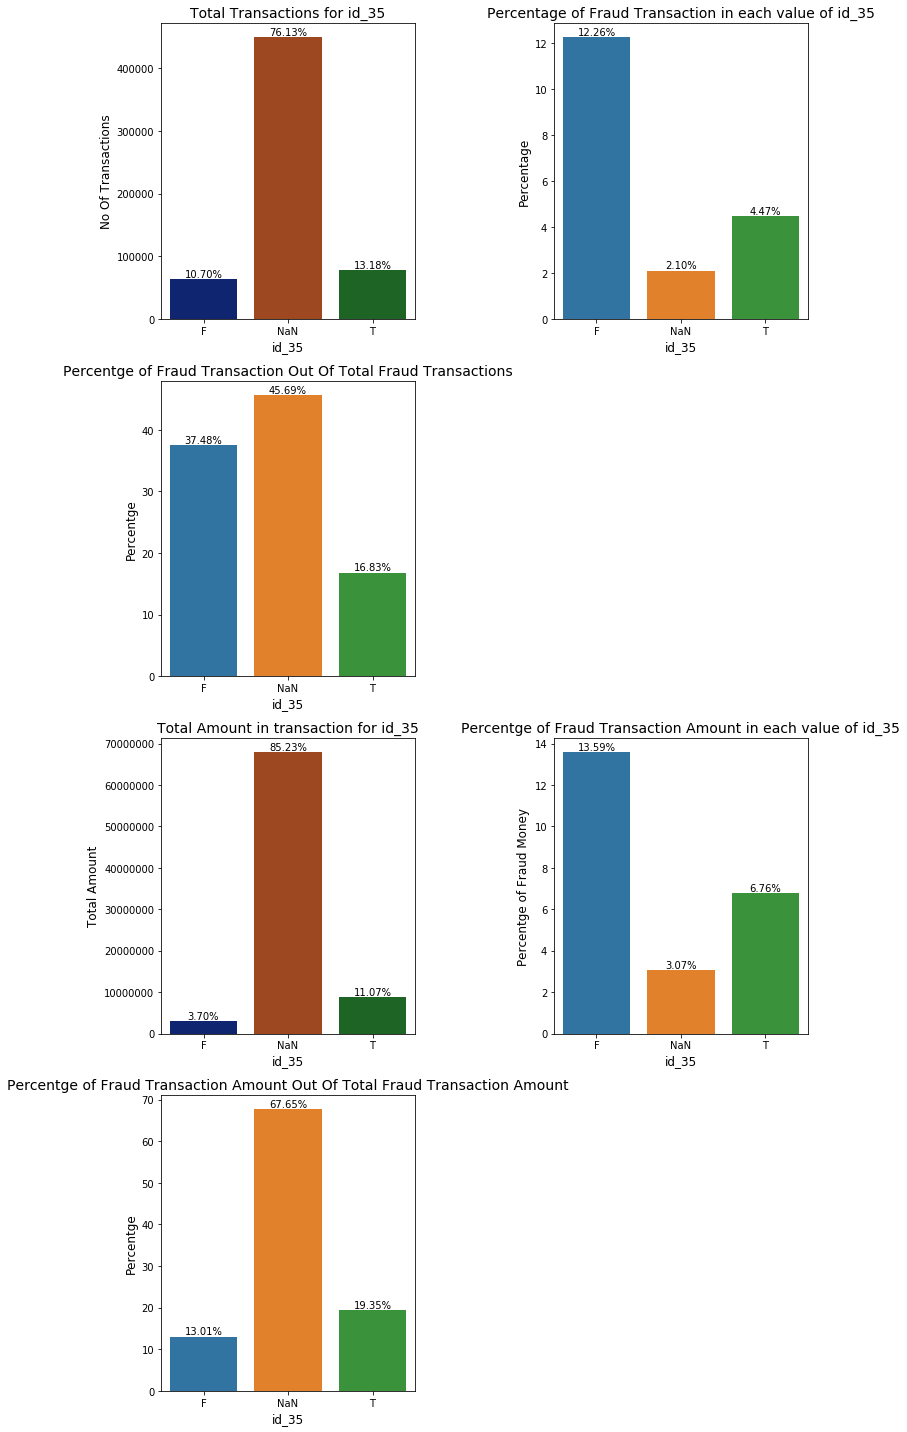

In [118]:
count_perFraud_plots(train_trans,'id_35',False,fontsize=14, figsizeW= 12, figsizeH= 20)

### ID30

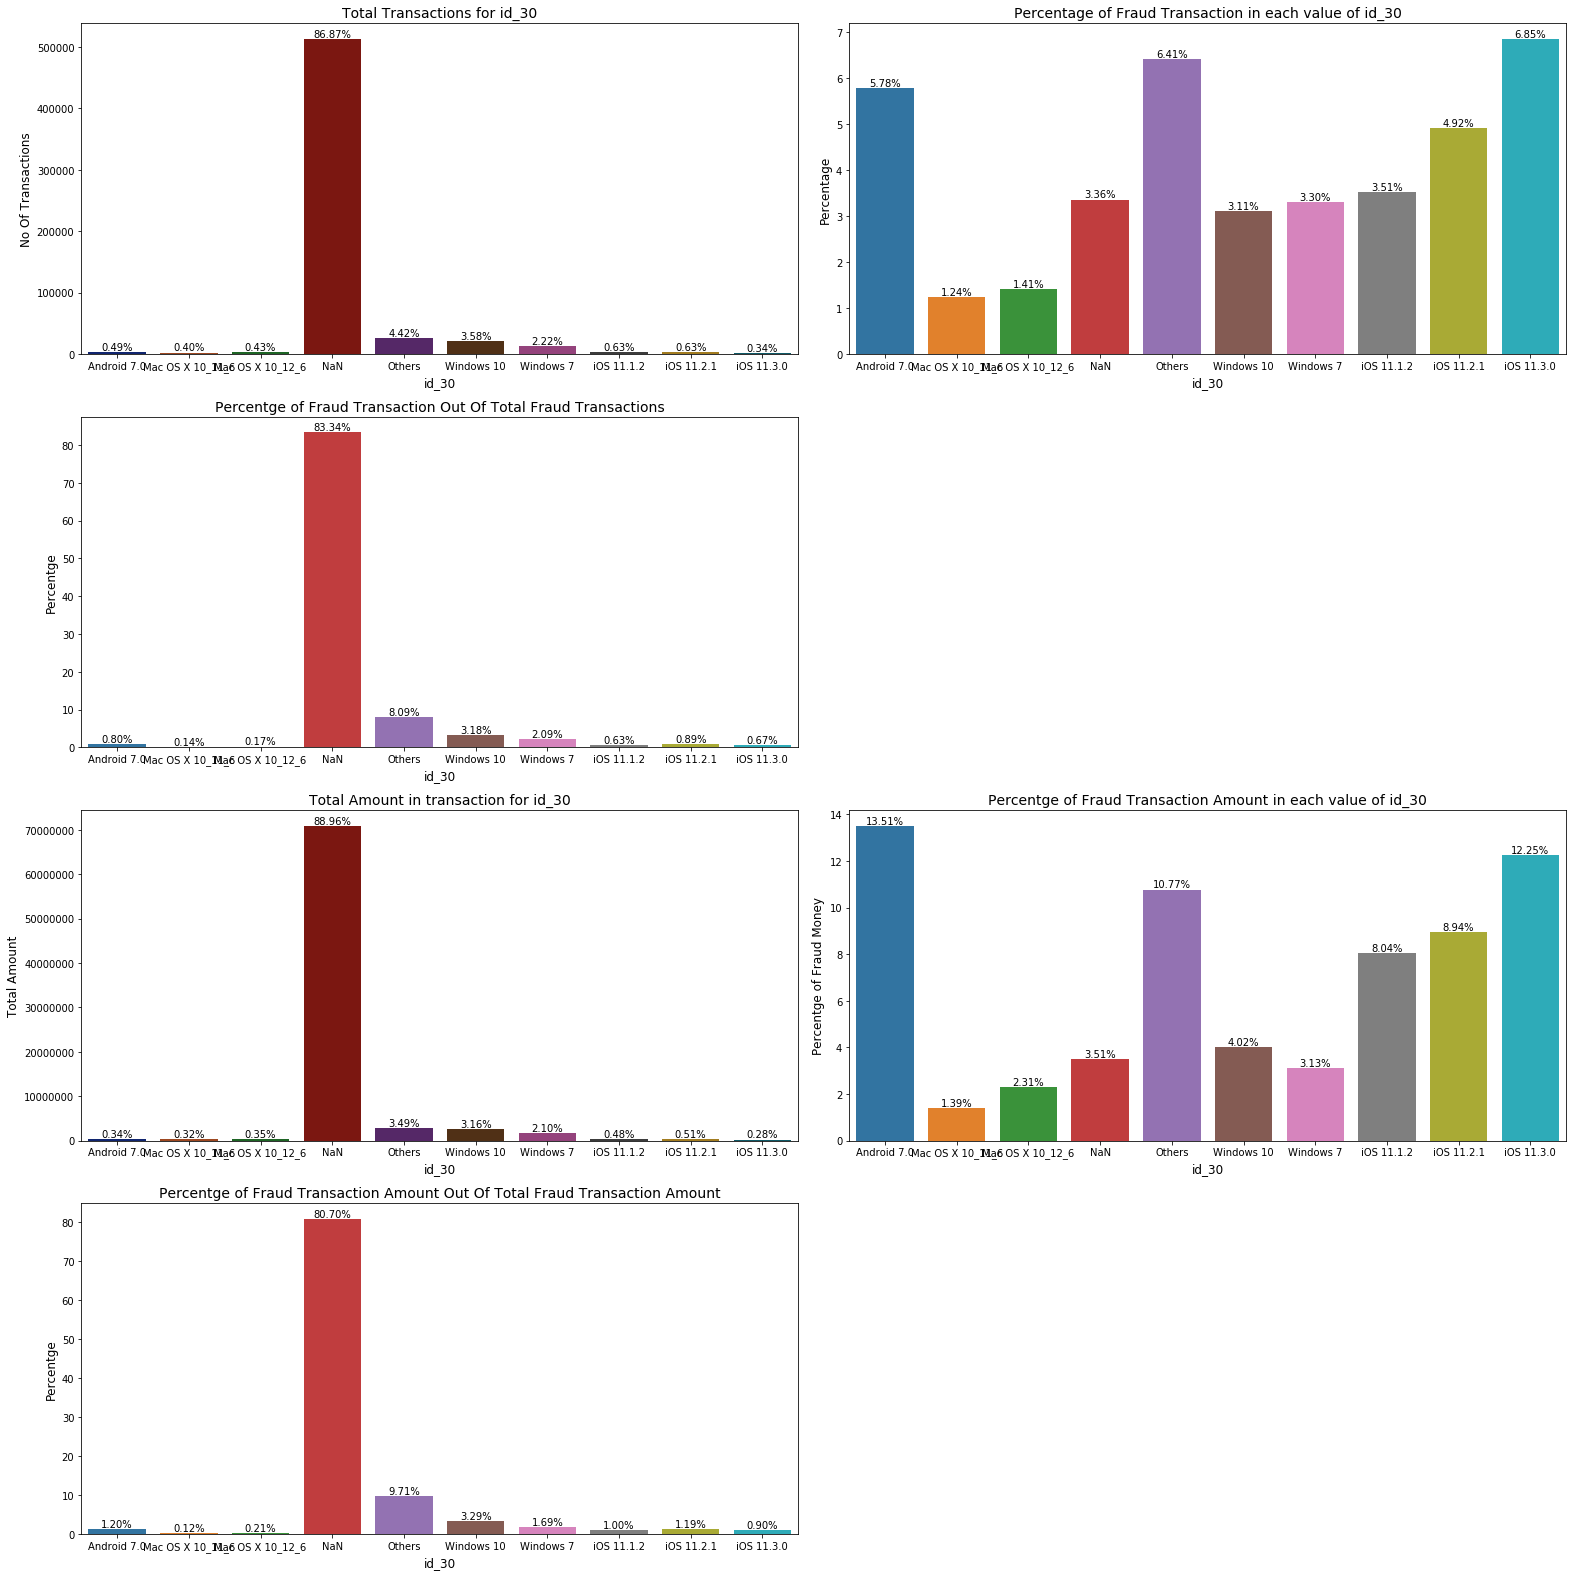

In [119]:
count_perFraud_plots(train_trans,'id_30',True,'value count', 2000,fontsize=14, figsizeW= 22, figsizeH= 22)

In [120]:
train_trans['id_30'].unique()

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [121]:
tes1 =set(train_trans['id_30'].unique())
tes2= set(test_id['id-30'].unique())
tes2-tes1

{'Android 9',
 'Mac OS X 10.14',
 'Mac OS X 10_13_6',
 'Mac OS X 10_14',
 'Mac OS X 10_14_0',
 'Mac OS X 10_14_1',
 'Mac OS X 10_14_2',
 'iOS 12.0.0',
 'iOS 12.0.1',
 'iOS 12.1.0',
 'iOS 12.1.1',
 'iOS 12.1.2'}

In [122]:
temp_id3031 = train_trans[['id_30','id_31', 'isFraud', 'TransactionAmt']].copy()

In [123]:
temp_id3031['id_30'].value_counts()

Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
                    ...  
func                   10
iOS 11.4.0              5
Mac OS X 10_13_5        4
Windows                 3
iOS 11.4.1              1
Name: id_30, Length: 75, dtype: int64

In [124]:
temp_id3031['id_30'] = temp_id3031['id_30'].apply(mappingOSandBrowser, mappingList = OSmapping)

In [125]:
temp_id3031['id_30'].value_counts()

Windows    36739
iOS        19782
Mac        13580
Android     6303
Linux       1136
other         15
func          10
Name: id_30, dtype: int64

### ID30

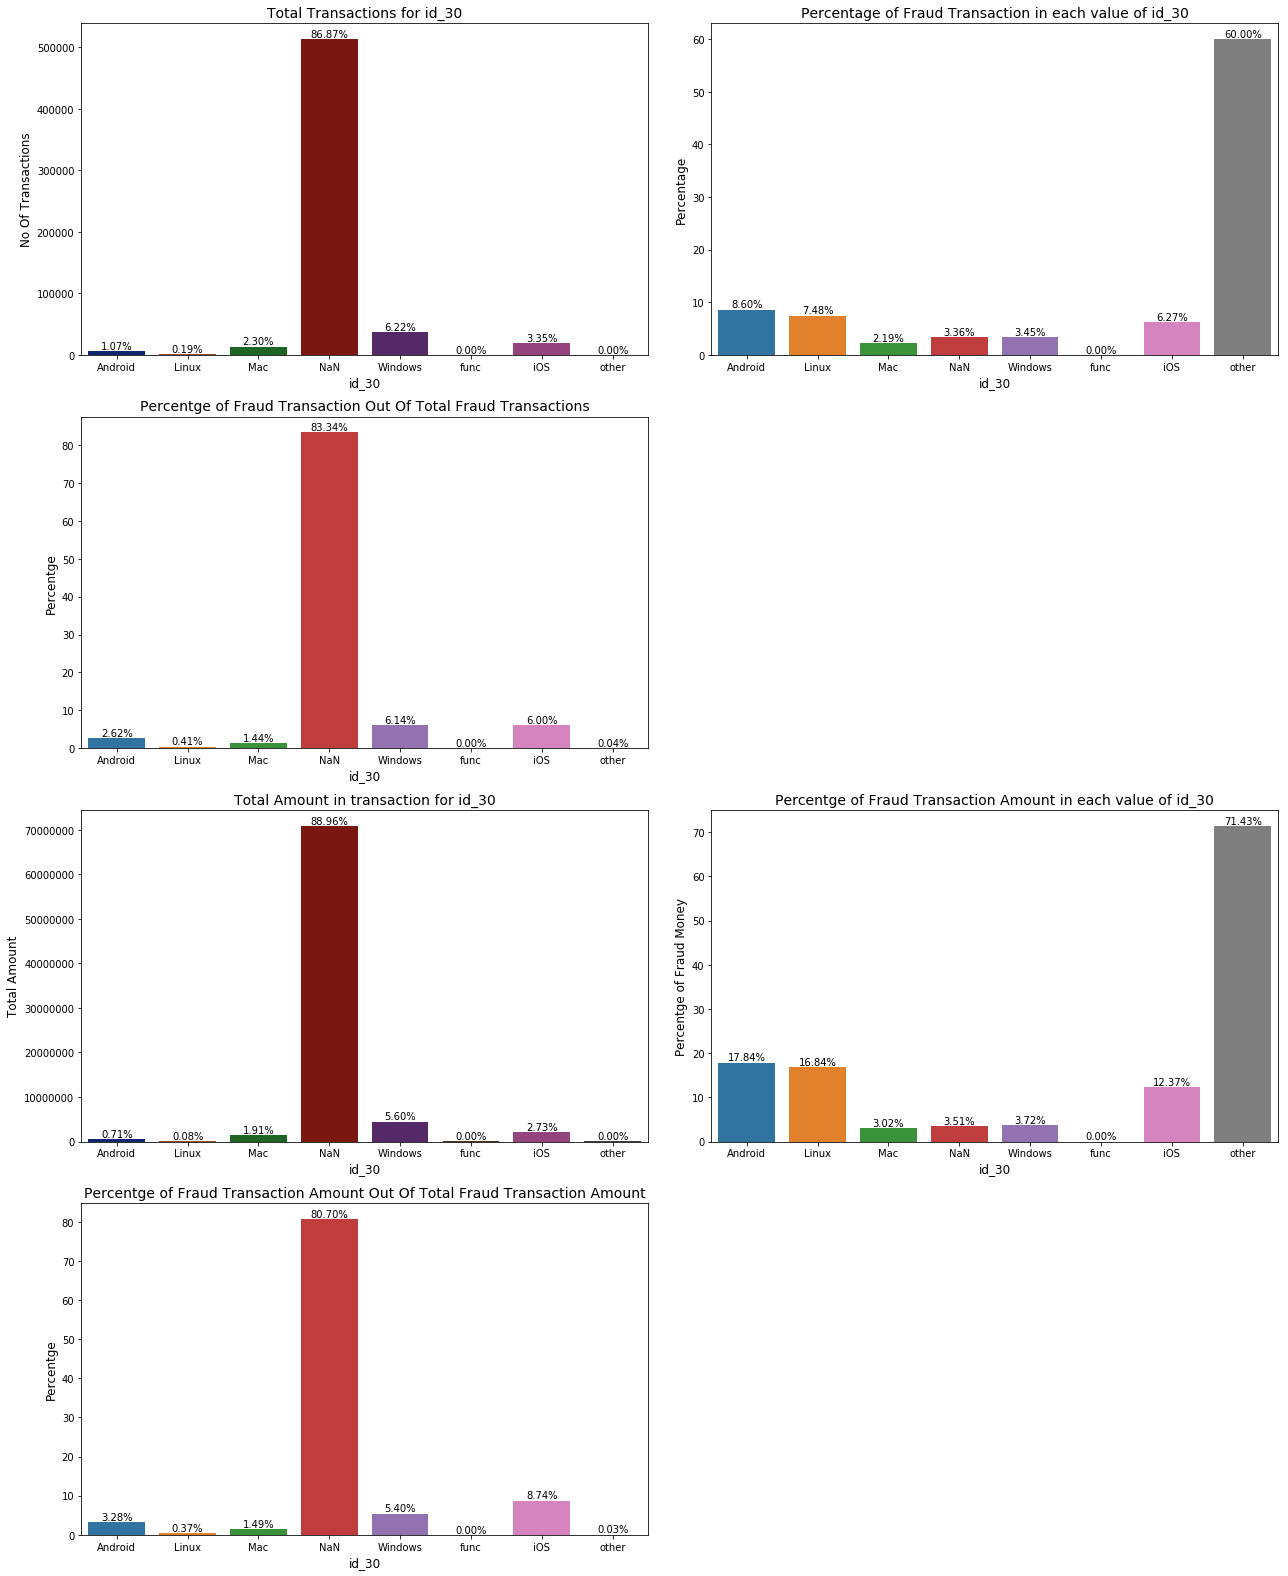

In [126]:
count_perFraud_plots(temp_id3031,'id_30',False, fontsize=14, figsizeW= 18, figsizeH= 22)

In [127]:
temp_id3031['id_31'].value_counts()

chrome 63.0              22000
mobile safari 11.0       13423
mobile safari generic    11474
ie 11.0 for desktop       9030
safari generic            8195
                         ...  
LG/K-200                     1
Inco/Minion                  1
Nokia/Lumia                  1
iron                         1
cyberfox                     1
Name: id_31, Length: 130, dtype: int64

In [128]:
temp_id3031['id_31'] = temp_id3031['id_31'].apply(mappingOSandBrowser, mappingList = browsermapping)

In [129]:
temp_id3031['id_31'].value_counts()

Chrome PC         54634
Safari Mobile     28368
Chrome Android    20859
IE PC              9111
Safari             8913
Firefox            7016
Edge               6401
Samsung            2247
IE TABLET           647
Chrome IOS          567
Android             524
Opera               449
other               312
Google              146
silk                 19
mobile               11
ZTE/Blade             9
comodo                6
line                  6
maxthon               6
aol                   5
icedragon             5
Lanix/Ilium           3
palemoon              2
waterfox              2
facebook              2
puffin                2
Cherry                1
M4Tel/M4              1
seamonkey             1
BLU/Dash              1
Firefox Mobile        1
Inco/Minion           1
iron                  1
Nokia/Lumia           1
LG/K-200              1
cyberfox              1
Name: id_31, dtype: int64

### ID31

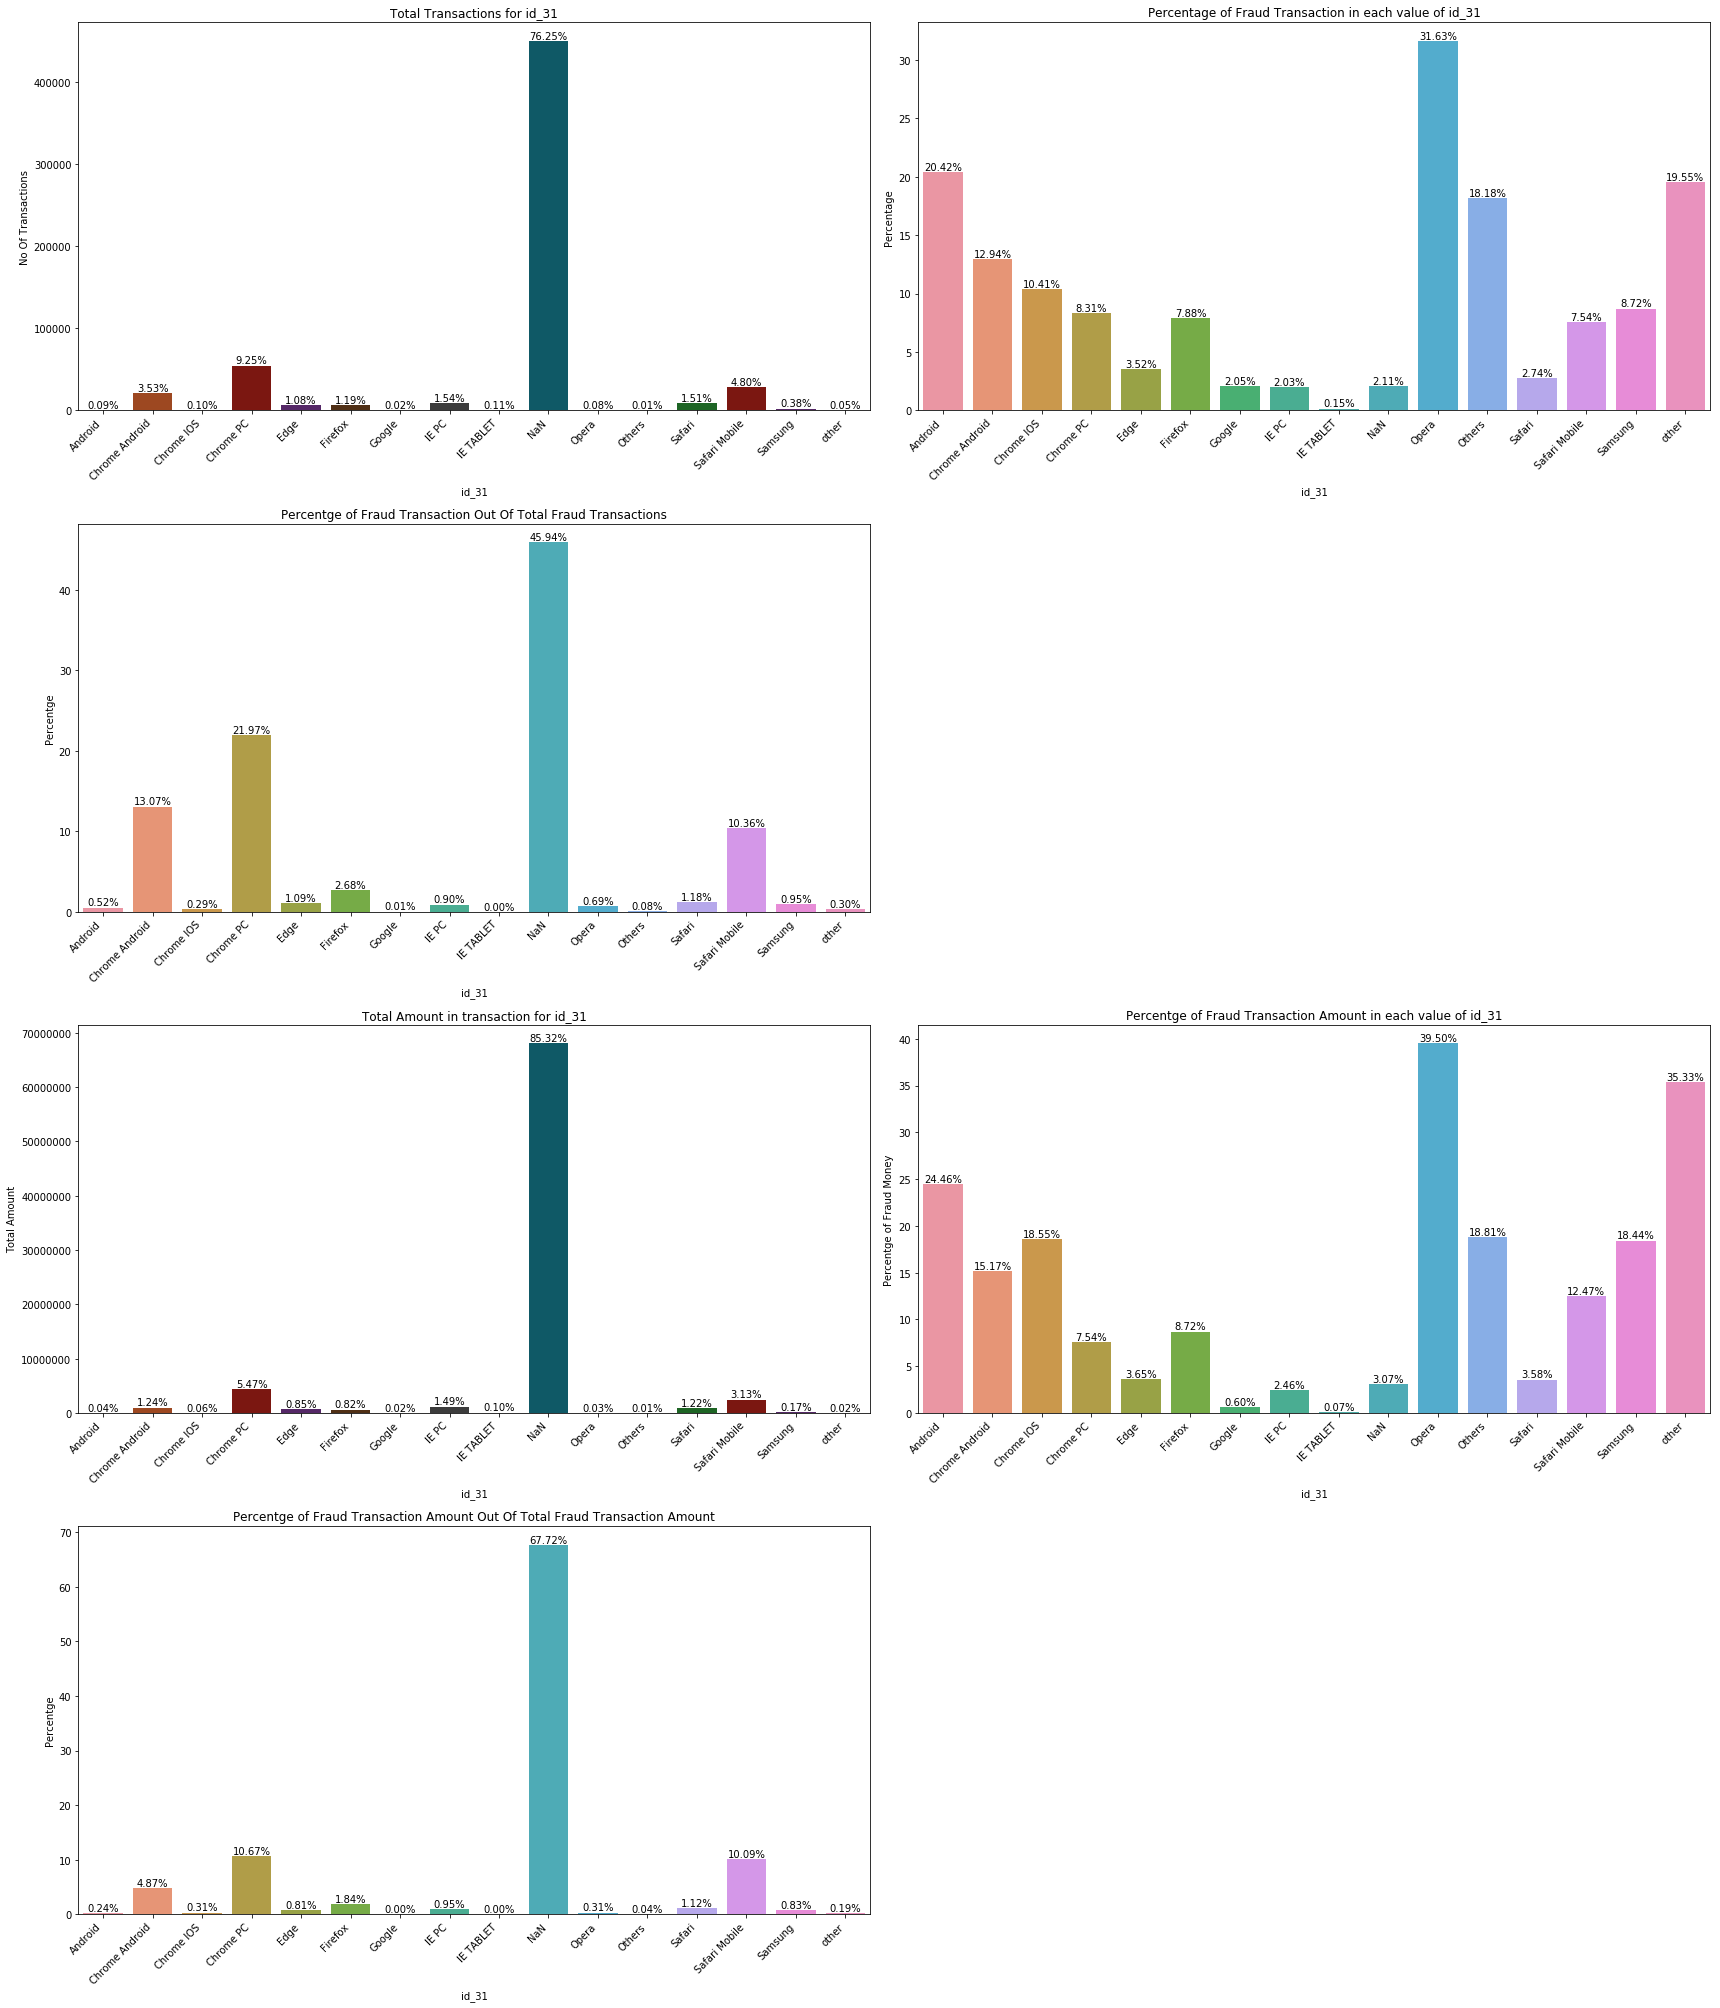

In [130]:
count_perFraud_plots(temp_id3031,'id_31',True,'value count', 100,fontsize=12, figsizeW= 24, figsizeH= 28, rotation=45)

### ID35

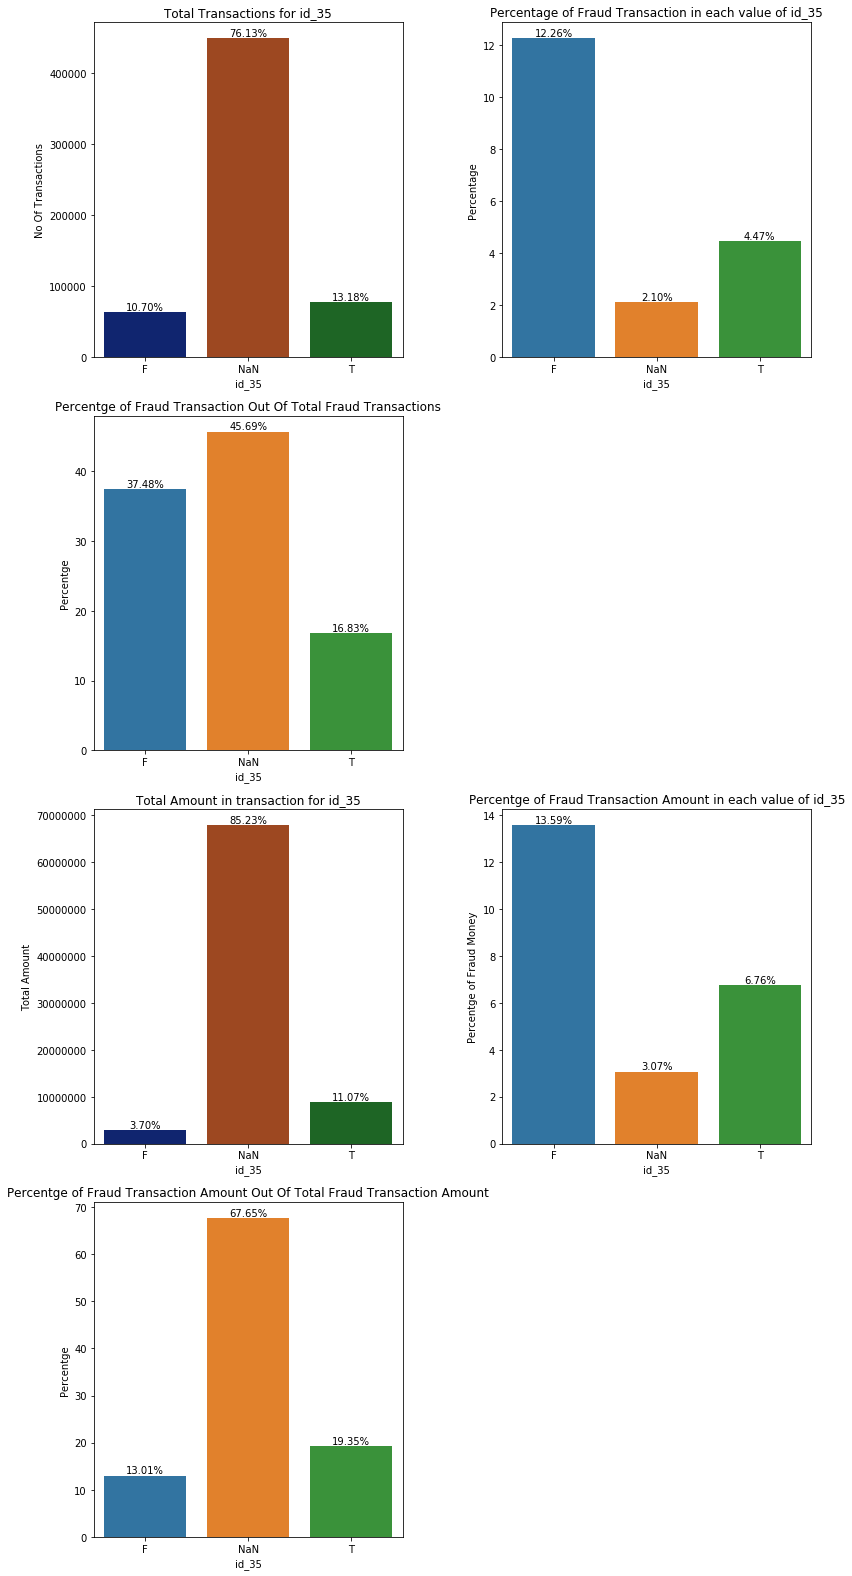

In [131]:
count_perFraud_plots(train_trans,'id_35',False, fontsize=12, figsizeW= 12, figsizeH= 22)

### DeviceType

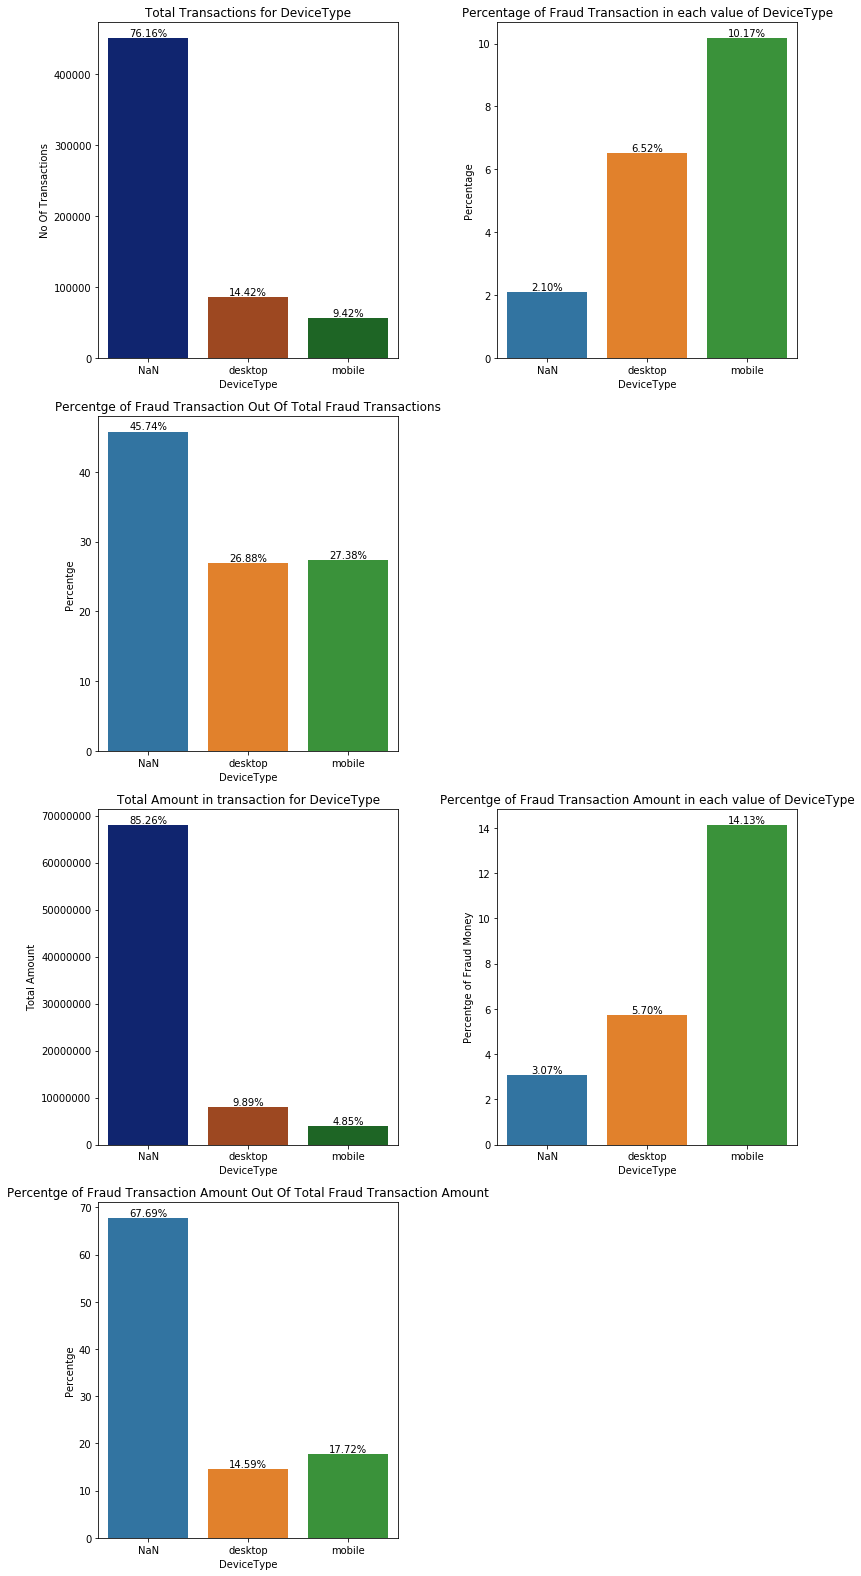

In [132]:
count_perFraud_plots(train_trans,'DeviceType',False, fontsize=12, figsizeW= 12, figsizeH= 22)

In [133]:
train_trans['DeviceInfo'].value_counts()[train_trans['DeviceInfo'].value_counts()<1000]

rv:57.0                  962
SM-J700M Build/MMB29K    549
SM-G610M Build/MMB29K    461
SM-G531H Build/LMY48B    410
rv:59.0                  362
                        ... 
SAMSUNG-SM-G925A           1
ASUS_Z01BDA                1
IO                         1
LG-LS995                   1
BBA100-1                   1
Name: DeviceInfo, Length: 1781, dtype: int64

### DeviceInfo

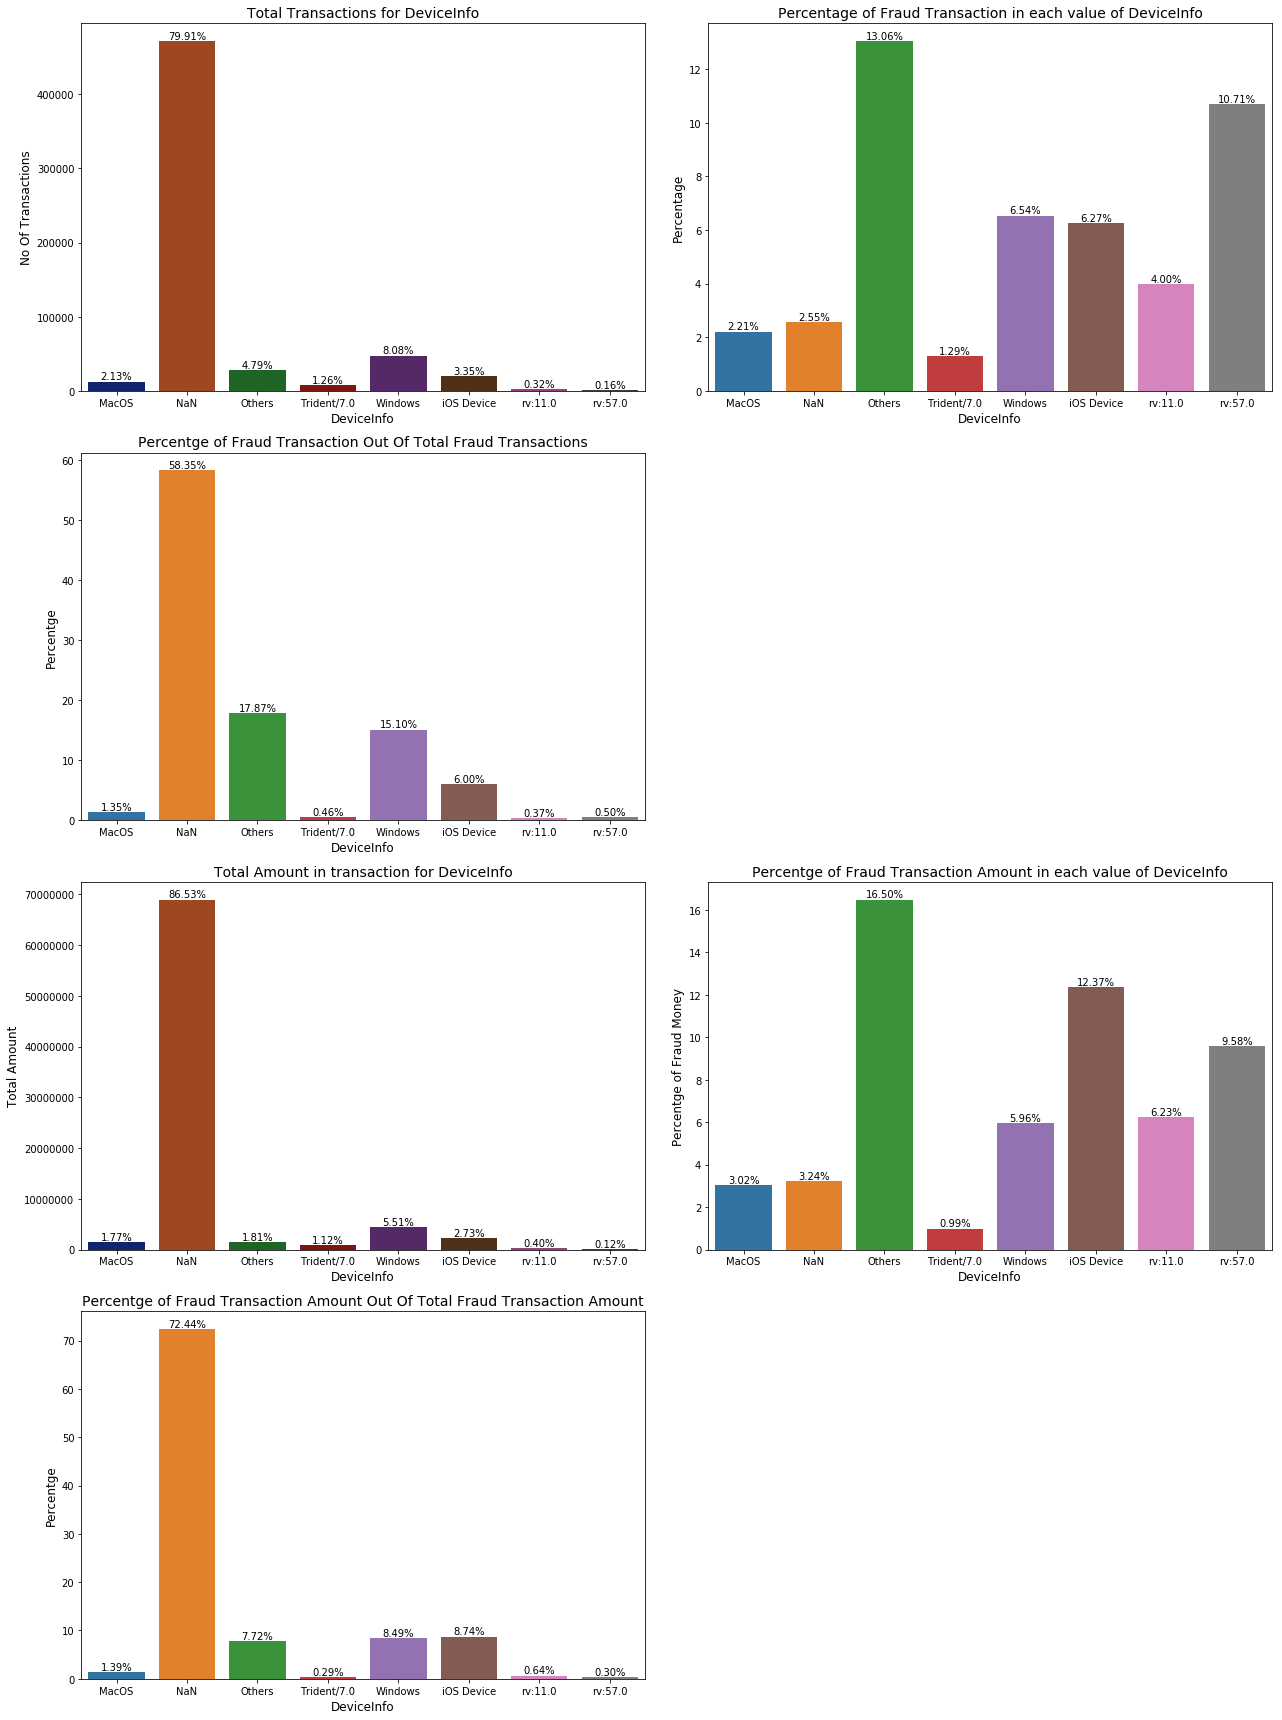

In [134]:
count_perFraud_plots(train_trans,'DeviceInfo',True,'value count', 900,fontsize=14, figsizeW= 18, figsizeH= 24)

In [135]:
train_trans.columns[54:393]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=339)

# Feature Engineering

In [136]:
test_data = test_trans.merge(test_id, how='left', left_index=True, right_index=True)
train_data = train_trans.copy()

In [137]:
test_data.head()

TransactionDT  TransactionAmt ProductCD  card1   card2   card3  \
TransactionID                                                                   
3663549             18403224          31.950         W  10409 111.000 150.000   
3663550             18403263          49.000         W   4272 111.000 150.000   
3663551             18403310         171.000         W   4476 574.000 150.000   
3663552             18403310         284.950         W  10989 360.000 150.000   
3663553             18403317          67.950         W  18018 452.000 150.000   

                    card4   card5  card6   addr1  addr2    dist1  dist2  \
TransactionID                                                             
3663549              visa 226.000  debit 170.000 87.000    1.000    nan   
3663550              visa 226.000  debit 299.000 87.000    4.000    nan   
3663551              visa 226.000  debit 472.000 87.000 2635.000    nan   
3663552              visa 166.000  debit 205.000 87.000   17.000    nan   
3663553        mastercard 117.000  debit 264.000 87.000    6.000    nan   

              P_emaildomain R_emaildomain    C1    C2    C3    C4    C5    C6  \
TransactionID                                                                   
3663549           gmail.com           NaN 6.000 6.000 0.000 0.000 3.000 4.000   
3663550             aol.com           NaN 3.000 2.000 0.000 0.000 0.000 1.000   
3663551         hotmail.com           NaN 2.000 2.000 0.000 0.000 0.000 5.000   
3663552           gmail.com           NaN 5.000 2.000 0.000 0.000 1.000 1.000   
3663553           gmail.com           NaN 6.000 6.000 0.000 0.000 2.000 5.000   

                 C7    C8    C9   C10   C11   C12     C13   C14      D1  \
TransactionID                                                             
3663549       0.000 0.000 6.000 0.000 5.000 1.000 115.000 6.000 419.000   
3663550       0.000 0.000 2.000 0.000 1.000 1.000  12.000 2.000 149.000   
3663551       0.000 0.000 4.000 0.000 2.000 0.000  22.000 2.000 137.000   
3663552       0.000 0.000 2.000 0.000 2.000 0.000   7.000 4.000  42.000   
3663553       0.000 0.000 5.000 0.000 6.000 0.000  14.000 6.000  22.000   

                   D2     D3      D4     D5  D6  D7  D8  D9     D10     D11  \
TransactionID                                                                 
3663549       419.000 27.000 398.000 27.000 nan nan nan nan 418.000 203.000   
3663550       149.000  7.000 634.000  7.000 nan nan nan nan 231.000 634.000   
3663551       137.000 10.000  97.000 10.000 nan nan nan nan 136.000 136.000   
3663552        42.000 41.000 242.000 41.000 nan nan nan nan 242.000 242.000   
3663553        22.000  0.000  22.000  0.000 nan nan nan nan  22.000  22.000   

               D12  D13  D14     D15 M1 M2 M3   M4   M5 M6   M7   M8   M9  \
TransactionID                                                               
3663549        nan  nan  nan 409.000  T  T  F  NaN  NaN  F    T    T    T   
3663550        nan  nan  nan 634.000  T  F  F   M0  NaN  F  NaN  NaN  NaN   
3663551        nan  nan  nan  97.000  T  T  F   M0    F  F    F    F    F   
3663552        nan  nan  nan 242.000  T  T  T  NaN  NaN  T  NaN  NaN  NaN   
3663553        nan  nan  nan  22.000  T  T  T  NaN  NaN  F    F    T    T   

                 V1    V2    V3    V4    V5    V6    V7    V8    V9   V10  \
TransactionID                                                               
3663549       1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3663550       1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.000   
3663551       1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.000   
3663552       1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3663553       1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   

                V11   V12   V13   V14   V15   V16   V17   V18   V19   V20  \
TransactionID                                                               
3663549       1.000 0.000 0.000 1.000 0

In [138]:
train_data.head()

isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
TransactionID                                                            
2987000              0          86400          68.500         W  13926   
2987001              0          86401          29.000         W   2755   
2987002              0          86469          59.000         W   4663   
2987003              0          86499          50.000         W  18132   
2987004              0          86506          50.000         H   4497   

                card2   card3       card4   card5   card6   addr1  addr2  \
TransactionID                                                              
2987000           nan 150.000    discover 142.000  credit 315.000 87.000   
2987001       404.000 150.000  mastercard 102.000  credit 325.000 87.000   
2987002       490.000 150.000        visa 166.000   debit 330.000 87.000   
2987003       567.000 150.000  mastercard 117.000   debit 476.000 87.000   
2987004       514.000 150.000  mastercard 102.000  credit 420.000 87.000   

                dist1  dist2 P_emaildomain R_emaildomain    C1    C2    C3  \
TransactionID                                                                
2987000        19.000    nan           NaN           NaN 1.000 1.000 0.000   
2987001           nan    nan     gmail.com           NaN 1.000 1.000 0.000   
2987002       287.000    nan   outlook.com           NaN 1.000 1.000 0.000   
2987003           nan    nan     yahoo.com           NaN 2.000 5.000 0.000   
2987004           nan    nan     gmail.com           NaN 1.000 1.000 0.000   

                 C4    C5    C6    C7    C8    C9   C10   C11   C12    C13  \
TransactionID                                                                
2987000       0.000 0.000 1.000 0.000 0.000 1.000 0.000 2.000 0.000  1.000   
2987001       0.000 0.000 1.000 0.000 0.000 0.000 0.000 1.000 0.000  1.000   
2987002       0.000 0.000 1.000 0.000 0.000 1.000 0.000 1.000 0.000  1.000   
2987003       0.000 0.000 4.000 0.000 0.000 1.000 0.000 1.000 0.000 25.000   
2987004       0.000 0.000 1.000 0.000 1.000 0.000 1.000 1.000 0.000  1.000   

                C14      D1      D2     D3     D4    D5  D6  D7  D8  D9  \
TransactionID                                                             
2987000       1.000  14.000     nan 13.000    nan   nan nan nan nan nan   
2987001       1.000   0.000     nan    nan  0.000   nan nan nan nan nan   
2987002       1.000   0.000     nan    nan  0.000   nan nan nan nan nan   
2987003       1.000 112.000 112.000  0.000 94.000 0.000 nan nan nan nan   
2987004       1.000   0.000     nan    nan    nan   nan nan nan nan nan   

                 D10     D11  D12  D13  D14     D15   M1   M2   M3   M4   M5  \
TransactionID                                                                  
2987000       13.000  13.000  nan  nan  nan   0.000    T    T    T   M2    F   
2987001        0.000     nan  nan  nan  nan   0.000  NaN  NaN  NaN   M0    T   
2987002        0.000 315.000  nan  nan  nan 315.000    T    T    T   M0    F   
2987003       84.000     nan  nan  nan  nan 111.000  NaN  NaN  NaN   M0    T   
2987004          nan     nan  nan  nan  nan     nan  NaN  NaN  NaN  NaN  NaN   

                M6   M7   M8   M9    V1    V2    V3    V4    V5    V6    V7  \
TransactionID                                                                 
2987000          T  NaN  NaN  NaN 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
2987001          T  NaN  NaN  NaN   nan   nan   nan   nan   nan   nan   nan   
2987002          F    F    F    F 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
2987003          F  NaN  NaN  NaN   nan   nan   nan   nan   nan   nan   nan   
2987004        NaN  NaN  NaN  NaN   nan   nan   nan   nan   nan   nan   nan   

                 V8    V9   V10   V11   V12   V13   V14   V15   V16   V17  \
TransactionID                                                               
2987000       1.000 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 

In [139]:
print(train_data.shape)
print(test_data.shape)

(590540, 433)
(506691, 432)


In [140]:
# ID columns in the test dataset have a different naming convention. '-' is used instead of '_'. We replace '-' with '_'  
for col in test_data.columns[392:]:
    #print(col.replace('-','_'))
    test_data.rename(columns={col:col.replace('-','_')}, inplace=True)


####  We will drop Highly correalated columns. we will keep 0.90 correaltion as a threshold.


In [141]:
# Outhut of this cell is the columnsToDrop list. I am not running this because it takes time to run.
#corr_matrix = train_trans.corr().abs() 

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
#to_drop 

In [142]:
columnsToDrop = ['C2',  'C4',  'C6',  'C7',  'C8',  'C9',  'C10',  'C11',  'C12',  'C14',  'D2',  'D6',
'D7',  'D12',  'V5',  'V11',  'V13',  'V16',  'V18',  'V20',  'V21',  'V22',  'V28',
'V30',  'V31',  'V32',  'V33',  'V34',  'V36',  'V40',  'V42',  'V43',  'V45',  'V48',
'V49',  'V50',  'V51',  'V52',  'V54',  'V57',  'V58',  'V59',  'V60',  'V63',  'V64',
'V68',  'V69',  'V70',  'V71',  'V72',  'V73',  'V74',  'V76',  'V79',  'V80',  'V81',
'V84',  'V85',  'V88',  'V89',  'V90',  'V91',  'V92',  'V93',  'V94',  'V96',  'V97',
'V101',  'V102',  'V103',  'V105',  'V106',  'V113',  'V126',  'V127',  'V128',  'V132',
'V133',  'V134',  'V137',  'V140',  'V143',  'V145',  'V147',  'V149',  'V150',  'V151',
'V152',  'V153',  'V154',  'V155',  'V156',  'V157',  'V158',  'V159',  'V160',  'V163',
'V164',  'V167',  'V168',  'V177',  'V178',  'V179',  'V182',  'V183',  'V190',  'V192',
'V193',  'V196',  'V197',  'V198',  'V199',  'V201',  'V202',  'V203',  'V204',  'V206',
'V207',  'V211',  'V212',  'V213',  'V216',  'V217',  'V218',  'V219',  'V222',  'V225',
'V231',  'V232',  'V233',  'V235',  'V236',  'V237',  'V239',  'V243',  'V244',  'V245',
'V249',  'V251',  'V253',  'V254',  'V256',  'V257',  'V259',  'V263',  'V265',  'V266',
'V269',  'V271',  'V272',  'V273',  'V274',  'V275',  'V276',  'V277',  'V278',  'V279',
'V280',  'V292',  'V293',  'V294',  'V295',  'V296',  'V297',  'V298',  'V299',  'V301',
'V302',  'V304',  'V306',  'V307',  'V308',  'V309',  'V311',  'V312',  'V315',  'V316',
'V317',  'V318',  'V321',  'V322',  'V323',  'V324',  'V325',  'V326',  'V327',  'V328',
'V329',  'V330',  'V331',  'V332',  'V333',  'V334',  'V336',  'V339']

####  We will drop columns with large amount off null values we will keep threshold of 85%  

In [143]:
permissing = []
for col in train_trans.columns[:54]:
    perc_null = round((train_trans[col].isnull().sum()/TotalTransCount)*100, 3)
    permissing.append(perc_null)
null_val_perc = pd.DataFrame()
null_val_perc['Column']= train_trans.columns[:54]
null_val_perc['Missing Percentage'] = permissing

# Sort columns based on missing values percentage 
null_val_perc.sort_values(by=['Missing Percentage'] ,ascending=False)[:10]

Column  Missing Percentage
13          dist2              93.628
36             D7              93.410
42            D13              89.509
43            D14              89.469
41            D12              89.041
35             D6              87.607
37             D8              87.312
38             D9              87.312
15  R_emaildomain              76.752
12          dist1              59.652

In [144]:
null_val_perc[null_val_perc['Missing Percentage']>85]['Column'].values

array(['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14'], dtype=object)

In [145]:
train_data.columns[40:198]

Index(['D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5',
       ...
       'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143',
       'V144'],
      dtype='object', length=158)

In [146]:
train_data.shape

(590540, 433)

In [147]:
#metadata(test_data).sort_values(by='Unique')[:1]

In [148]:
#metadata(train_data[['V107']])
#V107 in test dataset has only 1 values this could be a error so we will drop this column

In [149]:
def emailprovider(emailid):
    if emailid in mapping.keys():
        #print(mapping[emailid])
        return mapping[emailid]
    else:
        return emailid.split('.')[0]

mapping= {'frontier.com':'frontier','frontiernet.net':'frontier','gmail':'gmail','gmail.com':'gmail','hotmail.co.uk':'hotmail','hotmail.com':'Microsoft','hotmail.de':'Microsoft','hotmail.es':'Microsoft','hotmail.fr':'Microsoft',
          'icloud.com':'Apple','live.com':'Microsoft','live.com.mx':'Microsoft','live.fr':'Microsoft','mac.com':'Apple','netzero.com':'Netzero','netzero.net':'Netzero','outlook.com':'Microsoft','outlook.es':'Microsoft',
          'yahoo.co.jp':'Yahoo','yahoo.co.uk':'Yahoo','yahoo.com':'Yahoo','yahoo.com.mx':'Yahoo','yahoo.de':'Yahoo','yahoo.es':'Yahoo','yahoo.fr':'Yahoo','ymail.com':'Yahoo'}


train_data['P_Domain'] = train_data['P_emaildomain'].dropna().map(lambda x: x.split('.')[-1])
train_data['P_Provider'] = train_data['P_emaildomain'].dropna().apply(emailprovider)
train_data['R_Domain'] = train_data['R_emaildomain'].dropna().map(lambda x: x.split('.')[-1])
train_data['R_Provider'] = train_data['R_emaildomain'].dropna().apply(emailprovider)

test_data['P_Domain'] = test_data['P_emaildomain'].dropna().map(lambda x: x.split('.')[-1])
test_data['P_Provider'] = test_data['P_emaildomain'].dropna().apply(emailprovider)
test_data['R_Domain'] = test_data['R_emaildomain'].dropna().map(lambda x: x.split('.')[-1])
test_data['R_Provider'] = test_data['R_emaildomain'].dropna().apply(emailprovider)
columnsToDrop.extend(('P_emaildomain','R_emaildomain'))

In [150]:
train_data['id_30'] = train_data['id_30'].apply(mappingOSandBrowser, mappingList = OSmapping)
train_data['id_31'] = train_data['id_31'].apply(mappingOSandBrowser, mappingList = browsermapping)
test_data['id_30'] = test_data['id_30'].apply(mappingOSandBrowser, mappingList = OSmapping)
test_data['id_31'] = test_data['id_31'].apply(mappingOSandBrowser, mappingList = browsermapping)
#columnsToDrop.extend(('id_30','id_31'))

In [151]:
# We will add columns to drop in columnsToDrop list
train_data.drop(columnsToDrop , axis =1, inplace=True)
test_data.drop(columnsToDrop , axis =1, inplace=True)
print(train_data.shape)
print(test_data.shape)

(590540, 240)
(506691, 239)


In [152]:
list(test_data.select_dtypes(include='object').columns)

['ProductCD',
 'card4',
 'card6',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'P_Domain',
 'P_Provider',
 'R_Domain',
 'R_Provider']

In [153]:
list(train_data.select_dtypes(include='object').columns)

['ProductCD',
 'card4',
 'card6',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'P_Domain',
 'P_Provider',
 'R_Domain',
 'R_Provider']

In [154]:

# LABEL ENCODER FOR ALL CATEGORICAL FEATURES
objectColumns = list(train_data.select_dtypes(include='object').columns)
from sklearn.preprocessing import LabelEncoder
for col in objectColumns:
    train_index = ~train_data[col].isnull()
    test_index = ~test_data[col].isnull()
    labelEncoder = LabelEncoder()
    labelEncoder.fit(list(train_data[col].dropna().values) + list(test_data[col].dropna().values))
    train_data.loc[train_index, col] = labelEncoder.transform(list(train_data.loc[train_index, col].values))
    test_data.loc[test_index, col] = labelEncoder.transform(list(test_data.loc[test_index, col].values)) 

In [155]:
print(train_data.shape)
print(test_data.shape)

(590540, 240)
(506691, 239)


In [156]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

PCA_V_Columns = list(train_data.columns[38:196])

def PCAFunction(df):
    for col in PCA_V_Columns:
        df[col].fillna(df[col].min()-1, inplace=True)
        df[[col]] = StandardScaler().fit_transform(df[[col]])

    pca = PCA(n_components=25, random_state=40)

    PCAed_V= pca.fit_transform(df[PCA_V_Columns])
    PCAed_V_DF= pd.DataFrame(PCAed_V)
    PCAed_V_DF.rename(columns  = lambda x: str('PCA_V')+str(x), inplace= True)
    print(PCAed_V_DF.shape)
    df.drop(columns=PCA_V_Columns, inplace =True)
    df = pd.concat([df, PCAed_V_DF.set_index(df.index)], axis= 1)
    
    return df

In [157]:
train_data = PCAFunction(train_data)
test_data = PCAFunction(test_data)

(590540, 25)
(506691, 25)


In [158]:
test_data.columns[81:]

Index(['PCA_V0', 'PCA_V1', 'PCA_V2', 'PCA_V3', 'PCA_V4', 'PCA_V5', 'PCA_V6',
       'PCA_V7', 'PCA_V8', 'PCA_V9', 'PCA_V10', 'PCA_V11', 'PCA_V12',
       'PCA_V13', 'PCA_V14', 'PCA_V15', 'PCA_V16', 'PCA_V17', 'PCA_V18',
       'PCA_V19', 'PCA_V20', 'PCA_V21', 'PCA_V22', 'PCA_V23', 'PCA_V24'],
      dtype='object')

In [159]:
print(train_data.shape)
print(test_data.shape)

(590540, 107)
(506691, 106)


In [160]:
test_data.head()

TransactionDT  TransactionAmt  ProductCD  card1   card2  \
TransactionID                                                            
3663549             18403224          31.950          4  10409 111.000   
3663550             18403263          49.000          4   4272 111.000   
3663551             18403310         171.000          4   4476 574.000   
3663552             18403310         284.950          4  10989 360.000   
3663553             18403317          67.950          4  18018 452.000   

                card3 card4   card5 card6   addr1  addr2    dist1  dist2  \
TransactionID                                                              
3663549       150.000     3 226.000     2 170.000 87.000    1.000    nan   
3663550       150.000     3 226.000     2 299.000 87.000    4.000    nan   
3663551       150.000     3 226.000     2 472.000 87.000 2635.000    nan   
3663552       150.000     3 166.000     2 205.000 87.000   17.000    nan   
3663553       150.000     2 117.000     2 264.000 87.000    6.000    nan   

                 C1    C3    C5     C13      D1     D3      D4     D5  D8  D9  \
TransactionID                                                                   
3663549       6.000 0.000 3.000 115.000 419.000 27.000 398.000 27.000 nan nan   
3663550       3.000 0.000 0.000  12.000 149.000  7.000 634.000  7.000 nan nan   
3663551       2.000 0.000 0.000  22.000 137.000 10.000  97.000 10.000 nan nan   
3663552       5.000 0.000 1.000   7.000  42.000 41.000 242.000 41.000 nan nan   
3663553       6.000 0.000 2.000  14.000  22.000  0.000  22.000  0.000 nan nan   

                  D10     D11  D13  D14     D15 M1 M2 M3   M4   M5 M6   M7  \
TransactionID                                                                
3663549       418.000 203.000  nan  nan 409.000  1  1  0  NaN  NaN  0    1   
3663550       231.000 634.000  nan  nan 634.000  1  0  0    0  NaN  0  NaN   
3663551       136.000 136.000  nan  nan  97.000  1  1  0    0    0  0    0   
3663552       242.000 242.000  nan  nan 242.000  1  1  1  NaN  NaN  1  NaN   
3663553        22.000  22.000  nan  nan  22.000  1  1  1  NaN  NaN  0    0   

                M8   M9  id_01  id_02  id_03  id_04  id_05  id_06  id_07  \
TransactionID                                                              
3663549          1    1    nan    nan    nan    nan    nan    nan    nan   
3663550        NaN  NaN    nan    nan    nan    nan    nan    nan    nan   
3663551          0    0    nan    nan    nan    nan    nan    nan    nan   
3663552        NaN  NaN    nan    nan    nan    nan    nan    nan    nan   
3663553          1    1    nan    nan    nan    nan    nan    nan    nan   

               id_08  id_09  id_10  id_11 id_12  id_13  id_14 id_15 id_16  \
TransactionID                                                               
3663549          nan    nan    nan    nan   NaN    nan    nan   NaN   NaN   
3663550          nan    nan    nan    nan   NaN    nan    nan   NaN   NaN   
3663551          nan    nan    nan    nan   NaN    nan    nan   NaN   NaN   
3663552          nan    nan    nan    nan   NaN    nan    nan   NaN   NaN   
3663553          nan    nan    nan    nan   NaN    nan    nan   NaN   NaN   

               id_17  id_18  id_19  id_20  id_21  id_22 id_23  id_24  id_25  \
TransactionID                                                                 
3663549          nan    nan    nan    nan    nan    nan   NaN    nan    nan   
3663550          nan    nan    nan    nan    nan    nan   NaN    nan    nan   
3663551          nan    nan    nan    nan    nan    nan   NaN    nan    nan   
3663552          nan    nan    nan    nan    nan    nan   NaN    nan    nan   
3663553          nan    nan    nan    nan    nan    nan   NaN    nan    nan   

               id_26 id_27 id_28 id_29 id_30 id_31  id_32 id_33 id_34 id_35  \
TransactionID                                                                 
3663549          nan   NaN   NaN   NaN   NaN   NaN    nan   NaN

In [161]:
categoricalFeatures = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',  'card6', 
                        'addr1', 'addr2',  'M1',  'M2',  'M3',  'M4',  'M5',  'M6',  'M7',  'M8',  'M9',  
                        'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
                        'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 
                        'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
                        'DeviceType',  'DeviceInfo',  'P_Domain',  'P_Provider',  'R_Domain',  'R_Provider']

train_data[categoricalFeatures] = train_data[categoricalFeatures].apply(pd.to_numeric) # Converting Object datatype columns to numeric datatype to fit in model
test_data[categoricalFeatures] = test_data[categoricalFeatures].apply(pd.to_numeric)

In [162]:
import lightgbm as lgbm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [163]:
# Here performing RandomSearchCV to get a starting point for the parameters. we customize the parameter in the actul model 
# param = {
#         'objective': ['binary'],
#         'boosting_type': ['gbdt'],                       #boosting
#         'n_estimators':[200,250,300,350,400,450,500,550],
#         'max_depth':[10,12,14,16,18,20],
#         'min_split_gain': uniform(loc=0, scale=4),                    #min_gain_to_split
#         'num_leaves': [200,205,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280],
#         'min_child_samples':[50,60,70,80,100,115,130,150,170],
#         'subsample': uniform(loc=0.6, scale=0.3),                         #bagging_fraction
#         'colsample_bytree': uniform(loc=0.6, scale=0.3),                     #feature_fraction 
#         'subsample_freq':[1,2,3,4,5],
#         'learning_rate':uniform(loc=0, scale=0.5),
#         'metric':['auc'],
#         'reg_alpha': uniform(loc=0, scale=1),                       #lambda_l1   
#        'reg_lambda': uniform(loc=0, scale=1)                      #lambda_l2 
#        }

#x_test = test_data.drop(['TransactionDT'], axis=1) 
#x_train_lgbm = lgbm.Dataset(x_train)
#y_train_lgbm = lgbm.Dataset(y_train)
#lgbm_train =  lgbm.Dataset(x_train, label=y_train)
#clf = lgbm.LGBMClassifier()

#randSearchCV = RandomizedSearchCV(clf, param_distributions= param, cv=5, n_iter=10)

#randSearchCV.fit(x_train,y_train)

#randSearchCV.best_params_

#pd.DataFrame(randSearchCV.cv_results_)

#y_pred = randSearchCV.predict(x_test)

In [164]:
# the paramenters from RandomSearchCV 

#param = {'boosting_type': 'gbdt',
# 'colsample_bytree': 0.660201224714178,
# 'learning_rate': 0.18558795195977706,
# 'max_depth': 20,
# 'metric': 'auc',
# 'min_child_samples': 150,
# 'min_split_gain': 0.7447489311593505,
# 'n_estimators': 450,
# 'num_leaves': 230,
# 'objective': 'binary',
# 'reg_alpha': 0.3866729149893172,
# 'reg_lambda': 0.6716281805093148,
# 'subsample': 0.870092664400306,
# 'subsample_freq': 4}



In [165]:
#'early_stopping_round':[100,120,140,160,180,200],

In [166]:
x_train = train_data.drop(['isFraud', 'TransactionDT'], axis=1)
y_train = train_data['isFraud']
x_test = test_data.drop(['TransactionDT'], axis=1) 
#x = train_data.drop(['isFraud', 'TransactionDT'], axis=1)
#y = train_data['isFraud']
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=40)

In [167]:
# Using the paramenters from RandomSearchCV with some changes in lighGBM

param = {
         'boosting_type': 'gbdt',
         'colsample_bytree': 0.660201224714178,
         'learning_rate': 0.03,
         'max_depth': 20,
         'metric': 'auc',
         'min_child_samples': 150,
         'min_split_gain': 0.7447489311593505,
         'n_estimators': 1200,
         'num_leaves': 35,
         'objective': 'binary',
         'reg_alpha': 0.3866729149893172,
         'reg_lambda': 0.6716281805093148,
         'subsample': 0.870092664400306,
         'subsample_freq': 4
        }

train_set = lgbm.Dataset(x_train, label=y_train)
lgb = lgbm.train(param, train_set)

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning:

Found `n_estimators` in params. Will use it instead of argument



In [168]:
y_predict = lgb.predict(x_test) 

# This Model gives me Private Score 0.900728 and Public Score 0.921558
#feature_importance.sort_values(by='Feature Importance', ascending=False)[:70]

In [169]:
feature_importance = pd.DataFrame()
feature_importance['Column'] = train_data.drop(['isFraud', 'TransactionDT'], axis=1).columns
feature_importance['Feature Importance'] = lgb.feature_importance()

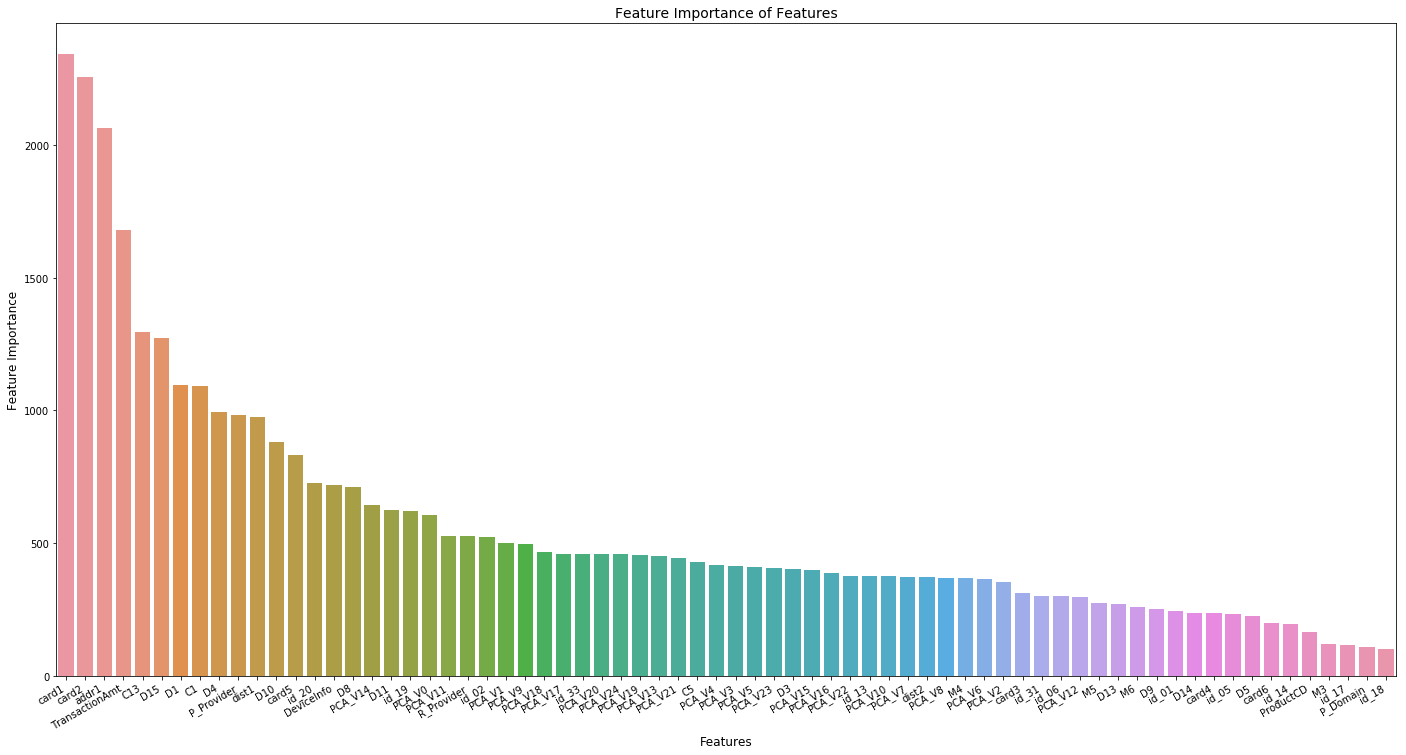

In [170]:
#feature_importances.sort_values(by = 'Feature Importance', ascending=False)[:50]
plt.figure(figsize=(24,12))
plot = sns.barplot(data= feature_importance.sort_values(by='Feature Importance', ascending=False)[:70], x='Column',y='Feature Importance')
plot.set_title('Feature Importance of Features', fontsize = 14)
plot.set_ylabel('Feature Importance', fontsize = 12)
plot.set_xlabel('Features', fontsize = 12)
plot.set_xticklabels(plot.get_xticklabels(),rotation=30, ha='right', va='top')
plt.show()

In [171]:
#roc_auc_score(y_test, y_predict)

In [172]:
submission =pd.DataFrame()
submission['TransactionID'] = test_data.index
submission['isFraud']= y_predict

In [173]:
submission[submission['isFraud']>0.5]

TransactionID  isFraud
220           3663769    0.855
279           3663828    0.571
287           3663836    0.705
504           3664053    0.530
554           3664103    0.644
...               ...      ...
506049        4169598    0.621
506461        4170010    0.777
506467        4170016    0.809
506472        4170021    0.874
506510        4170059    0.694

[7349 rows x 2 columns]

In [174]:
submission.to_csv('submission.csv', index=False)